<a href="https://colab.research.google.com/github/Kh0uloud/Modeling-Mental-Health-Trends-Using-Social-Media-Data/blob/main/MDDL_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import json
from glob import glob
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import scipy.stats as stats
import math

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split
import shap

from statsmodels.api import OLS

# Unzipping Data

In [ ]:
µ!apt-get install p7zip-full -y  # Install 7-Zip (only needed once)
!7z x "/content/drive/MyDrive/MentalHealthProject/Dataset_MDDL.zip" -o"/content/data" -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/MentalHealthProject/                                                     1 file, 8393734330 bytes (8005 MiB)

Extracting archive: /content/drive/MyDrive/MentalHealthProject/Dataset_MDDL.zip
  2% 4096 Open               17% 32768 Open                27% 53248 Open                40% 77824 Open               

In [ ]:
shutil.move("/content/data/Dataset/labeled/positive", "/content/drive/MyDrive/MentalHealthProject/LabeledPos")

'/content/drive/MyDrive/MentalHealthProject/LabeledPos'

In [ ]:
print(len(glob(os.path.join("/content/data/Dataset/labeled/positive/data/timeline", "*"))), len(glob(os.path.join("/content/drive/MyDrive/MentalHealthProject/LabeledPos/data/timeline", "*"))))

print(len(glob(os.path.join("/content/data/Dataset/labeled/positive/data/tweet", "*"))), len(glob(os.path.join("/content/drive/MyDrive/MentalHealthProject/LabeledPos/data/tweet", "*"))))

print(len(glob(os.path.join("/content/data/Dataset/labeled/positive/data/users", "*"))), len(glob(os.path.join("/content/drive/MyDrive/MentalHealthProject/LabeledPos/data/users", "*"))))

0 2626
0 6493
0 5899


In [ ]:
shutil.move("/content/data/Dataset/labeled/negative", "/content/drive/MyDrive/MentalHealthProject/LabeledNeg")

Error: [('/content/data/Dataset/labeled/negative/data/timeline/rwby_rose_created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rwby_rose_created_at-54194057.json', '[Errno 28] No space left on device'), ('/content/data/Dataset/labeled/negative/data/timeline/_Emily_Baumann_created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Emily_Baumann_created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Emily_Baumann_created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Emily_Baumann_created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vibrantghostscreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vibrantghostscreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vibrantghostscreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vibrantghostscreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PinkFusions_created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PinkFusions_created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PinkFusions_created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PinkFusions_created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nabilahabby_created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nabilahabby_created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nabilahabby_created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nabilahabby_created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DTmoney517created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DTmoney517created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DTmoney517created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DTmoney517created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CS_Bernardcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CS_Bernardcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CS_Bernardcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CS_Bernardcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iamactiveukcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamactiveukcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iamactiveukcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamactiveukcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OVOrganiccreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OVOrganiccreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OVOrganiccreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OVOrganiccreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ItsNewBeginningcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsNewBeginningcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ItsNewBeginningcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsNewBeginningcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lewispledgercreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lewispledgercreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lewispledgercreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lewispledgercreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/natashasamanicreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/natashasamanicreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/natashasamanicreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/natashasamanicreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tami2kindcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tami2kindcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tami2kindcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tami2kindcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JoeyJolleycreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoeyJolleycreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JoeyJolleycreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoeyJolleycreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RaphaelSaraicreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RaphaelSaraicreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RaphaelSaraicreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RaphaelSaraicreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k_gill2created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_gill2created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k_gill2created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_gill2created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TeamChoppa01created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TeamChoppa01created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TeamChoppa01created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TeamChoppa01created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__HighandMightycreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__HighandMightycreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__HighandMightycreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__HighandMightycreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sonu_juyalcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sonu_juyalcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sonu_juyalcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sonu_juyalcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LulZiggycreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LulZiggycreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LulZiggycreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LulZiggycreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ripe_avocadocreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ripe_avocadocreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ripe_avocadocreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ripe_avocadocreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rotten_Velvetcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rotten_Velvetcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rotten_Velvetcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rotten_Velvetcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/g_i_botcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/g_i_botcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/g_i_botcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/g_i_botcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/coppertopindycreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coppertopindycreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/coppertopindycreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coppertopindycreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_NicoleHClarkecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_NicoleHClarkecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_NicoleHClarkecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_NicoleHClarkecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IzyClovercreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IzyClovercreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IzyClovercreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IzyClovercreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VegasDavidsoncreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VegasDavidsoncreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VegasDavidsoncreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VegasDavidsoncreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AliciaMorfordcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AliciaMorfordcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AliciaMorfordcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AliciaMorfordcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kindoboycreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kindoboycreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kindoboycreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kindoboycreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Atsukomasamunecreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Atsukomasamunecreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Atsukomasamunecreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Atsukomasamunecreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ichigo_rnilkcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ichigo_rnilkcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ichigo_rnilkcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ichigo_rnilkcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OkatsoJacklinecreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OkatsoJacklinecreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OkatsoJacklinecreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OkatsoJacklinecreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sumsnicolecreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sumsnicolecreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sumsnicolecreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sumsnicolecreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EloquentMyDearcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EloquentMyDearcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EloquentMyDearcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EloquentMyDearcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/weirdinggreysoncreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/weirdinggreysoncreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/weirdinggreysoncreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/weirdinggreysoncreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IamDJSOSOcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IamDJSOSOcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IamDJSOSOcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IamDJSOSOcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Talesofpalefacecreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Talesofpalefacecreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Talesofpalefacecreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Talesofpalefacecreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Wojciehowiczcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Wojciehowiczcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Wojciehowiczcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Wojciehowiczcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UpliftAffirmcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UpliftAffirmcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UpliftAffirmcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UpliftAffirmcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_lexbeancreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_lexbeancreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_lexbeancreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_lexbeancreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ISeO_CHacreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ISeO_CHacreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ISeO_CHacreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ISeO_CHacreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JFrazierProcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JFrazierProcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JFrazierProcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JFrazierProcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jimcor4created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimcor4created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jimcor4created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimcor4created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/matthew_peirsoncreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/matthew_peirsoncreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/matthew_peirsoncreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/matthew_peirsoncreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ceceophiecreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ceceophiecreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ceceophiecreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ceceophiecreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xxkayyy_created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxkayyy_created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xxkayyy_created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxkayyy_created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/azusa__a527created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/azusa__a527created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/azusa__a527created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/azusa__a527created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/caseyypalmercreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/caseyypalmercreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/caseyypalmercreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/caseyypalmercreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EdgyIntellectcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EdgyIntellectcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EdgyIntellectcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EdgyIntellectcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iNH34qXnb2EgoeWcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNH34qXnb2EgoeWcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iNH34qXnb2EgoeWcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNH34qXnb2EgoeWcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AntoinetteSZcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AntoinetteSZcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AntoinetteSZcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AntoinetteSZcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OlgaVMackcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OlgaVMackcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OlgaVMackcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OlgaVMackcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jatoshcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jatoshcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jatoshcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jatoshcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DeeJayShinzicreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeeJayShinzicreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DeeJayShinzicreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeeJayShinzicreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jack_The_Snitchcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jack_The_Snitchcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jack_The_Snitchcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jack_The_Snitchcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Gwenimnidacreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gwenimnidacreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Gwenimnidacreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gwenimnidacreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EmmanVazzcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EmmanVazzcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EmmanVazzcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EmmanVazzcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VDLeskencreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VDLeskencreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VDLeskencreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VDLeskencreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jp_henson3created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jp_henson3created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jp_henson3created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jp_henson3created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tharja_ebookscreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tharja_ebookscreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tharja_ebookscreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tharja_ebookscreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sphorton_created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sphorton_created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sphorton_created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sphorton_created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DeadRingingcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeadRingingcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DeadRingingcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeadRingingcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iMicahTroncreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iMicahTroncreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iMicahTroncreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iMicahTroncreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YUNG_HABIBIcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YUNG_HABIBIcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YUNG_HABIBIcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YUNG_HABIBIcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/livelovelift_created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/livelovelift_created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/livelovelift_created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/livelovelift_created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/annnieemariecreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annnieemariecreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/annnieemariecreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annnieemariecreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/judgemtnastycreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/judgemtnastycreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/judgemtnastycreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/judgemtnastycreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nyatchiicreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nyatchiicreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nyatchiicreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nyatchiicreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hymanroth64created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hymanroth64created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hymanroth64created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hymanroth64created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FrancisDougla18created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FrancisDougla18created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FrancisDougla18created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FrancisDougla18created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PaintMeCrimsoncreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PaintMeCrimsoncreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PaintMeCrimsoncreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PaintMeCrimsoncreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/11thGhostcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/11thGhostcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/11thGhostcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/11thGhostcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChinaCristinecreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChinaCristinecreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChinaCristinecreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChinaCristinecreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jaeionah___created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jaeionah___created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jaeionah___created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jaeionah___created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shannsationalcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shannsationalcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shannsationalcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shannsationalcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yr_em_sycreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yr_em_sycreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yr_em_sycreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yr_em_sycreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JKT48Believecreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JKT48Believecreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JKT48Believecreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JKT48Believecreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jj_onlyformzcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jj_onlyformzcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jj_onlyformzcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jj_onlyformzcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jose_the_g_created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jose_the_g_created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jose_the_g_created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jose_the_g_created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lomas_anita1created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lomas_anita1created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lomas_anita1created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lomas_anita1created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/radio_stancreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/radio_stancreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/radio_stancreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/radio_stancreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/p1anetmattcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/p1anetmattcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/p1anetmattcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/p1anetmattcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/93maxMaxcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/93maxMaxcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/93maxMaxcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/93maxMaxcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bara1996Matsucreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bara1996Matsucreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bara1996Matsucreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bara1996Matsucreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/25Rachitcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/25Rachitcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/25Rachitcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/25Rachitcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/disney_loverycreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/disney_loverycreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/disney_loverycreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/disney_loverycreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/A4PMinixOnecreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/A4PMinixOnecreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/A4PMinixOnecreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/A4PMinixOnecreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CCrockss12created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CCrockss12created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CCrockss12created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CCrockss12created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HunterSkipworthcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HunterSkipworthcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HunterSkipworthcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HunterSkipworthcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Jaehyohyocreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Jaehyohyocreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Jaehyohyocreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Jaehyohyocreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aqramaqilcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aqramaqilcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aqramaqilcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aqramaqilcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChaseRidescreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChaseRidescreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChaseRidescreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChaseRidescreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/junkyxlungscreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/junkyxlungscreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/junkyxlungscreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/junkyxlungscreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Explicit_Cloutcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Explicit_Cloutcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Explicit_Cloutcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Explicit_Cloutcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/panchitopappicreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/panchitopappicreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/panchitopappicreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/panchitopappicreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/babygrimezcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/babygrimezcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/babygrimezcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/babygrimezcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/justinscIassiccreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justinscIassiccreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/justinscIassiccreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justinscIassiccreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bricklessscreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bricklessscreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bricklessscreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bricklessscreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nozomi46600248created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nozomi46600248created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nozomi46600248created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nozomi46600248created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/crew_cscreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crew_cscreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/crew_cscreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crew_cscreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I2Guitarcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I2Guitarcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I2Guitarcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I2Guitarcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/supermanDc94created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/supermanDc94created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/supermanDc94created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/supermanDc94created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheVoiceWLOMcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheVoiceWLOMcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheVoiceWLOMcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheVoiceWLOMcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sarcastipegcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sarcastipegcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sarcastipegcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sarcastipegcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BHTruthcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BHTruthcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BHTruthcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BHTruthcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wtfgyaongcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wtfgyaongcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wtfgyaongcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wtfgyaongcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iSangawecreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSangawecreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iSangawecreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSangawecreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Morganne_dclxvicreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Morganne_dclxvicreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Morganne_dclxvicreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Morganne_dclxvicreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAdoreCelesteecreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAdoreCelesteecreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAdoreCelesteecreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAdoreCelesteecreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sammythegoose1created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sammythegoose1created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sammythegoose1created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sammythegoose1created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AminIsmail16created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AminIsmail16created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AminIsmail16created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AminIsmail16created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ARMANINATION_created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ARMANINATION_created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ARMANINATION_created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ARMANINATION_created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Choco_Fantasiescreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Choco_Fantasiescreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Choco_Fantasiescreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Choco_Fantasiescreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bbynatecreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbynatecreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bbynatecreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbynatecreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/comixedcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/comixedcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/comixedcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/comixedcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_extragramsamcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_extragramsamcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_extragramsamcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_extragramsamcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BlossomPPG45created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlossomPPG45created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BlossomPPG45created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlossomPPG45created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_TewI_created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_TewI_created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_TewI_created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_TewI_created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1YUNGLALcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1YUNGLALcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1YUNGLALcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1YUNGLALcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i6llilcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i6llilcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i6llilcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i6llilcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dauntlessTRSHcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dauntlessTRSHcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dauntlessTRSHcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dauntlessTRSHcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_astoldbytimiyacreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_astoldbytimiyacreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_astoldbytimiyacreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_astoldbytimiyacreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KonohaYueNcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KonohaYueNcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KonohaYueNcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KonohaYueNcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jenm23_created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jenm23_created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jenm23_created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jenm23_created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Arynnikki17created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Arynnikki17created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Arynnikki17created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Arynnikki17created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ElleChorongAPcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ElleChorongAPcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ElleChorongAPcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ElleChorongAPcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Champ_Yveecreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Champ_Yveecreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Champ_Yveecreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Champ_Yveecreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gloria_agumcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gloria_agumcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gloria_agumcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gloria_agumcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brizeidaturtlescreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brizeidaturtlescreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brizeidaturtlescreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brizeidaturtlescreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PorsGrenlandcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PorsGrenlandcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PorsGrenlandcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PorsGrenlandcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/modestrowlandcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/modestrowlandcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/modestrowlandcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/modestrowlandcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/re_velrycreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/re_velrycreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/re_velrycreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/re_velrycreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/itskaitlynnnnn_created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itskaitlynnnnn_created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/itskaitlynnnnn_created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itskaitlynnnnn_created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iori34i7created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iori34i7created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iori34i7created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iori34i7created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kayliesorensencreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kayliesorensencreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kayliesorensencreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kayliesorensencreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DangerouslyCalmcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DangerouslyCalmcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DangerouslyCalmcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DangerouslyCalmcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ratufebricreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ratufebricreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ratufebricreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ratufebricreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BritneyBitchLuvcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BritneyBitchLuvcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BritneyBitchLuvcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BritneyBitchLuvcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dimejimarshallcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dimejimarshallcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dimejimarshallcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dimejimarshallcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Honey_IO2Icreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Honey_IO2Icreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Honey_IO2Icreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Honey_IO2Icreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RomanticOptimiscreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RomanticOptimiscreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RomanticOptimiscreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RomanticOptimiscreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AposentoAlto_created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AposentoAlto_created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AposentoAlto_created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AposentoAlto_created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kei_Amakura97created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kei_Amakura97created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kei_Amakura97created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kei_Amakura97created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/uair8created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uair8created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/uair8created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uair8created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/esmaay_created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/esmaay_created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/esmaay_created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/esmaay_created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/5_i7fakecreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/5_i7fakecreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/5_i7fakecreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/5_i7fakecreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Maya_Aodhancreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Maya_Aodhancreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Maya_Aodhancreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Maya_Aodhancreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MetalShadowXcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MetalShadowXcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MetalShadowXcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MetalShadowXcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mingyudevoteecreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mingyudevoteecreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mingyudevoteecreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mingyudevoteecreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Versharkycreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Versharkycreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Versharkycreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Versharkycreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JadeFurutaYadecreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JadeFurutaYadecreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JadeFurutaYadecreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JadeFurutaYadecreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MotherFEHkercreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MotherFEHkercreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MotherFEHkercreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MotherFEHkercreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/behbehh_kaykscreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/behbehh_kaykscreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/behbehh_kaykscreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/behbehh_kaykscreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LetThemSing_created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LetThemSing_created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LetThemSing_created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LetThemSing_created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Inkredible_created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Inkredible_created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Inkredible_created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Inkredible_created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/queenieboothcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/queenieboothcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/queenieboothcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/queenieboothcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/heartpjmcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heartpjmcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/heartpjmcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heartpjmcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Azfarovskicreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Azfarovskicreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Azfarovskicreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Azfarovskicreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ginsengstr1pcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ginsengstr1pcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ginsengstr1pcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ginsengstr1pcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mongooskacreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mongooskacreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mongooskacreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mongooskacreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BennettClaycreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BennettClaycreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BennettClaycreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BennettClaycreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DalilaMora27created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DalilaMora27created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DalilaMora27created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DalilaMora27created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BarceI0naFCcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BarceI0naFCcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BarceI0naFCcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BarceI0naFCcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DeletedNamescreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeletedNamescreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DeletedNamescreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeletedNamescreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mrs_Etikacreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mrs_Etikacreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mrs_Etikacreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mrs_Etikacreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iamchriswickcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamchriswickcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iamchriswickcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamchriswickcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HotCommodityItucreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HotCommodityItucreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HotCommodityItucreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HotCommodityItucreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/faysinthebaycreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faysinthebaycreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/faysinthebaycreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faysinthebaycreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HennyVilllcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HennyVilllcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HennyVilllcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HennyVilllcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ComicalCutiecreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ComicalCutiecreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ComicalCutiecreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ComicalCutiecreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TessaLokacreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TessaLokacreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TessaLokacreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TessaLokacreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IKsanqzcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IKsanqzcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IKsanqzcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IKsanqzcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kylizzlefdezcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kylizzlefdezcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kylizzlefdezcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kylizzlefdezcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tRUBBLEkLOUDyAFcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tRUBBLEkLOUDyAFcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tRUBBLEkLOUDyAFcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tRUBBLEkLOUDyAFcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ntokozothungocreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ntokozothungocreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ntokozothungocreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ntokozothungocreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ristymkcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ristymkcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ristymkcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ristymkcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iPzRlEnSIGZObyTcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPzRlEnSIGZObyTcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iPzRlEnSIGZObyTcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPzRlEnSIGZObyTcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shayesayheycreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shayesayheycreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shayesayheycreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shayesayheycreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/opolensismancreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/opolensismancreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/opolensismancreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/opolensismancreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eli_visualscreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eli_visualscreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eli_visualscreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eli_visualscreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ATugsyertuntscreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ATugsyertuntscreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ATugsyertuntscreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ATugsyertuntscreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Skygear2017created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Skygear2017created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Skygear2017created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Skygear2017created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FurballMaknaecreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FurballMaknaecreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FurballMaknaecreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FurballMaknaecreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/smile67667160created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smile67667160created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/smile67667160created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smile67667160created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NelsonGashagazacreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NelsonGashagazacreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NelsonGashagazacreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NelsonGashagazacreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/andielxurencreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andielxurencreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/andielxurencreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andielxurencreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_ayeeeejayycreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ayeeeejayycreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_ayeeeejayycreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ayeeeejayycreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CharmaineNeshacreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CharmaineNeshacreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CharmaineNeshacreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CharmaineNeshacreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vaans29created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vaans29created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vaans29created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vaans29created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BARBiEBODiEcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BARBiEBODiEcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BARBiEBODiEcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BARBiEBODiEcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iam_fuzzyghcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iam_fuzzyghcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iam_fuzzyghcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iam_fuzzyghcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/melanicioussscreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melanicioussscreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/melanicioussscreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melanicioussscreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SunOfNonecreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SunOfNonecreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SunOfNonecreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SunOfNonecreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/valeygohancreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/valeygohancreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/valeygohancreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/valeygohancreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kimmy_w5created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kimmy_w5created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kimmy_w5created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kimmy_w5created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RyanGennocreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RyanGennocreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RyanGennocreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RyanGennocreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NattashaOrrcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NattashaOrrcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NattashaOrrcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NattashaOrrcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emmbabyy92created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmbabyy92created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emmbabyy92created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmbabyy92created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IAmWillFerellcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmWillFerellcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IAmWillFerellcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmWillFerellcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CHILLmeister_created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CHILLmeister_created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CHILLmeister_created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CHILLmeister_created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GreenHairedBoicreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GreenHairedBoicreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GreenHairedBoicreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GreenHairedBoicreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YayaLoL__created_at-347597064.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YayaLoL__created_at-347597064.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YayaLoL__created_at-347597064.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YayaLoL__created_at-347597064.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iNewsTokyocreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNewsTokyocreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iNewsTokyocreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNewsTokyocreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xupalagambacreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xupalagambacreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xupalagambacreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xupalagambacreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheTinkster14created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheTinkster14created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheTinkster14created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheTinkster14created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tarheel_rncreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tarheel_rncreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tarheel_rncreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tarheel_rncreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tdjestatecreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tdjestatecreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tdjestatecreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tdjestatecreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nipun_12created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nipun_12created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nipun_12created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nipun_12created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VICKKERSCOTTcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VICKKERSCOTTcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VICKKERSCOTTcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VICKKERSCOTTcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rvmz11created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rvmz11created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rvmz11created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rvmz11created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Verethraynacreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Verethraynacreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Verethraynacreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Verethraynacreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/konohoeecreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/konohoeecreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/konohoeecreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/konohoeecreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MSaichecreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MSaichecreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MSaichecreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MSaichecreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DaddyBlackXXXcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DaddyBlackXXXcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DaddyBlackXXXcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DaddyBlackXXXcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/flowerryboycreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/flowerryboycreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/flowerryboycreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/flowerryboycreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imogeniccreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imogeniccreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imogeniccreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imogeniccreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PhaulaAbsincreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PhaulaAbsincreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PhaulaAbsincreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PhaulaAbsincreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lifeaskaitlyn_created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lifeaskaitlyn_created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lifeaskaitlyn_created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lifeaskaitlyn_created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PunterJDScreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PunterJDScreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PunterJDScreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PunterJDScreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i3ipppcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i3ipppcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i3ipppcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i3ipppcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/smars_39created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smars_39created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/smars_39created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smars_39created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ordinaryfanb0ycreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ordinaryfanb0ycreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ordinaryfanb0ycreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ordinaryfanb0ycreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emily_elgarcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emily_elgarcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emily_elgarcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emily_elgarcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MGiovanni_created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MGiovanni_created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MGiovanni_created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MGiovanni_created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OrangeAnoncreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OrangeAnoncreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OrangeAnoncreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OrangeAnoncreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/molinar_aaroncreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/molinar_aaroncreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/molinar_aaroncreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/molinar_aaroncreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pg2sfcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pg2sfcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pg2sfcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pg2sfcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShellyKennisto1created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShellyKennisto1created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShellyKennisto1created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShellyKennisto1created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/46enrique1created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/46enrique1created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/46enrique1created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/46enrique1created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CalebDroidcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CalebDroidcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CalebDroidcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CalebDroidcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cassidypaige___created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cassidypaige___created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cassidypaige___created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cassidypaige___created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/asljsdfk704thcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asljsdfk704thcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/asljsdfk704thcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asljsdfk704thcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hornyfucker31created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hornyfucker31created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hornyfucker31created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hornyfucker31created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/M0NATSU0KAcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/M0NATSU0KAcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/M0NATSU0KAcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/M0NATSU0KAcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/K_NotWhitecreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K_NotWhitecreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/K_NotWhitecreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K_NotWhitecreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dopeitsacecreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dopeitsacecreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dopeitsacecreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dopeitsacecreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/goldeneye_buffscreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/goldeneye_buffscreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/goldeneye_buffscreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/goldeneye_buffscreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChillsquadYTcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChillsquadYTcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChillsquadYTcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChillsquadYTcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mujonadericreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mujonadericreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mujonadericreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mujonadericreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Claud_Williamscreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Claud_Williamscreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Claud_Williamscreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Claud_Williamscreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/105824created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/105824created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/105824created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/105824created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SdZEz3YLW4iRDrMcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SdZEz3YLW4iRDrMcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SdZEz3YLW4iRDrMcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SdZEz3YLW4iRDrMcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/reiko_nakanishicreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reiko_nakanishicreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/reiko_nakanishicreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reiko_nakanishicreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i3ce3created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i3ce3created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i3ce3created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i3ce3created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/abbymontes35created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abbymontes35created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/abbymontes35created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abbymontes35created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_margaretmaria_created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_margaretmaria_created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_margaretmaria_created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_margaretmaria_created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kchsandoscreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kchsandoscreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kchsandoscreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kchsandoscreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RIDO75094574created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RIDO75094574created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RIDO75094574created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RIDO75094574created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ajmi6icreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ajmi6icreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ajmi6icreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ajmi6icreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Changeofname14created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Changeofname14created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Changeofname14created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Changeofname14created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/201DreamSlayingcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/201DreamSlayingcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/201DreamSlayingcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/201DreamSlayingcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rhymingbotcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rhymingbotcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rhymingbotcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rhymingbotcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/castacliffoxcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/castacliffoxcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/castacliffoxcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/castacliffoxcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ntu_XKcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ntu_XKcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ntu_XKcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ntu_XKcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JPizzleFIFAcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JPizzleFIFAcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JPizzleFIFAcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JPizzleFIFAcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PappoPalacecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PappoPalacecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PappoPalacecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PappoPalacecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maspqleicreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maspqleicreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maspqleicreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maspqleicreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_plantaincreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_plantaincreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_plantaincreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_plantaincreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAmDelteacreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmDelteacreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAmDelteacreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmDelteacreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/prismotroncreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/prismotroncreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/prismotroncreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/prismotroncreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mekakushixxxcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mekakushixxxcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mekakushixxxcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mekakushixxxcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WinterLachesiscreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WinterLachesiscreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WinterLachesiscreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WinterLachesiscreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Coco_Jonesscreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Coco_Jonesscreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Coco_Jonesscreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Coco_Jonesscreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/clarisse122603created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/clarisse122603created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/clarisse122603created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/clarisse122603created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/davidsonchimecreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/davidsonchimecreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/davidsonchimecreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/davidsonchimecreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/neko_4205created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neko_4205created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/neko_4205created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neko_4205created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PrestonRunscreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PrestonRunscreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PrestonRunscreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PrestonRunscreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/andrewareoffcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andrewareoffcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/andrewareoffcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andrewareoffcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IIbraheem314created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIbraheem314created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IIbraheem314created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIbraheem314created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Me_No_Careeeeeecreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Me_No_Careeeeeecreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Me_No_Careeeeeecreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Me_No_Careeeeeecreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Michaelcware4created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Michaelcware4created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Michaelcware4created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Michaelcware4created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sunquailscreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sunquailscreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sunquailscreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sunquailscreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lee_Wnhtrcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lee_Wnhtrcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lee_Wnhtrcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lee_Wnhtrcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WavyWill_15created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WavyWill_15created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WavyWill_15created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WavyWill_15created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dulcekendra1created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dulcekendra1created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dulcekendra1created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dulcekendra1created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/disneypuppiescreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/disneypuppiescreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/disneypuppiescreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/disneypuppiescreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Bazelacreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Bazelacreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Bazelacreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Bazelacreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kiarandtwdcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kiarandtwdcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kiarandtwdcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kiarandtwdcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BWoodsSimpleMancreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BWoodsSimpleMancreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BWoodsSimpleMancreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BWoodsSimpleMancreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OpKiIIingBaycreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OpKiIIingBaycreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OpKiIIingBaycreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OpKiIIingBaycreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Juniorkelley11created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Juniorkelley11created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Juniorkelley11created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Juniorkelley11created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CHWCDNcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CHWCDNcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CHWCDNcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CHWCDNcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MonaBaaaycreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MonaBaaaycreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MonaBaaaycreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MonaBaaaycreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i7_hana_0102created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i7_hana_0102created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i7_hana_0102created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i7_hana_0102created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Woman4Trumpcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Woman4Trumpcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Woman4Trumpcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Woman4Trumpcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/N_ALHOADcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/N_ALHOADcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/N_ALHOADcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/N_ALHOADcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/timberdonahue7created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/timberdonahue7created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/timberdonahue7created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/timberdonahue7created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HannahHixoncreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HannahHixoncreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HannahHixoncreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HannahHixoncreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/X3_dead_botcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/X3_dead_botcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/X3_dead_botcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/X3_dead_botcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DJZooWapcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DJZooWapcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DJZooWapcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DJZooWapcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RikaMatsu2created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RikaMatsu2created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RikaMatsu2created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RikaMatsu2created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/simenonacreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simenonacreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/simenonacreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simenonacreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IIMllIcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIMllIcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IIMllIcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIMllIcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jojo_jayncreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jojo_jayncreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jojo_jayncreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jojo_jayncreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CristianoIraldocreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CristianoIraldocreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CristianoIraldocreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CristianoIraldocreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JasminGayChatcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JasminGayChatcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JasminGayChatcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JasminGayChatcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RiZ0Hcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RiZ0Hcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RiZ0Hcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RiZ0Hcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChellyzBellycreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChellyzBellycreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChellyzBellycreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChellyzBellycreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/abitrichcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abitrichcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/abitrichcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abitrichcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i910208icreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i910208icreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i910208icreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i910208icreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fourrfortycreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fourrfortycreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fourrfortycreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fourrfortycreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iSaleh92created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSaleh92created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iSaleh92created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSaleh92created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CameronInJulycreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CameronInJulycreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CameronInJulycreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CameronInJulycreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/feelthedrawcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/feelthedrawcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/feelthedrawcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/feelthedrawcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_Feeucreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_Feeucreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_Feeucreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_Feeucreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_i3lawixcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_i3lawixcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_i3lawixcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_i3lawixcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/raepsodycreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/raepsodycreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/raepsodycreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/raepsodycreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maryamxmussacreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maryamxmussacreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maryamxmussacreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maryamxmussacreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zee_enbotcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zee_enbotcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zee_enbotcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zee_enbotcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ariamaiacreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ariamaiacreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ariamaiacreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ariamaiacreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vineet7891created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vineet7891created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vineet7891created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vineet7891created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/behzadradmancreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/behzadradmancreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/behzadradmancreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/behzadradmancreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HassMUFCcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HassMUFCcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HassMUFCcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HassMUFCcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vkimparejacreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vkimparejacreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vkimparejacreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vkimparejacreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alonso37created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alonso37created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alonso37created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alonso37created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jordan_vigilcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jordan_vigilcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jordan_vigilcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jordan_vigilcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/windypriskacreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/windypriskacreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/windypriskacreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/windypriskacreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bartel_adacreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bartel_adacreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bartel_adacreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bartel_adacreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hk9J9cl28vsr97icreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hk9J9cl28vsr97icreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hk9J9cl28vsr97icreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hk9J9cl28vsr97icreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NMNCSHcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NMNCSHcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NMNCSHcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NMNCSHcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/prawnbonjovicreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/prawnbonjovicreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/prawnbonjovicreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/prawnbonjovicreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TylerGioiellicreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TylerGioiellicreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TylerGioiellicreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TylerGioiellicreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MisfitLeBeaucreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MisfitLeBeaucreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MisfitLeBeaucreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MisfitLeBeaucreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YoChippycreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YoChippycreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YoChippycreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YoChippycreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I1MdGJ1WTzdB2Gucreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I1MdGJ1WTzdB2Gucreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I1MdGJ1WTzdB2Gucreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I1MdGJ1WTzdB2Gucreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fe_gaiuscreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fe_gaiuscreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fe_gaiuscreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fe_gaiuscreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_kinghaocreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_kinghaocreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_kinghaocreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_kinghaocreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/QUARANTXNEcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/QUARANTXNEcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/QUARANTXNEcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/QUARANTXNEcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RiosIndigocreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RiosIndigocreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RiosIndigocreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RiosIndigocreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Khorne554created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Khorne554created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Khorne554created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Khorne554created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChelseaFamiliacreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChelseaFamiliacreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChelseaFamiliacreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChelseaFamiliacreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AgusDelPincha7created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AgusDelPincha7created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AgusDelPincha7created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AgusDelPincha7created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dmalwarecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dmalwarecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dmalwarecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dmalwarecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/keenonstegmanncreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/keenonstegmanncreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/keenonstegmanncreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/keenonstegmanncreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Capt_Shivelycreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Capt_Shivelycreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Capt_Shivelycreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Capt_Shivelycreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BPInstinctzcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BPInstinctzcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BPInstinctzcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BPInstinctzcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ammoncruzcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ammoncruzcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ammoncruzcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ammoncruzcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/konya_sikici1icreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/konya_sikici1icreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/konya_sikici1icreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/konya_sikici1icreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xoxoevelynncreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xoxoevelynncreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xoxoevelynncreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xoxoevelynncreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MarkBut98470936created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MarkBut98470936created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MarkBut98470936created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MarkBut98470936created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nessarivers_created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nessarivers_created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nessarivers_created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nessarivers_created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/earthhnrcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/earthhnrcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/earthhnrcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/earthhnrcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/autocowreckscreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/autocowreckscreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/autocowreckscreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/autocowreckscreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jayla_marieeeecreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jayla_marieeeecreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jayla_marieeeecreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jayla_marieeeecreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pietrodigiulio1created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pietrodigiulio1created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pietrodigiulio1created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pietrodigiulio1created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/5_i7fakecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/5_i7fakecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/5_i7fakecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/5_i7fakecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kessleyanncreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kessleyanncreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kessleyanncreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kessleyanncreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZAYNDOSEcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZAYNDOSEcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZAYNDOSEcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZAYNDOSEcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i624shcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i624shcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i624shcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i624shcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_eyaadcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_eyaadcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_eyaadcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_eyaadcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fllwthedream_created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fllwthedream_created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fllwthedream_created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fllwthedream_created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imrobynwithaycreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imrobynwithaycreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imrobynwithaycreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imrobynwithaycreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jessetimetocookcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jessetimetocookcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jessetimetocookcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jessetimetocookcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AerohBoiicreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AerohBoiicreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AerohBoiicreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AerohBoiicreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MultifandomDivicreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MultifandomDivicreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MultifandomDivicreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MultifandomDivicreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/proudsIytherincreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/proudsIytherincreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/proudsIytherincreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/proudsIytherincreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CWSpearcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CWSpearcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CWSpearcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CWSpearcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mii___0401created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mii___0401created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mii___0401created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mii___0401created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MyronThiessencreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MyronThiessencreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MyronThiessencreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MyronThiessencreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nabhh2610created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nabhh2610created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nabhh2610created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nabhh2610created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/remozalsircreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/remozalsircreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/remozalsircreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/remozalsircreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WLK_eunji93created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WLK_eunji93created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WLK_eunji93created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WLK_eunji93created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/notjustaguilarcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/notjustaguilarcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/notjustaguilarcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/notjustaguilarcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nelphixcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nelphixcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nelphixcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nelphixcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dizzzyotakucreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dizzzyotakucreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dizzzyotakucreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dizzzyotakucreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTzGy3AcS1WClRhcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTzGy3AcS1WClRhcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTzGy3AcS1WClRhcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTzGy3AcS1WClRhcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Boonie_Loocreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Boonie_Loocreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Boonie_Loocreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Boonie_Loocreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JUiiCE_BOiicreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JUiiCE_BOiicreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JUiiCE_BOiicreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JUiiCE_BOiicreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AbelObesitycreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AbelObesitycreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AbelObesitycreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AbelObesitycreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/marsha9753created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marsha9753created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/marsha9753created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marsha9753created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/destroyer_i_egcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/destroyer_i_egcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/destroyer_i_egcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/destroyer_i_egcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/catchthesehannzcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catchthesehannzcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/catchthesehannzcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catchthesehannzcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shalhout_acreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shalhout_acreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shalhout_acreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shalhout_acreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MAESTROLUNGScreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MAESTROLUNGScreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MAESTROLUNGScreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MAESTROLUNGScreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chaybree21created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chaybree21created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chaybree21created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chaybree21created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/luvmymatty_created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/luvmymatty_created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/luvmymatty_created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/luvmymatty_created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TeeCeeEffcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TeeCeeEffcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TeeCeeEffcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TeeCeeEffcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xxginiwoofxxcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxginiwoofxxcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xxginiwoofxxcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxginiwoofxxcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTeflonDon_created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTeflonDon_created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTeflonDon_created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTeflonDon_created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SilveryFurycreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SilveryFurycreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SilveryFurycreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SilveryFurycreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SidizenKanecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SidizenKanecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SidizenKanecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SidizenKanecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CardozoJohnsoncreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CardozoJohnsoncreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CardozoJohnsoncreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CardozoJohnsoncreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/avonbizzlcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/avonbizzlcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/avonbizzlcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/avonbizzlcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jembiex3created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jembiex3created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jembiex3created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jembiex3created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jessicamsrocreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jessicamsrocreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jessicamsrocreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jessicamsrocreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/immaloserbabeecreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/immaloserbabeecreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/immaloserbabeecreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/immaloserbabeecreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/n0flexjeoncreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/n0flexjeoncreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/n0flexjeoncreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/n0flexjeoncreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NATNA__created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NATNA__created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NATNA__created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NATNA__created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blank_taetae94created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blank_taetae94created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blank_taetae94created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blank_taetae94created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LoveElnoracreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoveElnoracreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LoveElnoracreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoveElnoracreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mvungjongcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mvungjongcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mvungjongcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mvungjongcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CREEPERDUDE960created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CREEPERDUDE960created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CREEPERDUDE960created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CREEPERDUDE960created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SpottedTorquaycreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SpottedTorquaycreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SpottedTorquaycreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SpottedTorquaycreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iPhone5Apple1created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhone5Apple1created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iPhone5Apple1created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhone5Apple1created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheDrunkRidercreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheDrunkRidercreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheDrunkRidercreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheDrunkRidercreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YSBH_With_Joecreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YSBH_With_Joecreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YSBH_With_Joecreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YSBH_With_Joecreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bando818created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bando818created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bando818created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bando818created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PRETTY_PRiSSSYcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PRETTY_PRiSSSYcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PRETTY_PRiSSSYcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PRETTY_PRiSSSYcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/babyrantaroucreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/babyrantaroucreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/babyrantaroucreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/babyrantaroucreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sofiiiArredondocreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sofiiiArredondocreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sofiiiArredondocreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sofiiiArredondocreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DaliaAshraf29created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DaliaAshraf29created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DaliaAshraf29created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DaliaAshraf29created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ldins_created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ldins_created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ldins_created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ldins_created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sbahlerocksolidcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sbahlerocksolidcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sbahlerocksolidcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sbahlerocksolidcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MrYeahIKnowcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrYeahIKnowcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MrYeahIKnowcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrYeahIKnowcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I4MCH1created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I4MCH1created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I4MCH1created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I4MCH1created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/starlightdeancreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/starlightdeancreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/starlightdeancreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/starlightdeancreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sxdmooncreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sxdmooncreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sxdmooncreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sxdmooncreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Shirleymulletcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Shirleymulletcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Shirleymulletcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Shirleymulletcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/stacey_ward1990created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stacey_ward1990created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/stacey_ward1990created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stacey_ward1990created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/destroyfrogcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/destroyfrogcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/destroyfrogcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/destroyfrogcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/farhanahnaguibcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/farhanahnaguibcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/farhanahnaguibcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/farhanahnaguibcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/l0renagiselacreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l0renagiselacreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/l0renagiselacreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l0renagiselacreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Crimson_Embercreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Crimson_Embercreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Crimson_Embercreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Crimson_Embercreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fayettevampcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fayettevampcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fayettevampcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fayettevampcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Deekka1created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Deekka1created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Deekka1created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Deekka1created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShakedAmramcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShakedAmramcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShakedAmramcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShakedAmramcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/trzebnicacreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trzebnicacreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/trzebnicacreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trzebnicacreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FinickyArtscreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FinickyArtscreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FinickyArtscreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FinickyArtscreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/izumqshI381created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/izumqshI381created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/izumqshI381created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/izumqshI381created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fuckyeahtyrincreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fuckyeahtyrincreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fuckyeahtyrincreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fuckyeahtyrincreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cyyyyyddddd_created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cyyyyyddddd_created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cyyyyyddddd_created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cyyyyyddddd_created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dnzlgmrcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dnzlgmrcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dnzlgmrcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dnzlgmrcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Skaarj_Elitecreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Skaarj_Elitecreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Skaarj_Elitecreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Skaarj_Elitecreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/manal5icreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/manal5icreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/manal5icreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/manal5icreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/agiantrcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/agiantrcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/agiantrcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/agiantrcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FRESHYNo1created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FRESHYNo1created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FRESHYNo1created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FRESHYNo1created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nuk___created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nuk___created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nuk___created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nuk___created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RiZ0Hcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RiZ0Hcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RiZ0Hcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RiZ0Hcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__Phuonghuyen__created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Phuonghuyen__created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__Phuonghuyen__created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Phuonghuyen__created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lilithpghcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilithpghcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lilithpghcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilithpghcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ultimaaacreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ultimaaacreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ultimaaacreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ultimaaacreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JustinTMHcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustinTMHcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JustinTMHcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustinTMHcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TRISTANTRlSTANcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TRISTANTRlSTANcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TRISTANTRlSTANcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TRISTANTRlSTANcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/daisy_lynnettecreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daisy_lynnettecreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/daisy_lynnettecreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daisy_lynnettecreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/salim_hadycreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/salim_hadycreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/salim_hadycreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/salim_hadycreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ragaberrymuffincreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ragaberrymuffincreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ragaberrymuffincreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ragaberrymuffincreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/anaxjorcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anaxjorcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/anaxjorcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anaxjorcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kimkarbincreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kimkarbincreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kimkarbincreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kimkarbincreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yaku_listencreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yaku_listencreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yaku_listencreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yaku_listencreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lolo_Darlingcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lolo_Darlingcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lolo_Darlingcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lolo_Darlingcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xxNixWebFacexxcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxNixWebFacexxcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xxNixWebFacexxcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxNixWebFacexxcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kiri_no_jicreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kiri_no_jicreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kiri_no_jicreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kiri_no_jicreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ciderratcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ciderratcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ciderratcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ciderratcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thatmattpostycreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thatmattpostycreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thatmattpostycreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thatmattpostycreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i__cicreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__cicreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i__cicreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__cicreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rosehipniallcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rosehipniallcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rosehipniallcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rosehipniallcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/John_Watson_221created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/John_Watson_221created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/John_Watson_221created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/John_Watson_221created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EvenlfSheFaIIscreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EvenlfSheFaIIscreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EvenlfSheFaIIscreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EvenlfSheFaIIscreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KayleHustoncreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KayleHustoncreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KayleHustoncreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KayleHustoncreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GuadalupeNicol1created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GuadalupeNicol1created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GuadalupeNicol1created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GuadalupeNicol1created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hernandez2099created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hernandez2099created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hernandez2099created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hernandez2099created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/noire_of_ylissecreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/noire_of_ylissecreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/noire_of_ylissecreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/noire_of_ylissecreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kirikou_ofcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kirikou_ofcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kirikou_ofcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kirikou_ofcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lisa_aheMcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lisa_aheMcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lisa_aheMcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lisa_aheMcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Z_X2icreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Z_X2icreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Z_X2icreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Z_X2icreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Itstimsjohnsoncreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Itstimsjohnsoncreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Itstimsjohnsoncreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Itstimsjohnsoncreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sarah_Loftiscreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sarah_Loftiscreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sarah_Loftiscreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sarah_Loftiscreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zJUf2Y5iRQAKKNecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zJUf2Y5iRQAKKNecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zJUf2Y5iRQAKKNecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zJUf2Y5iRQAKKNecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pro_LAZIOcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pro_LAZIOcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pro_LAZIOcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pro_LAZIOcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rphabetscreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rphabetscreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rphabetscreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rphabetscreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/oged07created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oged07created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/oged07created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oged07created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xNicoleFarrellxcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xNicoleFarrellxcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xNicoleFarrellxcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xNicoleFarrellxcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/karlaanaiiicreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/karlaanaiiicreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/karlaanaiiicreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/karlaanaiiicreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MceyChicky02created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MceyChicky02created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MceyChicky02created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MceyChicky02created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CBialleycreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CBialleycreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CBialleycreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CBialleycreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZephyrSamcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZephyrSamcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZephyrSamcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZephyrSamcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/synthsitivecreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/synthsitivecreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/synthsitivecreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/synthsitivecreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_Luck_Kidcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_Luck_Kidcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_Luck_Kidcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_Luck_Kidcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/V0DKASHCTScreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/V0DKASHCTScreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/V0DKASHCTScreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/V0DKASHCTScreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/m42motorwaycreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/m42motorwaycreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/m42motorwaycreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/m42motorwaycreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alexcorniocreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexcorniocreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alexcorniocreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexcorniocreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Anand2muchcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anand2muchcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Anand2muchcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anand2muchcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/caylaaannncreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/caylaaannncreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/caylaaannncreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/caylaaannncreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/John_Gaskellcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/John_Gaskellcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/John_Gaskellcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/John_Gaskellcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Th4JuicePrinceecreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Th4JuicePrinceecreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Th4JuicePrinceecreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Th4JuicePrinceecreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SOREADY4LUVcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SOREADY4LUVcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SOREADY4LUVcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SOREADY4LUVcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lolahuntescortcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lolahuntescortcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lolahuntescortcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lolahuntescortcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_VS___created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_VS___created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_VS___created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_VS___created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/faun_ceecreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faun_ceecreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/faun_ceecreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faun_ceecreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/satope_icreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/satope_icreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/satope_icreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/satope_icreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MatthieuHennuycreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MatthieuHennuycreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MatthieuHennuycreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MatthieuHennuycreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/slaterm24created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slaterm24created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/slaterm24created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slaterm24created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rosi_macht_mitcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rosi_macht_mitcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rosi_macht_mitcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rosi_macht_mitcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mareelovesfoodcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mareelovesfoodcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mareelovesfoodcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mareelovesfoodcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/trashirocreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trashirocreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/trashirocreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trashirocreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Securit64368916created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Securit64368916created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Securit64368916created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Securit64368916created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_cherish__Ucreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_cherish__Ucreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_cherish__Ucreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_cherish__Ucreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xthundajacreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xthundajacreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xthundajacreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xthundajacreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hailsjones1234created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hailsjones1234created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hailsjones1234created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hailsjones1234created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rotten_Velvetcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rotten_Velvetcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rotten_Velvetcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rotten_Velvetcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShirleyE_created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShirleyE_created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShirleyE_created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShirleyE_created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TweetMoveOncreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TweetMoveOncreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TweetMoveOncreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TweetMoveOncreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ituki082created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ituki082created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ituki082created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ituki082created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lizethjaramiIlocreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lizethjaramiIlocreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lizethjaramiIlocreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lizethjaramiIlocreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iWarevercreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iWarevercreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iWarevercreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iWarevercreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BonbonFranciscocreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BonbonFranciscocreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BonbonFranciscocreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BonbonFranciscocreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tr1ppy2chick0created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tr1ppy2chick0created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tr1ppy2chick0created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tr1ppy2chick0created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/margauxnbhdcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/margauxnbhdcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/margauxnbhdcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/margauxnbhdcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DreFreg19created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DreFreg19created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DreFreg19created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DreFreg19created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alexissimpincreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexissimpincreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alexissimpincreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexissimpincreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/isolda_hystcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/isolda_hystcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/isolda_hystcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/isolda_hystcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zeeskafcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zeeskafcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zeeskafcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zeeskafcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iCareAppleScreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iCareAppleScreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iCareAppleScreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iCareAppleScreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTunesJapanJPopcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTunesJapanJPopcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTunesJapanJPopcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTunesJapanJPopcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/st00pkid_created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/st00pkid_created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/st00pkid_created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/st00pkid_created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lowkeeeylacreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lowkeeeylacreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lowkeeeylacreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lowkeeeylacreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FuniBeanicreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FuniBeanicreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FuniBeanicreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FuniBeanicreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/donn_morgancreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/donn_morgancreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/donn_morgancreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/donn_morgancreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nursyasalbilacreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nursyasalbilacreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nursyasalbilacreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nursyasalbilacreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i7_JJiNcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i7_JJiNcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i7_JJiNcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i7_JJiNcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Suhhhrayeeecreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Suhhhrayeeecreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Suhhhrayeeecreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Suhhhrayeeecreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/allopalloocreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/allopalloocreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/allopalloocreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/allopalloocreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iECONOMICScreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iECONOMICScreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iECONOMICScreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iECONOMICScreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Amone2014created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Amone2014created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Amone2014created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Amone2014created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rockyhorror_botcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rockyhorror_botcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rockyhorror_botcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rockyhorror_botcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wingaliacreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wingaliacreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wingaliacreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wingaliacreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WyattRaboncreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WyattRaboncreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WyattRaboncreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WyattRaboncreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAbdullah95created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAbdullah95created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAbdullah95created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAbdullah95created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/justsashaxcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justsashaxcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/justsashaxcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justsashaxcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/32Cassie32created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/32Cassie32created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/32Cassie32created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/32Cassie32created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Aj23Andrewcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aj23Andrewcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Aj23Andrewcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aj23Andrewcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/itsmimssscreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itsmimssscreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/itsmimssscreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itsmimssscreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amandajaynalyncreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amandajaynalyncreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amandajaynalyncreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amandajaynalyncreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/honoredlarrycreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/honoredlarrycreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/honoredlarrycreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/honoredlarrycreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sonu_juyalcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sonu_juyalcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sonu_juyalcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sonu_juyalcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PCYNMNcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PCYNMNcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PCYNMNcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PCYNMNcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DewiCrabbecreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DewiCrabbecreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DewiCrabbecreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DewiCrabbecreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/peyton0xcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peyton0xcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/peyton0xcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peyton0xcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lightybyuncreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lightybyuncreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lightybyuncreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lightybyuncreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tife_ecreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tife_ecreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tife_ecreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tife_ecreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cienalynnncreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cienalynnncreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cienalynnncreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cienalynnncreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bxconcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bxconcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bxconcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bxconcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jshoota_created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jshoota_created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jshoota_created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jshoota_created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wundertweekcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wundertweekcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wundertweekcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wundertweekcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chaoschanneIcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chaoschanneIcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chaoschanneIcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chaoschanneIcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HerNameB__created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HerNameB__created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HerNameB__created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HerNameB__created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JohanSanzTerrecreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JohanSanzTerrecreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JohanSanzTerrecreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JohanSanzTerrecreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imactuallyacatcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imactuallyacatcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imactuallyacatcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imactuallyacatcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/diagonismos_grcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/diagonismos_grcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/diagonismos_grcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/diagonismos_grcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_love_kemomimicreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_love_kemomimicreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_love_kemomimicreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_love_kemomimicreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thatsnextcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thatsnextcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thatsnextcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thatsnextcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tsuwaboycreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tsuwaboycreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tsuwaboycreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tsuwaboycreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/whateverlydiacreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whateverlydiacreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/whateverlydiacreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whateverlydiacreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/officialbobbycreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/officialbobbycreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/officialbobbycreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/officialbobbycreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DeservesAGhantacreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeservesAGhantacreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DeservesAGhantacreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeservesAGhantacreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bawldcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bawldcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bawldcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bawldcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/livesexgrindcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/livesexgrindcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/livesexgrindcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/livesexgrindcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/noraswagcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/noraswagcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/noraswagcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/noraswagcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brissdalicreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brissdalicreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brissdalicreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brissdalicreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/katherine_tvdscreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katherine_tvdscreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/katherine_tvdscreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katherine_tvdscreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jjeessaayyycreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjeessaayyycreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jjeessaayyycreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjeessaayyycreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MtownPhillySoulcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MtownPhillySoulcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MtownPhillySoulcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MtownPhillySoulcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ahmetbkscreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ahmetbkscreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ahmetbkscreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ahmetbkscreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hyuu_hy97created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hyuu_hy97created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hyuu_hy97created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hyuu_hy97created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/engymaher6created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/engymaher6created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/engymaher6created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/engymaher6created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Yashraj__created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yashraj__created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Yashraj__created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yashraj__created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hasanalkan01created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hasanalkan01created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hasanalkan01created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hasanalkan01created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lumturxecreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lumturxecreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lumturxecreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lumturxecreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Iostmyxheadcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Iostmyxheadcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Iostmyxheadcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Iostmyxheadcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lilstephhhokcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilstephhhokcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lilstephhhokcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilstephhhokcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IMrDefconcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMrDefconcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IMrDefconcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMrDefconcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ddanikawilliamscreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ddanikawilliamscreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ddanikawilliamscreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ddanikawilliamscreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DailySwiftLyriccreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DailySwiftLyriccreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DailySwiftLyriccreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DailySwiftLyriccreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ethajoatecreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ethajoatecreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ethajoatecreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ethajoatecreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/93freedycreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/93freedycreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/93freedycreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/93freedycreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GynoStarcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GynoStarcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GynoStarcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GynoStarcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cynaascreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cynaascreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cynaascreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cynaascreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/justaisehtluecreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justaisehtluecreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/justaisehtluecreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justaisehtluecreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GeoValentinecreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GeoValentinecreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GeoValentinecreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GeoValentinecreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/They_Hate_CHAYcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/They_Hate_CHAYcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/They_Hate_CHAYcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/They_Hate_CHAYcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/teniskillercreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/teniskillercreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/teniskillercreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/teniskillercreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lewisyellowcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lewisyellowcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lewisyellowcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lewisyellowcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Avalanche73m1created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Avalanche73m1created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Avalanche73m1created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Avalanche73m1created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sneakersamscreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sneakersamscreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sneakersamscreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sneakersamscreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/astrobotslutcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/astrobotslutcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/astrobotslutcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/astrobotslutcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lennoncanocreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lennoncanocreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lennoncanocreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lennoncanocreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MINAPAGEScreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MINAPAGEScreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MINAPAGEScreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MINAPAGEScreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Reeeziieecreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Reeeziieecreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Reeeziieecreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Reeeziieecreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/beammeupthottycreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beammeupthottycreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/beammeupthottycreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beammeupthottycreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sayian_YTcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sayian_YTcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sayian_YTcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sayian_YTcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Asouri_alqallafcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Asouri_alqallafcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Asouri_alqallafcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Asouri_alqallafcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KuIIervocreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KuIIervocreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KuIIervocreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KuIIervocreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IIllIlIlIIllcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIllIlIlIIllcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IIllIlIlIIllcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIllIlIlIIllcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RS2URKJCoXJ11Odcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RS2URKJCoXJ11Odcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RS2URKJCoXJ11Odcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RS2URKJCoXJ11Odcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HamburgerPartycreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HamburgerPartycreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HamburgerPartycreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HamburgerPartycreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAmLilPopHTXcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmLilPopHTXcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAmLilPopHTXcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmLilPopHTXcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/signedbyleselycreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/signedbyleselycreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/signedbyleselycreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/signedbyleselycreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/melight321created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melight321created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/melight321created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melight321created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Anekarejekicreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anekarejekicreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Anekarejekicreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anekarejekicreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CalifornianPalcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CalifornianPalcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CalifornianPalcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CalifornianPalcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gerrobocreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gerrobocreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gerrobocreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gerrobocreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jumrssecreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jumrssecreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jumrssecreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jumrssecreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_SayyPoohhcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_SayyPoohhcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_SayyPoohhcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_SayyPoohhcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/momo_0414_mahicreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/momo_0414_mahicreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/momo_0414_mahicreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/momo_0414_mahicreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LucyWithTha_UZIcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LucyWithTha_UZIcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LucyWithTha_UZIcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LucyWithTha_UZIcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/httpfxndycreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/httpfxndycreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/httpfxndycreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/httpfxndycreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/timothy_phancreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/timothy_phancreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/timothy_phancreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/timothy_phancreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ilovegcisbotcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ilovegcisbotcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ilovegcisbotcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ilovegcisbotcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ccccuuuuhhhhcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ccccuuuuhhhhcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ccccuuuuhhhhcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ccccuuuuhhhhcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SKECH185created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SKECH185created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SKECH185created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SKECH185created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HWRTWoodsidecreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HWRTWoodsidecreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HWRTWoodsidecreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HWRTWoodsidecreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/anthony_laneecreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anthony_laneecreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/anthony_laneecreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anthony_laneecreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Gish___created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gish___created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Gish___created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gish___created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/r7oooba25created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/r7oooba25created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/r7oooba25created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/r7oooba25created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kifozemcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kifozemcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kifozemcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kifozemcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hay_kay_esscreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hay_kay_esscreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hay_kay_esscreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hay_kay_esscreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nemonewestcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nemonewestcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nemonewestcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nemonewestcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__iAi___created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__iAi___created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__iAi___created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__iAi___created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NotTabacreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotTabacreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NotTabacreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotTabacreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/liliwest19created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/liliwest19created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/liliwest19created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/liliwest19created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DockMcpecreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DockMcpecreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DockMcpecreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DockMcpecreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/branbrandocreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/branbrandocreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/branbrandocreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/branbrandocreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ruidoartificialcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ruidoartificialcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ruidoartificialcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ruidoartificialcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Robles_Athaliacreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Robles_Athaliacreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Robles_Athaliacreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Robles_Athaliacreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LyallDalycreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LyallDalycreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LyallDalycreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LyallDalycreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RealRyanSheehancreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RealRyanSheehancreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RealRyanSheehancreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RealRyanSheehancreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iishonaprincecreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iishonaprincecreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iishonaprincecreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iishonaprincecreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/justusronaldBOcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justusronaldBOcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/justusronaldBOcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justusronaldBOcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dk1tonecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dk1tonecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dk1tonecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dk1tonecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mlguthrie98created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mlguthrie98created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mlguthrie98created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mlguthrie98created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pupyixingcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pupyixingcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pupyixingcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pupyixingcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LeoraMataloncreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LeoraMataloncreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LeoraMataloncreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LeoraMataloncreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LukeJr_created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LukeJr_created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LukeJr_created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LukeJr_created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rosehipniallcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rosehipniallcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rosehipniallcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rosehipniallcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/torrtapottycreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/torrtapottycreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/torrtapottycreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/torrtapottycreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chinychinchin98created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chinychinchin98created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chinychinchin98created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chinychinchin98created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/haerunncreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haerunncreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/haerunncreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haerunncreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/buttwifecreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/buttwifecreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/buttwifecreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/buttwifecreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iphonearuarubotcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iphonearuarubotcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iphonearuarubotcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iphonearuarubotcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KoopaXrosscreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KoopaXrosscreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KoopaXrosscreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KoopaXrosscreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ubongkingcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ubongkingcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ubongkingcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ubongkingcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chxrnxecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chxrnxecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chxrnxecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chxrnxecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kuldeepyellowcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kuldeepyellowcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kuldeepyellowcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kuldeepyellowcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alicia71lopezcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alicia71lopezcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alicia71lopezcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alicia71lopezcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nina_mundycreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nina_mundycreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nina_mundycreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nina_mundycreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Be_ebookcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Be_ebookcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Be_ebookcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Be_ebookcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emmagrace_offcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmagrace_offcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emmagrace_offcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmagrace_offcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sesfleurscreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sesfleurscreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sesfleurscreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sesfleurscreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/V_Henry97created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/V_Henry97created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/V_Henry97created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/V_Henry97created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SUCKUROOOcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SUCKUROOOcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SUCKUROOOcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SUCKUROOOcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/infinity_iptvcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/infinity_iptvcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/infinity_iptvcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/infinity_iptvcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ebn_khalledcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ebn_khalledcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ebn_khalledcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ebn_khalledcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mycaamirandacreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mycaamirandacreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mycaamirandacreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mycaamirandacreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iqahhishamcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iqahhishamcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iqahhishamcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iqahhishamcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTunesJapanJPopcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTunesJapanJPopcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTunesJapanJPopcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTunesJapanJPopcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ukm26613762created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ukm26613762created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ukm26613762created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ukm26613762created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/skellyb0nescreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/skellyb0nescreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/skellyb0nescreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/skellyb0nescreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/meshamo_24created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meshamo_24created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/meshamo_24created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meshamo_24created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rashietccreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rashietccreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rashietccreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rashietccreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WolfProspectcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WolfProspectcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WolfProspectcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WolfProspectcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lucygraham_12created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lucygraham_12created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lucygraham_12created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lucygraham_12created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/evanxmichellecreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/evanxmichellecreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/evanxmichellecreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/evanxmichellecreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/De_Storrycreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/De_Storrycreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/De_Storrycreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/De_Storrycreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Eventscoppcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eventscoppcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Eventscoppcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eventscoppcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KaaaaylaGcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaaaaylaGcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KaaaaylaGcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaaaaylaGcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cosmic_diacreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cosmic_diacreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cosmic_diacreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cosmic_diacreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/neilsmith132created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neilsmith132created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/neilsmith132created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neilsmith132created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Juliaelliott_77created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Juliaelliott_77created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Juliaelliott_77created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Juliaelliott_77created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GothGirl___created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GothGirl___created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GothGirl___created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GothGirl___created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mashka_Boomcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mashka_Boomcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mashka_Boomcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mashka_Boomcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Aprilshackcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aprilshackcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Aprilshackcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aprilshackcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JacobPudge13created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JacobPudge13created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JacobPudge13created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JacobPudge13created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rlp2cycreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rlp2cycreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rlp2cycreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rlp2cycreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JooZaayycreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JooZaayycreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JooZaayycreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JooZaayycreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mr_Ryan_Wilsoncreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mr_Ryan_Wilsoncreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mr_Ryan_Wilsoncreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mr_Ryan_Wilsoncreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/foca_madrecreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/foca_madrecreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/foca_madrecreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/foca_madrecreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_SIXXXDcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_SIXXXDcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_SIXXXDcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_SIXXXDcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Munkey8486created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Munkey8486created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Munkey8486created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Munkey8486created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BryannaNavarro_created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BryannaNavarro_created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BryannaNavarro_created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BryannaNavarro_created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mrcutherscreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mrcutherscreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mrcutherscreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mrcutherscreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/burton_photoscreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/burton_photoscreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/burton_photoscreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/burton_photoscreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/soaresnowcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/soaresnowcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/soaresnowcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/soaresnowcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SpottedTorquaycreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SpottedTorquaycreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SpottedTorquaycreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SpottedTorquaycreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i__a221created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__a221created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i__a221created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__a221created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_sshshycreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_sshshycreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_sshshycreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_sshshycreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SbudaSandacreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SbudaSandacreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SbudaSandacreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SbudaSandacreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OhThatsDerreka_created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OhThatsDerreka_created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OhThatsDerreka_created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OhThatsDerreka_created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/flannelcandycreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/flannelcandycreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/flannelcandycreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/flannelcandycreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yongying99created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yongying99created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yongying99created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yongying99created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ventails09created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ventails09created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ventails09created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ventails09created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Adrienhmcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Adrienhmcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Adrienhmcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Adrienhmcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MoNaeeDimplescreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoNaeeDimplescreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MoNaeeDimplescreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoNaeeDimplescreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/erxnlpzcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erxnlpzcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/erxnlpzcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erxnlpzcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alainafaithkcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alainafaithkcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alainafaithkcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alainafaithkcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ikaaasricreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ikaaasricreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ikaaasricreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ikaaasricreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chemo_socreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chemo_socreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chemo_socreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chemo_socreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/0White_prayer0created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0White_prayer0created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/0White_prayer0created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0White_prayer0created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Crazychick0090created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Crazychick0090created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Crazychick0090created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Crazychick0090created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/srsoscreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/srsoscreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/srsoscreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/srsoscreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mknaelisacreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mknaelisacreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mknaelisacreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mknaelisacreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UNDOUAcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UNDOUAcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UNDOUAcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UNDOUAcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tatialme22created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tatialme22created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tatialme22created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tatialme22created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tarico_OKcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tarico_OKcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tarico_OKcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tarico_OKcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/skvnnyflowercreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/skvnnyflowercreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/skvnnyflowercreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/skvnnyflowercreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CyrillDelvincreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CyrillDelvincreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CyrillDelvincreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CyrillDelvincreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Andrewstolurgrlcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Andrewstolurgrlcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Andrewstolurgrlcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Andrewstolurgrlcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pottermorscreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pottermorscreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pottermorscreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pottermorscreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Huk06created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Huk06created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Huk06created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Huk06created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/elliejoypaniccreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elliejoypaniccreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/elliejoypaniccreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elliejoypaniccreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/saematumotocreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saematumotocreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/saematumotocreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saematumotocreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/movies_popularcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/movies_popularcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/movies_popularcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/movies_popularcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/promptotxtcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/promptotxtcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/promptotxtcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/promptotxtcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cim_Batcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cim_Batcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cim_Batcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cim_Batcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yukichisascreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yukichisascreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yukichisascreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yukichisascreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pink___gcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pink___gcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pink___gcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pink___gcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DTmoney517created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DTmoney517created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DTmoney517created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DTmoney517created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CazWatsoncreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CazWatsoncreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CazWatsoncreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CazWatsoncreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/happiedolancreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/happiedolancreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/happiedolancreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/happiedolancreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/troysBIGworldcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/troysBIGworldcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/troysBIGworldcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/troysBIGworldcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Zerstoren69created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Zerstoren69created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Zerstoren69created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Zerstoren69created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mojss_Acreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mojss_Acreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mojss_Acreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mojss_Acreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mulaaprontocreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mulaaprontocreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mulaaprontocreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mulaaprontocreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/claudiatapppcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/claudiatapppcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/claudiatapppcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/claudiatapppcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Deed46created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Deed46created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Deed46created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Deed46created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/varforjobbacreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/varforjobbacreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/varforjobbacreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/varforjobbacreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MuhabIbrahiimcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MuhabIbrahiimcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MuhabIbrahiimcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MuhabIbrahiimcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/0807miuucreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0807miuucreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/0807miuucreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0807miuucreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GooreMaabelcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GooreMaabelcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GooreMaabelcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GooreMaabelcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BilalLakhdaricreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BilalLakhdaricreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BilalLakhdaricreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BilalLakhdaricreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/x0_caaityycreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/x0_caaityycreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/x0_caaityycreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/x0_caaityycreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gozooracreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gozooracreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gozooracreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gozooracreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thinkcamlawcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thinkcamlawcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thinkcamlawcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thinkcamlawcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/leslieofjesuscreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leslieofjesuscreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/leslieofjesuscreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leslieofjesuscreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GeelongTroopercreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GeelongTroopercreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GeelongTroopercreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GeelongTroopercreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_jgarcia__created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jgarcia__created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_jgarcia__created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jgarcia__created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/seanamulcahycreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/seanamulcahycreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/seanamulcahycreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/seanamulcahycreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Monomirrorcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Monomirrorcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Monomirrorcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Monomirrorcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/damashine_icreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damashine_icreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/damashine_icreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damashine_icreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thebigkrakowskicreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thebigkrakowskicreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thebigkrakowskicreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thebigkrakowskicreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EichensehrAecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EichensehrAecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EichensehrAecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EichensehrAecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JIMJIMbotcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JIMJIMbotcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JIMJIMbotcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JIMJIMbotcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lex_Avilacreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lex_Avilacreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lex_Avilacreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lex_Avilacreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BabyDee_11created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BabyDee_11created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BabyDee_11created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BabyDee_11created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jhongers06created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jhongers06created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jhongers06created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jhongers06created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iRukkoracancreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRukkoracancreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iRukkoracancreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRukkoracancreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/2_m1117created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/2_m1117created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/2_m1117created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/2_m1117created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MsCoLocreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MsCoLocreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MsCoLocreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MsCoLocreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bruhstinacreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bruhstinacreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bruhstinacreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bruhstinacreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/piero_mitatasicreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/piero_mitatasicreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/piero_mitatasicreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/piero_mitatasicreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Exotic_Sex_created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Exotic_Sex_created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Exotic_Sex_created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Exotic_Sex_created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_norf__created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_norf__created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_norf__created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_norf__created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/orangechicken42created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/orangechicken42created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/orangechicken42created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/orangechicken42created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/heartsforseIcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heartsforseIcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/heartsforseIcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heartsforseIcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iShano_created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iShano_created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iShano_created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iShano_created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tiniiii__created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tiniiii__created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tiniiii__created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tiniiii__created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pharouq764created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pharouq764created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pharouq764created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pharouq764created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kelkiiiicreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kelkiiiicreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kelkiiiicreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kelkiiiicreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BlameAcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlameAcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BlameAcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlameAcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SouthBendINrrcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SouthBendINrrcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SouthBendINrrcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SouthBendINrrcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/theresonlyoneLBcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theresonlyoneLBcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/theresonlyoneLBcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theresonlyoneLBcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/diiscaacreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/diiscaacreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/diiscaacreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/diiscaacreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eri_gibbicreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eri_gibbicreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eri_gibbicreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eri_gibbicreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_Sis_Ucreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_Sis_Ucreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_Sis_Ucreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_Sis_Ucreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/addamsfercreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/addamsfercreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/addamsfercreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/addamsfercreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/faehwancreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faehwancreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/faehwancreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faehwancreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Susan_Viljoencreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Susan_Viljoencreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Susan_Viljoencreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Susan_Viljoencreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KTHeahyungcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KTHeahyungcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KTHeahyungcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KTHeahyungcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/peasmoldiacreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peasmoldiacreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/peasmoldiacreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peasmoldiacreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xocyancreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xocyancreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xocyancreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xocyancreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TopTechnoVideoscreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TopTechnoVideoscreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TopTechnoVideoscreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TopTechnoVideoscreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/theyhaaaaa8mecreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theyhaaaaa8mecreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/theyhaaaaa8mecreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theyhaaaaa8mecreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/feresc13created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/feresc13created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/feresc13created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/feresc13created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/indiradespcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/indiradespcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/indiradespcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/indiradespcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BruceArthursAZcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BruceArthursAZcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BruceArthursAZcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BruceArthursAZcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JerichoHJcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JerichoHJcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JerichoHJcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JerichoHJcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/APINKKNAMJcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/APINKKNAMJcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/APINKKNAMJcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/APINKKNAMJcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChillsRevolvercreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChillsRevolvercreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChillsRevolvercreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChillsRevolvercreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bendy_lyndicreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bendy_lyndicreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bendy_lyndicreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bendy_lyndicreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mojss_Acreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mojss_Acreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mojss_Acreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mojss_Acreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CriChoy23created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CriChoy23created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CriChoy23created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CriChoy23created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kagehiralovebotcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kagehiralovebotcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kagehiralovebotcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kagehiralovebotcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AdenandaMNcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AdenandaMNcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AdenandaMNcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AdenandaMNcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SheLovesJaeecreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SheLovesJaeecreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SheLovesJaeecreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SheLovesJaeecreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_your_peachcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_your_peachcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_your_peachcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_your_peachcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BioWolfFilmscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BioWolfFilmscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BioWolfFilmscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BioWolfFilmscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Katie__Laceycreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Katie__Laceycreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Katie__Laceycreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Katie__Laceycreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mikelia34created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikelia34created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mikelia34created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikelia34created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/peneellis22created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peneellis22created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/peneellis22created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peneellis22created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SaraJaylacreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaraJaylacreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SaraJaylacreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaraJaylacreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PerhapsOfOnecreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PerhapsOfOnecreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PerhapsOfOnecreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PerhapsOfOnecreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/id_cvcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/id_cvcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/id_cvcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/id_cvcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jessmachoocreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jessmachoocreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jessmachoocreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jessmachoocreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KLINN_created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KLINN_created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KLINN_created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KLINN_created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LoveAshh_created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoveAshh_created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LoveAshh_created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoveAshh_created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/senrbojoscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/senrbojoscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/senrbojoscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/senrbojoscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mikybankcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikybankcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mikybankcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikybankcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ssnows__created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ssnows__created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ssnows__created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ssnows__created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/motomorrinocreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/motomorrinocreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/motomorrinocreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/motomorrinocreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/triputri93created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/triputri93created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/triputri93created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/triputri93created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/holbornstrikescreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/holbornstrikescreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/holbornstrikescreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/holbornstrikescreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VICWUZHEREcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VICWUZHEREcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VICWUZHEREcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VICWUZHEREcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mashton_is_realcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mashton_is_realcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mashton_is_realcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mashton_is_realcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FabaszDeecreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FabaszDeecreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FabaszDeecreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FabaszDeecreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IMqq1da0eame74hcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMqq1da0eame74hcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IMqq1da0eame74hcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMqq1da0eame74hcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dreamerkookiecreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dreamerkookiecreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dreamerkookiecreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dreamerkookiecreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kyliermellcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kyliermellcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kyliermellcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kyliermellcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheMhelPascuacreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheMhelPascuacreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheMhelPascuacreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheMhelPascuacreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/philallen02created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/philallen02created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/philallen02created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/philallen02created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/im_srishabh21created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/im_srishabh21created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/im_srishabh21created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/im_srishabh21created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_G111created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_G111created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_G111created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_G111created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AdcockIvycreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AdcockIvycreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AdcockIvycreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AdcockIvycreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lizzo13created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lizzo13created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lizzo13created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lizzo13created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IAmMuzicJaycreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmMuzicJaycreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IAmMuzicJaycreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmMuzicJaycreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gabsteancreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gabsteancreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gabsteancreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gabsteancreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fizzyshotapopcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fizzyshotapopcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fizzyshotapopcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fizzyshotapopcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EyeAmHoustoncreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EyeAmHoustoncreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EyeAmHoustoncreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EyeAmHoustoncreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DustinK20created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DustinK20created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DustinK20created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DustinK20created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/il37icreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/il37icreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/il37icreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/il37icreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wtfjoweecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wtfjoweecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wtfjoweecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wtfjoweecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShalomLeocreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShalomLeocreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShalomLeocreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShalomLeocreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/viewsofcamcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/viewsofcamcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/viewsofcamcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/viewsofcamcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shiqeri_murselicreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shiqeri_murselicreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shiqeri_murselicreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shiqeri_murselicreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/juIIianajacobocreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/juIIianajacobocreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/juIIianajacobocreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/juIIianajacobocreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TomHedrupcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TomHedrupcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TomHedrupcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TomHedrupcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MoragSievwrightcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoragSievwrightcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MoragSievwrightcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoragSievwrightcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ihasblogcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ihasblogcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ihasblogcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ihasblogcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tayrenee_10created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tayrenee_10created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tayrenee_10created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tayrenee_10created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thank95make72i2created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thank95make72i2created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thank95make72i2created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thank95make72i2created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_ad3eahcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_ad3eahcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_ad3eahcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_ad3eahcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/XnnxBfcI0ouB9oacreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XnnxBfcI0ouB9oacreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/XnnxBfcI0ouB9oacreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XnnxBfcI0ouB9oacreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/febimutcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/febimutcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/febimutcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/febimutcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NurulAmira_HTScreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NurulAmira_HTScreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NurulAmira_HTScreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NurulAmira_HTScreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fatinifriedeggcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatinifriedeggcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fatinifriedeggcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatinifriedeggcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JodieGreatcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JodieGreatcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JodieGreatcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JodieGreatcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FatimaAlHashimicreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FatimaAlHashimicreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FatimaAlHashimicreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FatimaAlHashimicreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I4mRiscreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I4mRiscreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I4mRiscreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I4mRiscreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/solostgmacreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/solostgmacreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/solostgmacreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/solostgmacreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/h0iVWqjZ8ekiGAqcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/h0iVWqjZ8ekiGAqcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/h0iVWqjZ8ekiGAqcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/h0iVWqjZ8ekiGAqcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ujjwalmittal9created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ujjwalmittal9created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ujjwalmittal9created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ujjwalmittal9created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mellowxpatrickcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mellowxpatrickcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mellowxpatrickcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mellowxpatrickcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/moodyassfcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moodyassfcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/moodyassfcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moodyassfcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WonderWoman934created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WonderWoman934created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WonderWoman934created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WonderWoman934created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Thlayliacreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thlayliacreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Thlayliacreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thlayliacreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/96Nighthawkcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/96Nighthawkcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/96Nighthawkcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/96Nighthawkcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/caleb_woodard97created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/caleb_woodard97created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/caleb_woodard97created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/caleb_woodard97created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shutupscillacreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shutupscillacreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shutupscillacreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shutupscillacreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SeanFranciscreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SeanFranciscreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SeanFranciscreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SeanFranciscreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DylanLH94created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DylanLH94created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DylanLH94created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DylanLH94created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/richmond010495created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/richmond010495created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/richmond010495created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/richmond010495created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hannat2htcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hannat2htcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hannat2htcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hannat2htcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dougiecabinatancreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dougiecabinatancreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dougiecabinatancreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dougiecabinatancreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mob_i_Jbotcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mob_i_Jbotcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mob_i_Jbotcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mob_i_Jbotcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CritterGetter16created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CritterGetter16created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CritterGetter16created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CritterGetter16created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_DarkWolfiecreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_DarkWolfiecreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_DarkWolfiecreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_DarkWolfiecreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KeatonDClementscreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KeatonDClementscreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KeatonDClementscreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KeatonDClementscreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AintuBiscuitcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AintuBiscuitcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AintuBiscuitcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AintuBiscuitcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DjSix7Evencreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DjSix7Evencreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DjSix7Evencreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DjSix7Evencreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SuperDuperOskarcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SuperDuperOskarcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SuperDuperOskarcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SuperDuperOskarcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_su_ucreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_su_ucreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_su_ucreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_su_ucreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/andrewpetty_created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andrewpetty_created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/andrewpetty_created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andrewpetty_created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CmflgRcrdscreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CmflgRcrdscreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CmflgRcrdscreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CmflgRcrdscreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LorienWillRisecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LorienWillRisecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LorienWillRisecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LorienWillRisecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/daehwyuncreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daehwyuncreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/daehwyuncreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daehwyuncreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/madhugr2created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/madhugr2created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/madhugr2created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/madhugr2created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/miramirapiyacreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miramirapiyacreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/miramirapiyacreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miramirapiyacreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MakeupYajcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MakeupYajcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MakeupYajcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MakeupYajcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CYNIItooRudecreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CYNIItooRudecreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CYNIItooRudecreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CYNIItooRudecreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sharonreid24created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sharonreid24created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sharonreid24created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sharonreid24created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/annalarkinscreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annalarkinscreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/annalarkinscreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annalarkinscreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ng3fWlgICdP82FXcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ng3fWlgICdP82FXcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ng3fWlgICdP82FXcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ng3fWlgICdP82FXcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/desstinyy_xoxocreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/desstinyy_xoxocreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/desstinyy_xoxocreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/desstinyy_xoxocreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JustSeenThiscreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustSeenThiscreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JustSeenThiscreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustSeenThiscreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CharasShitpostscreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CharasShitpostscreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CharasShitpostscreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CharasShitpostscreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/linddsssscreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/linddsssscreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/linddsssscreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/linddsssscreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gizzzelllecreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gizzzelllecreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gizzzelllecreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gizzzelllecreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MrJordanycreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrJordanycreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MrJordanycreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrJordanycreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jonawagoncreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonawagoncreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jonawagoncreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonawagoncreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ryan5977created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ryan5977created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ryan5977created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ryan5977created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/carrrlieee_created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/carrrlieee_created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/carrrlieee_created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/carrrlieee_created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mikhaylorcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikhaylorcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mikhaylorcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikhaylorcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lil_Phil_84created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lil_Phil_84created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lil_Phil_84created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lil_Phil_84created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wonhhobicreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wonhhobicreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wonhhobicreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wonhhobicreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HarleyAnnMariecreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HarleyAnnMariecreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HarleyAnnMariecreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HarleyAnnMariecreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KiAH2BALLERcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KiAH2BALLERcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KiAH2BALLERcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KiAH2BALLERcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sirpent13created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sirpent13created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sirpent13created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sirpent13created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/justinreaIcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justinreaIcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/justinreaIcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justinreaIcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KaBlamm_created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaBlamm_created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KaBlamm_created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaBlamm_created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jasminemariee_1created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jasminemariee_1created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jasminemariee_1created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jasminemariee_1created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/asklshadjk631thcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asklshadjk631thcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/asklshadjk631thcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asklshadjk631thcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/justinn_waycreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justinn_waycreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/justinn_waycreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justinn_waycreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SatchmoAhmedcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SatchmoAhmedcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SatchmoAhmedcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SatchmoAhmedcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_delashengcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_delashengcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_delashengcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_delashengcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/beautypervbruhcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beautypervbruhcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/beautypervbruhcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beautypervbruhcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tiffaniiiirouxcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tiffaniiiirouxcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tiffaniiiirouxcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tiffaniiiirouxcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nicopantoucreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicopantoucreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nicopantoucreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicopantoucreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jasongon27created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jasongon27created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jasongon27created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jasongon27created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/magickeyzSAcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/magickeyzSAcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/magickeyzSAcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/magickeyzSAcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tphenix1created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tphenix1created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tphenix1created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tphenix1created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/popadoms23created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/popadoms23created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/popadoms23created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/popadoms23created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/orozcisa000created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/orozcisa000created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/orozcisa000created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/orozcisa000created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JiggyLuucreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JiggyLuucreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JiggyLuucreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JiggyLuucreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k53525352icreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k53525352icreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k53525352icreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k53525352icreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ktmkidsmbsbcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ktmkidsmbsbcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ktmkidsmbsbcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ktmkidsmbsbcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DevonMcDonellcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DevonMcDonellcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DevonMcDonellcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DevonMcDonellcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/deathqueeniecreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deathqueeniecreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/deathqueeniecreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deathqueeniecreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PevsTweetingscreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PevsTweetingscreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PevsTweetingscreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PevsTweetingscreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/travelingjacobcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/travelingjacobcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/travelingjacobcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/travelingjacobcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wizer76created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wizer76created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wizer76created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wizer76created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KillerBobBeecreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KillerBobBeecreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KillerBobBeecreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KillerBobBeecreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MeduaIVcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MeduaIVcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MeduaIVcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MeduaIVcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/duh_unknowncreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/duh_unknowncreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/duh_unknowncreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/duh_unknowncreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gumpydolanscreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gumpydolanscreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gumpydolanscreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gumpydolanscreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TimWoods63created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TimWoods63created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TimWoods63created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TimWoods63created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/trilby99created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trilby99created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/trilby99created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trilby99created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nani_reicreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nani_reicreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nani_reicreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nani_reicreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RodTheBoatcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RodTheBoatcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RodTheBoatcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RodTheBoatcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShikaMazzika88created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShikaMazzika88created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShikaMazzika88created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShikaMazzika88created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KarlaloveR15created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KarlaloveR15created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KarlaloveR15created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KarlaloveR15created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bill_cipherbotcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bill_cipherbotcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bill_cipherbotcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bill_cipherbotcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bourgessecreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bourgessecreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bourgessecreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bourgessecreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nenamalik22created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nenamalik22created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nenamalik22created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nenamalik22created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Katie__Cooleycreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Katie__Cooleycreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Katie__Cooleycreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Katie__Cooleycreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tonihernandez_created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tonihernandez_created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tonihernandez_created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tonihernandez_created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rohitguptahpfcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rohitguptahpfcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rohitguptahpfcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rohitguptahpfcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DeltaFixerRCcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeltaFixerRCcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DeltaFixerRCcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeltaFixerRCcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Elliot5090created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Elliot5090created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Elliot5090created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Elliot5090created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Donovan_ForPrescreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Donovan_ForPrescreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Donovan_ForPrescreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Donovan_ForPrescreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/taeheedailycreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taeheedailycreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/taeheedailycreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taeheedailycreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hyrokii_ebookscreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hyrokii_ebookscreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hyrokii_ebookscreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hyrokii_ebookscreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kaystrobachcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaystrobachcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kaystrobachcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaystrobachcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LuizSpiescreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LuizSpiescreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LuizSpiescreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LuizSpiescreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Just_Khanyicreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Just_Khanyicreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Just_Khanyicreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Just_Khanyicreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SlyFox2601995created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SlyFox2601995created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SlyFox2601995created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SlyFox2601995created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LaylaRainy13created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LaylaRainy13created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LaylaRainy13created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LaylaRainy13created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bestseotoolcocreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bestseotoolcocreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bestseotoolcocreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bestseotoolcocreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MikeyHay96created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MikeyHay96created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MikeyHay96created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MikeyHay96created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dfp22711522created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dfp22711522created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dfp22711522created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dfp22711522created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/airring11created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/airring11created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/airring11created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/airring11created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RequiemAmazoncreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RequiemAmazoncreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RequiemAmazoncreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RequiemAmazoncreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/enchantencreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/enchantencreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/enchantencreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/enchantencreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mdkayakcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mdkayakcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mdkayakcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mdkayakcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i__f5rcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__f5rcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i__f5rcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__f5rcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lologlitchcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lologlitchcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lologlitchcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lologlitchcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Imagervetcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Imagervetcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Imagervetcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Imagervetcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bbaekqsccreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbaekqsccreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bbaekqsccreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbaekqsccreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/act0w0created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/act0w0created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/act0w0created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/act0w0created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joemarDTcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joemarDTcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joemarDTcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joemarDTcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nm62x__created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nm62x__created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nm62x__created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nm62x__created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/novialithakudocreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/novialithakudocreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/novialithakudocreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/novialithakudocreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lynamarieecreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lynamarieecreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lynamarieecreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lynamarieecreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k_i_a_i_kcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_i_a_i_kcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k_i_a_i_kcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_i_a_i_kcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Regret_txtcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Regret_txtcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Regret_txtcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Regret_txtcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bethstapscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bethstapscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bethstapscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bethstapscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AegisSanPcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AegisSanPcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AegisSanPcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AegisSanPcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RigneyDouglascreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RigneyDouglascreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RigneyDouglascreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RigneyDouglascreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/freakified76created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/freakified76created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/freakified76created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/freakified76created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/battleroyaletxtcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/battleroyaletxtcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/battleroyaletxtcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/battleroyaletxtcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/banerjee46created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/banerjee46created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/banerjee46created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/banerjee46created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AsadSher01created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AsadSher01created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AsadSher01created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AsadSher01created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/p_leahhhcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/p_leahhhcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/p_leahhhcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/p_leahhhcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gissellywellycreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gissellywellycreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gissellywellycreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gissellywellycreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IvyMetroTvcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IvyMetroTvcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IvyMetroTvcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IvyMetroTvcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MNCofFEEPrINcecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MNCofFEEPrINcecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MNCofFEEPrINcecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MNCofFEEPrINcecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/roxis1131jadinecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/roxis1131jadinecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/roxis1131jadinecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/roxis1131jadinecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bwajynsersocreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bwajynsersocreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bwajynsersocreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bwajynsersocreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sum_p00pzcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sum_p00pzcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sum_p00pzcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sum_p00pzcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SRKsCupcakecreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SRKsCupcakecreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SRKsCupcakecreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SRKsCupcakecreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gemini_poluxcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gemini_poluxcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gemini_poluxcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gemini_poluxcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i12BlikeUcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i12BlikeUcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i12BlikeUcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i12BlikeUcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/904_Quezcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/904_Quezcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/904_Quezcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/904_Quezcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zhedrikchuacreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zhedrikchuacreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zhedrikchuacreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zhedrikchuacreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChrisViolaNerdcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChrisViolaNerdcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChrisViolaNerdcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChrisViolaNerdcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mc_magic1887created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mc_magic1887created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mc_magic1887created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mc_magic1887created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/4iEznTcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4iEznTcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/4iEznTcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4iEznTcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/picallo3created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/picallo3created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/picallo3created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/picallo3created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rusfetischecreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rusfetischecreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rusfetischecreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rusfetischecreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sksalmanmalikcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sksalmanmalikcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sksalmanmalikcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sksalmanmalikcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LookMaICanWritecreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LookMaICanWritecreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LookMaICanWritecreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LookMaICanWritecreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jeiixiicreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jeiixiicreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jeiixiicreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jeiixiicreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/luhanizecreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/luhanizecreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/luhanizecreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/luhanizecreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/raidtxucreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/raidtxucreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/raidtxucreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/raidtxucreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TanyaMayfield1created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TanyaMayfield1created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TanyaMayfield1created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TanyaMayfield1created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/themermaidstyxcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/themermaidstyxcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/themermaidstyxcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/themermaidstyxcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Isikinscreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Isikinscreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Isikinscreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Isikinscreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DOTHINGSBOTcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DOTHINGSBOTcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DOTHINGSBOTcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DOTHINGSBOTcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ham4617created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ham4617created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ham4617created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ham4617created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BirdNIGameGuycreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BirdNIGameGuycreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BirdNIGameGuycreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BirdNIGameGuycreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mousa1k_created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mousa1k_created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mousa1k_created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mousa1k_created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sstvrkkcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sstvrkkcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sstvrkkcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sstvrkkcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chikuwa100q_botcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chikuwa100q_botcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chikuwa100q_botcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chikuwa100q_botcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SSxDeUcEzcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SSxDeUcEzcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SSxDeUcEzcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SSxDeUcEzcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Marinafreixacreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Marinafreixacreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Marinafreixacreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Marinafreixacreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nachinsaapbeeecreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nachinsaapbeeecreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nachinsaapbeeecreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nachinsaapbeeecreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Adult_Sex_EDcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Adult_Sex_EDcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Adult_Sex_EDcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Adult_Sex_EDcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/s__i__m___ocreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/s__i__m___ocreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/s__i__m___ocreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/s__i__m___ocreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bdoolee1989created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bdoolee1989created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bdoolee1989created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bdoolee1989created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KWTFborgcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KWTFborgcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KWTFborgcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KWTFborgcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rubberfleshcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rubberfleshcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rubberfleshcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rubberfleshcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nori_jabduckcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nori_jabduckcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nori_jabduckcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nori_jabduckcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Chlooee_xocreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chlooee_xocreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Chlooee_xocreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chlooee_xocreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/coffeemnseokcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coffeemnseokcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/coffeemnseokcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coffeemnseokcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SekushinaMegamicreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SekushinaMegamicreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SekushinaMegamicreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SekushinaMegamicreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Eatlahdotcomcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eatlahdotcomcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Eatlahdotcomcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eatlahdotcomcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rell_Dopecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rell_Dopecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rell_Dopecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rell_Dopecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Qwertyriuscreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Qwertyriuscreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Qwertyriuscreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Qwertyriuscreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ohhh_yes_abhicreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohhh_yes_abhicreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ohhh_yes_abhicreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohhh_yes_abhicreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/whoami_a_donutcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whoami_a_donutcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/whoami_a_donutcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whoami_a_donutcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tikkkaacreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tikkkaacreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tikkkaacreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tikkkaacreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Suwadaocreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Suwadaocreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Suwadaocreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Suwadaocreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/laslownlycreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/laslownlycreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/laslownlycreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/laslownlycreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__Ajibolacreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Ajibolacreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__Ajibolacreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Ajibolacreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZeiazchiaNielcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZeiazchiaNielcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZeiazchiaNielcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZeiazchiaNielcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Olivier_Cecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Olivier_Cecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Olivier_Cecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Olivier_Cecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BusyBeingTrashcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BusyBeingTrashcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BusyBeingTrashcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BusyBeingTrashcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lolligag_lovecreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lolligag_lovecreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lolligag_lovecreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lolligag_lovecreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PowerFunkRadiocreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PowerFunkRadiocreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PowerFunkRadiocreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PowerFunkRadiocreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IDory__created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IDory__created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IDory__created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IDory__created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Magnivampcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Magnivampcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Magnivampcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Magnivampcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/you217i7created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/you217i7created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/you217i7created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/you217i7created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/noshpitscreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/noshpitscreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/noshpitscreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/noshpitscreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/badt_BOI_created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/badt_BOI_created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/badt_BOI_created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/badt_BOI_created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bekharicreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bekharicreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bekharicreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bekharicreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nyachishemcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nyachishemcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nyachishemcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nyachishemcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eme80441474created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eme80441474created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eme80441474created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eme80441474created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shutuptallycreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shutuptallycreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shutuptallycreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shutuptallycreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ashrossdaviscreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ashrossdaviscreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ashrossdaviscreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ashrossdaviscreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChelseaAndrea__created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChelseaAndrea__created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChelseaAndrea__created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChelseaAndrea__created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EdithFritz4created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EdithFritz4created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EdithFritz4created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EdithFritz4created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/frandeezcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frandeezcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/frandeezcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frandeezcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kaannddaceecreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaannddaceecreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kaannddaceecreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaannddaceecreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Guxsycreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Guxsycreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Guxsycreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Guxsycreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Iove_affaircreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Iove_affaircreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Iove_affaircreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Iove_affaircreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k_i_k_o_xcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_i_k_o_xcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k_i_k_o_xcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_i_k_o_xcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MiaJayyyycreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MiaJayyyycreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MiaJayyyycreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MiaJayyyycreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AinaDaelamicreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AinaDaelamicreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AinaDaelamicreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AinaDaelamicreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maackadactylcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maackadactylcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maackadactylcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maackadactylcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SICKemAJcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SICKemAJcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SICKemAJcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SICKemAJcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/livharrington_created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/livharrington_created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/livharrington_created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/livharrington_created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__whoistylercreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__whoistylercreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__whoistylercreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__whoistylercreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OBN_Karmaholiccreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OBN_Karmaholiccreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OBN_Karmaholiccreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OBN_Karmaholiccreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hasbiyyahcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hasbiyyahcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hasbiyyahcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hasbiyyahcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GorkaPlcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GorkaPlcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GorkaPlcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GorkaPlcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amber7a101created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amber7a101created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amber7a101created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amber7a101created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rne6icreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rne6icreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rne6icreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rne6icreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LEX_RUGER_BITCHcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LEX_RUGER_BITCHcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LEX_RUGER_BITCHcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LEX_RUGER_BITCHcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/preachxocreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/preachxocreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/preachxocreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/preachxocreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sex_composerscreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sex_composerscreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sex_composerscreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sex_composerscreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lahhliccreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lahhliccreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lahhliccreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lahhliccreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a_i_nhDcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a_i_nhDcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a_i_nhDcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a_i_nhDcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NateDogg22YTcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NateDogg22YTcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NateDogg22YTcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NateDogg22YTcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cqn44247155created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cqn44247155created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cqn44247155created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cqn44247155created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MJTroyGDcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MJTroyGDcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MJTroyGDcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MJTroyGDcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Thadditudecreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thadditudecreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Thadditudecreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thadditudecreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sense_coscreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sense_coscreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sense_coscreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sense_coscreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Christophanocreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Christophanocreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Christophanocreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Christophanocreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LambertIjicreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LambertIjicreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LambertIjicreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LambertIjicreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/miniyoonminicreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miniyoonminicreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/miniyoonminicreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miniyoonminicreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/onesinnercreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onesinnercreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/onesinnercreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onesinnercreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Badgurlreeree_created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Badgurlreeree_created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Badgurlreeree_created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Badgurlreeree_created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/csweat53created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/csweat53created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/csweat53created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/csweat53created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/no_surprisescreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/no_surprisescreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/no_surprisescreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/no_surprisescreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_am_very_youngcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_very_youngcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_am_very_youngcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_very_youngcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aKInSarI_created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aKInSarI_created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aKInSarI_created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aKInSarI_created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i86xcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i86xcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i86xcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i86xcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/A3qKlV8I5O4bKOzcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/A3qKlV8I5O4bKOzcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/A3qKlV8I5O4bKOzcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/A3qKlV8I5O4bKOzcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blobe_20created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blobe_20created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blobe_20created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blobe_20created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iHamzwycreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iHamzwycreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iHamzwycreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iHamzwycreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HolyShitItsWadecreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HolyShitItsWadecreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HolyShitItsWadecreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HolyShitItsWadecreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BoltGamer_YTGcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoltGamer_YTGcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BoltGamer_YTGcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoltGamer_YTGcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/baekliciouscreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/baekliciouscreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/baekliciouscreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/baekliciouscreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/patriciatalbot9created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/patriciatalbot9created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/patriciatalbot9created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/patriciatalbot9created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DenizSliqcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DenizSliqcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DenizSliqcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DenizSliqcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BiongTaicreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BiongTaicreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BiongTaicreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BiongTaicreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ITnewsMIcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ITnewsMIcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ITnewsMIcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ITnewsMIcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Monomi_Mcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Monomi_Mcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Monomi_Mcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Monomi_Mcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Iqah8201created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Iqah8201created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Iqah8201created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Iqah8201created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/falseyeoreumcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/falseyeoreumcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/falseyeoreumcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/falseyeoreumcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/darriensclafanicreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/darriensclafanicreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/darriensclafanicreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/darriensclafanicreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MPotters1863created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MPotters1863created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MPotters1863created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MPotters1863created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Thabo_Bluebirdcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thabo_Bluebirdcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Thabo_Bluebirdcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thabo_Bluebirdcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ijojo_icreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ijojo_icreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ijojo_icreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ijojo_icreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/malwhitmorecreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/malwhitmorecreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/malwhitmorecreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/malwhitmorecreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_m_aMesscreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_m_aMesscreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_m_aMesscreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_m_aMesscreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RobertLaffooncreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RobertLaffooncreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RobertLaffooncreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RobertLaffooncreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mexicanthrashcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mexicanthrashcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mexicanthrashcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mexicanthrashcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LuxGolfToursNZcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LuxGolfToursNZcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LuxGolfToursNZcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LuxGolfToursNZcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/slimtham0delcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slimtham0delcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/slimtham0delcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slimtham0delcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i88888888created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i88888888created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i88888888created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i88888888created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RiseandFall98created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RiseandFall98created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RiseandFall98created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RiseandFall98created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Fidel562created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fidel562created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Fidel562created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fidel562created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ARlostsoulcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ARlostsoulcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ARlostsoulcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ARlostsoulcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/calirissiancreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/calirissiancreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/calirissiancreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/calirissiancreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FryzzLyfecreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FryzzLyfecreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FryzzLyfecreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FryzzLyfecreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MarkArmariocreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MarkArmariocreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MarkArmariocreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MarkArmariocreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hobisenseicreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hobisenseicreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hobisenseicreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hobisenseicreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nuiretinscreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuiretinscreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nuiretinscreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuiretinscreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_shorttangcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_shorttangcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_shorttangcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_shorttangcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pierresplace49created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pierresplace49created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pierresplace49created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pierresplace49created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FrameTrapscreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FrameTrapscreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FrameTrapscreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FrameTrapscreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AbiChillicreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AbiChillicreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AbiChillicreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AbiChillicreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_Mm71created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_Mm71created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_Mm71created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_Mm71created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/robert_anirejitcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/robert_anirejitcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/robert_anirejitcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/robert_anirejitcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DazNewallcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DazNewallcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DazNewallcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DazNewallcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/50_shadesofKcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/50_shadesofKcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/50_shadesofKcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/50_shadesofKcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iriqncreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iriqncreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iriqncreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iriqncreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/abdullah3313created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abdullah3313created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/abdullah3313created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abdullah3313created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/real_bstackzcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/real_bstackzcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/real_bstackzcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/real_bstackzcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Melissa_Ipinacreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Melissa_Ipinacreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Melissa_Ipinacreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Melissa_Ipinacreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/garydactylcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/garydactylcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/garydactylcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/garydactylcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lgn_ALcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lgn_ALcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lgn_ALcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lgn_ALcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SHYYSLUTTYcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SHYYSLUTTYcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SHYYSLUTTYcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SHYYSLUTTYcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/___PlayaMadeMyacreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___PlayaMadeMyacreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/___PlayaMadeMyacreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___PlayaMadeMyacreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/uryuryucreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uryuryucreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/uryuryucreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uryuryucreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/titti_disalvocreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/titti_disalvocreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/titti_disalvocreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/titti_disalvocreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i6aifacreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i6aifacreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i6aifacreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i6aifacreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amirulhiffnicreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amirulhiffnicreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amirulhiffnicreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amirulhiffnicreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sugdendinglescreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sugdendinglescreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sugdendinglescreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sugdendinglescreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BurrellAlana3created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BurrellAlana3created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BurrellAlana3created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BurrellAlana3created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/no_i_deecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/no_i_deecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/no_i_deecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/no_i_deecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/reine__mariacreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reine__mariacreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/reine__mariacreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reine__mariacreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shin19970403gm1created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shin19970403gm1created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shin19970403gm1created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shin19970403gm1created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yourdyoycreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yourdyoycreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yourdyoycreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yourdyoycreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChazDragooncreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChazDragooncreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChazDragooncreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChazDragooncreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/heyitsme_satancreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heyitsme_satancreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/heyitsme_satancreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heyitsme_satancreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LeelynnMilo_22created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LeelynnMilo_22created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LeelynnMilo_22created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LeelynnMilo_22created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/paracHOEsmcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paracHOEsmcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/paracHOEsmcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paracHOEsmcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nmrwhocreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nmrwhocreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nmrwhocreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nmrwhocreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Schlayygscreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Schlayygscreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Schlayygscreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Schlayygscreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/5ronneycreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/5ronneycreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/5ronneycreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/5ronneycreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chadwhynotcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chadwhynotcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chadwhynotcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chadwhynotcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jeonsbbhcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jeonsbbhcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jeonsbbhcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jeonsbbhcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/l78192created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l78192created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/l78192created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l78192created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/asyed1995created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asyed1995created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/asyed1995created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asyed1995created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mridulablogcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mridulablogcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mridulablogcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mridulablogcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BroknPipecreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BroknPipecreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BroknPipecreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BroknPipecreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vaneytownercreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vaneytownercreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vaneytownercreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vaneytownercreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kissntell09created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kissntell09created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kissntell09created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kissntell09created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/roughanakincreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/roughanakincreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/roughanakincreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/roughanakincreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/walkhikeaholiccreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/walkhikeaholiccreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/walkhikeaholiccreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/walkhikeaholiccreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RelationshipNewcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RelationshipNewcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RelationshipNewcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RelationshipNewcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/helenandleecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/helenandleecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/helenandleecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/helenandleecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/reginerbrcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reginerbrcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/reginerbrcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reginerbrcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Mongolifecreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Mongolifecreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Mongolifecreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Mongolifecreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LesibanaMakgaicreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LesibanaMakgaicreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LesibanaMakgaicreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LesibanaMakgaicreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/qnaffqtmtpfdqcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/qnaffqtmtpfdqcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/qnaffqtmtpfdqcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/qnaffqtmtpfdqcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GiaGiaYeahcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GiaGiaYeahcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GiaGiaYeahcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GiaGiaYeahcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bexoak86created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bexoak86created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bexoak86created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bexoak86created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DarkFox919created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DarkFox919created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DarkFox919created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DarkFox919created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Long_Tailed_Titcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Long_Tailed_Titcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Long_Tailed_Titcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Long_Tailed_Titcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/catKatfan521created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catKatfan521created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/catKatfan521created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catKatfan521created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/catbgscreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catbgscreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/catbgscreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catbgscreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xlamnhicreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xlamnhicreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xlamnhicreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xlamnhicreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ninjesamacreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ninjesamacreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ninjesamacreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ninjesamacreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/infolotniczecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/infolotniczecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/infolotniczecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/infolotniczecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/D0PE_Everlastincreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D0PE_Everlastincreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/D0PE_Everlastincreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D0PE_Everlastincreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lilliana2451created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilliana2451created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lilliana2451created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilliana2451created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/anna_pensilcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anna_pensilcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/anna_pensilcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anna_pensilcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hernameisJUNIPScreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hernameisJUNIPScreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hernameisJUNIPScreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hernameisJUNIPScreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JHoroszcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JHoroszcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JHoroszcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JHoroszcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cristianav23created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cristianav23created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cristianav23created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cristianav23created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/daily_sketchercreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daily_sketchercreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/daily_sketchercreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daily_sketchercreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LongmanIntlcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LongmanIntlcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LongmanIntlcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LongmanIntlcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iRJPrateekcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRJPrateekcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iRJPrateekcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRJPrateekcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/santhadoncreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/santhadoncreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/santhadoncreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/santhadoncreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I3biircreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I3biircreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I3biircreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I3biircreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xluvmyashtonxcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xluvmyashtonxcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xluvmyashtonxcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xluvmyashtonxcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cunningham_74created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cunningham_74created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cunningham_74created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cunningham_74created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_ZAWA_1created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_ZAWA_1created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_ZAWA_1created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_ZAWA_1created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yaoifanimebotcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yaoifanimebotcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yaoifanimebotcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yaoifanimebotcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Atinuke__12created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Atinuke__12created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Atinuke__12created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Atinuke__12created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NeutaRomerocreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NeutaRomerocreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NeutaRomerocreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NeutaRomerocreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gladyschosscreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gladyschosscreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gladyschosscreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gladyschosscreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/deadgrrIcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deadgrrIcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/deadgrrIcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deadgrrIcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sw4rley_stinsoncreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sw4rley_stinsoncreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sw4rley_stinsoncreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sw4rley_stinsoncreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_aayxhcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_aayxhcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_aayxhcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_aayxhcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EagleEye502created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EagleEye502created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EagleEye502created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EagleEye502created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MrUnknownGamer0created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrUnknownGamer0created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MrUnknownGamer0created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrUnknownGamer0created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CloakedTruthcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CloakedTruthcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CloakedTruthcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CloakedTruthcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HershelCockcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HershelCockcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HershelCockcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HershelCockcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Natalie_R_Wcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Natalie_R_Wcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Natalie_R_Wcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Natalie_R_Wcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Slumber__Joecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Slumber__Joecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Slumber__Joecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Slumber__Joecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ValdeJLouisellcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ValdeJLouisellcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ValdeJLouisellcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ValdeJLouisellcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hunaiei45bns__created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hunaiei45bns__created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hunaiei45bns__created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hunaiei45bns__created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mycockapoocreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mycockapoocreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mycockapoocreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mycockapoocreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ali_jozeycreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ali_jozeycreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ali_jozeycreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ali_jozeycreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mkts2daycreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mkts2daycreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mkts2daycreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mkts2daycreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nekonyoungcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nekonyoungcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nekonyoungcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nekonyoungcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/therunawaydollcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/therunawaydollcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/therunawaydollcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/therunawaydollcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SteelToeTruthcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SteelToeTruthcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SteelToeTruthcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SteelToeTruthcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/termottcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/termottcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/termottcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/termottcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zecnelcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zecnelcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zecnelcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zecnelcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EmmaAuriemmacreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EmmaAuriemmacreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EmmaAuriemmacreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EmmaAuriemmacreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__t_a_icreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__t_a_icreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__t_a_icreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__t_a_icreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eatjinstancreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eatjinstancreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eatjinstancreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eatjinstancreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/adclaidekanescreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adclaidekanescreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/adclaidekanescreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adclaidekanescreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TLP6666created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TLP6666created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TLP6666created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TLP6666created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/official_thokiicreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/official_thokiicreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/official_thokiicreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/official_thokiicreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/stayeviIcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stayeviIcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/stayeviIcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stayeviIcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/simplyminterscreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simplyminterscreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/simplyminterscreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simplyminterscreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EllieMatlyncreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EllieMatlyncreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EllieMatlyncreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EllieMatlyncreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/guntervonductcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/guntervonductcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/guntervonductcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/guntervonductcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fatima_alomarycreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatima_alomarycreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fatima_alomarycreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatima_alomarycreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_KiToTheStreetscreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_KiToTheStreetscreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_KiToTheStreetscreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_KiToTheStreetscreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_love_earth_created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_love_earth_created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_love_earth_created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_love_earth_created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/5A7WmDMoZmz73iCcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/5A7WmDMoZmz73iCcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/5A7WmDMoZmz73iCcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/5A7WmDMoZmz73iCcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tanialanay_created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tanialanay_created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tanialanay_created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tanialanay_created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kbransonrutcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kbransonrutcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kbransonrutcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kbransonrutcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cindysalas24created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cindysalas24created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cindysalas24created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cindysalas24created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ModernDay_Stephcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ModernDay_Stephcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ModernDay_Stephcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ModernDay_Stephcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheRedRevivalcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheRedRevivalcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheRedRevivalcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheRedRevivalcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/uji315created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uji315created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/uji315created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uji315created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cllmaiecreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cllmaiecreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cllmaiecreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cllmaiecreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FantasyHooplacreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FantasyHooplacreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FantasyHooplacreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FantasyHooplacreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/asimsahu29created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asimsahu29created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/asimsahu29created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asimsahu29created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wtfitsjayyycreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wtfitsjayyycreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wtfitsjayyycreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wtfitsjayyycreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JodiBrunskillcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JodiBrunskillcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JodiBrunskillcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JodiBrunskillcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jordy_Louisecreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jordy_Louisecreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jordy_Louisecreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jordy_Louisecreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aybean813created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aybean813created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aybean813created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aybean813created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Brokelifestyle_created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Brokelifestyle_created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Brokelifestyle_created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Brokelifestyle_created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gkamalicreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gkamalicreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gkamalicreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gkamalicreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KingPrinceQueencreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KingPrinceQueencreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KingPrinceQueencreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KingPrinceQueencreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fleetwoodwescreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fleetwoodwescreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fleetwoodwescreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fleetwoodwescreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GodfallHDcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GodfallHDcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GodfallHDcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GodfallHDcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/naughtynoelcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naughtynoelcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/naughtynoelcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naughtynoelcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dodongbotcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dodongbotcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dodongbotcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dodongbotcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AFI_Entencacreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AFI_Entencacreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AFI_Entencacreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AFI_Entencacreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FORDQUINZELScreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FORDQUINZELScreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FORDQUINZELScreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FORDQUINZELScreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SirIsaacIPmancreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SirIsaacIPmancreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SirIsaacIPmancreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SirIsaacIPmancreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yeseniaiscool_created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yeseniaiscool_created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yeseniaiscool_created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yeseniaiscool_created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YvonneTWStyklescreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YvonneTWStyklescreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YvonneTWStyklescreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YvonneTWStyklescreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/therealbaandzcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/therealbaandzcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/therealbaandzcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/therealbaandzcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lalarisstcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lalarisstcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lalarisstcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lalarisstcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IMniranjan791created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMniranjan791created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IMniranjan791created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMniranjan791created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kvthlxxucreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kvthlxxucreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kvthlxxucreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kvthlxxucreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sacmaromcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sacmaromcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sacmaromcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sacmaromcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CWatskycreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CWatskycreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CWatskycreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CWatskycreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KMetaKowalskicreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KMetaKowalskicreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KMetaKowalskicreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KMetaKowalskicreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ICotedazurcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ICotedazurcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ICotedazurcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ICotedazurcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/R_alyahyohcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R_alyahyohcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/R_alyahyohcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R_alyahyohcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_sshshycreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_sshshycreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_sshshycreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_sshshycreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lesrodrguzcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lesrodrguzcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lesrodrguzcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lesrodrguzcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SEKAOWA_r_hcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SEKAOWA_r_hcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SEKAOWA_r_hcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SEKAOWA_r_hcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fahndoomedcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fahndoomedcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fahndoomedcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fahndoomedcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Auto_Talentcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Auto_Talentcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Auto_Talentcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Auto_Talentcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zdnaimcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zdnaimcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zdnaimcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zdnaimcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RealSmittyCashcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RealSmittyCashcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RealSmittyCashcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RealSmittyCashcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BlueThunderKidcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlueThunderKidcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BlueThunderKidcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlueThunderKidcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nuranisyhcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuranisyhcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nuranisyhcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuranisyhcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GodlyDukecreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GodlyDukecreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GodlyDukecreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GodlyDukecreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LokalavisenDKcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LokalavisenDKcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LokalavisenDKcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LokalavisenDKcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joshhentwistlecreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joshhentwistlecreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joshhentwistlecreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joshhentwistlecreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BMSwingtradecreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BMSwingtradecreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BMSwingtradecreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BMSwingtradecreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i3ipppcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i3ipppcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i3ipppcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i3ipppcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lowkeyazealiacreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lowkeyazealiacreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lowkeyazealiacreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lowkeyazealiacreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nuudleai365created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuudleai365created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nuudleai365created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuudleai365created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alicerainbowscreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alicerainbowscreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alicerainbowscreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alicerainbowscreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/captain_deeluvcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/captain_deeluvcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/captain_deeluvcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/captain_deeluvcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bantam75created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bantam75created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bantam75created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bantam75created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_jesseatoncreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jesseatoncreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_jesseatoncreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jesseatoncreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/harshitdamani15created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harshitdamani15created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/harshitdamani15created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harshitdamani15created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/E_ATASUE_AAAcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/E_ATASUE_AAAcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/E_ATASUE_AAAcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/E_ATASUE_AAAcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ally8509created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ally8509created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ally8509created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ally8509created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xfwipsxcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xfwipsxcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xfwipsxcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xfwipsxcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bahargocay05created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bahargocay05created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bahargocay05created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bahargocay05created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mariajrf_created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mariajrf_created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mariajrf_created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mariajrf_created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/punishmedadcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/punishmedadcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/punishmedadcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/punishmedadcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AJones_20_created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AJones_20_created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AJones_20_created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AJones_20_created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AmoreHauscreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AmoreHauscreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AmoreHauscreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AmoreHauscreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SavionHairstoncreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SavionHairstoncreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SavionHairstoncreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SavionHairstoncreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/N2lfjnPnmrOlI6Rcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/N2lfjnPnmrOlI6Rcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/N2lfjnPnmrOlI6Rcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/N2lfjnPnmrOlI6Rcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/leevikkkcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leevikkkcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/leevikkkcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leevikkkcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nahhttxocreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nahhttxocreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nahhttxocreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nahhttxocreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LEGOlord208created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LEGOlord208created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LEGOlord208created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LEGOlord208created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/morgelizabeth17created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/morgelizabeth17created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/morgelizabeth17created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/morgelizabeth17created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xanariisedmcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xanariisedmcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xanariisedmcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xanariisedmcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DNinecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DNinecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DNinecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DNinecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/poddofariacreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/poddofariacreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/poddofariacreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/poddofariacreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/machi_enbotcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/machi_enbotcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/machi_enbotcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/machi_enbotcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bittergruencreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bittergruencreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bittergruencreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bittergruencreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pushparajpurushcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pushparajpurushcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pushparajpurushcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pushparajpurushcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aaashcaaashcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aaashcaaashcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aaashcaaashcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aaashcaaashcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/StevenMLancercreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StevenMLancercreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/StevenMLancercreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StevenMLancercreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ahmed2n_created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ahmed2n_created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ahmed2n_created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ahmed2n_created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pkmnelitistcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pkmnelitistcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pkmnelitistcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pkmnelitistcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/crystaalkalicreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crystaalkalicreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/crystaalkalicreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crystaalkalicreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/petrovashayycreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/petrovashayycreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/petrovashayycreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/petrovashayycreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JBorovinacreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JBorovinacreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JBorovinacreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JBorovinacreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/0522andIcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0522andIcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/0522andIcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0522andIcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/carehomeremovalcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/carehomeremovalcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/carehomeremovalcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/carehomeremovalcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/letherdohercreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/letherdohercreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/letherdohercreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/letherdohercreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_solaktweets_created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_solaktweets_created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_solaktweets_created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_solaktweets_created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/skip_love0516created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/skip_love0516created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/skip_love0516created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/skip_love0516created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wonderpalettecreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wonderpalettecreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wonderpalettecreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wonderpalettecreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DDsDcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DDsDcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DDsDcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DDsDcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/triiichcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/triiichcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/triiichcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/triiichcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/isaak75created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/isaak75created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/isaak75created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/isaak75created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/juicyyjoecreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/juicyyjoecreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/juicyyjoecreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/juicyyjoecreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ajLybwkr3bGa7iJcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ajLybwkr3bGa7iJcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ajLybwkr3bGa7iJcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ajLybwkr3bGa7iJcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a__i_sjtcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a__i_sjtcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a__i_sjtcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a__i_sjtcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Kay_Kashcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Kay_Kashcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Kay_Kashcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Kay_Kashcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aggedor_created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aggedor_created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aggedor_created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aggedor_created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SuperPRGuycreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SuperPRGuycreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SuperPRGuycreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SuperPRGuycreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mitch13555771created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mitch13555771created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mitch13555771created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mitch13555771created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_muoau79hgb__created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_muoau79hgb__created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_muoau79hgb__created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_muoau79hgb__created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RT24JAMcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RT24JAMcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RT24JAMcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RT24JAMcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/minicandipradacreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/minicandipradacreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/minicandipradacreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/minicandipradacreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vv_8icreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vv_8icreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vv_8icreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vv_8icreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ryanxdestinycreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryanxdestinycreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ryanxdestinycreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryanxdestinycreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xerrelgianexcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xerrelgianexcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xerrelgianexcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xerrelgianexcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CoreyFufuscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CoreyFufuscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CoreyFufuscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CoreyFufuscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Christian6jonescreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Christian6jonescreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Christian6jonescreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Christian6jonescreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/turbo_07created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/turbo_07created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/turbo_07created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/turbo_07created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dogsteaIercreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dogsteaIercreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dogsteaIercreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dogsteaIercreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mr_SideEyeMelcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mr_SideEyeMelcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mr_SideEyeMelcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mr_SideEyeMelcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pjdejesuscreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pjdejesuscreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pjdejesuscreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pjdejesuscreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/terrahupcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/terrahupcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/terrahupcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/terrahupcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cultfrogcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cultfrogcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cultfrogcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cultfrogcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/koreanseoul_created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/koreanseoul_created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/koreanseoul_created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/koreanseoul_created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kansmemocreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kansmemocreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kansmemocreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kansmemocreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vvolviecreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vvolviecreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vvolviecreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vvolviecreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lightbrushbotcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lightbrushbotcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lightbrushbotcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lightbrushbotcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fond_of_bangtancreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fond_of_bangtancreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fond_of_bangtancreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fond_of_bangtancreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/itskaitlynnnnn_created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itskaitlynnnnn_created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/itskaitlynnnnn_created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itskaitlynnnnn_created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/oh_liv_ee_uhcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oh_liv_ee_uhcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/oh_liv_ee_uhcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oh_liv_ee_uhcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nuudleai365created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuudleai365created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nuudleai365created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuudleai365created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alicertearecreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alicertearecreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alicertearecreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alicertearecreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Katie_worley25created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Katie_worley25created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Katie_worley25created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Katie_worley25created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ToyinO1created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ToyinO1created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ToyinO1created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ToyinO1created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MoeHamid313created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoeHamid313created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MoeHamid313created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoeHamid313created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SaccharineBlisscreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaccharineBlisscreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SaccharineBlisscreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaccharineBlisscreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Larrys_Castlecreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Larrys_Castlecreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Larrys_Castlecreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Larrys_Castlecreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lioneldeIreycreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lioneldeIreycreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lioneldeIreycreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lioneldeIreycreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hlosh5icreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hlosh5icreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hlosh5icreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hlosh5icreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/illmaticomocreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/illmaticomocreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/illmaticomocreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/illmaticomocreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jessssicaaaaa14created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jessssicaaaaa14created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jessssicaaaaa14created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jessssicaaaaa14created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/small_historycreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/small_historycreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/small_historycreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/small_historycreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/taigbanicreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taigbanicreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/taigbanicreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taigbanicreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Goosiclecreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Goosiclecreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Goosiclecreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Goosiclecreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/niafrmtxcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/niafrmtxcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/niafrmtxcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/niafrmtxcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tt_i55created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tt_i55created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tt_i55created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tt_i55created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Muthafuckafermcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Muthafuckafermcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Muthafuckafermcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Muthafuckafermcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/leoniebccreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leoniebccreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/leoniebccreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leoniebccreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SBJules22created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SBJules22created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SBJules22created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SBJules22created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dina_JR95created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dina_JR95created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dina_JR95created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dina_JR95created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lwtsdancecreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lwtsdancecreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lwtsdancecreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lwtsdancecreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/adoptionblogfoxcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adoptionblogfoxcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/adoptionblogfoxcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adoptionblogfoxcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__biggheaaddcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__biggheaaddcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__biggheaaddcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__biggheaaddcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AMR70created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AMR70created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AMR70created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AMR70created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Marco_Arangocreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Marco_Arangocreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Marco_Arangocreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Marco_Arangocreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_yuduki0604created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_yuduki0604created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_yuduki0604created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_yuduki0604created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BXCopseycreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BXCopseycreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BXCopseycreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BXCopseycreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnecGlenncreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnecGlenncreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnecGlenncreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnecGlenncreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/StRegincreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StRegincreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/StRegincreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StRegincreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YellowCollarscreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YellowCollarscreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YellowCollarscreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YellowCollarscreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MillenaSantosI1created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MillenaSantosI1created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MillenaSantosI1created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MillenaSantosI1created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PatrickLewis_created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PatrickLewis_created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PatrickLewis_created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PatrickLewis_created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BrunoBencecreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrunoBencecreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BrunoBencecreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrunoBencecreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TayGotti215created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TayGotti215created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TayGotti215created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TayGotti215created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/channelrtcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/channelrtcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/channelrtcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/channelrtcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/westerman_tylercreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/westerman_tylercreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/westerman_tylercreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/westerman_tylercreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emmaleach99created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmaleach99created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emmaleach99created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmaleach99created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnwarAminuddincreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnwarAminuddincreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnwarAminuddincreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnwarAminuddincreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/haruhies2created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haruhies2created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/haruhies2created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haruhies2created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/michaelebuttscreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/michaelebuttscreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/michaelebuttscreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/michaelebuttscreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kinkpraisescreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kinkpraisescreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kinkpraisescreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kinkpraisescreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/beechapocreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beechapocreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/beechapocreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beechapocreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_orpriexclra23created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_orpriexclra23created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_orpriexclra23created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_orpriexclra23created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ladageneralcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ladageneralcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ladageneralcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ladageneralcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cxtnyard3created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cxtnyard3created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cxtnyard3created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cxtnyard3created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/death2janecreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/death2janecreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/death2janecreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/death2janecreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_QueenBcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_QueenBcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_QueenBcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_QueenBcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/waha_shcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/waha_shcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/waha_shcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/waha_shcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_thabang_mcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_thabang_mcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_thabang_mcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_thabang_mcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/prncssrbncreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/prncssrbncreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/prncssrbncreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/prncssrbncreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lilyelizabeth19created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilyelizabeth19created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lilyelizabeth19created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilyelizabeth19created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tingjun_created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tingjun_created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tingjun_created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tingjun_created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/garrettbest34created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/garrettbest34created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/garrettbest34created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/garrettbest34created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amiewidcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amiewidcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amiewidcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amiewidcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OnlyJidecreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OnlyJidecreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OnlyJidecreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OnlyJidecreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/savageshayna__created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/savageshayna__created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/savageshayna__created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/savageshayna__created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fudgecrumpetcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fudgecrumpetcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fudgecrumpetcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fudgecrumpetcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/koreansbuncreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/koreansbuncreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/koreansbuncreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/koreansbuncreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/burrfectcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/burrfectcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/burrfectcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/burrfectcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Anupshrestha23created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anupshrestha23created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Anupshrestha23created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anupshrestha23created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hornyfucker31created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hornyfucker31created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hornyfucker31created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hornyfucker31created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rahul20bhatiar8created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rahul20bhatiar8created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rahul20bhatiar8created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rahul20bhatiar8created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1Liam01created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1Liam01created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1Liam01created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1Liam01created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ILikeToGoFishcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILikeToGoFishcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ILikeToGoFishcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILikeToGoFishcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/swiftlyinflightcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/swiftlyinflightcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/swiftlyinflightcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/swiftlyinflightcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SekuSibongilecreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SekuSibongilecreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SekuSibongilecreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SekuSibongilecreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/walkinBEARfootcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/walkinBEARfootcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/walkinBEARfootcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/walkinBEARfootcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JC_136created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JC_136created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JC_136created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JC_136created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bibishoujocreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bibishoujocreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bibishoujocreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bibishoujocreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mSTACKS__created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mSTACKS__created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mSTACKS__created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mSTACKS__created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_sshshycreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_sshshycreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_sshshycreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_sshshycreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yuichiroubotcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yuichiroubotcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yuichiroubotcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yuichiroubotcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Craig_Gilescreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Craig_Gilescreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Craig_Gilescreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Craig_Gilescreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thegraboidcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thegraboidcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thegraboidcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thegraboidcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bigtys74created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bigtys74created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bigtys74created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bigtys74created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/marrkypcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marrkypcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/marrkypcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marrkypcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GaptunThennavancreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GaptunThennavancreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GaptunThennavancreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GaptunThennavancreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_phimecreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_phimecreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_phimecreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_phimecreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cap46vrcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cap46vrcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cap46vrcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cap46vrcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blvnt312created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blvnt312created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blvnt312created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blvnt312created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MALLYdntSH00Temcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MALLYdntSH00Temcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MALLYdntSH00Temcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MALLYdntSH00Temcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kimberlinasuckscreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kimberlinasuckscreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kimberlinasuckscreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kimberlinasuckscreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joevagecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joevagecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joevagecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joevagecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KhirKassim99created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KhirKassim99created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KhirKassim99created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KhirKassim99created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/h3nry_m3lvincreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/h3nry_m3lvincreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/h3nry_m3lvincreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/h3nry_m3lvincreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_ajahhhboocreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ajahhhboocreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_ajahhhboocreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ajahhhboocreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nushinishicreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nushinishicreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nushinishicreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nushinishicreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/not_fresh_watercreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/not_fresh_watercreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/not_fresh_watercreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/not_fresh_watercreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CarlaGzellecreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CarlaGzellecreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CarlaGzellecreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CarlaGzellecreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/miisslaicreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miisslaicreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/miisslaicreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miisslaicreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__um___created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__um___created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__um___created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__um___created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/airatani2015created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/airatani2015created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/airatani2015created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/airatani2015created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ThaaqueenCcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThaaqueenCcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ThaaqueenCcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThaaqueenCcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_floresliacreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_floresliacreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_floresliacreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_floresliacreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/irfanism__created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/irfanism__created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/irfanism__created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/irfanism__created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/quccnlenacreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/quccnlenacreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/quccnlenacreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/quccnlenacreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/itsmepecsangcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itsmepecsangcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/itsmepecsangcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itsmepecsangcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/richmond010495created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/richmond010495created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/richmond010495created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/richmond010495created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KurtTheLegendcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KurtTheLegendcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KurtTheLegendcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KurtTheLegendcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/D_I_E_E_R_pxcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_I_E_E_R_pxcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/D_I_E_E_R_pxcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_I_E_E_R_pxcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cowboybobacreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cowboybobacreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cowboybobacreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cowboybobacreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__iDolecreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__iDolecreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__iDolecreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__iDolecreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BecauseImMomcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BecauseImMomcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BecauseImMomcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BecauseImMomcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wldnsncreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wldnsncreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wldnsncreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wldnsncreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dialmondscreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dialmondscreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dialmondscreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dialmondscreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i6w1a0cha4ncreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i6w1a0cha4ncreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i6w1a0cha4ncreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i6w1a0cha4ncreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/InsightDMcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InsightDMcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/InsightDMcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InsightDMcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dyocyngbuhaymocreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dyocyngbuhaymocreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dyocyngbuhaymocreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dyocyngbuhaymocreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DCapriicreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DCapriicreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DCapriicreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DCapriicreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ICookWhenYouPaycreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ICookWhenYouPaycreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ICookWhenYouPaycreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ICookWhenYouPaycreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MatsudairaToukocreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MatsudairaToukocreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MatsudairaToukocreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MatsudairaToukocreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hicksy15created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hicksy15created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hicksy15created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hicksy15created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/codexraucreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/codexraucreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/codexraucreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/codexraucreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mohitvaleyellowcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mohitvaleyellowcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mohitvaleyellowcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mohitvaleyellowcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/onpointcarlcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onpointcarlcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/onpointcarlcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onpointcarlcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/moonqueeringcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moonqueeringcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/moonqueeringcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moonqueeringcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/harv_amy99created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harv_amy99created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/harv_amy99created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harv_amy99created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAm_Dragonzcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAm_Dragonzcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAm_Dragonzcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAm_Dragonzcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/68________created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/68________created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/68________created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/68________created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/elytaughtyoucreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elytaughtyoucreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/elytaughtyoucreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elytaughtyoucreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PrinceZakkcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PrinceZakkcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PrinceZakkcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PrinceZakkcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LeWookieGoonercreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LeWookieGoonercreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LeWookieGoonercreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LeWookieGoonercreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SaherEhabcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaherEhabcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SaherEhabcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaherEhabcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TammySynchedcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TammySynchedcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TammySynchedcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TammySynchedcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Haziq_Sauficreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Haziq_Sauficreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Haziq_Sauficreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Haziq_Sauficreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MuffinLittrell_created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MuffinLittrell_created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MuffinLittrell_created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MuffinLittrell_created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sxx_95created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sxx_95created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sxx_95created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sxx_95created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/3zoozySacreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/3zoozySacreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/3zoozySacreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/3zoozySacreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/junkfromjamesycreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/junkfromjamesycreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/junkfromjamesycreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/junkfromjamesycreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/devil64created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/devil64created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/devil64created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/devil64created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mustyjuicecreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mustyjuicecreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mustyjuicecreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mustyjuicecreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sperezz_created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sperezz_created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sperezz_created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sperezz_created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_tmancreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_tmancreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_tmancreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_tmancreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/djswapnilrockercreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/djswapnilrockercreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/djswapnilrockercreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/djswapnilrockercreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ReyesSerrano36created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ReyesSerrano36created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ReyesSerrano36created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ReyesSerrano36created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alkristianssoncreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alkristianssoncreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alkristianssoncreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alkristianssoncreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rootless_dollcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rootless_dollcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rootless_dollcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rootless_dollcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lexxxxa_created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lexxxxa_created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lexxxxa_created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lexxxxa_created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hyresgastvastcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hyresgastvastcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hyresgastvastcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hyresgastvastcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BangerzGab24created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BangerzGab24created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BangerzGab24created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BangerzGab24created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/The_Love_Batcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/The_Love_Batcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/The_Love_Batcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/The_Love_Batcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FoxyOxy_created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FoxyOxy_created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FoxyOxy_created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FoxyOxy_created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/natalie_reyncreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/natalie_reyncreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/natalie_reyncreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/natalie_reyncreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Syazaliyanaaaacreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Syazaliyanaaaacreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Syazaliyanaaaacreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Syazaliyanaaaacreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/numberXIVbotcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/numberXIVbotcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/numberXIVbotcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/numberXIVbotcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_tn3__created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_tn3__created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_tn3__created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_tn3__created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i2i_hazukicreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i2i_hazukicreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i2i_hazukicreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i2i_hazukicreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AthleticBxndercreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AthleticBxndercreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AthleticBxndercreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AthleticBxndercreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Vv88icreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vv88icreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Vv88icreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vv88icreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amaialyn_created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amaialyn_created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amaialyn_created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amaialyn_created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IAmWilburcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmWilburcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IAmWilburcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmWilburcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/marq931created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marq931created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/marq931created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marq931created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Fukkleknucklecreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fukkleknucklecreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Fukkleknucklecreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fukkleknucklecreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZaynForHerocreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZaynForHerocreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZaynForHerocreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZaynForHerocreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IRzllacreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IRzllacreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IRzllacreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IRzllacreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/12ronaldo3created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/12ronaldo3created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/12ronaldo3created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/12ronaldo3created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nicetvplaylistcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicetvplaylistcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nicetvplaylistcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicetvplaylistcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NotTotinoscreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotTotinoscreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NotTotinoscreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotTotinoscreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Baby_2I8created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Baby_2I8created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Baby_2I8created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Baby_2I8created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sawa1188created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sawa1188created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sawa1188created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sawa1188created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTzSirBlackS2created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTzSirBlackS2created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTzSirBlackS2created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTzSirBlackS2created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KaTra1ousss__created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaTra1ousss__created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KaTra1ousss__created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaTra1ousss__created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1rockRockcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1rockRockcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1rockRockcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1rockRockcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_yukio___created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_yukio___created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_yukio___created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_yukio___created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ryu_i888created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryu_i888created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ryu_i888created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryu_i888created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MonI_0v0created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MonI_0v0created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MonI_0v0created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MonI_0v0created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pettyyywapcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pettyyywapcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pettyyywapcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pettyyywapcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1SEXYLILDEVILcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1SEXYLILDEVILcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1SEXYLILDEVILcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1SEXYLILDEVILcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/izumqshI381created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/izumqshI381created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/izumqshI381created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/izumqshI381created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/itschurchcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itschurchcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/itschurchcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itschurchcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pun1i_created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pun1i_created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pun1i_created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pun1i_created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kyleoriascreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kyleoriascreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kyleoriascreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kyleoriascreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zimahdarvioletcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zimahdarvioletcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zimahdarvioletcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zimahdarvioletcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iCeArrow_ZAcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iCeArrow_ZAcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iCeArrow_ZAcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iCeArrow_ZAcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JayNumeroUno_created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JayNumeroUno_created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JayNumeroUno_created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JayNumeroUno_created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KDYLTBcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KDYLTBcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KDYLTBcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KDYLTBcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_joseleeecreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_joseleeecreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_joseleeecreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_joseleeecreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/appreciatehobicreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/appreciatehobicreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/appreciatehobicreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/appreciatehobicreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brokena53075442created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brokena53075442created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brokena53075442created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brokena53075442created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WLK_eunji93created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WLK_eunji93created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WLK_eunji93created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WLK_eunji93created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WrightAssassincreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WrightAssassincreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WrightAssassincreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WrightAssassincreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Azfarovskicreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Azfarovskicreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Azfarovskicreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Azfarovskicreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ursulanayelicreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ursulanayelicreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ursulanayelicreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ursulanayelicreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PLENTY_21created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PLENTY_21created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PLENTY_21created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PLENTY_21created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Re03i_22created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Re03i_22created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Re03i_22created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Re03i_22created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ItsMuwincreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsMuwincreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ItsMuwincreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsMuwincreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Ceylon7created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Ceylon7created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Ceylon7created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Ceylon7created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ellielloyd92created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ellielloyd92created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ellielloyd92created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ellielloyd92created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ymdr4989created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ymdr4989created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ymdr4989created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ymdr4989created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IMqq1da0eame74hcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMqq1da0eame74hcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IMqq1da0eame74hcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMqq1da0eame74hcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/J0AN_RlVERScreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/J0AN_RlVERScreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/J0AN_RlVERScreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/J0AN_RlVERScreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/atleast3olivescreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/atleast3olivescreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/atleast3olivescreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/atleast3olivescreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fabhanupdatescreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fabhanupdatescreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fabhanupdatescreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fabhanupdatescreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/beachhouse_botcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beachhouse_botcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/beachhouse_botcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beachhouse_botcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAshvinSavaliyacreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAshvinSavaliyacreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAshvinSavaliyacreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAshvinSavaliyacreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Matthewread750created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Matthewread750created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Matthewread750created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Matthewread750created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/leahfleur25created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leahfleur25created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/leahfleur25created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leahfleur25created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lebron_james05created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lebron_james05created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lebron_james05created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lebron_james05created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/neil_bombcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neil_bombcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/neil_bombcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neil_bombcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RealTheatreThugcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RealTheatreThugcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RealTheatreThugcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RealTheatreThugcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1744t_a_i_j_ucreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1744t_a_i_j_ucreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1744t_a_i_j_ucreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1744t_a_i_j_ucreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KSGHNLcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KSGHNLcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KSGHNLcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KSGHNLcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/F1i11created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/F1i11created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/F1i11created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/F1i11created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IUta39created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IUta39created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IUta39created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IUta39created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/T0811Icreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/T0811Icreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/T0811Icreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/T0811Icreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tntdynamocreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tntdynamocreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tntdynamocreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tntdynamocreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nigfoicreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nigfoicreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nigfoicreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nigfoicreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NanaPeppa1created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NanaPeppa1created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NanaPeppa1created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NanaPeppa1created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnitaYa05853817created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnitaYa05853817created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnitaYa05853817created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnitaYa05853817created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/guerasuckscreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/guerasuckscreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/guerasuckscreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/guerasuckscreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rustyasahalocreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rustyasahalocreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rustyasahalocreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rustyasahalocreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Osphatecreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Osphatecreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Osphatecreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Osphatecreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dakotabrook96created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dakotabrook96created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dakotabrook96created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dakotabrook96created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hhayylllcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hhayylllcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hhayylllcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hhayylllcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__rir_iicreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__rir_iicreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__rir_iicreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__rir_iicreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/katarinabmpcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katarinabmpcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/katarinabmpcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katarinabmpcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cross_Ultimatecreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cross_Ultimatecreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cross_Ultimatecreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cross_Ultimatecreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kusowaro_wwcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kusowaro_wwcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kusowaro_wwcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kusowaro_wwcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/raedan11created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/raedan11created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/raedan11created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/raedan11created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/damneablasiancreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damneablasiancreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/damneablasiancreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damneablasiancreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/S_O72Icreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/S_O72Icreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/S_O72Icreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/S_O72Icreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tonejonzzcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tonejonzzcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tonejonzzcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tonejonzzcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bk_Royz_0522created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bk_Royz_0522created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bk_Royz_0522created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bk_Royz_0522created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/0925z0112created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0925z0112created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/0925z0112created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0925z0112created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MariaMartinBCNcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MariaMartinBCNcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MariaMartinBCNcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MariaMartinBCNcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_meigencreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_meigencreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_meigencreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_meigencreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ariannasvpcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ariannasvpcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ariannasvpcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ariannasvpcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/adelaidefe4created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adelaidefe4created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/adelaidefe4created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adelaidefe4created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/choizzatixxxcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/choizzatixxxcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/choizzatixxxcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/choizzatixxxcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IRxxx_1003created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IRxxx_1003created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IRxxx_1003created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IRxxx_1003created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/liketheeislandcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/liketheeislandcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/liketheeislandcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/liketheeislandcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NasrinNadhrahcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NasrinNadhrahcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NasrinNadhrahcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NasrinNadhrahcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Enoughbarscreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Enoughbarscreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Enoughbarscreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Enoughbarscreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WolfoolArtcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WolfoolArtcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WolfoolArtcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WolfoolArtcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thekaeleesicreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thekaeleesicreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thekaeleesicreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thekaeleesicreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/awyiss_created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/awyiss_created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/awyiss_created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/awyiss_created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/travis_bertochcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/travis_bertochcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/travis_bertochcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/travis_bertochcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CheyenneChavezcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CheyenneChavezcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CheyenneChavezcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CheyenneChavezcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/InspectorMorosecreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InspectorMorosecreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/InspectorMorosecreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InspectorMorosecreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jbiyu_dudecreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jbiyu_dudecreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jbiyu_dudecreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jbiyu_dudecreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/princessmayes_created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/princessmayes_created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/princessmayes_created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/princessmayes_created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Chan_Olson_created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chan_Olson_created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Chan_Olson_created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chan_Olson_created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VtGHtPx3zjkmeI9created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VtGHtPx3zjkmeI9created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VtGHtPx3zjkmeI9created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VtGHtPx3zjkmeI9created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/faceaxecreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faceaxecreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/faceaxecreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faceaxecreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Fiona_Bradfordcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fiona_Bradfordcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Fiona_Bradfordcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fiona_Bradfordcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_amghoulcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_amghoulcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_amghoulcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_amghoulcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ohhmyitsbellecreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohhmyitsbellecreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ohhmyitsbellecreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohhmyitsbellecreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HBfromKCcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HBfromKCcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HBfromKCcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HBfromKCcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/crystalminerajcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crystalminerajcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/crystalminerajcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crystalminerajcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/trinaxmarieecreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trinaxmarieecreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/trinaxmarieecreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trinaxmarieecreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jvlianmartinezcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jvlianmartinezcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jvlianmartinezcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jvlianmartinezcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Iumericocreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Iumericocreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Iumericocreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Iumericocreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YuushaNoahcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YuushaNoahcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YuushaNoahcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YuushaNoahcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OROCHI_RYUcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OROCHI_RYUcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OROCHI_RYUcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OROCHI_RYUcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FrankieBandscreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FrankieBandscreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FrankieBandscreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FrankieBandscreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_alexander_created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_alexander_created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_alexander_created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_alexander_created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mAiEbmEjIUmxDs7created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mAiEbmEjIUmxDs7created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mAiEbmEjIUmxDs7created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mAiEbmEjIUmxDs7created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WWHCMatthewscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WWHCMatthewscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WWHCMatthewscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WWHCMatthewscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/callme_giftcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/callme_giftcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/callme_giftcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/callme_giftcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Emilulu_A_created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Emilulu_A_created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Emilulu_A_created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Emilulu_A_created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sam_Butchers182created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sam_Butchers182created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sam_Butchers182created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sam_Butchers182created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/damashine_icreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damashine_icreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/damashine_icreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damashine_icreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_mme26created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_mme26created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_mme26created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_mme26created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nakajin_yumecreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nakajin_yumecreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nakajin_yumecreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nakajin_yumecreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pavonisgironcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pavonisgironcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pavonisgironcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pavonisgironcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lalaaaacreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lalaaaacreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lalaaaacreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lalaaaacreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/varun9956created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/varun9956created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/varun9956created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/varun9956created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IYoshi0517vcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IYoshi0517vcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IYoshi0517vcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IYoshi0517vcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maritzaxlazcanocreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maritzaxlazcanocreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maritzaxlazcanocreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maritzaxlazcanocreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nafifi_2jzcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nafifi_2jzcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nafifi_2jzcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nafifi_2jzcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Spider_Mursecreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Spider_Mursecreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Spider_Mursecreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Spider_Mursecreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bingurincreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bingurincreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bingurincreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bingurincreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAmCyberwastecreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmCyberwastecreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAmCyberwastecreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmCyberwastecreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kash713created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kash713created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kash713created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kash713created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheM2KAssassincreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheM2KAssassincreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheM2KAssassincreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheM2KAssassincreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kaorubbish201created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaorubbish201created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kaorubbish201created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaorubbish201created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YazzyBuzzycreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YazzyBuzzycreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YazzyBuzzycreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YazzyBuzzycreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cristobalfeytcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cristobalfeytcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cristobalfeytcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cristobalfeytcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sangoladangocreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sangoladangocreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sangoladangocreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sangoladangocreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BoukenKumacreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoukenKumacreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BoukenKumacreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoukenKumacreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cu_shay_lacreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cu_shay_lacreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cu_shay_lacreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cu_shay_lacreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/S1116iMcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/S1116iMcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/S1116iMcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/S1116iMcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sophy_hakucreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sophy_hakucreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sophy_hakucreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sophy_hakucreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ohYeah2211created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohYeah2211created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ohYeah2211created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohYeah2211created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ThatGuyFromMCDcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThatGuyFromMCDcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ThatGuyFromMCDcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThatGuyFromMCDcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_amObeliacreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_amObeliacreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_amObeliacreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_amObeliacreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mondsondecreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mondsondecreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mondsondecreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mondsondecreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SonDavidGamingcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SonDavidGamingcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SonDavidGamingcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SonDavidGamingcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Emmilydewarcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Emmilydewarcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Emmilydewarcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Emmilydewarcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sarrcyyycreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sarrcyyycreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sarrcyyycreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sarrcyyycreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TPA1989created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TPA1989created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TPA1989created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TPA1989created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/offclyutascreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/offclyutascreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/offclyutascreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/offclyutascreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kewIgoldcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kewIgoldcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kewIgoldcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kewIgoldcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/santana_ebookscreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/santana_ebookscreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/santana_ebookscreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/santana_ebookscreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_6k8kcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_6k8kcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_6k8kcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_6k8kcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emmastothardartcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmastothardartcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emmastothardartcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmastothardartcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JBorovinacreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JBorovinacreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JBorovinacreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JBorovinacreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alliancebotcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alliancebotcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alliancebotcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alliancebotcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KellySale2created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KellySale2created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KellySale2created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KellySale2created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/luigispinolacreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/luigispinolacreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/luigispinolacreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/luigispinolacreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mbailatjcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mbailatjcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mbailatjcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mbailatjcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/g_p1icreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/g_p1icreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/g_p1icreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/g_p1icreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/salehamunir01created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/salehamunir01created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/salehamunir01created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/salehamunir01created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Chey_Ashtoncreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chey_Ashtoncreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Chey_Ashtoncreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chey_Ashtoncreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iBe_That_Guycreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBe_That_Guycreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iBe_That_Guycreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBe_That_Guycreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/neymar_centralcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neymar_centralcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/neymar_centralcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neymar_centralcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KareemaHalimcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KareemaHalimcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KareemaHalimcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KareemaHalimcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iLbya_created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLbya_created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iLbya_created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLbya_created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/oSPW7CE3HXKsf4icreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oSPW7CE3HXKsf4icreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/oSPW7CE3HXKsf4icreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oSPW7CE3HXKsf4icreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/knsabitacreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/knsabitacreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/knsabitacreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/knsabitacreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MoanAyyecreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoanAyyecreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MoanAyyecreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoanAyyecreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/huyxphamcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/huyxphamcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/huyxphamcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/huyxphamcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DuaLipaBotcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DuaLipaBotcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DuaLipaBotcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DuaLipaBotcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sciencethisj0i3created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sciencethisj0i3created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sciencethisj0i3created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sciencethisj0i3created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wheeler_mollycreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wheeler_mollycreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wheeler_mollycreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wheeler_mollycreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Gsoto_7created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gsoto_7created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Gsoto_7created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gsoto_7created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/serginhoo_7created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/serginhoo_7created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/serginhoo_7created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/serginhoo_7created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/talmfathicreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/talmfathicreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/talmfathicreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/talmfathicreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AgCvn6iTzlrjiSpcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AgCvn6iTzlrjiSpcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AgCvn6iTzlrjiSpcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AgCvn6iTzlrjiSpcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/biancahenncreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/biancahenncreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/biancahenncreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/biancahenncreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnecGlenncreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnecGlenncreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnecGlenncreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnecGlenncreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Squirrel210created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Squirrel210created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Squirrel210created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Squirrel210created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NomadicAdamcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NomadicAdamcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NomadicAdamcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NomadicAdamcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/snowfairysamcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snowfairysamcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/snowfairysamcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snowfairysamcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/snapchucklescreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snapchucklescreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/snapchucklescreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snapchucklescreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/4r7hr_B0Tcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4r7hr_B0Tcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/4r7hr_B0Tcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4r7hr_B0Tcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/top_hat_321created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/top_hat_321created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/top_hat_321created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/top_hat_321created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dave_the_Fadecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dave_the_Fadecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dave_the_Fadecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dave_the_Fadecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/masduropapicreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/masduropapicreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/masduropapicreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/masduropapicreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnjaKlusemanncreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnjaKlusemanncreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnjaKlusemanncreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnjaKlusemanncreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TapFanCCcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TapFanCCcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TapFanCCcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TapFanCCcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/howellsdownpourcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/howellsdownpourcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/howellsdownpourcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/howellsdownpourcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/britttaannnyy_created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/britttaannnyy_created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/britttaannnyy_created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/britttaannnyy_created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_karlaawestcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_karlaawestcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_karlaawestcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_karlaawestcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/byk66692945created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/byk66692945created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/byk66692945created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/byk66692945created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Metroumcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Metroumcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Metroumcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Metroumcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bruh_skerocreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bruh_skerocreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bruh_skerocreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bruh_skerocreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chantellec13created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chantellec13created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chantellec13created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chantellec13created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/realvenusinfurscreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/realvenusinfurscreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/realvenusinfurscreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/realvenusinfurscreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/stirilazicreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stirilazicreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/stirilazicreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stirilazicreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/journeybrasseaucreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/journeybrasseaucreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/journeybrasseaucreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/journeybrasseaucreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LovelyKareBear_created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LovelyKareBear_created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LovelyKareBear_created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LovelyKareBear_created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nounhio09created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nounhio09created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nounhio09created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nounhio09created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ayshaahmeddd1created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ayshaahmeddd1created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ayshaahmeddd1created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ayshaahmeddd1created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dwinopoliscreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dwinopoliscreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dwinopoliscreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dwinopoliscreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BecauseImMomcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BecauseImMomcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BecauseImMomcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BecauseImMomcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AngelicRetainercreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AngelicRetainercreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AngelicRetainercreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AngelicRetainercreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LizzyCleevescreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LizzyCleevescreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LizzyCleevescreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LizzyCleevescreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TrenchtownTweetcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TrenchtownTweetcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TrenchtownTweetcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TrenchtownTweetcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LucaRemaxcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LucaRemaxcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LucaRemaxcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LucaRemaxcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JASHerrerocreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JASHerrerocreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JASHerrerocreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JASHerrerocreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RowanKaisercreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RowanKaisercreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RowanKaisercreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RowanKaisercreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MondreOTCBcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MondreOTCBcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MondreOTCBcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MondreOTCBcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cavemanfitn3sscreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cavemanfitn3sscreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cavemanfitn3sscreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cavemanfitn3sscreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/silc_91created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/silc_91created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/silc_91created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/silc_91created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mashtonshypecreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mashtonshypecreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mashtonshypecreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mashtonshypecreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Stdomingo78created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Stdomingo78created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Stdomingo78created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Stdomingo78created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Strangeways21created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Strangeways21created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Strangeways21created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Strangeways21created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JayloHerringtoncreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JayloHerringtoncreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JayloHerringtoncreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JayloHerringtoncreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/josh_mulscreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/josh_mulscreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/josh_mulscreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/josh_mulscreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ThatPanHeadcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThatPanHeadcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ThatPanHeadcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThatPanHeadcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Karymaarquezcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Karymaarquezcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Karymaarquezcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Karymaarquezcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brielleoxcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brielleoxcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brielleoxcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brielleoxcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/stephenralp08created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stephenralp08created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/stephenralp08created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stephenralp08created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/julxvncreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/julxvncreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/julxvncreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/julxvncreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Daniel10Bryancreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Daniel10Bryancreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Daniel10Bryancreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Daniel10Bryancreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hsquad99created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hsquad99created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hsquad99created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hsquad99created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_phimecreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_phimecreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_phimecreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_phimecreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/taylorxmccauleycreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taylorxmccauleycreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/taylorxmccauleycreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taylorxmccauleycreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bukuhayiancreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bukuhayiancreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bukuhayiancreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bukuhayiancreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cromercanarycreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cromercanarycreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cromercanarycreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cromercanarycreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VeroGarcia84created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VeroGarcia84created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VeroGarcia84created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VeroGarcia84created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LindoRicoocreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LindoRicoocreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LindoRicoocreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LindoRicoocreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PollyBillingtoncreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PollyBillingtoncreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PollyBillingtoncreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PollyBillingtoncreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hvffladcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hvffladcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hvffladcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hvffladcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DrBhavacreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DrBhavacreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DrBhavacreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DrBhavacreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/saboteusenikcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saboteusenikcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/saboteusenikcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saboteusenikcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EvieFromEarthcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EvieFromEarthcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EvieFromEarthcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EvieFromEarthcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/soware_icreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/soware_icreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/soware_icreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/soware_icreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/morninwoodharrycreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/morninwoodharrycreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/morninwoodharrycreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/morninwoodharrycreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vines__twoffcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vines__twoffcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vines__twoffcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vines__twoffcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/suneiaaacreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/suneiaaacreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/suneiaaacreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/suneiaaacreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shamia____created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shamia____created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shamia____created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shamia____created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ourne111created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ourne111created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ourne111created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ourne111created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ITzUniverseSWAGcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ITzUniverseSWAGcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ITzUniverseSWAGcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ITzUniverseSWAGcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/arle13created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arle13created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/arle13created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arle13created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CearaProutcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CearaProutcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CearaProutcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CearaProutcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_amIamyoucreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_amIamyoucreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_amIamyoucreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_amIamyoucreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JUDASLONDONcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JUDASLONDONcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JUDASLONDONcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JUDASLONDONcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rangerjeff44created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rangerjeff44created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rangerjeff44created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rangerjeff44created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fijianMAMIcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fijianMAMIcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fijianMAMIcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fijianMAMIcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BuySellBacklinkcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BuySellBacklinkcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BuySellBacklinkcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BuySellBacklinkcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iDiffOnecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iDiffOnecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iDiffOnecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iDiffOnecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cutesmoIcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cutesmoIcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cutesmoIcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cutesmoIcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SeTec9created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SeTec9created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SeTec9created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SeTec9created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TristanLavishcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TristanLavishcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TristanLavishcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TristanLavishcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChrisSchwalliecreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChrisSchwalliecreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChrisSchwalliecreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChrisSchwalliecreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZaPrototypecreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZaPrototypecreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZaPrototypecreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZaPrototypecreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IEluworocreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IEluworocreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IEluworocreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IEluworocreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RDoNucv4gITsxsOcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RDoNucv4gITsxsOcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RDoNucv4gITsxsOcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RDoNucv4gITsxsOcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sowetjuarezcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sowetjuarezcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sowetjuarezcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sowetjuarezcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pachecoerik9created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pachecoerik9created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pachecoerik9created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pachecoerik9created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ereglimetrotvcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ereglimetrotvcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ereglimetrotvcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ereglimetrotvcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BeastBoii4329created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BeastBoii4329created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BeastBoii4329created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BeastBoii4329created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Campaign_Kerrycreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Campaign_Kerrycreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Campaign_Kerrycreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Campaign_Kerrycreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PeterJuve1973created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PeterJuve1973created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PeterJuve1973created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PeterJuve1973created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/559shawtycreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/559shawtycreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/559shawtycreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/559shawtycreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/4rzkacreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4rzkacreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/4rzkacreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4rzkacreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nymethcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nymethcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nymethcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nymethcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/akakuroscreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/akakuroscreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/akakuroscreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/akakuroscreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Karolay_KTcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Karolay_KTcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Karolay_KTcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Karolay_KTcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yienswangcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yienswangcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yienswangcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yienswangcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/youfirediana21created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/youfirediana21created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/youfirediana21created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/youfirediana21created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LiaLovesRamencreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LiaLovesRamencreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LiaLovesRamencreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LiaLovesRamencreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FrankWords_created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FrankWords_created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FrankWords_created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FrankWords_created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ykvillecreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ykvillecreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ykvillecreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ykvillecreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LzoInmcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LzoInmcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LzoInmcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LzoInmcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iamlilwoodiecreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamlilwoodiecreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iamlilwoodiecreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamlilwoodiecreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/elskerrrcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elskerrrcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/elskerrrcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elskerrrcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Doodel13created_at-347597064.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Doodel13created_at-347597064.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Doodel13created_at-347597064.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Doodel13created_at-347597064.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/StockRingcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StockRingcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/StockRingcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StockRingcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brittanyhaddoxxcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brittanyhaddoxxcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brittanyhaddoxxcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brittanyhaddoxxcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bl0CkB0yTimmycreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bl0CkB0yTimmycreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bl0CkB0yTimmycreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bl0CkB0yTimmycreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/catahlystcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catahlystcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/catahlystcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catahlystcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i9t_0created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i9t_0created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i9t_0created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i9t_0created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WisGivencreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WisGivencreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WisGivencreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WisGivencreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IsyNenecreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IsyNenecreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IsyNenecreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IsyNenecreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZulyZafiracreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZulyZafiracreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZulyZafiracreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZulyZafiracreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CDNLCKcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CDNLCKcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CDNLCKcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CDNLCKcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iHateKris2created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iHateKris2created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iHateKris2created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iHateKris2created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I6_6_6Icreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I6_6_6Icreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I6_6_6Icreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I6_6_6Icreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/triana7created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/triana7created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/triana7created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/triana7created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KhmaisZayenecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KhmaisZayenecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KhmaisZayenecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KhmaisZayenecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/knyr6created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/knyr6created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/knyr6created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/knyr6created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ILvPurplepurplecreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILvPurplepurplecreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ILvPurplepurplecreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILvPurplepurplecreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wildRansomcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wildRansomcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wildRansomcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wildRansomcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AiRa_J_b4733created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AiRa_J_b4733created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AiRa_J_b4733created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AiRa_J_b4733created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_HypnoticDestcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_HypnoticDestcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_HypnoticDestcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_HypnoticDestcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SikI_PLANETcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SikI_PLANETcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SikI_PLANETcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SikI_PLANETcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/edugomes49created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/edugomes49created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/edugomes49created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/edugomes49created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/h4i_rcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/h4i_rcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/h4i_rcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/h4i_rcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jimmywhackocreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimmywhackocreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jimmywhackocreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimmywhackocreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/atsuki_i22created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/atsuki_i22created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/atsuki_i22created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/atsuki_i22created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/meowitstabbycreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meowitstabbycreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/meowitstabbycreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meowitstabbycreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EmilyB_Robinsoncreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EmilyB_Robinsoncreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EmilyB_Robinsoncreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EmilyB_Robinsoncreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iabdullah1992created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iabdullah1992created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iabdullah1992created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iabdullah1992created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JenMitchcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JenMitchcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JenMitchcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JenMitchcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/claramjAnnaTorvcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/claramjAnnaTorvcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/claramjAnnaTorvcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/claramjAnnaTorvcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nabelafadhilcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nabelafadhilcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nabelafadhilcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nabelafadhilcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Relationshipngcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Relationshipngcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Relationshipngcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Relationshipngcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/selyz_created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/selyz_created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/selyz_created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/selyz_created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/saboteusenikcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saboteusenikcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/saboteusenikcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saboteusenikcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jun_matsu0830created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jun_matsu0830created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jun_matsu0830created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jun_matsu0830created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/steffi_marzcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/steffi_marzcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/steffi_marzcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/steffi_marzcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/saidatulnissaacreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saidatulnissaacreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/saidatulnissaacreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saidatulnissaacreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xoaloocreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xoaloocreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xoaloocreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xoaloocreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yo_marxssacreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yo_marxssacreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yo_marxssacreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yo_marxssacreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VONvoltagecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VONvoltagecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VONvoltagecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VONvoltagecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/unicef_catcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/unicef_catcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/unicef_catcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/unicef_catcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bluefireifycreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bluefireifycreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bluefireifycreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bluefireifycreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ian_sillcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ian_sillcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ian_sillcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ian_sillcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/limjocoheidecreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/limjocoheidecreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/limjocoheidecreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/limjocoheidecreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Khathu_McGorgcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Khathu_McGorgcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Khathu_McGorgcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Khathu_McGorgcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i___oO_created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i___oO_created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i___oO_created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i___oO_created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Solomvncreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Solomvncreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Solomvncreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Solomvncreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/screampeaceshancreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/screampeaceshancreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/screampeaceshancreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/screampeaceshancreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RSHunter71created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RSHunter71created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RSHunter71created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RSHunter71created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MacForICecreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MacForICecreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MacForICecreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MacForICecreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OfficialDTexadacreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OfficialDTexadacreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OfficialDTexadacreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OfficialDTexadacreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maanbir13created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maanbir13created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maanbir13created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maanbir13created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aldoux_wcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aldoux_wcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aldoux_wcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aldoux_wcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lethal_Easilycreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lethal_Easilycreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lethal_Easilycreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lethal_Easilycreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/InternetTippcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InternetTippcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/InternetTippcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InternetTippcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chuckisinchargecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chuckisinchargecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chuckisinchargecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chuckisinchargecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ocmassagegirlcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ocmassagegirlcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ocmassagegirlcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ocmassagegirlcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/D_I_C_Y_L_Icreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_I_C_Y_L_Icreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/D_I_C_Y_L_Icreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_I_C_Y_L_Icreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/greaserboy114created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/greaserboy114created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/greaserboy114created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/greaserboy114created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k2money_2created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k2money_2created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k2money_2created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k2money_2created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/x__SAlderSPcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/x__SAlderSPcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/x__SAlderSPcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/x__SAlderSPcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amyburrowsxxxcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amyburrowsxxxcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amyburrowsxxxcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amyburrowsxxxcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/InnocentPoshcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InnocentPoshcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/InnocentPoshcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InnocentPoshcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZkgYUB23iTSbWVNcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZkgYUB23iTSbWVNcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZkgYUB23iTSbWVNcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZkgYUB23iTSbWVNcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lesrodrguzcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lesrodrguzcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lesrodrguzcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lesrodrguzcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Deatsucreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Deatsucreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Deatsucreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Deatsucreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yagnesh91514304created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yagnesh91514304created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yagnesh91514304created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yagnesh91514304created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nickasthaecreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nickasthaecreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nickasthaecreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nickasthaecreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lady_of_Lothlorcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lady_of_Lothlorcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lady_of_Lothlorcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lady_of_Lothlorcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShiroHuntercreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShiroHuntercreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShiroHuntercreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShiroHuntercreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wangjcksoncreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wangjcksoncreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wangjcksoncreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wangjcksoncreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PunterJDScreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PunterJDScreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PunterJDScreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PunterJDScreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TasiaLoveCandycreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TasiaLoveCandycreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TasiaLoveCandycreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TasiaLoveCandycreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LokendraKapile2created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LokendraKapile2created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LokendraKapile2created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LokendraKapile2created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sherridaancreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sherridaancreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sherridaancreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sherridaancreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_am_will_buducreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_will_buducreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_am_will_buducreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_will_buducreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ICookWhenYouPaycreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ICookWhenYouPaycreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ICookWhenYouPaycreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ICookWhenYouPaycreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a_ochoaacreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a_ochoaacreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a_ochoaacreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a_ochoaacreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yoopergirl74created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yoopergirl74created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yoopergirl74created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yoopergirl74created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/belikeroccycreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/belikeroccycreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/belikeroccycreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/belikeroccycreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bonniehackwoodcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bonniehackwoodcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bonniehackwoodcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bonniehackwoodcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OversizedFerncreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OversizedFerncreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OversizedFerncreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OversizedFerncreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Y2Kuntycreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Y2Kuntycreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Y2Kuntycreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Y2Kuntycreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/meliss_vbcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meliss_vbcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/meliss_vbcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meliss_vbcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/madi_149created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/madi_149created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/madi_149created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/madi_149created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ramesh12686created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ramesh12686created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ramesh12686created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ramesh12686created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JuniorNathingecreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JuniorNathingecreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JuniorNathingecreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JuniorNathingecreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Magick_Mattcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Magick_Mattcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Magick_Mattcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Magick_Mattcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ms_Ndlelacreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ms_Ndlelacreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ms_Ndlelacreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ms_Ndlelacreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/23f0i0hqilhcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/23f0i0hqilhcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/23f0i0hqilhcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/23f0i0hqilhcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Retired_Goonercreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Retired_Goonercreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Retired_Goonercreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Retired_Goonercreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bootooshycreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bootooshycreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bootooshycreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bootooshycreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joannaaabeecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joannaaabeecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joannaaabeecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joannaaabeecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ziss0u_interncreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ziss0u_interncreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ziss0u_interncreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ziss0u_interncreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/46dextercreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/46dextercreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/46dextercreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/46dextercreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CREAMCHXcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CREAMCHXcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CREAMCHXcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CREAMCHXcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/winepulseecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/winepulseecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/winepulseecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/winepulseecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kinoubenjamincreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kinoubenjamincreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kinoubenjamincreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kinoubenjamincreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WeatherCeecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WeatherCeecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WeatherCeecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WeatherCeecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chanhunnieeecreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chanhunnieeecreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chanhunnieeecreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chanhunnieeecreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/always_yrcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/always_yrcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/always_yrcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/always_yrcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/johnnyticocreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/johnnyticocreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/johnnyticocreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/johnnyticocreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RamiroIgnacioOkcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RamiroIgnacioOkcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RamiroIgnacioOkcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RamiroIgnacioOkcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OldKnudsencreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OldKnudsencreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OldKnudsencreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OldKnudsencreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/frooojencreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frooojencreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/frooojencreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frooojencreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/planetJANEbeatscreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/planetJANEbeatscreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/planetJANEbeatscreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/planetJANEbeatscreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/smoldoggicreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smoldoggicreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/smoldoggicreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smoldoggicreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chu_I_chucreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chu_I_chucreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chu_I_chucreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chu_I_chucreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/witha_THcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/witha_THcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/witha_THcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/witha_THcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iCharmingBeastcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iCharmingBeastcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iCharmingBeastcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iCharmingBeastcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/40ozGOOFYcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/40ozGOOFYcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/40ozGOOFYcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/40ozGOOFYcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EffGangcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EffGangcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EffGangcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EffGangcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/stoner2714created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stoner2714created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/stoner2714created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stoner2714created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tommesia_created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tommesia_created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tommesia_created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tommesia_created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mzbissieecreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mzbissieecreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mzbissieecreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mzbissieecreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iVenpucreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iVenpucreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iVenpucreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iVenpucreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dour_icreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dour_icreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dour_icreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dour_icreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_tweeduizendzescreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_tweeduizendzescreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_tweeduizendzescreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_tweeduizendzescreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dTw1cecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dTw1cecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dTw1cecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dTw1cecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I5Pmucreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I5Pmucreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I5Pmucreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I5Pmucreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jacqueline_ohhhcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jacqueline_ohhhcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jacqueline_ohhhcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jacqueline_ohhhcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SafeDrivePolskacreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SafeDrivePolskacreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SafeDrivePolskacreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SafeDrivePolskacreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jay_geez_created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jay_geez_created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jay_geez_created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jay_geez_created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hernewsupermancreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hernewsupermancreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hernewsupermancreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hernewsupermancreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NikkiRyncreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NikkiRyncreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NikkiRyncreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NikkiRyncreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bcooopercreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bcooopercreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bcooopercreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bcooopercreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NlHlLEGOcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NlHlLEGOcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NlHlLEGOcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NlHlLEGOcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kissmynashcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kissmynashcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kissmynashcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kissmynashcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShowTimeZero24created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShowTimeZero24created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShowTimeZero24created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShowTimeZero24created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iholmes_8created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iholmes_8created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iholmes_8created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iholmes_8created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/check_o_troncreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/check_o_troncreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/check_o_troncreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/check_o_troncreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/P3iT6SujIMxk8MUcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/P3iT6SujIMxk8MUcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/P3iT6SujIMxk8MUcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/P3iT6SujIMxk8MUcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rariixcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rariixcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rariixcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rariixcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Chayalistcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chayalistcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Chayalistcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chayalistcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kessandraxcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kessandraxcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kessandraxcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kessandraxcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KyraaaaPcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KyraaaaPcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KyraaaaPcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KyraaaaPcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FucksSakeLeedscreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FucksSakeLeedscreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FucksSakeLeedscreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FucksSakeLeedscreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/larias0915created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/larias0915created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/larias0915created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/larias0915created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TeamSkullTHGcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TeamSkullTHGcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TeamSkullTHGcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TeamSkullTHGcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ApacheSkin5446created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ApacheSkin5446created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ApacheSkin5446created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ApacheSkin5446created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dPMtNlA7V3sITq3created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dPMtNlA7V3sITq3created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dPMtNlA7V3sITq3created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dPMtNlA7V3sITq3created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iDgon17created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iDgon17created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iDgon17created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iDgon17created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cupcake__babecreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cupcake__babecreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cupcake__babecreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cupcake__babecreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/janedoe8701created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/janedoe8701created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/janedoe8701created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/janedoe8701created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/charlieireland5created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/charlieireland5created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/charlieireland5created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/charlieireland5created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PalgILjAWuQMJ96created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PalgILjAWuQMJ96created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PalgILjAWuQMJ96created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PalgILjAWuQMJ96created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iKON__isMYLIFEcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iKON__isMYLIFEcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iKON__isMYLIFEcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iKON__isMYLIFEcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__AliiaSGcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__AliiaSGcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__AliiaSGcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__AliiaSGcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/entramuntanatcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/entramuntanatcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/entramuntanatcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/entramuntanatcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RufusHewitt17created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RufusHewitt17created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RufusHewitt17created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RufusHewitt17created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/olafm90created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/olafm90created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/olafm90created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/olafm90created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ryunosuke0402created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryunosuke0402created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ryunosuke0402created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryunosuke0402created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/antoniotirado28created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/antoniotirado28created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/antoniotirado28created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/antoniotirado28created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hamsenpaicreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hamsenpaicreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hamsenpaicreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hamsenpaicreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nickargonzacreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nickargonzacreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nickargonzacreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nickargonzacreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAm_Nachecreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAm_Nachecreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAm_Nachecreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAm_Nachecreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/haber_vijesticreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haber_vijesticreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/haber_vijesticreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haber_vijesticreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__destinyrosecreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__destinyrosecreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__destinyrosecreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__destinyrosecreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dongdingwoocreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dongdingwoocreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dongdingwoocreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dongdingwoocreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IHaveNoWorkcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IHaveNoWorkcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IHaveNoWorkcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IHaveNoWorkcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Parsh_love3created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Parsh_love3created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Parsh_love3created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Parsh_love3created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pekochulo_1522created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pekochulo_1522created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pekochulo_1522created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pekochulo_1522created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/baraos3created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/baraos3created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/baraos3created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/baraos3created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pierre_Sircreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pierre_Sircreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pierre_Sircreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pierre_Sircreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iambarneyleecreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iambarneyleecreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iambarneyleecreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iambarneyleecreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ESteez47created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ESteez47created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ESteez47created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ESteez47created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ItsDestiny96created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsDestiny96created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ItsDestiny96created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsDestiny96created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DiziDawn14created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DiziDawn14created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DiziDawn14created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DiziDawn14created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_chudadddycreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_chudadddycreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_chudadddycreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_chudadddycreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/b2utycccreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/b2utycccreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/b2utycccreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/b2utycccreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Da_iCE___mkmkcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Da_iCE___mkmkcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Da_iCE___mkmkcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Da_iCE___mkmkcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Caijuk_Icreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Caijuk_Icreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Caijuk_Icreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Caijuk_Icreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Luzukiocreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Luzukiocreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Luzukiocreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Luzukiocreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jill20677created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jill20677created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jill20677created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jill20677created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kd0g333created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kd0g333created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kd0g333created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kd0g333created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alexandeerrr_created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexandeerrr_created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alexandeerrr_created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexandeerrr_created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/withpurposescreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/withpurposescreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/withpurposescreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/withpurposescreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mzlinnatashacreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mzlinnatashacreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mzlinnatashacreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mzlinnatashacreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hakase_Icreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hakase_Icreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hakase_Icreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hakase_Icreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/katiiehobbscreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katiiehobbscreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/katiiehobbscreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katiiehobbscreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Fxrlycreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fxrlycreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Fxrlycreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fxrlycreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sammy_flexycreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sammy_flexycreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sammy_flexycreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sammy_flexycreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eleanxr__created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eleanxr__created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eleanxr__created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eleanxr__created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MakiNBankzcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MakiNBankzcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MakiNBankzcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MakiNBankzcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chill_trecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chill_trecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chill_trecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chill_trecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LloydamusEthancreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LloydamusEthancreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LloydamusEthancreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LloydamusEthancreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/izunazuscreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/izunazuscreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/izunazuscreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/izunazuscreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RediBo1created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RediBo1created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RediBo1created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RediBo1created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PatNasty24created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PatNasty24created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PatNasty24created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PatNasty24created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bikinyuklagicreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bikinyuklagicreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bikinyuklagicreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bikinyuklagicreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/STK6705created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/STK6705created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/STK6705created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/STK6705created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jlenhart5028created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jlenhart5028created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jlenhart5028created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jlenhart5028created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nocturnalsoracreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nocturnalsoracreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nocturnalsoracreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nocturnalsoracreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ebbil_created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ebbil_created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ebbil_created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ebbil_created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kaddu40created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaddu40created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kaddu40created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaddu40created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shadasuhadacreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shadasuhadacreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shadasuhadacreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shadasuhadacreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/leslie_anna_created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leslie_anna_created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/leslie_anna_created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leslie_anna_created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ohmygiwIcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohmygiwIcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ohmygiwIcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohmygiwIcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GaminxEvolutioncreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GaminxEvolutioncreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GaminxEvolutioncreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GaminxEvolutioncreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DblDVVcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DblDVVcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DblDVVcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DblDVVcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/inaaamarielcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/inaaamarielcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/inaaamarielcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/inaaamarielcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/slyngel_kbhcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slyngel_kbhcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/slyngel_kbhcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slyngel_kbhcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_itsNIYAAcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_itsNIYAAcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_itsNIYAAcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_itsNIYAAcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ohkneechancreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohkneechancreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ohkneechancreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohkneechancreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JacobValdez239created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JacobValdez239created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JacobValdez239created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JacobValdez239created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/risa11071118created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/risa11071118created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/risa11071118created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/risa11071118created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/devondassawcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/devondassawcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/devondassawcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/devondassawcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imsilverbotcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imsilverbotcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imsilverbotcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imsilverbotcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tee__Rawwcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tee__Rawwcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tee__Rawwcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tee__Rawwcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/4I_botcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4I_botcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/4I_botcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4I_botcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/noteratficreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/noteratficreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/noteratficreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/noteratficreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iWeaveLabscreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iWeaveLabscreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iWeaveLabscreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iWeaveLabscreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jayde_theSAVAGEcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jayde_theSAVAGEcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jayde_theSAVAGEcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jayde_theSAVAGEcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shonichikuncreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shonichikuncreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shonichikuncreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shonichikuncreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DineshM53658716created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DineshM53658716created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DineshM53658716created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DineshM53658716created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AdotWorldfamecreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AdotWorldfamecreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AdotWorldfamecreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AdotWorldfamecreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thelegendofcathcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thelegendofcathcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thelegendofcathcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thelegendofcathcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Fordham7512created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fordham7512created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Fordham7512created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fordham7512created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ItsOnlyOneKASHcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsOnlyOneKASHcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ItsOnlyOneKASHcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsOnlyOneKASHcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lost_qveencreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lost_qveencreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lost_qveencreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lost_qveencreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Aula_AAupcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aula_AAupcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Aula_AAupcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aula_AAupcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/real_MrIvescreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/real_MrIvescreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/real_MrIvescreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/real_MrIvescreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DAVIDUZZZIcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DAVIDUZZZIcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DAVIDUZZZIcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DAVIDUZZZIcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/QadoshDesignscreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/QadoshDesignscreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/QadoshDesignscreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/QadoshDesignscreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_jjongiecreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jjongiecreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_jjongiecreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jjongiecreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/androidashucreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/androidashucreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/androidashucreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/androidashucreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bttmbyuncreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bttmbyuncreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bttmbyuncreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bttmbyuncreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_t_c_accountcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_t_c_accountcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_t_c_accountcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_t_c_accountcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FloraShaocreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FloraShaocreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FloraShaocreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FloraShaocreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_ta33_created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ta33_created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_ta33_created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ta33_created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i0T1nsZ9OKnDeGocreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i0T1nsZ9OKnDeGocreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i0T1nsZ9OKnDeGocreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i0T1nsZ9OKnDeGocreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nordligastcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nordligastcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nordligastcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nordligastcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bailey_gastoncreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bailey_gastoncreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bailey_gastoncreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bailey_gastoncreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tokudane0834created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tokudane0834created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tokudane0834created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tokudane0834created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_caitlinjayecreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_caitlinjayecreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_caitlinjayecreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_caitlinjayecreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BigmoranDruidcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BigmoranDruidcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BigmoranDruidcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BigmoranDruidcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UrbanLaurincreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UrbanLaurincreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UrbanLaurincreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UrbanLaurincreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rachmoninov01created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rachmoninov01created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rachmoninov01created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rachmoninov01created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/adamduplooycreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adamduplooycreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/adamduplooycreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adamduplooycreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MAESTROLUNGScreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MAESTROLUNGScreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MAESTROLUNGScreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MAESTROLUNGScreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SmoovAssTay_created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SmoovAssTay_created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SmoovAssTay_created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SmoovAssTay_created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DUMBJUSEYOcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DUMBJUSEYOcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DUMBJUSEYOcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DUMBJUSEYOcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mzooo_icreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mzooo_icreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mzooo_icreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mzooo_icreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CREAMCHXcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CREAMCHXcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CREAMCHXcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CREAMCHXcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MayWard_Qatarcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MayWard_Qatarcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MayWard_Qatarcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MayWard_Qatarcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RepentedTeecreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RepentedTeecreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RepentedTeecreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RepentedTeecreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__hyt6I3created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__hyt6I3created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__hyt6I3created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__hyt6I3created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/banghasan3created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/banghasan3created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/banghasan3created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/banghasan3created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FredCasdencreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FredCasdencreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FredCasdencreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FredCasdencreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iBe_Vibincreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBe_Vibincreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iBe_Vibincreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBe_Vibincreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Alysssssssamgcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alysssssssamgcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Alysssssssamgcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alysssssssamgcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cosesdeCalaMarcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cosesdeCalaMarcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cosesdeCalaMarcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cosesdeCalaMarcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/naeyabadaszcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naeyabadaszcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/naeyabadaszcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naeyabadaszcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maciej_szymczakcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maciej_szymczakcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maciej_szymczakcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maciej_szymczakcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xk1p1xcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xk1p1xcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xk1p1xcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xk1p1xcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HippiePariscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HippiePariscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HippiePariscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HippiePariscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_9__created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_9__created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_9__created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_9__created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BrokenHeroismcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrokenHeroismcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BrokenHeroismcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrokenHeroismcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i88888888created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i88888888created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i88888888created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i88888888created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/schweinbtbtcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/schweinbtbtcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/schweinbtbtcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/schweinbtbtcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AshleyKiara_created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AshleyKiara_created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AshleyKiara_created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AshleyKiara_created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JDAesthetixcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JDAesthetixcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JDAesthetixcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JDAesthetixcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_samanthaconnorcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_samanthaconnorcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_samanthaconnorcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_samanthaconnorcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MissMarcelinecreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MissMarcelinecreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MissMarcelinecreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MissMarcelinecreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LucyWithTha_UZIcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LucyWithTha_UZIcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LucyWithTha_UZIcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LucyWithTha_UZIcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i__dissociationcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__dissociationcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i__dissociationcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__dissociationcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shaunlxxcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shaunlxxcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shaunlxxcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shaunlxxcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/InMattsElementcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InMattsElementcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/InMattsElementcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InMattsElementcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_kylanieecreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_kylanieecreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_kylanieecreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_kylanieecreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SabadellVivacreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SabadellVivacreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SabadellVivacreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SabadellVivacreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RyanAnderson60created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RyanAnderson60created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RyanAnderson60created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RyanAnderson60created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mafuyu_yukiturucreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mafuyu_yukiturucreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mafuyu_yukiturucreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mafuyu_yukiturucreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eveningcxffeecreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eveningcxffeecreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eveningcxffeecreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eveningcxffeecreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sir_Kraycreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sir_Kraycreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sir_Kraycreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sir_Kraycreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FanOfGauravBanicreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FanOfGauravBanicreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FanOfGauravBanicreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FanOfGauravBanicreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JusSumWuncreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JusSumWuncreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JusSumWuncreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JusSumWuncreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bgmsdmcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bgmsdmcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bgmsdmcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bgmsdmcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LvN0icreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LvN0icreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LvN0icreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LvN0icreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ronak936created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ronak936created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ronak936created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ronak936created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/spotmanozcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spotmanozcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/spotmanozcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spotmanozcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KoayKarencreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KoayKarencreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KoayKarencreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KoayKarencreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/erkkkuhcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erkkkuhcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/erkkkuhcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erkkkuhcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/msprettygreen13created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/msprettygreen13created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/msprettygreen13created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/msprettygreen13created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_lhI0created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_lhI0created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_lhI0created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_lhI0created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/paramorizedcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paramorizedcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/paramorizedcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paramorizedcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LastNameGriggscreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LastNameGriggscreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LastNameGriggscreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LastNameGriggscreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kelle_S6created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kelle_S6created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kelle_S6created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kelle_S6created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ScottLucas_EAcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ScottLucas_EAcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ScottLucas_EAcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ScottLucas_EAcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tyfn39Ycreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tyfn39Ycreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tyfn39Ycreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tyfn39Ycreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/josiee_torrescreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/josiee_torrescreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/josiee_torrescreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/josiee_torrescreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Threepo1created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Threepo1created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Threepo1created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Threepo1created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amymoronxcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amymoronxcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amymoronxcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amymoronxcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iamleonweicreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamleonweicreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iamleonweicreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamleonweicreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Char_shinnerscreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Char_shinnerscreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Char_shinnerscreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Char_shinnerscreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ars_yy_2created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ars_yy_2created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ars_yy_2created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ars_yy_2created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CasadySlocumcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CasadySlocumcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CasadySlocumcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CasadySlocumcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sleepyhowellcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sleepyhowellcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sleepyhowellcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sleepyhowellcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KuzewanowaScreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KuzewanowaScreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KuzewanowaScreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KuzewanowaScreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Yu_k_i0324created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yu_k_i0324created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Yu_k_i0324created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yu_k_i0324created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ENunezMedinacreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ENunezMedinacreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ENunezMedinacreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ENunezMedinacreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FelixWildlifecreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FelixWildlifecreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FelixWildlifecreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FelixWildlifecreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kierky1973created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kierky1973created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kierky1973created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kierky1973created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/strictmachinecreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/strictmachinecreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/strictmachinecreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/strictmachinecreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gnnbotcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gnnbotcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gnnbotcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gnnbotcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alifah_ipahcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alifah_ipahcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alifah_ipahcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alifah_ipahcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sergio_xWaycreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sergio_xWaycreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sergio_xWaycreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sergio_xWaycreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GegeMonJelycreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GegeMonJelycreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GegeMonJelycreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GegeMonJelycreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/catt2598created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catt2598created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/catt2598created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catt2598created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/whosgagacreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whosgagacreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/whosgagacreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whosgagacreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Downthedencreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Downthedencreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Downthedencreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Downthedencreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/malik_briscoecreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/malik_briscoecreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/malik_briscoecreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/malik_briscoecreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Roxie385created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Roxie385created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Roxie385created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Roxie385created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pinkydimplecreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pinkydimplecreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pinkydimplecreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pinkydimplecreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/El_jou22created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/El_jou22created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/El_jou22created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/El_jou22created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SirBaconBulldogcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SirBaconBulldogcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SirBaconBulldogcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SirBaconBulldogcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Akash_Gamingcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Akash_Gamingcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Akash_Gamingcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Akash_Gamingcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_jaliaelysecreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jaliaelysecreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_jaliaelysecreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jaliaelysecreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brittanybrobcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brittanybrobcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brittanybrobcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brittanybrobcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mschimmel32created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mschimmel32created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mschimmel32created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mschimmel32created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ohmtoey520created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohmtoey520created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ohmtoey520created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohmtoey520created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lzo49058097created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lzo49058097created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lzo49058097created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lzo49058097created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Deeannettecreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Deeannettecreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Deeannettecreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Deeannettecreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/annie3592created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annie3592created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/annie3592created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annie3592created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/efnuucreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/efnuucreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/efnuucreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/efnuucreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NihlisticHaddycreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NihlisticHaddycreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NihlisticHaddycreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NihlisticHaddycreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yehkyabaathuicreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yehkyabaathuicreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yehkyabaathuicreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yehkyabaathuicreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CatT15978042created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CatT15978042created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CatT15978042created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CatT15978042created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Timmy96Oparindecreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Timmy96Oparindecreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Timmy96Oparindecreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Timmy96Oparindecreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/orepikaxoxocreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/orepikaxoxocreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/orepikaxoxocreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/orepikaxoxocreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ReccItRalphcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ReccItRalphcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ReccItRalphcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ReccItRalphcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/freshcringecreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/freshcringecreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/freshcringecreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/freshcringecreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lloydirvingbotcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lloydirvingbotcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lloydirvingbotcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lloydirvingbotcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imisabelaquintocreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imisabelaquintocreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imisabelaquintocreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imisabelaquintocreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DriftContinentcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DriftContinentcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DriftContinentcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DriftContinentcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pjllqcll__jccreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pjllqcll__jccreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pjllqcll__jccreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pjllqcll__jccreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/appreciatehobicreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/appreciatehobicreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/appreciatehobicreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/appreciatehobicreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/King_Alucreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/King_Alucreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/King_Alucreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/King_Alucreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kazutaroooooooocreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kazutaroooooooocreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kazutaroooooooocreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kazutaroooooooocreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gidibestmediacreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gidibestmediacreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gidibestmediacreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gidibestmediacreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_trellbadazzcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_trellbadazzcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_trellbadazzcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_trellbadazzcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YUENh7iOQ19vz3fcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YUENh7iOQ19vz3fcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YUENh7iOQ19vz3fcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YUENh7iOQ19vz3fcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/APISP_ChiangMaicreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/APISP_ChiangMaicreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/APISP_ChiangMaicreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/APISP_ChiangMaicreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/morningbot101created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/morningbot101created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/morningbot101created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/morningbot101created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Brone_Reborncreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Brone_Reborncreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Brone_Reborncreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Brone_Reborncreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ToneBeenGonecreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ToneBeenGonecreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ToneBeenGonecreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ToneBeenGonecreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fz_rindcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fz_rindcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fz_rindcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fz_rindcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/McSnakefootcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/McSnakefootcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/McSnakefootcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/McSnakefootcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VagabondToBecreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VagabondToBecreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VagabondToBecreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VagabondToBecreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ITnewsSRcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ITnewsSRcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ITnewsSRcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ITnewsSRcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ItsBreyBabieecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsBreyBabieecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ItsBreyBabieecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsBreyBabieecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lli2i0created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lli2i0created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lli2i0created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lli2i0created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jjorgelacerdacreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjorgelacerdacreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jjorgelacerdacreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjorgelacerdacreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AI_Zeid_botcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AI_Zeid_botcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AI_Zeid_botcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AI_Zeid_botcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KillerKeemBotcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KillerKeemBotcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KillerKeemBotcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KillerKeemBotcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WillRussell_13created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WillRussell_13created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WillRussell_13created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WillRussell_13created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MichaelTheOneLcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MichaelTheOneLcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MichaelTheOneLcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MichaelTheOneLcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Quinniestacreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Quinniestacreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Quinniestacreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Quinniestacreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/seibutsuich_botcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/seibutsuich_botcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/seibutsuich_botcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/seibutsuich_botcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dpdperindomkscreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dpdperindomkscreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dpdperindomkscreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dpdperindomkscreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rebeccamurray91created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rebeccamurray91created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rebeccamurray91created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rebeccamurray91created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DaddyZayNemcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DaddyZayNemcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DaddyZayNemcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DaddyZayNemcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iSara_Mcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSara_Mcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iSara_Mcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSara_Mcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fuyuki86created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fuyuki86created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fuyuki86created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fuyuki86created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ashuhillycreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ashuhillycreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ashuhillycreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ashuhillycreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/smelskelscreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smelskelscreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/smelskelscreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smelskelscreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_____yuta__t_oOcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_____yuta__t_oOcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_____yuta__t_oOcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_____yuta__t_oOcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maw4617created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maw4617created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maw4617created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maw4617created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChasingWaterfxlcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChasingWaterfxlcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChasingWaterfxlcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChasingWaterfxlcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zJbarcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zJbarcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zJbarcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zJbarcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mnblrmkrcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mnblrmkrcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mnblrmkrcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mnblrmkrcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CallumRees_created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CallumRees_created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CallumRees_created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CallumRees_created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ka2yiremnud2icreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ka2yiremnud2icreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ka2yiremnud2icreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ka2yiremnud2icreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GotroxxJewelrycreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GotroxxJewelrycreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GotroxxJewelrycreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GotroxxJewelrycreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_fueng_created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_fueng_created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_fueng_created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_fueng_created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GigKobbycreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GigKobbycreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GigKobbycreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GigKobbycreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chuchulvccreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chuchulvccreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chuchulvccreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chuchulvccreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JLR302001created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JLR302001created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JLR302001created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JLR302001created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/elin_widiacreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elin_widiacreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/elin_widiacreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elin_widiacreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WyattSipes3created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WyattSipes3created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WyattSipes3created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WyattSipes3created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/terrahupcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/terrahupcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/terrahupcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/terrahupcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/svgcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/svgcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/svgcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/svgcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/burritacurrycreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/burritacurrycreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/burritacurrycreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/burritacurrycreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vasuberi4created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vasuberi4created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vasuberi4created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vasuberi4created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/razourblade1created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/razourblade1created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/razourblade1created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/razourblade1created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vr46andersoncreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vr46andersoncreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vr46andersoncreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vr46andersoncreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Refkayanicreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Refkayanicreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Refkayanicreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Refkayanicreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ceethapeoplecreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ceethapeoplecreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ceethapeoplecreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ceethapeoplecreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/delinazhrmcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/delinazhrmcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/delinazhrmcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/delinazhrmcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/azrhhlimcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/azrhhlimcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/azrhhlimcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/azrhhlimcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Vhotlhale_Mcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vhotlhale_Mcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Vhotlhale_Mcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vhotlhale_Mcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/InshaReddycreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InshaReddycreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/InshaReddycreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InshaReddycreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lifewithpreshycreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lifewithpreshycreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lifewithpreshycreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lifewithpreshycreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ImaniDHcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ImaniDHcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ImaniDHcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ImaniDHcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kian_snow2created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kian_snow2created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kian_snow2created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kian_snow2created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SBLEO57created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SBLEO57created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SBLEO57created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SBLEO57created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mdrafik67639538created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mdrafik67639538created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mdrafik67639538created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mdrafik67639538created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__giiannacreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__giiannacreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__giiannacreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__giiannacreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BAM_143Tomcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BAM_143Tomcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BAM_143Tomcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BAM_143Tomcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FreakinBrandoncreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FreakinBrandoncreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FreakinBrandoncreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FreakinBrandoncreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/campaignfreddycreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/campaignfreddycreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/campaignfreddycreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/campaignfreddycreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DaveLowndscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DaveLowndscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DaveLowndscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DaveLowndscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LizzyAyasecreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LizzyAyasecreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LizzyAyasecreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LizzyAyasecreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blckapearlcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blckapearlcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blckapearlcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blckapearlcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZaPrototypecreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZaPrototypecreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZaPrototypecreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZaPrototypecreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/obaalexinocreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/obaalexinocreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/obaalexinocreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/obaalexinocreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k2_eastsidecreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k2_eastsidecreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k2_eastsidecreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k2_eastsidecreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/17thangeIcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/17thangeIcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/17thangeIcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/17thangeIcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Aivomatacreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aivomatacreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Aivomatacreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aivomatacreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ESleekEmcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ESleekEmcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ESleekEmcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ESleekEmcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cvntzoecreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cvntzoecreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cvntzoecreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cvntzoecreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cheals_created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cheals_created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cheals_created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cheals_created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/abri112_created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abri112_created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/abri112_created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abri112_created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a12EYUDEFopNrXGcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a12EYUDEFopNrXGcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a12EYUDEFopNrXGcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a12EYUDEFopNrXGcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WereGer_botcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WereGer_botcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WereGer_botcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WereGer_botcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/glenrulescreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/glenrulescreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/glenrulescreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/glenrulescreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/4n_i9created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4n_i9created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/4n_i9created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4n_i9created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/breath_hcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/breath_hcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/breath_hcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/breath_hcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/marketing_proofcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marketing_proofcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/marketing_proofcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marketing_proofcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/40anucreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/40anucreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/40anucreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/40anucreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_StroXXX_created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_StroXXX_created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_StroXXX_created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_StroXXX_created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nuudleai365created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuudleai365created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nuudleai365created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuudleai365created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BreakAtTyffanyscreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BreakAtTyffanyscreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BreakAtTyffanyscreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BreakAtTyffanyscreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yamayoshi1223_created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yamayoshi1223_created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yamayoshi1223_created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yamayoshi1223_created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lena_tmmcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lena_tmmcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lena_tmmcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lena_tmmcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maniilococreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maniilococreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maniilococreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maniilococreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kev_On_The_Buscreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kev_On_The_Buscreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kev_On_The_Buscreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kev_On_The_Buscreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/92nialljhcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/92nialljhcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/92nialljhcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/92nialljhcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fiandrawrcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fiandrawrcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fiandrawrcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fiandrawrcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/andreateresa_bcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andreateresa_bcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/andreateresa_bcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andreateresa_bcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/feistylexocreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/feistylexocreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/feistylexocreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/feistylexocreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ILoveVilniuscreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILoveVilniuscreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ILoveVilniuscreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILoveVilniuscreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I03piQ2JsbGtHDacreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I03piQ2JsbGtHDacreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I03piQ2JsbGtHDacreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I03piQ2JsbGtHDacreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wtfbriicreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wtfbriicreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wtfbriicreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wtfbriicreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jjb95621created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjb95621created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jjb95621created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjb95621created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wutiskayladoingcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wutiskayladoingcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wutiskayladoingcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wutiskayladoingcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnggaPrt10created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnggaPrt10created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnggaPrt10created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnggaPrt10created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ryzproductionscreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryzproductionscreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ryzproductionscreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryzproductionscreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rose_summarcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rose_summarcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rose_summarcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rose_summarcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/foreverboymp3created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/foreverboymp3created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/foreverboymp3created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/foreverboymp3created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MmeLaCroozcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MmeLaCroozcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MmeLaCroozcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MmeLaCroozcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ralphshields313created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ralphshields313created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ralphshields313created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ralphshields313created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Harriesthenamecreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Harriesthenamecreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Harriesthenamecreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Harriesthenamecreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MrMamoxicreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrMamoxicreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MrMamoxicreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrMamoxicreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Paytonferrell00created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Paytonferrell00created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Paytonferrell00created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Paytonferrell00created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gggcecil_encreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gggcecil_encreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gggcecil_encreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gggcecil_encreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ILJ982created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILJ982created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ILJ982created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILJ982created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brnnI0created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brnnI0created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brnnI0created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brnnI0created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/whenIwasIcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whenIwasIcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/whenIwasIcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whenIwasIcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iPhone_caseBOTcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhone_caseBOTcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iPhone_caseBOTcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhone_caseBOTcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/editoreruggericreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/editoreruggericreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/editoreruggericreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/editoreruggericreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/justinscIassiccreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justinscIassiccreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/justinscIassiccreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/justinscIassiccreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Vonte2dopeeecreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vonte2dopeeecreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Vonte2dopeeecreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vonte2dopeeecreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/juj_95created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/juj_95created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/juj_95created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/juj_95created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bvxvinncreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bvxvinncreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bvxvinncreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bvxvinncreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wpgmwjcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wpgmwjcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wpgmwjcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wpgmwjcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChristelVTuckercreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChristelVTuckercreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChristelVTuckercreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChristelVTuckercreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rWritingPromptscreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rWritingPromptscreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rWritingPromptscreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rWritingPromptscreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BossDawgCashocreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BossDawgCashocreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BossDawgCashocreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BossDawgCashocreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SunnyMegatroncreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SunnyMegatroncreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SunnyMegatroncreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SunnyMegatroncreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NatalieNg15created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NatalieNg15created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NatalieNg15created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NatalieNg15created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Homefastpitchcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Homefastpitchcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Homefastpitchcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Homefastpitchcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jaaay_anisssacreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jaaay_anisssacreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jaaay_anisssacreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jaaay_anisssacreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ilselagreat_created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ilselagreat_created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ilselagreat_created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ilselagreat_created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pupupu42created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pupupu42created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pupupu42created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pupupu42created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/70reaIcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/70reaIcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/70reaIcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/70reaIcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fe_aversacreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fe_aversacreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fe_aversacreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fe_aversacreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KE_I_KIcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KE_I_KIcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KE_I_KIcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KE_I_KIcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/THECHEN_BOTH2created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/THECHEN_BOTH2created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/THECHEN_BOTH2created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/THECHEN_BOTH2created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/English_kreibuncreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/English_kreibuncreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/English_kreibuncreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/English_kreibuncreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChasingWaterfxlcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChasingWaterfxlcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChasingWaterfxlcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChasingWaterfxlcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Conweezy__created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Conweezy__created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Conweezy__created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Conweezy__created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Zjc30created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Zjc30created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Zjc30created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Zjc30created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HiamAghacreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HiamAghacreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HiamAghacreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HiamAghacreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/khaneeth40created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/khaneeth40created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/khaneeth40created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/khaneeth40created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iagogabs6created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iagogabs6created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iagogabs6created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iagogabs6created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TeamSkullTHGcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TeamSkullTHGcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TeamSkullTHGcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TeamSkullTHGcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NitinNitin46created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NitinNitin46created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NitinNitin46created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NitinNitin46created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xReignzcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xReignzcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xReignzcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xReignzcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Gore_65created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gore_65created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Gore_65created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gore_65created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BMackayThursocreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BMackayThursocreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BMackayThursocreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BMackayThursocreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/elizamotocreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elizamotocreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/elizamotocreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elizamotocreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gigahomocreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gigahomocreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gigahomocreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gigahomocreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mislim_postojimcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mislim_postojimcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mislim_postojimcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mislim_postojimcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTzGy3AcS1WClRhcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTzGy3AcS1WClRhcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTzGy3AcS1WClRhcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTzGy3AcS1WClRhcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jadewright99created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jadewright99created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jadewright99created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jadewright99created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/okaysharoncreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/okaysharoncreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/okaysharoncreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/okaysharoncreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lanareneeXOXOcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lanareneeXOXOcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lanareneeXOXOcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lanareneeXOXOcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NotTheUsernamecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotTheUsernamecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NotTheUsernamecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotTheUsernamecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cumbersketchingcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cumbersketchingcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cumbersketchingcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cumbersketchingcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/harshit466created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harshit466created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/harshit466created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harshit466created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KajoLoverShancreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KajoLoverShancreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KajoLoverShancreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KajoLoverShancreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Vesper9618created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vesper9618created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Vesper9618created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vesper9618created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/theyeshourcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theyeshourcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/theyeshourcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theyeshourcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ivanandonov2004created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ivanandonov2004created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ivanandonov2004created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ivanandonov2004created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zschnurcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zschnurcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zschnurcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zschnurcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SYLEmotivatescreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SYLEmotivatescreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SYLEmotivatescreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SYLEmotivatescreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sam_i_am_20created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sam_i_am_20created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sam_i_am_20created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sam_i_am_20created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/500_Quotescreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/500_Quotescreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/500_Quotescreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/500_Quotescreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dilwalixdesicreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dilwalixdesicreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dilwalixdesicreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dilwalixdesicreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/naufalmo0sacreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naufalmo0sacreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/naufalmo0sacreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naufalmo0sacreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zixll_afcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zixll_afcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zixll_afcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zixll_afcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a5____k20created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a5____k20created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a5____k20created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a5____k20created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jiminsIovercreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jiminsIovercreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jiminsIovercreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jiminsIovercreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_KingArthropodcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_KingArthropodcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_KingArthropodcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_KingArthropodcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iKingcoReycreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iKingcoReycreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iKingcoReycreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iKingcoReycreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mjfm_alaancreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mjfm_alaancreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mjfm_alaancreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mjfm_alaancreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TiffTheThespiancreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TiffTheThespiancreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TiffTheThespiancreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TiffTheThespiancreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Wilson_Bearrcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Wilson_Bearrcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Wilson_Bearrcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Wilson_Bearrcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_iruiz17created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_iruiz17created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_iruiz17created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_iruiz17created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hamburgerssscreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hamburgerssscreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hamburgerssscreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hamburgerssscreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jarebowski82created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jarebowski82created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jarebowski82created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jarebowski82created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pinochi_kuncreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pinochi_kuncreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pinochi_kuncreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pinochi_kuncreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Waverley73created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Waverley73created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Waverley73created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Waverley73created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PyroTakuncreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PyroTakuncreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PyroTakuncreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PyroTakuncreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IMqq1da0eame74hcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMqq1da0eame74hcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IMqq1da0eame74hcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMqq1da0eame74hcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SkyhighWolfcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SkyhighWolfcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SkyhighWolfcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SkyhighWolfcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/STFUnwocreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/STFUnwocreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/STFUnwocreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/STFUnwocreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/commoncrookcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/commoncrookcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/commoncrookcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/commoncrookcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/paviiiii30created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paviiiii30created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/paviiiii30created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paviiiii30created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TikiLionKingcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TikiLionKingcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TikiLionKingcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TikiLionKingcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lwelo52created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lwelo52created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lwelo52created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lwelo52created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lomas_anita1created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lomas_anita1created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lomas_anita1created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lomas_anita1created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sergeee_created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sergeee_created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sergeee_created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sergeee_created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pan933created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pan933created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pan933created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pan933created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BrennonSpencecreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrennonSpencecreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BrennonSpencecreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrennonSpencecreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Flan_DeHuevocreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Flan_DeHuevocreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Flan_DeHuevocreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Flan_DeHuevocreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TwinnRocketcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TwinnRocketcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TwinnRocketcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TwinnRocketcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/liii_ll_i_lilcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/liii_ll_i_lilcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/liii_ll_i_lilcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/liii_ll_i_lilcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joshuadavis2357created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joshuadavis2357created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joshuadavis2357created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joshuadavis2357created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/teeesoocreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/teeesoocreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/teeesoocreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/teeesoocreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MelinasSchnubb7created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MelinasSchnubb7created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MelinasSchnubb7created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MelinasSchnubb7created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hkornegay16created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hkornegay16created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hkornegay16created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hkornegay16created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SwagtaMoofcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SwagtaMoofcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SwagtaMoofcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SwagtaMoofcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kaizercockcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaizercockcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kaizercockcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaizercockcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShadyDingocreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShadyDingocreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShadyDingocreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShadyDingocreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/djspecialdukcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/djspecialdukcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/djspecialdukcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/djspecialdukcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maymaylawrencecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maymaylawrencecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maymaylawrencecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maymaylawrencecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LuciferPrincepscreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LuciferPrincepscreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LuciferPrincepscreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LuciferPrincepscreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/barondaytradingcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/barondaytradingcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/barondaytradingcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/barondaytradingcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PredrMileticcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PredrMileticcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PredrMileticcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PredrMileticcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MatahumMichaelacreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MatahumMichaelacreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MatahumMichaelacreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MatahumMichaelacreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kenbottlecreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kenbottlecreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kenbottlecreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kenbottlecreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Alan_TheGreattcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alan_TheGreattcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Alan_TheGreattcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alan_TheGreattcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mollsajcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mollsajcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mollsajcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mollsajcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lancylootcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lancylootcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lancylootcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lancylootcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kubaTSWcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kubaTSWcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kubaTSWcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kubaTSWcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Flisserteecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Flisserteecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Flisserteecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Flisserteecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/harrysskamcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harrysskamcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/harrysskamcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harrysskamcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ajay11Aacreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ajay11Aacreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ajay11Aacreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ajay11Aacreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChristophPrimecreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChristophPrimecreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChristophPrimecreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChristophPrimecreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UppiTweetscreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UppiTweetscreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UppiTweetscreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UppiTweetscreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lynnjellybean_created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lynnjellybean_created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lynnjellybean_created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lynnjellybean_created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kebeth80created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kebeth80created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kebeth80created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kebeth80created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LollyGeecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LollyGeecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LollyGeecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LollyGeecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RGClaytonJrcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RGClaytonJrcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RGClaytonJrcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RGClaytonJrcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jjorgelacerdacreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjorgelacerdacreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jjorgelacerdacreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjorgelacerdacreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/indepe_graciacreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/indepe_graciacreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/indepe_graciacreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/indepe_graciacreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maggieswift15created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maggieswift15created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maggieswift15created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maggieswift15created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jrzgrl33created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jrzgrl33created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jrzgrl33created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jrzgrl33created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RachMurph20created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RachMurph20created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RachMurph20created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RachMurph20created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shawonPriya1created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shawonPriya1created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shawonPriya1created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shawonPriya1created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/7iqs7uI3T3MwBflcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/7iqs7uI3T3MwBflcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/7iqs7uI3T3MwBflcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/7iqs7uI3T3MwBflcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aka_quicksilvercreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aka_quicksilvercreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aka_quicksilvercreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aka_quicksilvercreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/roro__culecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/roro__culecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/roro__culecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/roro__culecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jasmin_Nicole15created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jasmin_Nicole15created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jasmin_Nicole15created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jasmin_Nicole15created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lauren_Diniz7created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lauren_Diniz7created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lauren_Diniz7created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lauren_Diniz7created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eculevia62created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eculevia62created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eculevia62created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eculevia62created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i435xcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i435xcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i435xcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i435xcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SBinLondoncreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SBinLondoncreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SBinLondoncreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SBinLondoncreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kitty_kkkatecreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kitty_kkkatecreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kitty_kkkatecreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kitty_kkkatecreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/janavicreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/janavicreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/janavicreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/janavicreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iBiikOcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBiikOcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iBiikOcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBiikOcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bbalajadia1992created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbalajadia1992created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bbalajadia1992created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbalajadia1992created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i3_37created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i3_37created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i3_37created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i3_37created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AsrielTalescreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AsrielTalescreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AsrielTalescreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AsrielTalescreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/9_voccreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/9_voccreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/9_voccreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/9_voccreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CarlDurrellcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CarlDurrellcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CarlDurrellcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CarlDurrellcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/laura_txtcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/laura_txtcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/laura_txtcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/laura_txtcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/watergunlolicreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/watergunlolicreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/watergunlolicreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/watergunlolicreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ohhkaykitten_created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohhkaykitten_created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ohhkaykitten_created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohhkaykitten_created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ohayngrlcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohayngrlcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ohayngrlcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohayngrlcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/m1i2r3d4e5screated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/m1i2r3d4e5screated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/m1i2r3d4e5screated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/m1i2r3d4e5screated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MackenzieKennercreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MackenzieKennercreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MackenzieKennercreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MackenzieKennercreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/au_nyhetercreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/au_nyhetercreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/au_nyhetercreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/au_nyhetercreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/putustevencreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/putustevencreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/putustevencreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/putustevencreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aniiisaaaa_created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aniiisaaaa_created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aniiisaaaa_created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aniiisaaaa_created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EvanIHayslettcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EvanIHayslettcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EvanIHayslettcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EvanIHayslettcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hansoncontractscreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hansoncontractscreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hansoncontractscreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hansoncontractscreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SkyeGantilecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SkyeGantilecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SkyeGantilecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SkyeGantilecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/djdefjeffcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/djdefjeffcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/djdefjeffcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/djdefjeffcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IRusselldABearcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IRusselldABearcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IRusselldABearcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IRusselldABearcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JadziaChristinecreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JadziaChristinecreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JadziaChristinecreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JadziaChristinecreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/haroldjnpcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haroldjnpcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/haroldjnpcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haroldjnpcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TKtheknightcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TKtheknightcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TKtheknightcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TKtheknightcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dey_hamilton15created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dey_hamilton15created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dey_hamilton15created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dey_hamilton15created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/s0mehorrorcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/s0mehorrorcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/s0mehorrorcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/s0mehorrorcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_phimecreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_phimecreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_phimecreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_phimecreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CorlissUniquecreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CorlissUniquecreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CorlissUniquecreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CorlissUniquecreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PeterAmayocreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PeterAmayocreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PeterAmayocreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PeterAmayocreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I4Co6_created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I4Co6_created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I4Co6_created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I4Co6_created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blektarzancreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blektarzancreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blektarzancreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blektarzancreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bostonsingercreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bostonsingercreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bostonsingercreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bostonsingercreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/moorlandsoulcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moorlandsoulcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/moorlandsoulcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moorlandsoulcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LisaatInnervatecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LisaatInnervatecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LisaatInnervatecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LisaatInnervatecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xhazelvcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xhazelvcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xhazelvcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xhazelvcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ryonrassbotcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryonrassbotcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ryonrassbotcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryonrassbotcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Drizz_LakerKingcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Drizz_LakerKingcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Drizz_LakerKingcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Drizz_LakerKingcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SamirGorai5created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SamirGorai5created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SamirGorai5created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SamirGorai5created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MoneyMahlicreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoneyMahlicreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MoneyMahlicreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoneyMahlicreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CrossRavencreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CrossRavencreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CrossRavencreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CrossRavencreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheColdestJuicecreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheColdestJuicecreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheColdestJuicecreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheColdestJuicecreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/exilevifthcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/exilevifthcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/exilevifthcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/exilevifthcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Frazer_LiLCaincreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Frazer_LiLCaincreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Frazer_LiLCaincreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Frazer_LiLCaincreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shiinjimcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shiinjimcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shiinjimcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shiinjimcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MedBelarouicreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MedBelarouicreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MedBelarouicreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MedBelarouicreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iamnashaleecreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamnashaleecreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iamnashaleecreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamnashaleecreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bbbyphobiacreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbbyphobiacreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bbbyphobiacreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbbyphobiacreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Je_Hardawaycreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Je_Hardawaycreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Je_Hardawaycreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Je_Hardawaycreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/moseswiseman21created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moseswiseman21created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/moseswiseman21created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moseswiseman21created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yungmatchacreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yungmatchacreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yungmatchacreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yungmatchacreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tshiamogpcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tshiamogpcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tshiamogpcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tshiamogpcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SinazoNkohlacreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SinazoNkohlacreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SinazoNkohlacreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SinazoNkohlacreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Conrad_HScreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Conrad_HScreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Conrad_HScreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Conrad_HScreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jeremieworldcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jeremieworldcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jeremieworldcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jeremieworldcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBeenHavincreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBeenHavincreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBeenHavincreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBeenHavincreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tkmorgan_created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tkmorgan_created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tkmorgan_created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tkmorgan_created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/signs90screated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/signs90screated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/signs90screated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/signs90screated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/andreajeanellecreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andreajeanellecreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/andreajeanellecreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andreajeanellecreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ClahppyVIIcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ClahppyVIIcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ClahppyVIIcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ClahppyVIIcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mi_owchelle94created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mi_owchelle94created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mi_owchelle94created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mi_owchelle94created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mknaelisacreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mknaelisacreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mknaelisacreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mknaelisacreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/duchifcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/duchifcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/duchifcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/duchifcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_ntgdkcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ntgdkcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_ntgdkcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ntgdkcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Natedawg_ocreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Natedawg_ocreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Natedawg_ocreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Natedawg_ocreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JamilynCastillocreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JamilynCastillocreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JamilynCastillocreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JamilynCastillocreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheFakeMorganKcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheFakeMorganKcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheFakeMorganKcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheFakeMorganKcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_katu_Seiracreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_katu_Seiracreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_katu_Seiracreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_katu_Seiracreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/doug_durraycreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/doug_durraycreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/doug_durraycreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/doug_durraycreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LOYEALMSCcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LOYEALMSCcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LOYEALMSCcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LOYEALMSCcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/annshirlyyyycreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annshirlyyyycreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/annshirlyyyycreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annshirlyyyycreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lexxapleasecreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lexxapleasecreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lexxapleasecreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lexxapleasecreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheDaveCAcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheDaveCAcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheDaveCAcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheDaveCAcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/odhisjamalcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/odhisjamalcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/odhisjamalcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/odhisjamalcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/judy_simiyucreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/judy_simiyucreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/judy_simiyucreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/judy_simiyucreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Fuuchan_Da_iCEcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fuuchan_Da_iCEcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Fuuchan_Da_iCEcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fuuchan_Da_iCEcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DEATH2ROWANcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DEATH2ROWANcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DEATH2ROWANcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DEATH2ROWANcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__queencececreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__queencececreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__queencececreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__queencececreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KealinaAliothcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KealinaAliothcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KealinaAliothcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KealinaAliothcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bebeluvvcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bebeluvvcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bebeluvvcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bebeluvvcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Utilitarcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Utilitarcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Utilitarcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Utilitarcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/macybuzcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/macybuzcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/macybuzcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/macybuzcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AcclaimDancreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AcclaimDancreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AcclaimDancreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AcclaimDancreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wckalilcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wckalilcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wckalilcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wckalilcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RicashaRayecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RicashaRayecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RicashaRayecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RicashaRayecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AimanFdhllhcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AimanFdhllhcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AimanFdhllhcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AimanFdhllhcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tylerpajerocreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tylerpajerocreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tylerpajerocreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tylerpajerocreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nudboobcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nudboobcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nudboobcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nudboobcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Neshaaa_babecreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Neshaaa_babecreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Neshaaa_babecreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Neshaaa_babecreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ClintS307created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ClintS307created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ClintS307created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ClintS307created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pastelpineapplecreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pastelpineapplecreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pastelpineapplecreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pastelpineapplecreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/datniggaMotoncreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/datniggaMotoncreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/datniggaMotoncreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/datniggaMotoncreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MNekocreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MNekocreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MNekocreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MNekocreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rayan_i7created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rayan_i7created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rayan_i7created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rayan_i7created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PhidoBotcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PhidoBotcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PhidoBotcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PhidoBotcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/saksi10created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saksi10created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/saksi10created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saksi10created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/itbeheather_lycreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itbeheather_lycreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/itbeheather_lycreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itbeheather_lycreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/harplay1created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harplay1created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/harplay1created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harplay1created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/abernathy_madscreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abernathy_madscreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/abernathy_madscreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abernathy_madscreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Screvvycreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Screvvycreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Screvvycreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Screvvycreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CaiusTSRcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CaiusTSRcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CaiusTSRcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CaiusTSRcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bonilla_xocreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bonilla_xocreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bonilla_xocreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bonilla_xocreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JoeGarrisonNewscreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoeGarrisonNewscreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JoeGarrisonNewscreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoeGarrisonNewscreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jenniferw1318created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jenniferw1318created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jenniferw1318created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jenniferw1318created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pooky_216created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pooky_216created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pooky_216created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pooky_216created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Alghaa3iIicreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alghaa3iIicreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Alghaa3iIicreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alghaa3iIicreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LysAdictioncreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LysAdictioncreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LysAdictioncreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LysAdictioncreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAzamiBotcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAzamiBotcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAzamiBotcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAzamiBotcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mattrod544created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mattrod544created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mattrod544created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mattrod544created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Plv2000Pcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Plv2000Pcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Plv2000Pcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Plv2000Pcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SmartspeedBAcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SmartspeedBAcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SmartspeedBAcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SmartspeedBAcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/geedropsthemiccreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/geedropsthemiccreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/geedropsthemiccreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/geedropsthemiccreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_ao9icreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ao9icreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_ao9icreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ao9icreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ElaRzezniczekcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ElaRzezniczekcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ElaRzezniczekcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ElaRzezniczekcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gaika_of_deathcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gaika_of_deathcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gaika_of_deathcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gaika_of_deathcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Fboy_siarahcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fboy_siarahcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Fboy_siarahcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fboy_siarahcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kano_enbotcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kano_enbotcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kano_enbotcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kano_enbotcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bo0sie_created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bo0sie_created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bo0sie_created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bo0sie_created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JayRivera559created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JayRivera559created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JayRivera559created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JayRivera559created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SeizuHanaizumicreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SeizuHanaizumicreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SeizuHanaizumicreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SeizuHanaizumicreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aichikimalcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aichikimalcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aichikimalcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aichikimalcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Reyes_swervcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Reyes_swervcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Reyes_swervcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Reyes_swervcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ssehuxcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ssehuxcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ssehuxcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ssehuxcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mary_engbotcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mary_engbotcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mary_engbotcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mary_engbotcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Okaeri_Kairicreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Okaeri_Kairicreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Okaeri_Kairicreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Okaeri_Kairicreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/julia_ebookscreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/julia_ebookscreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/julia_ebookscreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/julia_ebookscreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/farahazrooeincreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/farahazrooeincreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/farahazrooeincreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/farahazrooeincreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Neeeshaacreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Neeeshaacreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Neeeshaacreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Neeeshaacreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/etereoikawacreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/etereoikawacreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/etereoikawacreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/etereoikawacreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sugarhyungcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sugarhyungcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sugarhyungcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sugarhyungcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/serenealtayabcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/serenealtayabcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/serenealtayabcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/serenealtayabcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Othman14created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Othman14created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Othman14created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Othman14created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Vmania79created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vmania79created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Vmania79created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vmania79created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ValTerrenoirecreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ValTerrenoirecreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ValTerrenoirecreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ValTerrenoirecreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Gyeom_9703created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gyeom_9703created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Gyeom_9703created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gyeom_9703created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/desireereneeeecreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/desireereneeeecreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/desireereneeeecreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/desireereneeeecreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Totallycaitlyn1created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Totallycaitlyn1created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Totallycaitlyn1created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Totallycaitlyn1created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/robsoneucreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/robsoneucreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/robsoneucreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/robsoneucreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bazzayiddocreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bazzayiddocreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bazzayiddocreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bazzayiddocreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/minami6504created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/minami6504created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/minami6504created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/minami6504created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Soye_ahcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Soye_ahcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Soye_ahcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Soye_ahcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KampieStarzcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KampieStarzcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KampieStarzcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KampieStarzcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GoblinHyukcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GoblinHyukcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GoblinHyukcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GoblinHyukcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LizzieElisecreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LizzieElisecreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LizzieElisecreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LizzieElisecreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LEGOlord208created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LEGOlord208created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LEGOlord208created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LEGOlord208created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/snickerdooblycreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snickerdooblycreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/snickerdooblycreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snickerdooblycreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mamipi_16created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mamipi_16created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mamipi_16created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mamipi_16created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IanTeasecreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IanTeasecreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IanTeasecreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IanTeasecreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vamplaceycreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vamplaceycreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vamplaceycreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vamplaceycreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IcoyGonzales30created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IcoyGonzales30created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IcoyGonzales30created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IcoyGonzales30created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IamPrince_Dbncreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IamPrince_Dbncreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IamPrince_Dbncreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IamPrince_Dbncreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bobi_Ezedicreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bobi_Ezedicreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bobi_Ezedicreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bobi_Ezedicreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Prince__Roycreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Prince__Roycreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Prince__Roycreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Prince__Roycreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/philipmathercreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/philipmathercreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/philipmathercreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/philipmathercreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/osmellydelicreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/osmellydelicreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/osmellydelicreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/osmellydelicreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OfficialGATGcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OfficialGATGcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OfficialGATGcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OfficialGATGcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sbee6icreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sbee6icreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sbee6icreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sbee6icreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iam_arianaacreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iam_arianaacreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iam_arianaacreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iam_arianaacreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/D_I_E_E_R_pxcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_I_E_E_R_pxcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/D_I_E_E_R_pxcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_I_E_E_R_pxcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/K1ng_D1ngalingcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K1ng_D1ngalingcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/K1ng_D1ngalingcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K1ng_D1ngalingcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/josephmarinyocreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/josephmarinyocreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/josephmarinyocreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/josephmarinyocreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/flax92created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/flax92created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/flax92created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/flax92created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/princesaaalyssacreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/princesaaalyssacreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/princesaaalyssacreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/princesaaalyssacreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thorinisgaycreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thorinisgaycreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thorinisgaycreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thorinisgaycreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lancenuacreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lancenuacreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lancenuacreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lancenuacreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Ch0sen1created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Ch0sen1created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Ch0sen1created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Ch0sen1created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/soozy_thomcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/soozy_thomcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/soozy_thomcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/soozy_thomcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/uraz84ebacreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uraz84ebacreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/uraz84ebacreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uraz84ebacreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BurritoBandit_created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BurritoBandit_created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BurritoBandit_created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BurritoBandit_created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DESURAYEcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DESURAYEcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DESURAYEcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DESURAYEcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I999XO5IIcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I999XO5IIcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I999XO5IIcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I999XO5IIcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/andreaux_acreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andreaux_acreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/andreaux_acreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andreaux_acreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/diamonrobloxcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/diamonrobloxcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/diamonrobloxcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/diamonrobloxcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_RichyRozay_created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_RichyRozay_created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_RichyRozay_created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_RichyRozay_created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Baby_2I8created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Baby_2I8created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Baby_2I8created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Baby_2I8created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/flotaeyscreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/flotaeyscreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/flotaeyscreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/flotaeyscreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vaalerodri_created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vaalerodri_created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vaalerodri_created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vaalerodri_created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dxncerlinecreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dxncerlinecreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dxncerlinecreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dxncerlinecreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Spoonakatacreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Spoonakatacreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Spoonakatacreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Spoonakatacreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xkittybeachxcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xkittybeachxcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xkittybeachxcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xkittybeachxcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheOnlyKing98created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheOnlyKing98created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheOnlyKing98created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheOnlyKing98created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gilbazoidcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gilbazoidcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gilbazoidcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gilbazoidcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aaaaayngelcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aaaaayngelcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aaaaayngelcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aaaaayngelcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SLUTFORCELEBScreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SLUTFORCELEBScreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SLUTFORCELEBScreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SLUTFORCELEBScreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OurSwiftycreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OurSwiftycreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OurSwiftycreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OurSwiftycreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amoktimesscreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amoktimesscreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amoktimesscreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amoktimesscreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/urbanktr_k0727created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/urbanktr_k0727created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/urbanktr_k0727created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/urbanktr_k0727created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RoachDelaneycreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RoachDelaneycreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RoachDelaneycreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RoachDelaneycreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dachico12created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dachico12created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dachico12created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dachico12created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_1010starcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_1010starcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_1010starcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_1010starcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dwa1lcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dwa1lcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dwa1lcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dwa1lcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnimalGifscreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnimalGifscreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnimalGifscreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnimalGifscreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KHSNMNcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KHSNMNcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KHSNMNcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KHSNMNcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kelseeyyy_anncreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kelseeyyy_anncreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kelseeyyy_anncreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kelseeyyy_anncreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ILOVEPACALCIOcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILOVEPACALCIOcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ILOVEPACALCIOcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILOVEPACALCIOcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jmaezmcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jmaezmcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jmaezmcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jmaezmcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JacobChilders24created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JacobChilders24created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JacobChilders24created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JacobChilders24created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/reneau2created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reneau2created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/reneau2created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reneau2created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AggreyJrcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AggreyJrcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AggreyJrcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AggreyJrcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lsajksadkl631thcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lsajksadkl631thcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lsajksadkl631thcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lsajksadkl631thcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Zirectioner_sidcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Zirectioner_sidcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Zirectioner_sidcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Zirectioner_sidcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChrisCampitellicreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChrisCampitellicreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChrisCampitellicreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChrisCampitellicreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ErnSkywalkercreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ErnSkywalkercreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ErnSkywalkercreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ErnSkywalkercreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GusAM13created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GusAM13created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GusAM13created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GusAM13created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SirMcPotatocreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SirMcPotatocreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SirMcPotatocreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SirMcPotatocreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UjjalCh45066735created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UjjalCh45066735created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UjjalCh45066735created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UjjalCh45066735created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/merylkennycreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/merylkennycreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/merylkennycreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/merylkennycreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JoeofHonorcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoeofHonorcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JoeofHonorcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoeofHonorcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hunyxbcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hunyxbcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hunyxbcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hunyxbcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iam_EaOcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iam_EaOcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iam_EaOcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iam_EaOcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Keshaa_Keecreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Keshaa_Keecreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Keshaa_Keecreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Keshaa_Keecreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nomynameisjuscreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nomynameisjuscreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nomynameisjuscreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nomynameisjuscreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kevinsteve21created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kevinsteve21created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kevinsteve21created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kevinsteve21created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__andresnavarrocreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__andresnavarrocreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__andresnavarrocreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__andresnavarrocreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kounotori_ssbmcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kounotori_ssbmcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kounotori_ssbmcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kounotori_ssbmcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1i_botcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1i_botcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1i_botcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1i_botcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mr_hibeekaycreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mr_hibeekaycreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mr_hibeekaycreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mr_hibeekaycreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Itstquilacreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Itstquilacreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Itstquilacreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Itstquilacreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Looking4USAcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Looking4USAcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Looking4USAcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Looking4USAcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ClassicDeepCutscreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ClassicDeepCutscreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ClassicDeepCutscreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ClassicDeepCutscreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1744t_a_i_j_ucreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1744t_a_i_j_ucreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1744t_a_i_j_ucreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1744t_a_i_j_ucreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Thraxxxedcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thraxxxedcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Thraxxxedcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thraxxxedcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1CrownJewel2created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1CrownJewel2created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1CrownJewel2created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1CrownJewel2created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pink___gcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pink___gcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pink___gcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pink___gcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/drjohn10created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/drjohn10created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/drjohn10created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/drjohn10created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/andrea_rubyycreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andrea_rubyycreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/andrea_rubyycreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andrea_rubyycreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/desmoe_created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/desmoe_created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/desmoe_created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/desmoe_created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LoveableKouhaicreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoveableKouhaicreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LoveableKouhaicreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoveableKouhaicreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bello_MaBeecreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bello_MaBeecreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bello_MaBeecreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bello_MaBeecreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/born_again15created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/born_again15created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/born_again15created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/born_again15created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SubtlyRomanticcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SubtlyRomanticcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SubtlyRomanticcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SubtlyRomanticcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JBoogSmGcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JBoogSmGcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JBoogSmGcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JBoogSmGcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JHazelsWorldcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JHazelsWorldcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JHazelsWorldcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JHazelsWorldcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/doubtyIerrcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/doubtyIerrcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/doubtyIerrcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/doubtyIerrcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BlackstarHalo1created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlackstarHalo1created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BlackstarHalo1created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlackstarHalo1created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kutterlukercreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kutterlukercreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kutterlukercreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kutterlukercreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/qjcwextptgrjdcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/qjcwextptgrjdcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/qjcwextptgrjdcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/qjcwextptgrjdcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/___orereocreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___orereocreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/___orereocreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___orereocreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iNurraa_created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNurraa_created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iNurraa_created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNurraa_created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cest_lavieicreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cest_lavieicreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cest_lavieicreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cest_lavieicreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RantsRUs123created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RantsRUs123created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RantsRUs123created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RantsRUs123created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YouNeed_Jasminecreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YouNeed_Jasminecreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YouNeed_Jasminecreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YouNeed_Jasminecreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/transbakuracreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/transbakuracreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/transbakuracreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/transbakuracreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OgSallyycreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OgSallyycreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OgSallyycreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OgSallyycreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnggaTriKusumacreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnggaTriKusumacreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnggaTriKusumacreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnggaTriKusumacreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cellsaicreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cellsaicreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cellsaicreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cellsaicreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OonsieHuicreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OonsieHuicreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OonsieHuicreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OonsieHuicreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jonginthrallscreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonginthrallscreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jonginthrallscreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonginthrallscreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ApoIIohcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ApoIIohcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ApoIIohcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ApoIIohcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SinYiingcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SinYiingcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SinYiingcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SinYiingcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dyalyn_Detertcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dyalyn_Detertcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dyalyn_Detertcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dyalyn_Detertcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BuySellBacklinkcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BuySellBacklinkcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BuySellBacklinkcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BuySellBacklinkcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Soccer4Life94created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Soccer4Life94created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Soccer4Life94created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Soccer4Life94created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dmarcus22created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dmarcus22created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dmarcus22created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dmarcus22created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_su_ucreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_su_ucreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_su_ucreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_su_ucreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amirahhsyacreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amirahhsyacreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amirahhsyacreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amirahhsyacreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AhgaseNicolecreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AhgaseNicolecreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AhgaseNicolecreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AhgaseNicolecreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/radicalseabiescreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/radicalseabiescreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/radicalseabiescreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/radicalseabiescreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ErinSomertoncreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ErinSomertoncreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ErinSomertoncreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ErinSomertoncreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GroseAndrewcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GroseAndrewcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GroseAndrewcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GroseAndrewcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nikaqueenmarajcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nikaqueenmarajcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nikaqueenmarajcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nikaqueenmarajcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/samantharosem9created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/samantharosem9created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/samantharosem9created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/samantharosem9created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nyamekonaricreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nyamekonaricreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nyamekonaricreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nyamekonaricreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MillenaSantosI1created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MillenaSantosI1created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MillenaSantosI1created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MillenaSantosI1created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imorvingcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imorvingcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imorvingcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imorvingcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iPotterWizardRLcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPotterWizardRLcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iPotterWizardRLcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPotterWizardRLcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LaHundoscreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LaHundoscreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LaHundoscreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LaHundoscreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shawistcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shawistcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shawistcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shawistcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/macdowell2000created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/macdowell2000created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/macdowell2000created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/macdowell2000created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IhemeSimeoncreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IhemeSimeoncreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IhemeSimeoncreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IhemeSimeoncreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/poppinfroggocreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/poppinfroggocreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/poppinfroggocreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/poppinfroggocreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eleahhhhcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eleahhhhcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eleahhhhcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eleahhhhcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TKogodcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TKogodcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TKogodcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TKogodcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PetrieHoskencreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PetrieHoskencreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PetrieHoskencreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PetrieHoskencreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dnvnduelascreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dnvnduelascreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dnvnduelascreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dnvnduelascreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SharonMclachla2created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SharonMclachla2created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SharonMclachla2created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SharonMclachla2created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kqMTFe3LqXenI20created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kqMTFe3LqXenI20created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kqMTFe3LqXenI20created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kqMTFe3LqXenI20created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iLbya_created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLbya_created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iLbya_created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLbya_created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MenuCardAppencreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MenuCardAppencreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MenuCardAppencreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MenuCardAppencreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Corey_Corleoncreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Corey_Corleoncreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Corey_Corleoncreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Corey_Corleoncreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sprouthobicreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sprouthobicreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sprouthobicreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sprouthobicreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/arianaat_16created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arianaat_16created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/arianaat_16created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arianaat_16created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alesadewicreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alesadewicreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alesadewicreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alesadewicreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blusocketcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blusocketcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blusocketcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blusocketcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/spiderman_am_icreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spiderman_am_icreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/spiderman_am_icreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spiderman_am_icreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/organiclestercreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/organiclestercreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/organiclestercreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/organiclestercreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/darlingbbyycreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/darlingbbyycreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/darlingbbyycreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/darlingbbyycreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/being_gitucreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/being_gitucreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/being_gitucreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/being_gitucreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KiraneShura_botcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KiraneShura_botcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KiraneShura_botcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KiraneShura_botcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Basil36958created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Basil36958created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Basil36958created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Basil36958created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Da_iCE___mkmkcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Da_iCE___mkmkcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Da_iCE___mkmkcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Da_iCE___mkmkcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aosbfcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aosbfcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aosbfcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aosbfcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/toyohime_engbotcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/toyohime_engbotcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/toyohime_engbotcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/toyohime_engbotcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mapz___created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mapz___created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mapz___created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mapz___created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/georgiarogerscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/georgiarogerscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/georgiarogerscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/georgiarogerscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Old_School_Botcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Old_School_Botcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Old_School_Botcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Old_School_Botcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IrisxSairacreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IrisxSairacreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IrisxSairacreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IrisxSairacreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/anythingplusmorcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anythingplusmorcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/anythingplusmorcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anythingplusmorcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kmarpandacreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kmarpandacreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kmarpandacreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kmarpandacreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JoshuaLeGustacreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoshuaLeGustacreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JoshuaLeGustacreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoshuaLeGustacreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Darren_Mooneycreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Darren_Mooneycreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Darren_Mooneycreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Darren_Mooneycreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sandihyphenrosecreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sandihyphenrosecreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sandihyphenrosecreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sandihyphenrosecreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__iAi___created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__iAi___created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__iAi___created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__iAi___created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Etinyene_created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Etinyene_created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Etinyene_created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Etinyene_created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kalief1Kcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kalief1Kcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kalief1Kcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kalief1Kcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Toyurccreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Toyurccreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Toyurccreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Toyurccreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jem_marianocreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jem_marianocreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jem_marianocreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jem_marianocreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/arthurvonnagelcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arthurvonnagelcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/arthurvonnagelcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arthurvonnagelcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/taigbanicreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taigbanicreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/taigbanicreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taigbanicreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Chris_Jr_created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chris_Jr_created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Chris_Jr_created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chris_Jr_created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Eatlahdotcomcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eatlahdotcomcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Eatlahdotcomcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eatlahdotcomcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/D_Williams8created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_Williams8created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/D_Williams8created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_Williams8created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iPhone5Apple1created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhone5Apple1created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iPhone5Apple1created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhone5Apple1created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JmosDocGalcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JmosDocGalcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JmosDocGalcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JmosDocGalcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iT2aV6ZUVC1LJz0created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iT2aV6ZUVC1LJz0created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iT2aV6ZUVC1LJz0created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iT2aV6ZUVC1LJz0created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RyEoChEl99created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RyEoChEl99created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RyEoChEl99created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RyEoChEl99created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RayedRadiocreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RayedRadiocreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RayedRadiocreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RayedRadiocreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yourbesticreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yourbesticreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yourbesticreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yourbesticreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/deniseeesantoscreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deniseeesantoscreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/deniseeesantoscreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deniseeesantoscreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/karmel80created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/karmel80created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/karmel80created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/karmel80created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AMENdeezycreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AMENdeezycreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AMENdeezycreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AMENdeezycreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ThePlasticPopecreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThePlasticPopecreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ThePlasticPopecreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThePlasticPopecreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RaiyaRawrcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RaiyaRawrcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RaiyaRawrcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RaiyaRawrcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cribriformscreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cribriformscreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cribriformscreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cribriformscreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gnarlyycarlyy_created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gnarlyycarlyy_created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gnarlyycarlyy_created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gnarlyycarlyy_created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CallumCiecialacreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CallumCiecialacreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CallumCiecialacreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CallumCiecialacreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hibiya_engbotcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hibiya_engbotcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hibiya_engbotcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hibiya_engbotcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/movspclrcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/movspclrcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/movspclrcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/movspclrcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JWW1996xcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JWW1996xcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JWW1996xcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JWW1996xcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Monty_Baducreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Monty_Baducreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Monty_Baducreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Monty_Baducreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mashaelistypingcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mashaelistypingcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mashaelistypingcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mashaelistypingcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i268_created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i268_created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i268_created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i268_created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IiIi0i__created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IiIi0i__created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IiIi0i__created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IiIi0i__created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bri_itoutcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bri_itoutcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bri_itoutcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bri_itoutcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lyriczbotcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lyriczbotcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lyriczbotcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lyriczbotcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kellinotkellycreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kellinotkellycreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kellinotkellycreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kellinotkellycreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AitorIEranacreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AitorIEranacreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AitorIEranacreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AitorIEranacreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/movingkartscreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/movingkartscreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/movingkartscreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/movingkartscreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jonginmovescreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonginmovescreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jonginmovescreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonginmovescreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SMC_Martinezcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SMC_Martinezcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SMC_Martinezcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SMC_Martinezcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rainbow_Pumacreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rainbow_Pumacreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rainbow_Pumacreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rainbow_Pumacreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CaBeatrisyiacreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CaBeatrisyiacreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CaBeatrisyiacreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CaBeatrisyiacreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amaialyn_created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amaialyn_created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amaialyn_created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amaialyn_created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jgladwigcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jgladwigcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jgladwigcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jgladwigcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/miarenaeeecreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miarenaeeecreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/miarenaeeecreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miarenaeeecreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Black_magicatcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Black_magicatcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Black_magicatcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Black_magicatcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sarah_hayleyycreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sarah_hayleyycreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sarah_hayleyycreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sarah_hayleyycreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rickydirectscreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rickydirectscreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rickydirectscreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rickydirectscreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dTumzacreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dTumzacreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dTumzacreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dTumzacreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/neerpharmercycreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neerpharmercycreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/neerpharmercycreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/neerpharmercycreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MirandaBePimpincreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MirandaBePimpincreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MirandaBePimpincreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MirandaBePimpincreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cupcake05608308created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cupcake05608308created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cupcake05608308created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cupcake05608308created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sebastiangrailcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sebastiangrailcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sebastiangrailcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sebastiangrailcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Franchisedadecreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Franchisedadecreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Franchisedadecreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Franchisedadecreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brabz_remixcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brabz_remixcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brabz_remixcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brabz_remixcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dxchess_created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dxchess_created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dxchess_created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dxchess_created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Texas_Skullscreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Texas_Skullscreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Texas_Skullscreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Texas_Skullscreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/youforiiaacreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/youforiiaacreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/youforiiaacreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/youforiiaacreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CrazyTechGamingcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CrazyTechGamingcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CrazyTechGamingcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CrazyTechGamingcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/danielleeeeeA_3created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/danielleeeeeA_3created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/danielleeeeeA_3created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/danielleeeeeA_3created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Verohh___created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Verohh___created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Verohh___created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Verohh___created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sigma_JTimpcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sigma_JTimpcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sigma_JTimpcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sigma_JTimpcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rodas_benitezcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rodas_benitezcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rodas_benitezcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rodas_benitezcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AfroVIIcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AfroVIIcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AfroVIIcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AfroVIIcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rol_i9created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rol_i9created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rol_i9created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rol_i9created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RediscoverNZcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RediscoverNZcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RediscoverNZcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RediscoverNZcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_kswg_created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_kswg_created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_kswg_created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_kswg_created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_gookluckcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_gookluckcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_gookluckcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_gookluckcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amarpy22created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amarpy22created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amarpy22created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amarpy22created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Janessa_Marieecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Janessa_Marieecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Janessa_Marieecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Janessa_Marieecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/madridiq8icreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/madridiq8icreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/madridiq8icreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/madridiq8icreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LooneyLunaLcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LooneyLunaLcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LooneyLunaLcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LooneyLunaLcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/naezhafatucreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naezhafatucreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/naezhafatucreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naezhafatucreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sunflowerlunaacreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sunflowerlunaacreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sunflowerlunaacreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sunflowerlunaacreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eyesmileocreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eyesmileocreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eyesmileocreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eyesmileocreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SyntheticSpectcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SyntheticSpectcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SyntheticSpectcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SyntheticSpectcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HC_Jonescreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HC_Jonescreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HC_Jonescreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HC_Jonescreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kqMTFe3LqXenI20created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kqMTFe3LqXenI20created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kqMTFe3LqXenI20created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kqMTFe3LqXenI20created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/smeerkpblrcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smeerkpblrcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/smeerkpblrcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smeerkpblrcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EliThePotatocreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EliThePotatocreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EliThePotatocreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EliThePotatocreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jettachris22created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jettachris22created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jettachris22created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jettachris22created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WhatM0reCanISaycreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WhatM0reCanISaycreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WhatM0reCanISaycreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WhatM0reCanISaycreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/marrypotteercreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marrypotteercreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/marrypotteercreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marrypotteercreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MeowBhaicreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MeowBhaicreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MeowBhaicreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MeowBhaicreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bentonlee1created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bentonlee1created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bentonlee1created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bentonlee1created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_fatty29created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_fatty29created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_fatty29created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_fatty29created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/trishant18created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trishant18created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/trishant18created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trishant18created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jwhearecreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jwhearecreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jwhearecreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jwhearecreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/itsmemunirah98created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itsmemunirah98created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/itsmemunirah98created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itsmemunirah98created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__Say_yes__created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Say_yes__created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__Say_yes__created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Say_yes__created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/prachiasdecreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/prachiasdecreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/prachiasdecreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/prachiasdecreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/inourmind1created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/inourmind1created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/inourmind1created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/inourmind1created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SailodeGrenncreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SailodeGrenncreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SailodeGrenncreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SailodeGrenncreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alyssaa_alanisscreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alyssaa_alanisscreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alyssaa_alanisscreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alyssaa_alanisscreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iff_93created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iff_93created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iff_93created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iff_93created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amac550created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amac550created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amac550created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amac550created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GambolAgendacreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GambolAgendacreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GambolAgendacreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GambolAgendacreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/deletedbyMPscreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deletedbyMPscreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/deletedbyMPscreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deletedbyMPscreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fadhbergercreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fadhbergercreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fadhbergercreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fadhbergercreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nazrinjunaidicreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nazrinjunaidicreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nazrinjunaidicreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nazrinjunaidicreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nancydearrrcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nancydearrrcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nancydearrrcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nancydearrrcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/miskzombies935created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miskzombies935created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/miskzombies935created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miskzombies935created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wonderjanscreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wonderjanscreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wonderjanscreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wonderjanscreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sannsdramacreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sannsdramacreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sannsdramacreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sannsdramacreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Callie_Kocreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Callie_Kocreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Callie_Kocreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Callie_Kocreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AABUTTRcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AABUTTRcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AABUTTRcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AABUTTRcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yhitschloecreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yhitschloecreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yhitschloecreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yhitschloecreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kokki_botcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kokki_botcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kokki_botcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kokki_botcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BotAggitatorcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BotAggitatorcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BotAggitatorcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BotAggitatorcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Xx_LivingLIFEcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Xx_LivingLIFEcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Xx_LivingLIFEcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Xx_LivingLIFEcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tetona_1created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tetona_1created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tetona_1created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tetona_1created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maspqleicreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maspqleicreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maspqleicreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maspqleicreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dolanstylescreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dolanstylescreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dolanstylescreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dolanstylescreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SofeaRasheeqacreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SofeaRasheeqacreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SofeaRasheeqacreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SofeaRasheeqacreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iPhoneApp_Japancreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhoneApp_Japancreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iPhoneApp_Japancreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhoneApp_Japancreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/braydendurbin23created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/braydendurbin23created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/braydendurbin23created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/braydendurbin23created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hamddan1977created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hamddan1977created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hamddan1977created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hamddan1977created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BR1lliant1created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BR1lliant1created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BR1lliant1created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BR1lliant1created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HazeyHazedOutcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HazeyHazedOutcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HazeyHazedOutcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HazeyHazedOutcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_bianxca_created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_bianxca_created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_bianxca_created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_bianxca_created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/auttummncreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/auttummncreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/auttummncreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/auttummncreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iamjohnmdg24created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamjohnmdg24created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iamjohnmdg24created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iamjohnmdg24created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_Lo6ficreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_Lo6ficreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_Lo6ficreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_Lo6ficreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Just_a_sixteencreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Just_a_sixteencreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Just_a_sixteencreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Just_a_sixteencreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_lostwhoiamcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_lostwhoiamcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_lostwhoiamcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_lostwhoiamcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k_jordaannncreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_jordaannncreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k_jordaannncreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_jordaannncreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ky2xscreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ky2xscreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ky2xscreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ky2xscreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xjosiebeanscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xjosiebeanscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xjosiebeanscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xjosiebeanscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Vsteurycreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vsteurycreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Vsteurycreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vsteurycreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/seokminsolocreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/seokminsolocreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/seokminsolocreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/seokminsolocreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dulcettaecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dulcettaecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dulcettaecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dulcettaecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hikky1505created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hikky1505created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hikky1505created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hikky1505created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IOSCAREcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IOSCAREcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IOSCAREcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IOSCAREcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/grubbavitchcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/grubbavitchcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/grubbavitchcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/grubbavitchcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/valecar01created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/valecar01created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/valecar01created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/valecar01created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fdimitricreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fdimitricreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fdimitricreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fdimitricreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joshciccicreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joshciccicreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joshciccicreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joshciccicreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/niklavs_mcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/niklavs_mcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/niklavs_mcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/niklavs_mcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZDVTOc41H4IFtF3created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZDVTOc41H4IFtF3created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZDVTOc41H4IFtF3created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZDVTOc41H4IFtF3created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FeltcliffeArmycreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FeltcliffeArmycreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FeltcliffeArmycreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FeltcliffeArmycreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LilyNaamandadincreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LilyNaamandadincreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LilyNaamandadincreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LilyNaamandadincreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnecGlenncreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnecGlenncreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnecGlenncreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnecGlenncreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TurnaboutAdamcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TurnaboutAdamcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TurnaboutAdamcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TurnaboutAdamcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/valentino811998created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/valentino811998created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/valentino811998created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/valentino811998created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i52011created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i52011created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i52011created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i52011created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vaultrymusiccreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vaultrymusiccreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vaultrymusiccreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vaultrymusiccreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SiniJDBcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SiniJDBcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SiniJDBcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SiniJDBcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ALT_RIGHT_UKcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ALT_RIGHT_UKcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ALT_RIGHT_UKcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ALT_RIGHT_UKcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JordanRunsHallscreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JordanRunsHallscreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JordanRunsHallscreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JordanRunsHallscreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jessmacclearycreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jessmacclearycreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jessmacclearycreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jessmacclearycreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pure_wackocreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pure_wackocreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pure_wackocreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pure_wackocreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/califawkwardcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/califawkwardcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/califawkwardcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/califawkwardcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MDC_RemXcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MDC_RemXcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MDC_RemXcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MDC_RemXcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pokemon_go_vidcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pokemon_go_vidcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pokemon_go_vidcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pokemon_go_vidcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Qelaioncreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Qelaioncreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Qelaioncreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Qelaioncreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ToddMurrayycreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ToddMurrayycreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ToddMurrayycreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ToddMurrayycreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/damitjustinecreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damitjustinecreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/damitjustinecreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damitjustinecreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EPSNYvdAVxWk7kIcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EPSNYvdAVxWk7kIcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EPSNYvdAVxWk7kIcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EPSNYvdAVxWk7kIcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emojipotuscreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emojipotuscreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emojipotuscreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emojipotuscreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dashansegarancreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dashansegarancreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dashansegarancreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dashansegarancreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_hylimcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_hylimcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_hylimcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_hylimcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/D_Suntaricreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_Suntaricreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/D_Suntaricreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/D_Suntaricreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joshpollard53created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joshpollard53created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joshpollard53created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joshpollard53created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/billymoosecreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/billymoosecreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/billymoosecreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/billymoosecreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_nsiD_e_created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_nsiD_e_created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_nsiD_e_created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_nsiD_e_created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cgerm1created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cgerm1created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cgerm1created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cgerm1created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/2lane_Mannycreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/2lane_Mannycreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/2lane_Mannycreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/2lane_Mannycreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ScarMarleycreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ScarMarleycreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ScarMarleycreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ScarMarleycreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DvlWrsPrmrkcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DvlWrsPrmrkcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DvlWrsPrmrkcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DvlWrsPrmrkcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_nontancreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_nontancreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_nontancreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_nontancreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UrFavoriteLocalcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UrFavoriteLocalcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UrFavoriteLocalcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UrFavoriteLocalcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/trashversacecreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trashversacecreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/trashversacecreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trashversacecreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brennapichtcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brennapichtcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brennapichtcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brennapichtcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iNewsTokyocreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNewsTokyocreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iNewsTokyocreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNewsTokyocreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AilennLevaggicreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AilennLevaggicreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AilennLevaggicreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AilennLevaggicreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WarriorsEleven_created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WarriorsEleven_created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WarriorsEleven_created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WarriorsEleven_created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thisismyrobotcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thisismyrobotcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thisismyrobotcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thisismyrobotcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/espoir05222created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/espoir05222created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/espoir05222created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/espoir05222created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GoSweatGoiongcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GoSweatGoiongcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GoSweatGoiongcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GoSweatGoiongcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__Von24created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Von24created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__Von24created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Von24created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/izinkvfcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/izinkvfcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/izinkvfcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/izinkvfcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ddaredevilsscreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ddaredevilsscreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ddaredevilsscreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ddaredevilsscreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yyaaalatancreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yyaaalatancreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yyaaalatancreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yyaaalatancreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tom_Paperscreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tom_Paperscreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tom_Paperscreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tom_Paperscreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RolandBraycreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RolandBraycreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RolandBraycreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RolandBraycreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Meg_cantNobodycreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Meg_cantNobodycreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Meg_cantNobodycreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Meg_cantNobodycreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/spagucci_created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spagucci_created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/spagucci_created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spagucci_created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CyberOpticalSupcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CyberOpticalSupcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CyberOpticalSupcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CyberOpticalSupcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dbo17959095created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dbo17959095created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dbo17959095created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dbo17959095created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Alan_H123created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alan_H123created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Alan_H123created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alan_H123created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Baetrescreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Baetrescreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Baetrescreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Baetrescreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brvzedcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brvzedcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brvzedcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brvzedcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PatNasty24created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PatNasty24created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PatNasty24created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PatNasty24created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UnluckyPupilcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UnluckyPupilcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UnluckyPupilcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UnluckyPupilcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PalmaHyacinthcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PalmaHyacinthcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PalmaHyacinthcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PalmaHyacinthcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hershey_700created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hershey_700created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hershey_700created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hershey_700created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hAru_iJuMicreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hAru_iJuMicreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hAru_iJuMicreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hAru_iJuMicreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/clumsyxxcalcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/clumsyxxcalcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/clumsyxxcalcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/clumsyxxcalcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/elireshafenixcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elireshafenixcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/elireshafenixcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elireshafenixcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hlubikazii_created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hlubikazii_created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hlubikazii_created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hlubikazii_created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Marinca_JRMcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Marinca_JRMcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Marinca_JRMcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Marinca_JRMcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BriMxfknDvnielscreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BriMxfknDvnielscreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BriMxfknDvnielscreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BriMxfknDvnielscreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wokeupalivecreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wokeupalivecreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wokeupalivecreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wokeupalivecreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/moniwa_i_dolcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moniwa_i_dolcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/moniwa_i_dolcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moniwa_i_dolcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sophietheangellcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sophietheangellcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sophietheangellcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sophietheangellcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MythVisioncreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MythVisioncreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MythVisioncreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MythVisioncreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTouched_Cloudcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTouched_Cloudcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTouched_Cloudcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTouched_Cloudcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DontKillMyVibe9created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DontKillMyVibe9created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DontKillMyVibe9created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DontKillMyVibe9created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NamasteReadcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NamasteReadcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NamasteReadcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NamasteReadcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_JohnPeakecreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_JohnPeakecreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_JohnPeakecreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_JohnPeakecreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DarkHawkecreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DarkHawkecreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DarkHawkecreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DarkHawkecreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CassidyAnnMcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CassidyAnnMcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CassidyAnnMcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CassidyAnnMcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jondarinecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jondarinecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jondarinecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jondarinecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/K_Riese459created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K_Riese459created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/K_Riese459created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K_Riese459created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iDSdIxwHwChuHsbcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iDSdIxwHwChuHsbcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iDSdIxwHwChuHsbcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iDSdIxwHwChuHsbcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/II26_O7I9created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/II26_O7I9created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/II26_O7I9created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/II26_O7I9created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TinklerMashabacreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TinklerMashabacreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TinklerMashabacreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TinklerMashabacreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nikolechumleycreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nikolechumleycreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nikolechumleycreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nikolechumleycreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SippingOnShinecreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SippingOnShinecreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SippingOnShinecreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SippingOnShinecreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ronaldlt53615created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ronaldlt53615created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ronaldlt53615created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ronaldlt53615created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cayliebabyycreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cayliebabyycreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cayliebabyycreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cayliebabyycreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pattysaurus17created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pattysaurus17created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pattysaurus17created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pattysaurus17created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/juliaerin80created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/juliaerin80created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/juliaerin80created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/juliaerin80created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mklifeatrandomcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mklifeatrandomcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mklifeatrandomcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mklifeatrandomcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_5jjjlcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_5jjjlcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_5jjjlcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_5jjjlcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jamesdocherty4created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jamesdocherty4created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jamesdocherty4created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jamesdocherty4created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Keitume32241918created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Keitume32241918created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Keitume32241918created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Keitume32241918created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jjorgelacerdacreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjorgelacerdacreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jjorgelacerdacreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjorgelacerdacreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/theomncreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theomncreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/theomncreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theomncreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lazysn0rlaxcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lazysn0rlaxcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lazysn0rlaxcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lazysn0rlaxcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ntsakisi_Ncreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ntsakisi_Ncreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ntsakisi_Ncreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ntsakisi_Ncreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PsychicAuroracreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PsychicAuroracreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PsychicAuroracreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PsychicAuroracreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ApoIIohcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ApoIIohcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ApoIIohcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ApoIIohcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blablue88created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blablue88created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blablue88created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blablue88created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Siglota_Bolotacreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Siglota_Bolotacreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Siglota_Bolotacreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Siglota_Bolotacreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/finiteattentioncreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/finiteattentioncreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/finiteattentioncreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/finiteattentioncreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RosieRocksYoucreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RosieRocksYoucreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RosieRocksYoucreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RosieRocksYoucreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pusyanscreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pusyanscreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pusyanscreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pusyanscreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ovoissabellacreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ovoissabellacreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ovoissabellacreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ovoissabellacreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NBAreeneecreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NBAreeneecreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NBAreeneecreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NBAreeneecreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kanny_enbotcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kanny_enbotcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kanny_enbotcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kanny_enbotcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_peterpan_created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_peterpan_created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_peterpan_created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_peterpan_created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1xaliiciax1created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1xaliiciax1created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1xaliiciax1created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1xaliiciax1created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mahirun_0714created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mahirun_0714created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mahirun_0714created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mahirun_0714created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/arabs___created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arabs___created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/arabs___created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arabs___created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/malars73created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/malars73created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/malars73created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/malars73created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ninabluwcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ninabluwcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ninabluwcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ninabluwcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kei_i0507created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kei_i0507created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kei_i0507created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kei_i0507created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Scoots99created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Scoots99created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Scoots99created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Scoots99created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Eatlahdotcomcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eatlahdotcomcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Eatlahdotcomcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eatlahdotcomcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/G4Z4i0bJHyLhm8Jcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/G4Z4i0bJHyLhm8Jcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/G4Z4i0bJHyLhm8Jcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/G4Z4i0bJHyLhm8Jcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alannalpcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alannalpcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alannalpcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alannalpcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SergioGlezRcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SergioGlezRcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SergioGlezRcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SergioGlezRcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imEROTICcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imEROTICcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imEROTICcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imEROTICcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sarah_hayleyycreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sarah_hayleyycreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sarah_hayleyycreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sarah_hayleyycreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DonaldHelen18created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DonaldHelen18created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DonaldHelen18created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DonaldHelen18created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fervorkissescreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fervorkissescreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fervorkissescreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fervorkissescreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/svgsbrandicreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/svgsbrandicreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/svgsbrandicreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/svgsbrandicreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/R_o_s_i_e_Hcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R_o_s_i_e_Hcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/R_o_s_i_e_Hcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R_o_s_i_e_Hcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_plantaincreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_plantaincreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_plantaincreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_plantaincreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hrtnhsmcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hrtnhsmcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hrtnhsmcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hrtnhsmcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KunalKunaaalcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KunalKunaaalcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KunalKunaaalcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KunalKunaaalcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/simplyme365created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simplyme365created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/simplyme365created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simplyme365created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jwaremfcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jwaremfcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jwaremfcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jwaremfcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/K00L_Johncreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K00L_Johncreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/K00L_Johncreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K00L_Johncreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iGrafxJapancreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iGrafxJapancreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iGrafxJapancreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iGrafxJapancreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rawstar13created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rawstar13created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rawstar13created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rawstar13created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ogbondscreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ogbondscreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ogbondscreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ogbondscreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IamEnygmacreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IamEnygmacreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IamEnygmacreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IamEnygmacreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BeastCaucasiancreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BeastCaucasiancreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BeastCaucasiancreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BeastCaucasiancreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nick_trepaniercreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nick_trepaniercreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nick_trepaniercreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nick_trepaniercreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NanauBoyacreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NanauBoyacreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NanauBoyacreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NanauBoyacreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/beckyR1113created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beckyR1113created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/beckyR1113created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beckyR1113created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LoyalOrekuiicreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoyalOrekuiicreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LoyalOrekuiicreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoyalOrekuiicreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MarsyaRcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MarsyaRcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MarsyaRcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MarsyaRcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hifromlasvegascreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hifromlasvegascreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hifromlasvegascreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hifromlasvegascreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pwomptocreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pwomptocreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pwomptocreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pwomptocreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/courtnneyy_created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/courtnneyy_created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/courtnneyy_created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/courtnneyy_created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k_ronk_created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_ronk_created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k_ronk_created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_ronk_created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jtharrison0528created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jtharrison0528created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jtharrison0528created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jtharrison0528created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kazu4488jp01icreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kazu4488jp01icreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kazu4488jp01icreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kazu4488jp01icreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LxOxE_Chriscreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LxOxE_Chriscreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LxOxE_Chriscreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LxOxE_Chriscreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTameLionscreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTameLionscreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTameLionscreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTameLionscreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HotWorldPoweredcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HotWorldPoweredcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HotWorldPoweredcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HotWorldPoweredcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_lins_ocreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_lins_ocreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_lins_ocreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_lins_ocreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AmyAsparaguscreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AmyAsparaguscreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AmyAsparaguscreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AmyAsparaguscreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/legenDAREy89created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/legenDAREy89created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/legenDAREy89created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/legenDAREy89created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tyu_i0icreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tyu_i0icreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tyu_i0icreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tyu_i0icreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PilmanSarahcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PilmanSarahcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PilmanSarahcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PilmanSarahcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ToastyRaviolicreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ToastyRaviolicreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ToastyRaviolicreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ToastyRaviolicreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Anas_xxxMcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anas_xxxMcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Anas_xxxMcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anas_xxxMcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wientjiecreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wientjiecreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wientjiecreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wientjiecreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ddrodivonovacreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ddrodivonovacreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ddrodivonovacreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ddrodivonovacreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/smushmortioncreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smushmortioncreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/smushmortioncreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smushmortioncreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k__do__created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k__do__created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k__do__created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k__do__created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wuan_5created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wuan_5created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wuan_5created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wuan_5created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dana_Mariiiecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dana_Mariiiecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dana_Mariiiecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dana_Mariiiecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/smakpenaburGScreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smakpenaburGScreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/smakpenaburGScreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smakpenaburGScreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nouffalshaikhcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nouffalshaikhcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nouffalshaikhcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nouffalshaikhcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TreyStackssscreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TreyStackssscreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TreyStackssscreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TreyStackssscreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shesambitious13created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shesambitious13created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shesambitious13created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shesambitious13created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nickey1974created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nickey1974created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nickey1974created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nickey1974created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MaaahaaaL_o1created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MaaahaaaL_o1created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MaaahaaaL_o1created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MaaahaaaL_o1created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_am_Sketcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_Sketcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_am_Sketcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_Sketcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thearcaneartscreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thearcaneartscreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thearcaneartscreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thearcaneartscreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VtGHtPx3zjkmeI9created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VtGHtPx3zjkmeI9created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VtGHtPx3zjkmeI9created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VtGHtPx3zjkmeI9created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/osmaniyekadincreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/osmaniyekadincreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/osmaniyekadincreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/osmaniyekadincreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/trssignaturecreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trssignaturecreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/trssignaturecreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/trssignaturecreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MrJoshLeecreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrJoshLeecreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MrJoshLeecreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrJoshLeecreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kyle1092created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kyle1092created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kyle1092created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kyle1092created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/almuhaifidhcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/almuhaifidhcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/almuhaifidhcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/almuhaifidhcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ArtsyHarleycreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ArtsyHarleycreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ArtsyHarleycreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ArtsyHarleycreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Goddess_Mystixcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Goddess_Mystixcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Goddess_Mystixcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Goddess_Mystixcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rairoc_botcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rairoc_botcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rairoc_botcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rairoc_botcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rishika_harkarecreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rishika_harkarecreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rishika_harkarecreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rishika_harkarecreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/coccocacolacreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coccocacolacreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/coccocacolacreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coccocacolacreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/e_aguilarrcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/e_aguilarrcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/e_aguilarrcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/e_aguilarrcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jordansamuels95created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jordansamuels95created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jordansamuels95created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jordansamuels95created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/loosenuptreescreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/loosenuptreescreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/loosenuptreescreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/loosenuptreescreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AttilaBerecreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AttilaBerecreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AttilaBerecreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AttilaBerecreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CappuCirnocreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CappuCirnocreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CappuCirnocreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CappuCirnocreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AkashBh04749533created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AkashBh04749533created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AkashBh04749533created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AkashBh04749533created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FeezyGuwopcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FeezyGuwopcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FeezyGuwopcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FeezyGuwopcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iLight_created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLight_created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iLight_created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLight_created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/slayingshitcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slayingshitcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/slayingshitcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slayingshitcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BitekiMusokacreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BitekiMusokacreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BitekiMusokacreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BitekiMusokacreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/youngShivercreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/youngShivercreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/youngShivercreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/youngShivercreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/variat33created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/variat33created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/variat33created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/variat33created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bobi_Ezedicreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bobi_Ezedicreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bobi_Ezedicreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bobi_Ezedicreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Raspberry_64created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Raspberry_64created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Raspberry_64created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Raspberry_64created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__trinnnncreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__trinnnncreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__trinnnncreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__trinnnncreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cmon98created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cmon98created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cmon98created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cmon98created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/catherinetcaicreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catherinetcaicreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/catherinetcaicreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catherinetcaicreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/im___bluntcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/im___bluntcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/im___bluntcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/im___bluntcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kelsiericks14created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kelsiericks14created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kelsiericks14created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kelsiericks14created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ron4617created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ron4617created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ron4617created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ron4617created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BayouOwlcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BayouOwlcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BayouOwlcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BayouOwlcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iLED_Newscreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLED_Newscreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iLED_Newscreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLED_Newscreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IrredeemableMexcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IrredeemableMexcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IrredeemableMexcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IrredeemableMexcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ayies51created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ayies51created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ayies51created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ayies51created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JenLynRed3created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JenLynRed3created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JenLynRed3created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JenLynRed3created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/abbiegale_smithcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abbiegale_smithcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/abbiegale_smithcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abbiegale_smithcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nicolaesercreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicolaesercreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nicolaesercreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicolaesercreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/3PXKJMBxLl7NVrIcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/3PXKJMBxLl7NVrIcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/3PXKJMBxLl7NVrIcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/3PXKJMBxLl7NVrIcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/naif9989created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naif9989created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/naif9989created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/naif9989created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/katherine_tvdscreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katherine_tvdscreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/katherine_tvdscreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katherine_tvdscreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/moniwa_i_dolcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moniwa_i_dolcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/moniwa_i_dolcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moniwa_i_dolcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sofiaidriscreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sofiaidriscreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sofiaidriscreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sofiaidriscreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rqdrscreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rqdrscreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rqdrscreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rqdrscreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tellainncreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tellainncreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tellainncreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tellainncreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_molsscreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_molsscreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_molsscreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_molsscreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rhiduncancreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rhiduncancreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rhiduncancreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rhiduncancreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/z7ss51created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/z7ss51created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/z7ss51created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/z7ss51created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LaSaaara_created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LaSaaara_created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LaSaaara_created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LaSaaara_created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UNCLEREE_created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UNCLEREE_created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UNCLEREE_created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UNCLEREE_created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/transbakuracreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/transbakuracreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/transbakuracreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/transbakuracreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mayaaekacreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mayaaekacreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mayaaekacreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mayaaekacreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KrystaLeilanicreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KrystaLeilanicreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KrystaLeilanicreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KrystaLeilanicreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dixita011created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dixita011created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dixita011created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dixita011created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DHBGw5yIbIPtaWQcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DHBGw5yIbIPtaWQcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DHBGw5yIbIPtaWQcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DHBGw5yIbIPtaWQcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jazzcovvcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jazzcovvcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jazzcovvcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jazzcovvcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sebastianfeliccreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sebastianfeliccreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sebastianfeliccreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sebastianfeliccreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PatPSGdepuis82created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PatPSGdepuis82created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PatPSGdepuis82created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PatPSGdepuis82created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rileylane95created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rileylane95created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rileylane95created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rileylane95created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/peachesfrfrcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peachesfrfrcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/peachesfrfrcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peachesfrfrcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IIlovegd88created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIlovegd88created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IIlovegd88created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIlovegd88created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iDolaNuskicreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iDolaNuskicreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iDolaNuskicreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iDolaNuskicreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yaku_listencreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yaku_listencreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yaku_listencreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yaku_listencreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yokokuraE233created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yokokuraE233created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yokokuraE233created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yokokuraE233created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/my_rare_beingcreated_at-347597064.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/my_rare_beingcreated_at-347597064.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/my_rare_beingcreated_at-347597064.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/my_rare_beingcreated_at-347597064.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TonitRieracreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TonitRieracreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TonitRieracreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TonitRieracreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iNgizicreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNgizicreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iNgizicreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNgizicreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Itu_Molapisicreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Itu_Molapisicreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Itu_Molapisicreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Itu_Molapisicreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1496kuro96created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1496kuro96created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1496kuro96created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1496kuro96created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iCaptainComicscreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iCaptainComicscreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iCaptainComicscreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iCaptainComicscreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vitiia_created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vitiia_created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vitiia_created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vitiia_created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jayyybandzzcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jayyybandzzcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jayyybandzzcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jayyybandzzcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/t_ffecreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/t_ffecreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/t_ffecreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/t_ffecreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/luchadorperkinscreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/luchadorperkinscreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/luchadorperkinscreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/luchadorperkinscreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KevinVenercreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KevinVenercreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KevinVenercreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KevinVenercreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_love_niwasicreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_love_niwasicreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_love_niwasicreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_love_niwasicreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ljoerablecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ljoerablecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ljoerablecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ljoerablecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BreakingSparrowcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BreakingSparrowcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BreakingSparrowcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BreakingSparrowcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NumberFIVETaecreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NumberFIVETaecreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NumberFIVETaecreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NumberFIVETaecreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xx_Elitter_xxcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xx_Elitter_xxcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xx_Elitter_xxcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xx_Elitter_xxcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wesakadirkjrcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wesakadirkjrcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wesakadirkjrcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wesakadirkjrcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pekezou400created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pekezou400created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pekezou400created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pekezou400created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZacheryFWallacecreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZacheryFWallacecreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZacheryFWallacecreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZacheryFWallacecreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fatima_alomarycreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatima_alomarycreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fatima_alomarycreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatima_alomarycreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/knirvikcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/knirvikcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/knirvikcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/knirvikcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gabbiesss_created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gabbiesss_created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gabbiesss_created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gabbiesss_created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/moriefromvcucreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moriefromvcucreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/moriefromvcucreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moriefromvcucreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ryderandrewwcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryderandrewwcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ryderandrewwcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ryderandrewwcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Meli_ssaacreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Meli_ssaacreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Meli_ssaacreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Meli_ssaacreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/58e10c63248945fcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/58e10c63248945fcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/58e10c63248945fcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/58e10c63248945fcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ag_i_oncreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ag_i_oncreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ag_i_oncreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ag_i_oncreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lcolewagcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lcolewagcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lcolewagcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lcolewagcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blazingninja412created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blazingninja412created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blazingninja412created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blazingninja412created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VOsnircreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VOsnircreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VOsnircreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VOsnircreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kurumi_kanamecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kurumi_kanamecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kurumi_kanamecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kurumi_kanamecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/doouhaacreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/doouhaacreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/doouhaacreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/doouhaacreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/erocticmuscles4created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erocticmuscles4created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/erocticmuscles4created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erocticmuscles4created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jackthespiccreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jackthespiccreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jackthespiccreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jackthespiccreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Otumi_created_at-347597064.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Otumi_created_at-347597064.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Otumi_created_at-347597064.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Otumi_created_at-347597064.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ri____012created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ri____012created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ri____012created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ri____012created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/erikaxotwodcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erikaxotwodcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/erikaxotwodcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erikaxotwodcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/StephMatukuWaVcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StephMatukuWaVcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/StephMatukuWaVcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StephMatukuWaVcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Adeeannacreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Adeeannacreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Adeeannacreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Adeeannacreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tasmirkcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tasmirkcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tasmirkcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tasmirkcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IMqq1da0eame74hcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMqq1da0eame74hcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IMqq1da0eame74hcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMqq1da0eame74hcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__cecethegreatcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__cecethegreatcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__cecethegreatcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__cecethegreatcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dawayaaacreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dawayaaacreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dawayaaacreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dawayaaacreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ukliverpoolseocreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ukliverpoolseocreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ukliverpoolseocreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ukliverpoolseocreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/irishyhorancreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/irishyhorancreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/irishyhorancreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/irishyhorancreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kochan_kaglcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kochan_kaglcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kochan_kaglcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kochan_kaglcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jayrob_oddjob4created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jayrob_oddjob4created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jayrob_oddjob4created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jayrob_oddjob4created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/72parecreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/72parecreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/72parecreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/72parecreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/oliviamarie2012created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oliviamarie2012created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/oliviamarie2012created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oliviamarie2012created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JustinCOMScreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustinCOMScreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JustinCOMScreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustinCOMScreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WH1TESIDXScreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WH1TESIDXScreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WH1TESIDXScreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WH1TESIDXScreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/takane_enbotcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/takane_enbotcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/takane_enbotcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/takane_enbotcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vikevicreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vikevicreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vikevicreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vikevicreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/le_erablecreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/le_erablecreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/le_erablecreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/le_erablecreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ynh_Baddasscreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ynh_Baddasscreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ynh_Baddasscreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ynh_Baddasscreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CandeyQcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CandeyQcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CandeyQcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CandeyQcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/oJNeQzweuK10XbIcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oJNeQzweuK10XbIcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/oJNeQzweuK10XbIcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oJNeQzweuK10XbIcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Megzzz_13created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Megzzz_13created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Megzzz_13created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Megzzz_13created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/coliflowerzcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coliflowerzcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/coliflowerzcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coliflowerzcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BrandonHemoicreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrandonHemoicreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BrandonHemoicreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrandonHemoicreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iBrataticreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBrataticreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iBrataticreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBrataticreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blurredkcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blurredkcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blurredkcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blurredkcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MyNameKellscreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MyNameKellscreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MyNameKellscreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MyNameKellscreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MrFullyLacedcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrFullyLacedcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MrFullyLacedcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrFullyLacedcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/n25r_icreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/n25r_icreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/n25r_icreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/n25r_icreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_beautiful1created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_beautiful1created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_beautiful1created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_beautiful1created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SophieCornsxocreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SophieCornsxocreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SophieCornsxocreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SophieCornsxocreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CatLovesLouisTcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CatLovesLouisTcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CatLovesLouisTcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CatLovesLouisTcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CHXZJQcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CHXZJQcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CHXZJQcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CHXZJQcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iKawaiiFggtcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iKawaiiFggtcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iKawaiiFggtcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iKawaiiFggtcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bekijo1created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bekijo1created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bekijo1created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bekijo1created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iPhoneandGocreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhoneandGocreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iPhoneandGocreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPhoneandGocreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/norlynsuhaizhaacreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/norlynsuhaizhaacreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/norlynsuhaizhaacreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/norlynsuhaizhaacreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hayley_Rhodes12created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hayley_Rhodes12created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hayley_Rhodes12created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hayley_Rhodes12created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/madiepetsane2created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/madiepetsane2created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/madiepetsane2created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/madiepetsane2created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i88888888created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i88888888created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i88888888created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i88888888created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/j0nnugentcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/j0nnugentcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/j0nnugentcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/j0nnugentcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rachel0404created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rachel0404created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rachel0404created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rachel0404created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LewTheeDancercreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LewTheeDancercreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LewTheeDancercreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LewTheeDancercreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/meagankbcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meagankbcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/meagankbcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meagankbcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/diaz_aliriocreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/diaz_aliriocreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/diaz_aliriocreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/diaz_aliriocreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FarhanAliSayscreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FarhanAliSayscreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FarhanAliSayscreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FarhanAliSayscreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/staticrocketcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/staticrocketcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/staticrocketcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/staticrocketcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DamnChocolate_created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DamnChocolate_created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DamnChocolate_created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DamnChocolate_created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/p_z11icreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/p_z11icreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/p_z11icreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/p_z11icreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MasonTheKiwicreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MasonTheKiwicreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MasonTheKiwicreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MasonTheKiwicreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pogestercreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pogestercreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pogestercreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pogestercreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Realdikshasinghcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Realdikshasinghcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Realdikshasinghcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Realdikshasinghcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_got7_boyscreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_got7_boyscreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_got7_boyscreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_got7_boyscreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_jodieeexxcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jodieeexxcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_jodieeexxcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_jodieeexxcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BA12NYcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BA12NYcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BA12NYcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BA12NYcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NuBraedoNcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NuBraedoNcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NuBraedoNcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NuBraedoNcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JasRubyycreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JasRubyycreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JasRubyycreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JasRubyycreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/r1i2k3o0created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/r1i2k3o0created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/r1i2k3o0created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/r1i2k3o0created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kayliccccreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kayliccccreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kayliccccreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kayliccccreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/miluamancreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miluamancreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/miluamancreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/miluamancreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PastorSsempaBotcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PastorSsempaBotcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PastorSsempaBotcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PastorSsempaBotcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dracucolacreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dracucolacreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dracucolacreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dracucolacreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CALENMILEScreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CALENMILEScreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CALENMILEScreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CALENMILEScreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/macushla7created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/macushla7created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/macushla7created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/macushla7created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shanniebeenitcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shanniebeenitcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shanniebeenitcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shanniebeenitcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TaNhaI_Qcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TaNhaI_Qcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TaNhaI_Qcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TaNhaI_Qcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thetubamaster79created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thetubamaster79created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thetubamaster79created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thetubamaster79created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NOJUICEJcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NOJUICEJcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NOJUICEJcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NOJUICEJcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kin46Kingcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kin46Kingcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kin46Kingcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kin46Kingcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IQyQlcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IQyQlcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IQyQlcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IQyQlcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nouf21i5hcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nouf21i5hcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nouf21i5hcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nouf21i5hcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Zentagonalcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Zentagonalcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Zentagonalcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Zentagonalcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xaviertorracreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xaviertorracreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xaviertorracreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xaviertorracreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_keyla_my_dudecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_keyla_my_dudecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_keyla_my_dudecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_keyla_my_dudecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/___Keancreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___Keancreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/___Keancreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___Keancreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/llennavictoriacreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/llennavictoriacreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/llennavictoriacreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/llennavictoriacreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MannyAndrade1created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MannyAndrade1created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MannyAndrade1created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MannyAndrade1created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/slimwaspcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slimwaspcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/slimwaspcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slimwaspcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CliftonBcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CliftonBcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CliftonBcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CliftonBcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Arshae__created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Arshae__created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Arshae__created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Arshae__created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AlmightyyGod7created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AlmightyyGod7created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AlmightyyGod7created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AlmightyyGod7created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jimihnicreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimihnicreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jimihnicreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimihnicreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CumDumpWaifucreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CumDumpWaifucreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CumDumpWaifucreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CumDumpWaifucreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Xzorcizmcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Xzorcizmcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Xzorcizmcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Xzorcizmcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emmabri24created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmabri24created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emmabri24created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmabri24created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/koyomi_N_rcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/koyomi_N_rcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/koyomi_N_rcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/koyomi_N_rcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/smashingbamboomcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smashingbamboomcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/smashingbamboomcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smashingbamboomcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/frijobeanscreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frijobeanscreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/frijobeanscreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frijobeanscreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hanane_botcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hanane_botcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hanane_botcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hanane_botcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SerenityDiariescreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SerenityDiariescreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SerenityDiariescreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SerenityDiariescreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vpnjoosj1created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vpnjoosj1created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vpnjoosj1created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vpnjoosj1created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NVLeftycreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NVLeftycreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NVLeftycreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NVLeftycreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ArtyomHuntercreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ArtyomHuntercreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ArtyomHuntercreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ArtyomHuntercreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dmlledcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dmlledcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dmlledcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dmlledcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/crisellesecreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crisellesecreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/crisellesecreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crisellesecreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/daeseanharleycreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daeseanharleycreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/daeseanharleycreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daeseanharleycreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Amilli_2480created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Amilli_2480created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Amilli_2480created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Amilli_2480created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_ELMILAN_created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ELMILAN_created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_ELMILAN_created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_ELMILAN_created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imashlynfrancescreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imashlynfrancescreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imashlynfrancescreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imashlynfrancescreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/StagecoachGMcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StagecoachGMcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/StagecoachGMcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StagecoachGMcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/coastalgroovescreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coastalgroovescreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/coastalgroovescreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coastalgroovescreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sl0anecreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sl0anecreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sl0anecreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sl0anecreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PranayKaduskarcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PranayKaduskarcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PranayKaduskarcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PranayKaduskarcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/magipojkencreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/magipojkencreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/magipojkencreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/magipojkencreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alexxxisss__created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexxxisss__created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alexxxisss__created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexxxisss__created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lilyvanillicreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilyvanillicreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lilyvanillicreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lilyvanillicreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YulissaEspino19created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YulissaEspino19created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YulissaEspino19created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YulissaEspino19created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xRohnnycreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xRohnnycreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xRohnnycreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xRohnnycreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Danielle_Blucreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Danielle_Blucreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Danielle_Blucreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Danielle_Blucreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thisisdamolacreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thisisdamolacreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thisisdamolacreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thisisdamolacreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/beznadezankejscreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beznadezankejscreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/beznadezankejscreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beznadezankejscreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ttti___715created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ttti___715created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ttti___715created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ttti___715created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ImJustEmmcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ImJustEmmcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ImJustEmmcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ImJustEmmcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Haxzeycreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Haxzeycreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Haxzeycreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Haxzeycreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MiraLyanacreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MiraLyanacreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MiraLyanacreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MiraLyanacreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dogsteaIercreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dogsteaIercreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dogsteaIercreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dogsteaIercreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Muriucreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Muriucreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Muriucreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Muriucreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnggaGandiracreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnggaGandiracreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnggaGandiracreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnggaGandiracreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/T0811Icreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/T0811Icreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/T0811Icreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/T0811Icreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/drededninja13created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/drededninja13created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/drededninja13created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/drededninja13created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kxngmjmcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kxngmjmcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kxngmjmcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kxngmjmcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hansolchvecreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hansolchvecreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hansolchvecreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hansolchvecreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Vyndahliacreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vyndahliacreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Vyndahliacreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vyndahliacreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tikipunishercreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tikipunishercreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tikipunishercreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tikipunishercreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GajKamilcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GajKamilcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GajKamilcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GajKamilcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Adorable_HOOPERcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Adorable_HOOPERcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Adorable_HOOPERcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Adorable_HOOPERcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lexisheridan97created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lexisheridan97created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lexisheridan97created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lexisheridan97created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Doddsy_21created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Doddsy_21created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Doddsy_21created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Doddsy_21created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Stfu_anacreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Stfu_anacreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Stfu_anacreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Stfu_anacreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Eod_BigBen76created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eod_BigBen76created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Eod_BigBen76created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eod_BigBen76created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YungJoshHOOHAcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YungJoshHOOHAcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YungJoshHOOHAcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YungJoshHOOHAcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mjbtimescreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mjbtimescreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mjbtimescreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mjbtimescreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/inahhricreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/inahhricreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/inahhricreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/inahhricreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tino023created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tino023created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tino023created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tino023created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mysterious_Meecreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mysterious_Meecreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mysterious_Meecreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mysterious_Meecreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/StrandedHHJcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StrandedHHJcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/StrandedHHJcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StrandedHHJcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HNLCHITTAcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HNLCHITTAcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HNLCHITTAcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HNLCHITTAcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/laneybabyy3created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/laneybabyy3created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/laneybabyy3created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/laneybabyy3created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eseiaat_upccreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eseiaat_upccreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eseiaat_upccreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eseiaat_upccreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eleflauntcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eleflauntcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eleflauntcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eleflauntcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/conorsmithcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/conorsmithcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/conorsmithcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/conorsmithcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ahsinayrotalcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ahsinayrotalcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ahsinayrotalcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ahsinayrotalcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shauni46created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shauni46created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shauni46created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shauni46created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sirpent13created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sirpent13created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sirpent13created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sirpent13created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/doraTRiCKKcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/doraTRiCKKcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/doraTRiCKKcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/doraTRiCKKcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/carisamey_created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/carisamey_created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/carisamey_created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/carisamey_created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mfgoatmancreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mfgoatmancreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mfgoatmancreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mfgoatmancreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Larrykingz2created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Larrykingz2created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Larrykingz2created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Larrykingz2created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yixingsofficialcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yixingsofficialcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yixingsofficialcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yixingsofficialcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GlobalCitizenRcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GlobalCitizenRcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GlobalCitizenRcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GlobalCitizenRcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/scolioreset_created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/scolioreset_created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/scolioreset_created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/scolioreset_created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sour_Candiecreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sour_Candiecreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sour_Candiecreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sour_Candiecreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GCcausecreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GCcausecreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GCcausecreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GCcausecreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cruzjazziecreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cruzjazziecreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cruzjazziecreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cruzjazziecreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jacqwahlinecreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jacqwahlinecreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jacqwahlinecreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jacqwahlinecreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TjcJoTpa7MIWp8icreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TjcJoTpa7MIWp8icreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TjcJoTpa7MIWp8icreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TjcJoTpa7MIWp8icreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZeiazchiaNielcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZeiazchiaNielcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZeiazchiaNielcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZeiazchiaNielcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BigBeautyLaecreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BigBeautyLaecreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BigBeautyLaecreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BigBeautyLaecreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/elxJoJocreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elxJoJocreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/elxJoJocreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/elxJoJocreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dw_1xxcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dw_1xxcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dw_1xxcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dw_1xxcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aldridgesarahcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aldridgesarahcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aldridgesarahcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aldridgesarahcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gsnlbmcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gsnlbmcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gsnlbmcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gsnlbmcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chloecalder95created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chloecalder95created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chloecalder95created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chloecalder95created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/frankie_tonercreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frankie_tonercreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/frankie_tonercreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frankie_tonercreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NattashaOrrcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NattashaOrrcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NattashaOrrcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NattashaOrrcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/InjuneMidoribotcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InjuneMidoribotcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/InjuneMidoribotcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InjuneMidoribotcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/x_winghanayocreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/x_winghanayocreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/x_winghanayocreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/x_winghanayocreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bestalexdnacreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bestalexdnacreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bestalexdnacreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bestalexdnacreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/saborasoocreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saborasoocreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/saborasoocreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/saborasoocreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mikaeltrocreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mikaeltrocreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mikaeltrocreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mikaeltrocreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheHackologistcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheHackologistcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheHackologistcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheHackologistcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iRayyankocreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRayyankocreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iRayyankocreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRayyankocreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_katu_Kiicreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_katu_Kiicreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_katu_Kiicreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_katu_Kiicreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChrissyChrisCKMcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChrissyChrisCKMcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChrissyChrisCKMcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChrissyChrisCKMcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shaistevensoncreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shaistevensoncreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shaistevensoncreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shaistevensoncreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jafrihasyim_created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jafrihasyim_created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jafrihasyim_created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jafrihasyim_created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ElBartoAAcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ElBartoAAcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ElBartoAAcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ElBartoAAcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hafsenseicreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hafsenseicreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hafsenseicreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hafsenseicreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1234sandcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1234sandcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1234sandcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1234sandcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_puzz_created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_puzz_created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_puzz_created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_puzz_created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iHim_91created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iHim_91created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iHim_91created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iHim_91created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aumdhoomcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aumdhoomcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aumdhoomcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aumdhoomcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chiIImamicreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chiIImamicreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chiIImamicreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chiIImamicreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/93rapscreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/93rapscreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/93rapscreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/93rapscreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/reauxmontanacreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reauxmontanacreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/reauxmontanacreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reauxmontanacreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/igotupat8amcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/igotupat8amcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/igotupat8amcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/igotupat8amcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__itz__angel__created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__itz__angel__created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__itz__angel__created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__itz__angel__created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/intnhidayuucreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/intnhidayuucreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/intnhidayuucreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/intnhidayuucreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/darovdacreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/darovdacreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/darovdacreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/darovdacreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Femtastic_mamicreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Femtastic_mamicreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Femtastic_mamicreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Femtastic_mamicreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/E7_F7created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/E7_F7created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/E7_F7created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/E7_F7created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RAMONlNDUSTRIEScreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RAMONlNDUSTRIEScreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RAMONlNDUSTRIEScreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RAMONlNDUSTRIEScreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/veryaaangcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/veryaaangcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/veryaaangcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/veryaaangcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imanitatyannacreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imanitatyannacreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imanitatyannacreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imanitatyannacreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gilxnercreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gilxnercreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gilxnercreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gilxnercreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Squash_87created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Squash_87created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Squash_87created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Squash_87created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/exduoocreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/exduoocreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/exduoocreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/exduoocreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NotFaultycreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotFaultycreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NotFaultycreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotFaultycreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/skooczycreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/skooczycreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/skooczycreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/skooczycreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jackwl93created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jackwl93created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jackwl93created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jackwl93created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OhsnapitsNaecreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OhsnapitsNaecreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OhsnapitsNaecreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OhsnapitsNaecreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/erik9999created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erik9999created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/erik9999created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/erik9999created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mntadr56created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mntadr56created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mntadr56created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mntadr56created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YOctarianacreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YOctarianacreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YOctarianacreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YOctarianacreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/redearthkashicreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/redearthkashicreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/redearthkashicreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/redearthkashicreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Heidi_jackson4created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Heidi_jackson4created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Heidi_jackson4created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Heidi_jackson4created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ProducerIcycreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ProducerIcycreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ProducerIcycreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ProducerIcycreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/genevievep907created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/genevievep907created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/genevievep907created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/genevievep907created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/whitedragonlog1created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whitedragonlog1created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/whitedragonlog1created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whitedragonlog1created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__ThatGirlJazzcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__ThatGirlJazzcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__ThatGirlJazzcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__ThatGirlJazzcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KaySooHoodcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaySooHoodcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KaySooHoodcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaySooHoodcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imperfect_SAcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imperfect_SAcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imperfect_SAcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imperfect_SAcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KimFoote21created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KimFoote21created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KimFoote21created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KimFoote21created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/arianasmemecreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arianasmemecreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/arianasmemecreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/arianasmemecreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/0807miuucreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0807miuucreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/0807miuucreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0807miuucreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tangentprincesscreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tangentprincesscreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tangentprincesscreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tangentprincesscreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/positivebancreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/positivebancreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/positivebancreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/positivebancreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/melaaninairecreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melaaninairecreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/melaaninairecreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melaaninairecreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Most_Dope_Shit_created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Most_Dope_Shit_created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Most_Dope_Shit_created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Most_Dope_Shit_created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KAGEYAMARICCHANcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KAGEYAMARICCHANcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KAGEYAMARICCHANcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KAGEYAMARICCHANcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/guilevi2000created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/guilevi2000created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/guilevi2000created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/guilevi2000created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/theoriginalG_Bcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theoriginalG_Bcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/theoriginalG_Bcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theoriginalG_Bcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jazz_oxoxcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jazz_oxoxcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jazz_oxoxcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jazz_oxoxcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mpumielovescreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mpumielovescreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mpumielovescreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mpumielovescreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_maybe_created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_maybe_created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_maybe_created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_maybe_created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Anja_Zimmercreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anja_Zimmercreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Anja_Zimmercreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anja_Zimmercreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jenkiesss_created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jenkiesss_created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jenkiesss_created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jenkiesss_created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/___orereocreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___orereocreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/___orereocreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___orereocreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/soldatlungacreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/soldatlungacreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/soldatlungacreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/soldatlungacreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Joyful_Muddlecreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Joyful_Muddlecreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Joyful_Muddlecreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Joyful_Muddlecreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/paranticlescreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paranticlescreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/paranticlescreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paranticlescreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/khaled_I4created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/khaled_I4created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/khaled_I4created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/khaled_I4created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UmiSmith1created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UmiSmith1created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UmiSmith1created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UmiSmith1created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CarlDurrellcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CarlDurrellcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CarlDurrellcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CarlDurrellcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PennyLooneycreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PennyLooneycreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PennyLooneycreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PennyLooneycreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GERARDWAYGODcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GERARDWAYGODcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GERARDWAYGODcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GERARDWAYGODcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joeenesscreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joeenesscreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joeenesscreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joeenesscreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nevrmyprezcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nevrmyprezcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nevrmyprezcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nevrmyprezcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAm_Dragonzcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAm_Dragonzcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAm_Dragonzcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAm_Dragonzcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SadLizbethcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SadLizbethcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SadLizbethcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SadLizbethcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/marissamarriam0created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marissamarriam0created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/marissamarriam0created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/marissamarriam0created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ids94598532created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ids94598532created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ids94598532created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ids94598532created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AyaNoni_created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AyaNoni_created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AyaNoni_created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AyaNoni_created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ImNotLiorcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ImNotLiorcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ImNotLiorcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ImNotLiorcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bruzbrysoncreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bruzbrysoncreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bruzbrysoncreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bruzbrysoncreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_AeroUnlimitedcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_AeroUnlimitedcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_AeroUnlimitedcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_AeroUnlimitedcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TqwpTcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TqwpTcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TqwpTcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TqwpTcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nvannungi_created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nvannungi_created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nvannungi_created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nvannungi_created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yatieeee_created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yatieeee_created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yatieeee_created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yatieeee_created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iGabotinococreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iGabotinococreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iGabotinococreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iGabotinococreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bebegirl1991created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bebegirl1991created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bebegirl1991created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bebegirl1991created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LogsTVcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LogsTVcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LogsTVcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LogsTVcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DeeMulaaaacreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeeMulaaaacreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DeeMulaaaacreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeeMulaaaacreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rmckenna19created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rmckenna19created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rmckenna19created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rmckenna19created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chazmickeycreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chazmickeycreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chazmickeycreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chazmickeycreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/megchlebcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/megchlebcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/megchlebcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/megchlebcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/monzismecreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/monzismecreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/monzismecreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/monzismecreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/setoferbcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/setoferbcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/setoferbcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/setoferbcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_youcantcompetecreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_youcantcompetecreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_youcantcompetecreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_youcantcompetecreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IPunchMonkeys_created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IPunchMonkeys_created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IPunchMonkeys_created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IPunchMonkeys_created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Juliapleonardcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Juliapleonardcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Juliapleonardcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Juliapleonardcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sabrinaweeena__created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sabrinaweeena__created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sabrinaweeena__created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sabrinaweeena__created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BOSSMANJAGGcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BOSSMANJAGGcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BOSSMANJAGGcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BOSSMANJAGGcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/oman2556created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oman2556created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/oman2556created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oman2556created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/30Matthewscreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/30Matthewscreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/30Matthewscreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/30Matthewscreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imnofurrycreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imnofurrycreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imnofurrycreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imnofurrycreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ghettonurdcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ghettonurdcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ghettonurdcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ghettonurdcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/calebweekescreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/calebweekescreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/calebweekescreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/calebweekescreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ferblerhpscreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ferblerhpscreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ferblerhpscreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ferblerhpscreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheLillyMintcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheLillyMintcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheLillyMintcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheLillyMintcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LopezYuulicreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LopezYuulicreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LopezYuulicreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LopezYuulicreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bitchez_LxVEmecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bitchez_LxVEmecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bitchez_LxVEmecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bitchez_LxVEmecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Melaina_Rileycreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Melaina_Rileycreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Melaina_Rileycreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Melaina_Rileycreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/angelicaaevansscreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/angelicaaevansscreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/angelicaaevansscreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/angelicaaevansscreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FORDQUINZELScreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FORDQUINZELScreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FORDQUINZELScreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FORDQUINZELScreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MaldanGamingcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MaldanGamingcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MaldanGamingcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MaldanGamingcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ThatBoySPcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThatBoySPcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ThatBoySPcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThatBoySPcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_DarkWolfiecreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_DarkWolfiecreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_DarkWolfiecreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_DarkWolfiecreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lexisheridan97created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lexisheridan97created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lexisheridan97created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lexisheridan97created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/0111_i_created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0111_i_created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/0111_i_created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0111_i_created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nittaminamiscreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nittaminamiscreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nittaminamiscreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nittaminamiscreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MoralTruthycreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoralTruthycreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MoralTruthycreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoralTruthycreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/troelstriercreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/troelstriercreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/troelstriercreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/troelstriercreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HCActualcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HCActualcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HCActualcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HCActualcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cheIIahellacreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cheIIahellacreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cheIIahellacreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cheIIahellacreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/QLDMHcreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/QLDMHcreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/QLDMHcreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/QLDMHcreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GAMATHABANIcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GAMATHABANIcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GAMATHABANIcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GAMATHABANIcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Yvettetario96created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yvettetario96created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Yvettetario96created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yvettetario96created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alexcaz16created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexcaz16created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alexcaz16created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alexcaz16created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nikehead39created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nikehead39created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nikehead39created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nikehead39created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lina_500Dcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lina_500Dcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lina_500Dcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lina_500Dcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iVoteForBestcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iVoteForBestcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iVoteForBestcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iVoteForBestcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jonny_kirtleycreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonny_kirtleycreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jonny_kirtleycreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonny_kirtleycreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sunbeanzcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sunbeanzcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sunbeanzcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sunbeanzcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Silkylinkscreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Silkylinkscreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Silkylinkscreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Silkylinkscreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vesseltaecreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vesseltaecreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vesseltaecreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vesseltaecreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AuntyShibacreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AuntyShibacreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AuntyShibacreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AuntyShibacreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DarylALTAcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DarylALTAcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DarylALTAcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DarylALTAcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ByTheLuciicreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ByTheLuciicreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ByTheLuciicreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ByTheLuciicreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/uno__24_aaacreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uno__24_aaacreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/uno__24_aaacreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/uno__24_aaacreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/melkneppcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melkneppcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/melkneppcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melkneppcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HoI2DH_BOTcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HoI2DH_BOTcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HoI2DH_BOTcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HoI2DH_BOTcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lujaniavcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lujaniavcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lujaniavcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lujaniavcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Faisalkhaldiiicreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Faisalkhaldiiicreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Faisalkhaldiiicreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Faisalkhaldiiicreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pp_Mclovincreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pp_Mclovincreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pp_Mclovincreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pp_Mclovincreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xxNixWebFacexxcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxNixWebFacexxcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xxNixWebFacexxcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxNixWebFacexxcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rebeccaboyle_created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rebeccaboyle_created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rebeccaboyle_created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rebeccaboyle_created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rana_AlAlawicreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rana_AlAlawicreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rana_AlAlawicreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rana_AlAlawicreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CosmicPandaWflscreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CosmicPandaWflscreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CosmicPandaWflscreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CosmicPandaWflscreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__TooooMuchcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__TooooMuchcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__TooooMuchcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__TooooMuchcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Prin_cessvcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Prin_cessvcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Prin_cessvcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Prin_cessvcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wasntAndrewcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wasntAndrewcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wasntAndrewcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wasntAndrewcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/exlabouritecreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/exlabouritecreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/exlabouritecreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/exlabouritecreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RFUlsCxjuvpc6iScreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RFUlsCxjuvpc6iScreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RFUlsCxjuvpc6iScreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RFUlsCxjuvpc6iScreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zafranasauruscreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zafranasauruscreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zafranasauruscreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zafranasauruscreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/radiantsabrinascreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/radiantsabrinascreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/radiantsabrinascreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/radiantsabrinascreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GlowSharpiecreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GlowSharpiecreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GlowSharpiecreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GlowSharpiecreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HouseofHelperscreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HouseofHelperscreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HouseofHelperscreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HouseofHelperscreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iMuskan_created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iMuskan_created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iMuskan_created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iMuskan_created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/snoleezey801created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snoleezey801created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/snoleezey801created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snoleezey801created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZestyFagottinicreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZestyFagottinicreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZestyFagottinicreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZestyFagottinicreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/annadayxocreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annadayxocreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/annadayxocreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annadayxocreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/leonaziaa__created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leonaziaa__created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/leonaziaa__created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leonaziaa__created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MastahTofuucreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MastahTofuucreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MastahTofuucreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MastahTofuucreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/XoxoJasmineLcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XoxoJasmineLcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/XoxoJasmineLcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XoxoJasmineLcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gusto_j_pcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gusto_j_pcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gusto_j_pcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gusto_j_pcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RizalDotIDcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RizalDotIDcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RizalDotIDcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RizalDotIDcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/w_xv_created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/w_xv_created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/w_xv_created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/w_xv_created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NoLimit_Raycreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NoLimit_Raycreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NoLimit_Raycreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NoLimit_Raycreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AveGawdcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AveGawdcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AveGawdcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AveGawdcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAmCristal14created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmCristal14created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAmCristal14created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmCristal14created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xSlakescreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xSlakescreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xSlakescreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xSlakescreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wallstreeter43created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wallstreeter43created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wallstreeter43created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wallstreeter43created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dp3_ballercreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dp3_ballercreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dp3_ballercreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dp3_ballercreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SUZFH86created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SUZFH86created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SUZFH86created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SUZFH86created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/davianna_woodscreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/davianna_woodscreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/davianna_woodscreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/davianna_woodscreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lydiackhcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lydiackhcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lydiackhcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lydiackhcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GruppoIeCcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GruppoIeCcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GruppoIeCcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GruppoIeCcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Alhussinan_created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alhussinan_created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Alhussinan_created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alhussinan_created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1InsaneMFcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1InsaneMFcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1InsaneMFcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1InsaneMFcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mizzminxcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mizzminxcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mizzminxcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mizzminxcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PlANOFUCKERcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PlANOFUCKERcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PlANOFUCKERcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PlANOFUCKERcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Elvis4nutscreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Elvis4nutscreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Elvis4nutscreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Elvis4nutscreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_peterpan_created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_peterpan_created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_peterpan_created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_peterpan_created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iFortknoxcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iFortknoxcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iFortknoxcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iFortknoxcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/psepti17created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/psepti17created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/psepti17created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/psepti17created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/9u2iMENcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/9u2iMENcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/9u2iMENcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/9u2iMENcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Stephy_kunncreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Stephy_kunncreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Stephy_kunncreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Stephy_kunncreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/agononagaieigocreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/agononagaieigocreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/agononagaieigocreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/agononagaieigocreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iSangitaCcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSangitaCcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iSangitaCcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSangitaCcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thowiechowiecreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thowiechowiecreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thowiechowiecreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thowiechowiecreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chloewydcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chloewydcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chloewydcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chloewydcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CurrllyKaamcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CurrllyKaamcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CurrllyKaamcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CurrllyKaamcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nznanjancreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nznanjancreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nznanjancreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nznanjancreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PaulineMoorhou2created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PaulineMoorhou2created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PaulineMoorhou2created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PaulineMoorhou2created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/apurepearlcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/apurepearlcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/apurepearlcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/apurepearlcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SarahBoBarahzcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SarahBoBarahzcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SarahBoBarahzcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SarahBoBarahzcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/abo5401created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abo5401created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/abo5401created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/abo5401created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/idalidPcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/idalidPcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/idalidPcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/idalidPcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/banakiricreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/banakiricreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/banakiricreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/banakiricreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cflowerssscreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cflowerssscreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cflowerssscreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cflowerssscreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ROYALXRECORDcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ROYALXRECORDcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ROYALXRECORDcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ROYALXRECORDcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ThePlugDaughtercreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThePlugDaughtercreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ThePlugDaughtercreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThePlugDaughtercreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/enivedllihp1created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/enivedllihp1created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/enivedllihp1created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/enivedllihp1created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hellomymattcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hellomymattcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hellomymattcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hellomymattcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/onclxppedwxngscreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onclxppedwxngscreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/onclxppedwxngscreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onclxppedwxngscreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheRealMcKoy65created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheRealMcKoy65created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheRealMcKoy65created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheRealMcKoy65created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Softyeolscreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Softyeolscreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Softyeolscreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Softyeolscreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/st_225_Icreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/st_225_Icreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/st_225_Icreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/st_225_Icreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bre_Youtifulcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bre_Youtifulcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bre_Youtifulcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bre_Youtifulcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ilyleighcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ilyleighcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ilyleighcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ilyleighcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/britsynecreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/britsynecreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/britsynecreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/britsynecreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OhThisBloodyPCcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OhThisBloodyPCcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OhThisBloodyPCcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OhThisBloodyPCcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/onsevolIcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onsevolIcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/onsevolIcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onsevolIcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fatejinmarkcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatejinmarkcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fatejinmarkcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatejinmarkcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iiiiiiillliicreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iiiiiiillliicreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iiiiiiillliicreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iiiiiiillliicreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JUNYEBlNcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JUNYEBlNcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JUNYEBlNcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JUNYEBlNcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hritsaha1created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hritsaha1created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hritsaha1created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hritsaha1created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TenganKagecreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TenganKagecreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TenganKagecreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TenganKagecreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xsophiaaaaaaxcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xsophiaaaaaaxcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xsophiaaaaaaxcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xsophiaaaaaaxcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dhruvsindahousecreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dhruvsindahousecreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dhruvsindahousecreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dhruvsindahousecreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KellySale2created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KellySale2created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KellySale2created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KellySale2created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/drfreemasoncreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/drfreemasoncreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/drfreemasoncreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/drfreemasoncreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KTED_Kikicreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KTED_Kikicreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KTED_Kikicreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KTED_Kikicreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/R9Higginscreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R9Higginscreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/R9Higginscreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R9Higginscreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FSSgistcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FSSgistcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FSSgistcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FSSgistcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Father_lalocreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Father_lalocreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Father_lalocreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Father_lalocreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JaneIslescreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JaneIslescreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JaneIslescreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JaneIslescreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DeepikasJulietcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeepikasJulietcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DeepikasJulietcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DeepikasJulietcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AESeBookscreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AESeBookscreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AESeBookscreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AESeBookscreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MooreThanGreatcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MooreThanGreatcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MooreThanGreatcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MooreThanGreatcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amerikankahvesicreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amerikankahvesicreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amerikankahvesicreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amerikankahvesicreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aybaybaylesscreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aybaybaylesscreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aybaybaylesscreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aybaybaylesscreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shir_maocreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shir_maocreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shir_maocreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shir_maocreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tillbiteyoucreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tillbiteyoucreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tillbiteyoucreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tillbiteyoucreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xoxo_steph_babycreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xoxo_steph_babycreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xoxo_steph_babycreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xoxo_steph_babycreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iNurraa_created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNurraa_created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iNurraa_created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNurraa_created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YarmondShorecreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YarmondShorecreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YarmondShorecreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YarmondShorecreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ravelordcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ravelordcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ravelordcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ravelordcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tagyourbuddiecreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tagyourbuddiecreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tagyourbuddiecreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tagyourbuddiecreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hirodensancreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hirodensancreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hirodensancreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hirodensancreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ttbasicreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ttbasicreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ttbasicreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ttbasicreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ATS_Spencercreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ATS_Spencercreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ATS_Spencercreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ATS_Spencercreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i42lse1created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i42lse1created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i42lse1created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i42lse1created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/R0I_1created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R0I_1created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/R0I_1created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R0I_1created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheModernEndcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheModernEndcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheModernEndcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheModernEndcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/choutzuyu99created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/choutzuyu99created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/choutzuyu99created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/choutzuyu99created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RoyalKojoHormekcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RoyalKojoHormekcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RoyalKojoHormekcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RoyalKojoHormekcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_SincerelyTurahcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_SincerelyTurahcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_SincerelyTurahcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_SincerelyTurahcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BlackWhaleTradcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlackWhaleTradcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BlackWhaleTradcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BlackWhaleTradcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kasia_a_created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kasia_a_created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kasia_a_created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kasia_a_created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_coreenaaacreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_coreenaaacreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_coreenaaacreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_coreenaaacreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ajpoorecreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ajpoorecreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ajpoorecreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ajpoorecreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amirmus103created_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amirmus103created_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amirmus103created_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amirmus103created_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BoldenIsGoldencreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoldenIsGoldencreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BoldenIsGoldencreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoldenIsGoldencreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LgamingOfficialcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LgamingOfficialcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LgamingOfficialcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LgamingOfficialcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lukeforsythecreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lukeforsythecreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lukeforsythecreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lukeforsythecreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/timagnecreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/timagnecreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/timagnecreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/timagnecreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/damajoskicreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damajoskicreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/damajoskicreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/damajoskicreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/R_INCONALEXAcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R_INCONALEXAcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/R_INCONALEXAcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R_INCONALEXAcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iKapamilyacreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iKapamilyacreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iKapamilyacreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iKapamilyacreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Wtfnancyisoncreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Wtfnancyisoncreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Wtfnancyisoncreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Wtfnancyisoncreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lowdownmandemcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lowdownmandemcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lowdownmandemcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lowdownmandemcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/53umH97R4iRUDf0created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/53umH97R4iRUDf0created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/53umH97R4iRUDf0created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/53umH97R4iRUDf0created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kaneohtakaradacreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaneohtakaradacreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kaneohtakaradacreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaneohtakaradacreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cr4yolacreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cr4yolacreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cr4yolacreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cr4yolacreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rutang_jaincreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rutang_jaincreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rutang_jaincreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rutang_jaincreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/A_Prototype_Ucreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/A_Prototype_Ucreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/A_Prototype_Ucreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/A_Prototype_Ucreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/llIlIIllIllIlcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/llIlIIllIllIlcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/llIlIIllIllIlcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/llIlIIllIllIlcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EL_Mpilocreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EL_Mpilocreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EL_Mpilocreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EL_Mpilocreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mekmek1985created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mekmek1985created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mekmek1985created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mekmek1985created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Suck_Botcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Suck_Botcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Suck_Botcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Suck_Botcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CHAI_961202created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CHAI_961202created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CHAI_961202created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CHAI_961202created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/milavalle13created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/milavalle13created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/milavalle13created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/milavalle13created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dylanexecreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dylanexecreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dylanexecreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dylanexecreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/InkAntigencreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InkAntigencreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/InkAntigencreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/InkAntigencreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nogwandanacreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nogwandanacreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nogwandanacreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nogwandanacreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Naka1020Ycreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Naka1020Ycreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Naka1020Ycreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Naka1020Ycreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Anootchkacreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anootchkacreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Anootchkacreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Anootchkacreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AriWithAttitudecreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AriWithAttitudecreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AriWithAttitudecreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AriWithAttitudecreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yung_juershcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yung_juershcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yung_juershcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yung_juershcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Abmjane1created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Abmjane1created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Abmjane1created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Abmjane1created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nagendergcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nagendergcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nagendergcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nagendergcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/anatheegreattcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anatheegreattcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/anatheegreattcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anatheegreattcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shougo0224created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shougo0224created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shougo0224created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shougo0224created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rec777777created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rec777777created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rec777777created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rec777777created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tatsumi_no_Mamacreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tatsumi_no_Mamacreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tatsumi_no_Mamacreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tatsumi_no_Mamacreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HMBDYPAPIcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HMBDYPAPIcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HMBDYPAPIcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HMBDYPAPIcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Naru93Narutocreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Naru93Narutocreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Naru93Narutocreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Naru93Narutocreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ThotlineMiamicreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThotlineMiamicreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ThotlineMiamicreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ThotlineMiamicreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ny_smiles1created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ny_smiles1created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ny_smiles1created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ny_smiles1created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Indonesia_Radiocreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Indonesia_Radiocreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Indonesia_Radiocreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Indonesia_Radiocreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NetashaLautnercreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NetashaLautnercreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NetashaLautnercreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NetashaLautnercreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/x0_zhanecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/x0_zhanecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/x0_zhanecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/x0_zhanecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Twixdebatatacreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Twixdebatatacreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Twixdebatatacreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Twixdebatatacreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/carolJhedgescreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/carolJhedgescreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/carolJhedgescreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/carolJhedgescreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/straycat_93created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/straycat_93created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/straycat_93created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/straycat_93created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bethhallidayxxcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bethhallidayxxcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bethhallidayxxcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bethhallidayxxcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/onIymariahcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onIymariahcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/onIymariahcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onIymariahcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pinksugarexprescreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pinksugarexprescreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pinksugarexprescreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pinksugarexprescreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xandralegardecreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xandralegardecreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xandralegardecreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xandralegardecreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ADReversecreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ADReversecreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ADReversecreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ADReversecreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HBake5created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HBake5created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HBake5created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HBake5created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/97I2O9created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/97I2O9created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/97I2O9created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/97I2O9created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/spoiledbraattt_created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spoiledbraattt_created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/spoiledbraattt_created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spoiledbraattt_created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rebeccamurray91created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rebeccamurray91created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rebeccamurray91created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rebeccamurray91created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Queenqian87created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Queenqian87created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Queenqian87created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Queenqian87created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ben_Harpercreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ben_Harpercreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ben_Harpercreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ben_Harpercreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jihatsu_kuncreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jihatsu_kuncreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jihatsu_kuncreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jihatsu_kuncreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_BredDIFFERENTcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_BredDIFFERENTcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_BredDIFFERENTcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_BredDIFFERENTcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sangandjuncreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sangandjuncreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sangandjuncreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sangandjuncreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_w_alrogicreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_w_alrogicreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_w_alrogicreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_w_alrogicreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xEf8lINqGZb8Pwgcreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xEf8lINqGZb8Pwgcreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xEf8lINqGZb8Pwgcreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xEf8lINqGZb8Pwgcreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i2i_hazukicreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i2i_hazukicreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i2i_hazukicreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i2i_hazukicreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Maruko_senpaicreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Maruko_senpaicreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Maruko_senpaicreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Maruko_senpaicreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gidibestdotcomcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gidibestdotcomcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gidibestdotcomcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gidibestdotcomcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vigilant_ninjacreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vigilant_ninjacreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vigilant_ninjacreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vigilant_ninjacreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kyndeli_created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kyndeli_created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kyndeli_created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kyndeli_created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DarrahBellcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DarrahBellcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DarrahBellcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DarrahBellcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/faatmasbcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faatmasbcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/faatmasbcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faatmasbcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CBMjournalistcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CBMjournalistcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CBMjournalistcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CBMjournalistcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KingKurmudgeoncreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KingKurmudgeoncreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KingKurmudgeoncreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KingKurmudgeoncreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MixedChickMOcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MixedChickMOcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MixedChickMOcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MixedChickMOcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RafflorenzRazoncreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RafflorenzRazoncreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RafflorenzRazoncreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RafflorenzRazoncreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/konoha_enbotcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/konoha_enbotcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/konoha_enbotcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/konoha_enbotcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HBfromKCcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HBfromKCcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HBfromKCcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HBfromKCcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/javsmecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/javsmecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/javsmecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/javsmecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KevinSJr_created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KevinSJr_created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KevinSJr_created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KevinSJr_created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SZeeshanRehancreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SZeeshanRehancreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SZeeshanRehancreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SZeeshanRehancreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tmrwbrcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tmrwbrcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tmrwbrcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tmrwbrcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/32AElI0Xcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/32AElI0Xcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/32AElI0Xcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/32AElI0Xcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Arkhein_created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Arkhein_created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Arkhein_created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Arkhein_created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/andrealoboacreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andrealoboacreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/andrealoboacreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/andrealoboacreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emnobacreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emnobacreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emnobacreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emnobacreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kagurazakabotcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kagurazakabotcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kagurazakabotcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kagurazakabotcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_tayvicreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_tayvicreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_tayvicreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_tayvicreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kayten_moorecreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kayten_moorecreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kayten_moorecreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kayten_moorecreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RamzKatlicreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RamzKatlicreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RamzKatlicreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RamzKatlicreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dhruv4542created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dhruv4542created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dhruv4542created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dhruv4542created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yooggyucreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yooggyucreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yooggyucreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yooggyucreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DT2ComicsChatcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DT2ComicsChatcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DT2ComicsChatcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DT2ComicsChatcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Watermeloonecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Watermeloonecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Watermeloonecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Watermeloonecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HateYoKidscreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HateYoKidscreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HateYoKidscreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HateYoKidscreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RareDiamomd3created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RareDiamomd3created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RareDiamomd3created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RareDiamomd3created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_am_ababachancreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_ababachancreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_am_ababachancreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_ababachancreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MrPerreecreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrPerreecreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MrPerreecreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrPerreecreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rejectxsandracreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rejectxsandracreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rejectxsandracreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rejectxsandracreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rosyposypopscreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rosyposypopscreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rosyposypopscreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rosyposypopscreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tv_mikucreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tv_mikucreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tv_mikucreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tv_mikucreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ETaff1created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ETaff1created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ETaff1created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ETaff1created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Koh_1192created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Koh_1192created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Koh_1192created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Koh_1192created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tumaobjemaligncreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tumaobjemaligncreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tumaobjemaligncreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tumaobjemaligncreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kadi_akbcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kadi_akbcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kadi_akbcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kadi_akbcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jcdeIittlemixcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jcdeIittlemixcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jcdeIittlemixcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jcdeIittlemixcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hawwah__icreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hawwah__icreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hawwah__icreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hawwah__icreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NurBaizuraBcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NurBaizuraBcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NurBaizuraBcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NurBaizuraBcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chokeholdbotcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chokeholdbotcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chokeholdbotcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chokeholdbotcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/l6iiifaacreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l6iiifaacreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/l6iiifaacreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l6iiifaacreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/specialbaby21created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/specialbaby21created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/specialbaby21created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/specialbaby21created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CaranElmothcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CaranElmothcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CaranElmothcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CaranElmothcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lopsteprabbitscreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lopsteprabbitscreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lopsteprabbitscreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lopsteprabbitscreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hennybuxaplentycreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hennybuxaplentycreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hennybuxaplentycreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hennybuxaplentycreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/heidijennerxxxcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heidijennerxxxcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/heidijennerxxxcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heidijennerxxxcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IsabelsWorldv_vcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IsabelsWorldv_vcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IsabelsWorldv_vcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IsabelsWorldv_vcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IAxWCcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAxWCcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IAxWCcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAxWCcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MisterESolvedcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MisterESolvedcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MisterESolvedcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MisterESolvedcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Epigrammistcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Epigrammistcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Epigrammistcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Epigrammistcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bot_of_Jonathancreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bot_of_Jonathancreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bot_of_Jonathancreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bot_of_Jonathancreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hannahkaybabecreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hannahkaybabecreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hannahkaybabecreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hannahkaybabecreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SendNudesForGodcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SendNudesForGodcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SendNudesForGodcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SendNudesForGodcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_chanelalbrightcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_chanelalbrightcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_chanelalbrightcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_chanelalbrightcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emmcee0created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmcee0created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emmcee0created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmcee0created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jazz_star1215created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jazz_star1215created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jazz_star1215created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jazz_star1215created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wardenbot_txtcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wardenbot_txtcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wardenbot_txtcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wardenbot_txtcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gimambincreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gimambincreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gimambincreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gimambincreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a_i_nhDcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a_i_nhDcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a_i_nhDcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a_i_nhDcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTurix0created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTurix0created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTurix0created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTurix0created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Aii7i_created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aii7i_created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Aii7i_created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Aii7i_created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iReemllcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iReemllcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iReemllcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iReemllcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/holovixxcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/holovixxcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/holovixxcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/holovixxcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/YaBoyJones216created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YaBoyJones216created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/YaBoyJones216created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/YaBoyJones216created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/suee_botcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/suee_botcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/suee_botcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/suee_botcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/almutair20icreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/almutair20icreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/almutair20icreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/almutair20icreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AdrianYallandcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AdrianYallandcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AdrianYallandcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AdrianYallandcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MarielGVegacreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MarielGVegacreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MarielGVegacreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MarielGVegacreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_deaannaa_created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_deaannaa_created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_deaannaa_created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_deaannaa_created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Yuukibozucreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yuukibozucreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Yuukibozucreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yuukibozucreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AmberRoseODcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AmberRoseODcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AmberRoseODcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AmberRoseODcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bibliophile115created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bibliophile115created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bibliophile115created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bibliophile115created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/XxSassyycreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XxSassyycreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/XxSassyycreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XxSassyycreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/brah_Skhokhocreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brah_Skhokhocreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/brah_Skhokhocreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/brah_Skhokhocreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/halkwheshancreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/halkwheshancreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/halkwheshancreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/halkwheshancreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dhaasu_vasucreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dhaasu_vasucreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dhaasu_vasucreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dhaasu_vasucreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MisZahriacreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MisZahriacreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MisZahriacreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MisZahriacreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/k_i_a_i_kcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_i_a_i_kcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/k_i_a_i_kcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/k_i_a_i_kcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ktkeecreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ktkeecreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ktkeecreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ktkeecreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thefinnest___created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thefinnest___created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thefinnest___created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thefinnest___created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SoaneRangercreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SoaneRangercreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SoaneRangercreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SoaneRangercreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JustinsNeckKisscreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustinsNeckKisscreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JustinsNeckKisscreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustinsNeckKisscreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/theamanmisracreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theamanmisracreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/theamanmisracreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/theamanmisracreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mujervenenosa_created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mujervenenosa_created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mujervenenosa_created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mujervenenosa_created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LettersMarioncreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LettersMarioncreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LettersMarioncreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LettersMarioncreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iVoteForBestcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iVoteForBestcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iVoteForBestcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iVoteForBestcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nici_Stahrcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nici_Stahrcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nici_Stahrcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nici_Stahrcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Stefanowizcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Stefanowizcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Stefanowizcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Stefanowizcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ms_Casldahcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ms_Casldahcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ms_Casldahcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ms_Casldahcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_miss_you_ooocreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_miss_you_ooocreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_miss_you_ooocreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_miss_you_ooocreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jsean223created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jsean223created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jsean223created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jsean223created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JoshuaMarasoncreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoshuaMarasoncreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JoshuaMarasoncreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JoshuaMarasoncreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eeezSteincreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eeezSteincreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eeezSteincreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eeezSteincreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rackedup_redcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rackedup_redcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rackedup_redcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rackedup_redcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JalineNievescreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JalineNievescreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JalineNievescreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JalineNievescreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chip_unicreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chip_unicreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chip_unicreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chip_unicreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TonnoKuncreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TonnoKuncreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TonnoKuncreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TonnoKuncreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jordan1williscreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jordan1williscreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jordan1williscreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jordan1williscreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Espn_dredrecreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Espn_dredrecreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Espn_dredrecreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Espn_dredrecreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RS2URKJCoXJ11Odcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RS2URKJCoXJ11Odcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RS2URKJCoXJ11Odcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RS2URKJCoXJ11Odcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mep3AduaneGhcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mep3AduaneGhcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mep3AduaneGhcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mep3AduaneGhcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/randallpjenkinscreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/randallpjenkinscreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/randallpjenkinscreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/randallpjenkinscreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NotUrDollcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotUrDollcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NotUrDollcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NotUrDollcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Beautifulstruglcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Beautifulstruglcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Beautifulstruglcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Beautifulstruglcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/373_itominyancreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/373_itominyancreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/373_itominyancreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/373_itominyancreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PalaceGates86created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PalaceGates86created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PalaceGates86created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PalaceGates86created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KarenJudithhcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KarenJudithhcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KarenJudithhcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KarenJudithhcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aceezekielscreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aceezekielscreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aceezekielscreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aceezekielscreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_ghadeeracreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_ghadeeracreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_ghadeeracreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_ghadeeracreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/9829823sks704thcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/9829823sks704thcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/9829823sks704thcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/9829823sks704thcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/derong_S2S2created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/derong_S2S2created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/derong_S2S2created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/derong_S2S2created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Pyrodoomcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pyrodoomcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Pyrodoomcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Pyrodoomcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Timetoflys1122created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Timetoflys1122created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Timetoflys1122created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Timetoflys1122created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iLauuticreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLauuticreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iLauuticreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLauuticreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Miranda_36_created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Miranda_36_created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Miranda_36_created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Miranda_36_created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iliskycreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iliskycreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iliskycreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iliskycreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/annapaumonroycreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annapaumonroycreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/annapaumonroycreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/annapaumonroycreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pinaforesposiescreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pinaforesposiescreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pinaforesposiescreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pinaforesposiescreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DB_DiBiasecreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DB_DiBiasecreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DB_DiBiasecreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DB_DiBiasecreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kaifjpm2002621created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kaifjpm2002621created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kaifjpm2002621created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kaifjpm2002621created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_KINGDAMANZcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_KINGDAMANZcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_KINGDAMANZcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_KINGDAMANZcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/reginerbrcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reginerbrcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/reginerbrcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reginerbrcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iSuperwilbertscreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSuperwilbertscreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iSuperwilbertscreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iSuperwilbertscreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/silverlxningcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/silverlxningcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/silverlxningcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/silverlxningcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FijianNextDoorcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FijianNextDoorcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FijianNextDoorcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FijianNextDoorcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alfai9aIcreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alfai9aIcreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alfai9aIcreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alfai9aIcreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wenderpedcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wenderpedcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wenderpedcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wenderpedcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ohhowweirdcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohhowweirdcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ohhowweirdcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ohhowweirdcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rlcutescreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rlcutescreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rlcutescreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rlcutescreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Karmen_BoBarmencreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Karmen_BoBarmencreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Karmen_BoBarmencreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Karmen_BoBarmencreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/narreis_created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/narreis_created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/narreis_created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/narreis_created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i8foxcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i8foxcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i8foxcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i8foxcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Trainer_Oliviacreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Trainer_Oliviacreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Trainer_Oliviacreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Trainer_Oliviacreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jnslnacreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jnslnacreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jnslnacreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jnslnacreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mikkaaxoxocreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikkaaxoxocreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mikkaaxoxocreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikkaaxoxocreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/UrMindandMattercreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UrMindandMattercreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/UrMindandMattercreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/UrMindandMattercreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AlexDarkDayscreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AlexDarkDayscreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AlexDarkDayscreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AlexDarkDayscreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tricktriz_created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tricktriz_created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tricktriz_created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tricktriz_created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sam_hewacreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sam_hewacreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sam_hewacreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sam_hewacreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/isllll6created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/isllll6created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/isllll6created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/isllll6created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aogiriiscreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aogiriiscreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aogiriiscreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aogiriiscreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/daewonandonlycreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daewonandonlycreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/daewonandonlycreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daewonandonlycreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DoogieHowsycreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DoogieHowsycreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DoogieHowsycreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DoogieHowsycreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tazbrockcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tazbrockcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tazbrockcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tazbrockcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SaccharineBlisscreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaccharineBlisscreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SaccharineBlisscreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaccharineBlisscreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/human24679created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/human24679created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/human24679created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/human24679created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FireEmblemSorencreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FireEmblemSorencreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FireEmblemSorencreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FireEmblemSorencreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CullenieApsaracreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CullenieApsaracreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CullenieApsaracreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CullenieApsaracreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DGShowtime23created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DGShowtime23created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DGShowtime23created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DGShowtime23created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i__6ecreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__6ecreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i__6ecreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__6ecreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shamini_sharmicreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shamini_sharmicreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shamini_sharmicreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shamini_sharmicreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ohhlivia17created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ohhlivia17created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ohhlivia17created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ohhlivia17created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alienboypdxcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alienboypdxcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alienboypdxcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alienboypdxcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yume___30created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yume___30created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yume___30created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yume___30created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/irltinacreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/irltinacreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/irltinacreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/irltinacreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JustPaPawcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustPaPawcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JustPaPawcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JustPaPawcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nuhanisah98__created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuhanisah98__created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nuhanisah98__created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuhanisah98__created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iRealRobycreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRealRobycreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iRealRobycreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRealRobycreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rrrraspbellicreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rrrraspbellicreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rrrraspbellicreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rrrraspbellicreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hqI1qCmqscb2MW4created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hqI1qCmqscb2MW4created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hqI1qCmqscb2MW4created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hqI1qCmqscb2MW4created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShawnaWTFcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShawnaWTFcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShawnaWTFcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShawnaWTFcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Garlikotcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Garlikotcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Garlikotcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Garlikotcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nekoruruncreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nekoruruncreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nekoruruncreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nekoruruncreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RistoPakarinencreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RistoPakarinencreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RistoPakarinencreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RistoPakarinencreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SammiLeigh_93created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SammiLeigh_93created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SammiLeigh_93created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SammiLeigh_93created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/snowsolsticecreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snowsolsticecreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/snowsolsticecreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/snowsolsticecreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_got7_boyscreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_got7_boyscreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_got7_boyscreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_got7_boyscreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iMaandoocreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iMaandoocreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iMaandoocreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iMaandoocreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TurnaboutAdamcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TurnaboutAdamcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TurnaboutAdamcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TurnaboutAdamcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jake_Witmercreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jake_Witmercreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jake_Witmercreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jake_Witmercreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mayangtiranacreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mayangtiranacreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mayangtiranacreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mayangtiranacreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IIillIlllIlcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIillIlllIlcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IIillIlllIlcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IIillIlllIlcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wholesomeradiocreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wholesomeradiocreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wholesomeradiocreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wholesomeradiocreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Yusakyusak7007created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yusakyusak7007created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Yusakyusak7007created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yusakyusak7007created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cass24canacreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cass24canacreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cass24canacreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cass24canacreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lemonadelawleycreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lemonadelawleycreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lemonadelawleycreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lemonadelawleycreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/janneikarlssoncreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/janneikarlssoncreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/janneikarlssoncreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/janneikarlssoncreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rdmjwonwoocreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rdmjwonwoocreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rdmjwonwoocreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rdmjwonwoocreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FAFGamingYTcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FAFGamingYTcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FAFGamingYTcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FAFGamingYTcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Yut4SeI_AVAcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yut4SeI_AVAcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Yut4SeI_AVAcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Yut4SeI_AVAcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/replies4ucreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/replies4ucreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/replies4ucreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/replies4ucreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lindseyc357created_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lindseyc357created_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lindseyc357created_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lindseyc357created_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Alaskan3401created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alaskan3401created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Alaskan3401created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Alaskan3401created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KaiSeiwcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaiSeiwcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KaiSeiwcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaiSeiwcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/harshdeep701created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harshdeep701created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/harshdeep701created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harshdeep701created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/superduperweirdcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/superduperweirdcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/superduperweirdcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/superduperweirdcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SH_i_r_o_TAcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SH_i_r_o_TAcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SH_i_r_o_TAcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SH_i_r_o_TAcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Warren_Conachercreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Warren_Conachercreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Warren_Conachercreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Warren_Conachercreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/khalida_scopecreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/khalida_scopecreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/khalida_scopecreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/khalida_scopecreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jackdre02created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jackdre02created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jackdre02created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jackdre02created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAmalabdulazizcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmalabdulazizcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAmalabdulazizcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAmalabdulazizcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xobrianamariecreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xobrianamariecreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xobrianamariecreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xobrianamariecreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bensalehfarid9created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bensalehfarid9created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bensalehfarid9created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bensalehfarid9created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RTVISLAMcreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RTVISLAMcreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RTVISLAMcreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RTVISLAMcreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CoolN10created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CoolN10created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CoolN10created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CoolN10created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/krissh1998created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/krissh1998created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/krissh1998created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/krissh1998created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sea_skunkcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sea_skunkcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sea_skunkcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sea_skunkcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PanamaKunalcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PanamaKunalcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PanamaKunalcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PanamaKunalcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Factroydcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Factroydcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Factroydcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Factroydcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Wiley304created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Wiley304created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Wiley304created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Wiley304created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rusty595_ebookscreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rusty595_ebookscreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rusty595_ebookscreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rusty595_ebookscreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/surferlancecreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/surferlancecreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/surferlancecreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/surferlancecreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Osphatecreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Osphatecreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Osphatecreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Osphatecreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KatheB1952created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KatheB1952created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KatheB1952created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KatheB1952created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Trina2595created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Trina2595created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Trina2595created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Trina2595created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/azimangourcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/azimangourcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/azimangourcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/azimangourcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/djgonzalez21_created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/djgonzalez21_created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/djgonzalez21_created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/djgonzalez21_created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kelly_kainecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kelly_kainecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kelly_kainecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kelly_kainecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ce_i0224created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ce_i0224created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ce_i0224created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ce_i0224created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/W_I_trendingcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/W_I_trendingcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/W_I_trendingcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/W_I_trendingcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eatjinstancreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eatjinstancreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eatjinstancreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eatjinstancreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/puterinrlyiana_created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/puterinrlyiana_created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/puterinrlyiana_created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/puterinrlyiana_created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Itzstefanbruhcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Itzstefanbruhcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Itzstefanbruhcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Itzstefanbruhcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/thegreenratcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thegreenratcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/thegreenratcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/thegreenratcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/heartsforseIcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heartsforseIcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/heartsforseIcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heartsforseIcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ahmadd112009created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ahmadd112009created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ahmadd112009created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ahmadd112009created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/goldenseamstrescreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/goldenseamstrescreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/goldenseamstrescreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/goldenseamstrescreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yayoi_8716created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yayoi_8716created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yayoi_8716created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yayoi_8716created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/phattt_created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/phattt_created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/phattt_created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/phattt_created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MallyBlvck_created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MallyBlvck_created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MallyBlvck_created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MallyBlvck_created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aitor_encreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aitor_encreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aitor_encreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aitor_encreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Padme_Amiidalacreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Padme_Amiidalacreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Padme_Amiidalacreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Padme_Amiidalacreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/starscreambotcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/starscreambotcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/starscreambotcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/starscreambotcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/megabot666created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/megabot666created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/megabot666created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/megabot666created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IMooodooocreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMooodooocreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IMooodooocreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IMooodooocreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CassieClassy9created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CassieClassy9created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CassieClassy9created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CassieClassy9created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yasemin_gokoglucreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yasemin_gokoglucreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yasemin_gokoglucreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yasemin_gokoglucreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sebxcwcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sebxcwcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sebxcwcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sebxcwcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KokoShabangucreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KokoShabangucreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KokoShabangucreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KokoShabangucreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GeorgeK0rehcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GeorgeK0rehcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GeorgeK0rehcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GeorgeK0rehcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/avonbizzlcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/avonbizzlcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/avonbizzlcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/avonbizzlcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Doubl2Quotescreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Doubl2Quotescreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Doubl2Quotescreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Doubl2Quotescreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Repostrestcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Repostrestcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Repostrestcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Repostrestcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sparklingv_created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sparklingv_created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sparklingv_created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sparklingv_created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pixzorzcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pixzorzcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pixzorzcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pixzorzcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ILoveRock_botcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILoveRock_botcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ILoveRock_botcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ILoveRock_botcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Choco_Fantasiescreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Choco_Fantasiescreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Choco_Fantasiescreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Choco_Fantasiescreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/whippersnapbotcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whippersnapbotcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/whippersnapbotcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whippersnapbotcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/asslicettinncreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asslicettinncreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/asslicettinncreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/asslicettinncreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_pokoricreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_pokoricreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_pokoricreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_pokoricreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jonbrombleycreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonbrombleycreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jonbrombleycreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jonbrombleycreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/parkbyunguy04created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/parkbyunguy04created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/parkbyunguy04created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/parkbyunguy04created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cegirliecreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cegirliecreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cegirliecreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cegirliecreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_simonsaidDREAMcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_simonsaidDREAMcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_simonsaidDREAMcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_simonsaidDREAMcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AlexanderWraithcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AlexanderWraithcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AlexanderWraithcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AlexanderWraithcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Whitney__Annecreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Whitney__Annecreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Whitney__Annecreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Whitney__Annecreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Spavicreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Spavicreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Spavicreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Spavicreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mariesquidbotcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mariesquidbotcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mariesquidbotcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mariesquidbotcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cheesez_6created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cheesez_6created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cheesez_6created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cheesez_6created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/namasjay_created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/namasjay_created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/namasjay_created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/namasjay_created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hyungsik1991created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hyungsik1991created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hyungsik1991created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hyungsik1991created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Shannon13McCanncreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Shannon13McCanncreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Shannon13McCanncreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Shannon13McCanncreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/paulrothwell26created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paulrothwell26created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/paulrothwell26created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/paulrothwell26created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Chadaleececreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chadaleececreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Chadaleececreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chadaleececreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blase_taycreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blase_taycreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blase_taycreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blase_taycreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_yukio___created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_yukio___created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_yukio___created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_yukio___created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hanadhashimcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hanadhashimcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hanadhashimcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hanadhashimcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/meszko1971created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meszko1971created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/meszko1971created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meszko1971created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cristall_86created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cristall_86created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cristall_86created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cristall_86created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IAmJersey201created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmJersey201created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IAmJersey201created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmJersey201created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rdmchjcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rdmchjcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rdmchjcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rdmchjcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/susan_reverecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/susan_reverecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/susan_reverecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/susan_reverecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/___orereocreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___orereocreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/___orereocreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/___orereocreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AFE_HUMMINGBIRDcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AFE_HUMMINGBIRDcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AFE_HUMMINGBIRDcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AFE_HUMMINGBIRDcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Katie_Kabzinskicreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Katie_Kabzinskicreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Katie_Kabzinskicreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Katie_Kabzinskicreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/clubkianjccreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/clubkianjccreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/clubkianjccreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/clubkianjccreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Whaturthinking3created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Whaturthinking3created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Whaturthinking3created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Whaturthinking3created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/na9R_alro8icreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/na9R_alro8icreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/na9R_alro8icreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/na9R_alro8icreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mythicalhippiecreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mythicalhippiecreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mythicalhippiecreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mythicalhippiecreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jsalemcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jsalemcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jsalemcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jsalemcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DevinBrar12created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DevinBrar12created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DevinBrar12created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DevinBrar12created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DantetheSlayer3created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DantetheSlayer3created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DantetheSlayer3created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DantetheSlayer3created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ReinHcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ReinHcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ReinHcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ReinHcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/footsiephotoscreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/footsiephotoscreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/footsiephotoscreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/footsiephotoscreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aliaNenomyScreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aliaNenomyScreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aliaNenomyScreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aliaNenomyScreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cjabryantcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cjabryantcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cjabryantcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cjabryantcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/frankieej_created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frankieej_created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/frankieej_created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frankieej_created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/piyota_i7created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/piyota_i7created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/piyota_i7created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/piyota_i7created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hoppym63created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hoppym63created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hoppym63created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hoppym63created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_7100Screated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_7100Screated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_7100Screated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_7100Screated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a2n6s0g1icreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a2n6s0g1icreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a2n6s0g1icreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a2n6s0g1icreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BoltnUpcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoltnUpcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BoltnUpcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoltnUpcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hey_a_a_created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hey_a_a_created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hey_a_a_created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hey_a_a_created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_9i9ocreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_9i9ocreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_9i9ocreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_9i9ocreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/A1typeofguy_35created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/A1typeofguy_35created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/A1typeofguy_35created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/A1typeofguy_35created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RediBo1created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RediBo1created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RediBo1created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RediBo1created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sh7i3zcreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sh7i3zcreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sh7i3zcreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sh7i3zcreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/imdadali_araincreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imdadali_araincreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/imdadali_araincreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/imdadali_araincreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/z69sp51created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/z69sp51created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/z69sp51created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/z69sp51created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/smolsoftiescreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smolsoftiescreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/smolsoftiescreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/smolsoftiescreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rosecyxcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rosecyxcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rosecyxcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rosecyxcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/scoupss95created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/scoupss95created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/scoupss95created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/scoupss95created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mariamoraless__created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mariamoraless__created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mariamoraless__created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mariamoraless__created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/indyiaaacreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/indyiaaacreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/indyiaaacreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/indyiaaacreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/donz90created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/donz90created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/donz90created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/donz90created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jasminedomscreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jasminedomscreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jasminedomscreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jasminedomscreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/N_E_L_I_A_Screated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/N_E_L_I_A_Screated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/N_E_L_I_A_Screated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/N_E_L_I_A_Screated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Abo_mosaad99created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Abo_mosaad99created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Abo_mosaad99created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Abo_mosaad99created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AbduIIah_180created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AbduIIah_180created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AbduIIah_180created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AbduIIah_180created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_am_phimecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_phimecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_am_phimecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_am_phimecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/b_i18created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/b_i18created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/b_i18created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/b_i18created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jazelpaulinecreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jazelpaulinecreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jazelpaulinecreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jazelpaulinecreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Nanakaytinz1created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nanakaytinz1created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Nanakaytinz1created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Nanakaytinz1created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chirag2016created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chirag2016created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chirag2016created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chirag2016created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SpikePsychecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SpikePsychecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SpikePsychecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SpikePsychecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_brown_recluse_created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_brown_recluse_created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_brown_recluse_created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_brown_recluse_created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NewsManLoucreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NewsManLoucreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NewsManLoucreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NewsManLoucreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hamaniggchicreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hamaniggchicreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hamaniggchicreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hamaniggchicreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kayisthewayycreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kayisthewayycreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kayisthewayycreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kayisthewayycreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dove_man1created_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dove_man1created_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dove_man1created_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dove_man1created_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i__Love____Acreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__Love____Acreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i__Love____Acreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i__Love____Acreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/melfoy4617created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melfoy4617created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/melfoy4617created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melfoy4617created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EncikRadhicreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EncikRadhicreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EncikRadhicreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EncikRadhicreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/avajnelsoncreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/avajnelsoncreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/avajnelsoncreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/avajnelsoncreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/deehznatscreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deehznatscreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/deehznatscreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deehznatscreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Atkl0103created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Atkl0103created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Atkl0103created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Atkl0103created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KiseKiseFevercreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KiseKiseFevercreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KiseKiseFevercreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KiseKiseFevercreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bertinibarbaracreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bertinibarbaracreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bertinibarbaracreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bertinibarbaracreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Lory331created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lory331created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Lory331created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Lory331created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AishhThakurcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AishhThakurcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AishhThakurcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AishhThakurcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/magicstrangestucreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/magicstrangestucreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/magicstrangestucreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/magicstrangestucreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xxcjizzzzlexxcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxcjizzzzlexxcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xxcjizzzzlexxcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xxcjizzzzlexxcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sazzyjjpcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sazzyjjpcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sazzyjjpcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sazzyjjpcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AloofObservercreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AloofObservercreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AloofObservercreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AloofObservercreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/stereocumcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stereocumcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/stereocumcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/stereocumcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/King_Gibbs22created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/King_Gibbs22created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/King_Gibbs22created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/King_Gibbs22created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BigBearF1created_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BigBearF1created_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BigBearF1created_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BigBearF1created_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Memeraan_Botcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Memeraan_Botcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Memeraan_Botcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Memeraan_Botcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MunemasaIbubakacreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MunemasaIbubakacreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MunemasaIbubakacreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MunemasaIbubakacreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/legalherbalistcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/legalherbalistcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/legalherbalistcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/legalherbalistcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/badassballcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/badassballcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/badassballcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/badassballcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/puppyoppacreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/puppyoppacreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/puppyoppacreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/puppyoppacreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KevinHolmes91created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KevinHolmes91created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KevinHolmes91created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KevinHolmes91created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kasasagi_BOTcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kasasagi_BOTcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kasasagi_BOTcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kasasagi_BOTcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chloemariasnowcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chloemariasnowcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chloemariasnowcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chloemariasnowcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JaMarie___created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JaMarie___created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JaMarie___created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JaMarie___created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KobeOverratedcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KobeOverratedcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KobeOverratedcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KobeOverratedcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TiaRiveraacreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TiaRiveraacreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TiaRiveraacreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TiaRiveraacreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Fetty_Fatimacreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fetty_Fatimacreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Fetty_Fatimacreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fetty_Fatimacreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ihzaccreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ihzaccreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ihzaccreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ihzaccreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shiroxhirocreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shiroxhirocreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shiroxhirocreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shiroxhirocreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/foulcandycreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/foulcandycreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/foulcandycreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/foulcandycreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Steve_Mcleancreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Steve_Mcleancreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Steve_Mcleancreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Steve_Mcleancreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/eikujcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eikujcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/eikujcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/eikujcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CruddyAhk64created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CruddyAhk64created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CruddyAhk64created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CruddyAhk64created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Vsteurycreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vsteurycreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Vsteurycreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vsteurycreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jyboo4898created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jyboo4898created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jyboo4898created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jyboo4898created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NastyChatXXXcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NastyChatXXXcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NastyChatXXXcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NastyChatXXXcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dirtyflackocreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dirtyflackocreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dirtyflackocreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dirtyflackocreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_kunocreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_kunocreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_kunocreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_kunocreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shioyakI_Buicreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shioyakI_Buicreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shioyakI_Buicreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shioyakI_Buicreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/loz09created_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/loz09created_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/loz09created_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/loz09created_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JacobDaB0tcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JacobDaB0tcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JacobDaB0tcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JacobDaB0tcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ModelBaehaviorcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ModelBaehaviorcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ModelBaehaviorcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ModelBaehaviorcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HOSNEVERGETCOLDcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HOSNEVERGETCOLDcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HOSNEVERGETCOLDcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HOSNEVERGETCOLDcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/danmappartcreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/danmappartcreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/danmappartcreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/danmappartcreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/whynejicreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whynejicreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/whynejicreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/whynejicreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kris_readscreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kris_readscreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kris_readscreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kris_readscreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bellaziecreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bellaziecreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bellaziecreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bellaziecreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CalebNegassicreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CalebNegassicreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CalebNegassicreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CalebNegassicreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GraysonLegacycreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GraysonLegacycreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GraysonLegacycreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GraysonLegacycreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PeopleNettunocreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PeopleNettunocreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PeopleNettunocreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PeopleNettunocreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rulico506created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rulico506created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rulico506created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rulico506created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/StarryPhoenix_created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StarryPhoenix_created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/StarryPhoenix_created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StarryPhoenix_created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yungnachoscreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yungnachoscreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yungnachoscreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yungnachoscreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/beartier_created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beartier_created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/beartier_created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beartier_created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BarbaraNadelcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BarbaraNadelcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BarbaraNadelcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BarbaraNadelcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/throbaxcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/throbaxcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/throbaxcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/throbaxcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Myke_Bayacreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Myke_Bayacreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Myke_Bayacreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Myke_Bayacreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_mjh98created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_mjh98created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_mjh98created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_mjh98created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GR4YTHEKiNGcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GR4YTHEKiNGcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GR4YTHEKiNGcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GR4YTHEKiNGcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/else58them3jhc2created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/else58them3jhc2created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/else58them3jhc2created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/else58them3jhc2created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hazarith94created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hazarith94created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hazarith94created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hazarith94created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sparrowscy8615created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sparrowscy8615created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sparrowscy8615created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sparrowscy8615created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LuciaDelcazo93created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LuciaDelcazo93created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LuciaDelcazo93created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LuciaDelcazo93created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Chafinhofercreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chafinhofercreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Chafinhofercreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chafinhofercreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cyyyyyddddd_created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cyyyyyddddd_created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cyyyyyddddd_created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cyyyyyddddd_created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ValeChikoticreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ValeChikoticreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ValeChikoticreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ValeChikoticreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/coltalvarez45created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coltalvarez45created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/coltalvarez45created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coltalvarez45created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/himanka_haruncreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/himanka_haruncreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/himanka_haruncreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/himanka_haruncreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FriendlyPopocreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FriendlyPopocreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FriendlyPopocreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FriendlyPopocreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/francesbranchescreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/francesbranchescreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/francesbranchescreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/francesbranchescreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HilleltheScribecreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HilleltheScribecreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HilleltheScribecreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HilleltheScribecreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/idkbutimariycreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/idkbutimariycreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/idkbutimariycreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/idkbutimariycreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iWhitney_created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iWhitney_created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iWhitney_created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iWhitney_created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/high_immeganncreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/high_immeganncreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/high_immeganncreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/high_immeganncreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NXD_english6created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NXD_english6created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NXD_english6created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NXD_english6created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rizfiant10created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rizfiant10created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rizfiant10created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rizfiant10created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/planetJANEbeatscreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/planetJANEbeatscreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/planetJANEbeatscreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/planetJANEbeatscreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mahiro1210Lcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mahiro1210Lcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mahiro1210Lcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mahiro1210Lcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/taka_eclipsecreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taka_eclipsecreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/taka_eclipsecreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taka_eclipsecreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nick_oneeercreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nick_oneeercreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nick_oneeercreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nick_oneeercreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Eddy1765created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eddy1765created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Eddy1765created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eddy1765created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emaniyasminecreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emaniyasminecreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emaniyasminecreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emaniyasminecreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/matrix_0410created_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/matrix_0410created_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/matrix_0410created_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/matrix_0410created_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/XanderBrownFotocreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XanderBrownFotocreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/XanderBrownFotocreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XanderBrownFotocreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AnatolyRugalevcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnatolyRugalevcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AnatolyRugalevcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AnatolyRugalevcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gillygurllcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gillygurllcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gillygurllcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gillygurllcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LizzyMyers1created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LizzyMyers1created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LizzyMyers1created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LizzyMyers1created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emilycejaaacreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emilycejaaacreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emilycejaaacreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emilycejaaacreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PurpletweetyBcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PurpletweetyBcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PurpletweetyBcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PurpletweetyBcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_PaulKeepercreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_PaulKeepercreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_PaulKeepercreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_PaulKeepercreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_fettuccine_created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_fettuccine_created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_fettuccine_created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_fettuccine_created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emhandler1created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emhandler1created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emhandler1created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emhandler1created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NODAENGLcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NODAENGLcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NODAENGLcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NODAENGLcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iMuskan_created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iMuskan_created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iMuskan_created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iMuskan_created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/salkjskdf620thcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/salkjskdf620thcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/salkjskdf620thcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/salkjskdf620thcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/pentaghast_botcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pentaghast_botcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/pentaghast_botcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/pentaghast_botcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bbla_blacreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbla_blacreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bbla_blacreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbla_blacreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FreddeBMcreated_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FreddeBMcreated_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FreddeBMcreated_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FreddeBMcreated_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TSwiftCiscocreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TSwiftCiscocreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TSwiftCiscocreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TSwiftCiscocreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BrianjNolincreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrianjNolincreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BrianjNolincreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BrianjNolincreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iTunesJapanJPopcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTunesJapanJPopcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iTunesJapanJPopcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iTunesJapanJPopcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rashmisahay1created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rashmisahay1created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rashmisahay1created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rashmisahay1created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BomBom_CCcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BomBom_CCcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BomBom_CCcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BomBom_CCcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ciarabran1created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ciarabran1created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ciarabran1created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ciarabran1created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sesnapapacreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sesnapapacreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sesnapapacreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sesnapapacreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sophieswallowscreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sophieswallowscreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sophieswallowscreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sophieswallowscreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MoonAngelWingscreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoonAngelWingscreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MoonAngelWingscreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MoonAngelWingscreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_dragon_14created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_dragon_14created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_dragon_14created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_dragon_14created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/layyyyylol__created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/layyyyylol__created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/layyyyylol__created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/layyyyylol__created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Heiddddcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Heiddddcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Heiddddcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Heiddddcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ITzDottacreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ITzDottacreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ITzDottacreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ITzDottacreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MulesBangetcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MulesBangetcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MulesBangetcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MulesBangetcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GusMizercreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GusMizercreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GusMizercreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GusMizercreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AstraI_Heavencreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AstraI_Heavencreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AstraI_Heavencreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AstraI_Heavencreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CoreyyLAcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CoreyyLAcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CoreyyLAcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CoreyyLAcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MadVocate_created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MadVocate_created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MadVocate_created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MadVocate_created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lovelyarlettecreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lovelyarlettecreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lovelyarlettecreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lovelyarlettecreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sliverofelicitycreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sliverofelicitycreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sliverofelicitycreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sliverofelicitycreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/oxahancreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oxahancreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/oxahancreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oxahancreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vivek20161created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vivek20161created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vivek20161created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vivek20161created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/coolboy1451created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coolboy1451created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/coolboy1451created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coolboy1451created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/VodkaSexGunscreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VodkaSexGunscreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/VodkaSexGunscreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/VodkaSexGunscreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joanneweir38created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joanneweir38created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joanneweir38created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joanneweir38created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Josep_Abelekecreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Josep_Abelekecreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Josep_Abelekecreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Josep_Abelekecreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/N0TEVAcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/N0TEVAcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/N0TEVAcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/N0TEVAcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amwoni_created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amwoni_created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amwoni_created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amwoni_created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i4f5tlucreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i4f5tlucreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i4f5tlucreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i4f5tlucreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AllAboutTheDivicreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AllAboutTheDivicreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AllAboutTheDivicreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AllAboutTheDivicreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xSpycraftcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xSpycraftcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xSpycraftcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xSpycraftcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jwillsodopecreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jwillsodopecreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jwillsodopecreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jwillsodopecreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shadowgurl1313created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shadowgurl1313created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shadowgurl1313created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shadowgurl1313created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/callangggcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/callangggcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/callangggcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/callangggcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/irenebaejcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/irenebaejcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/irenebaejcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/irenebaejcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iRhnvlIh7YjJUiwcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRhnvlIh7YjJUiwcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iRhnvlIh7YjJUiwcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRhnvlIh7YjJUiwcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Ster_crcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ster_crcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Ster_crcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Ster_crcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LWZHNBcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LWZHNBcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LWZHNBcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LWZHNBcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LveTee_created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LveTee_created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LveTee_created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LveTee_created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/coolosaurcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coolosaurcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/coolosaurcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/coolosaurcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jo_peachycreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jo_peachycreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jo_peachycreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jo_peachycreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SaltieOldMancreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaltieOldMancreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SaltieOldMancreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SaltieOldMancreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dorkboysgirlcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dorkboysgirlcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dorkboysgirlcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dorkboysgirlcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/131313amamcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/131313amamcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/131313amamcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/131313amamcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BecauseImMomcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BecauseImMomcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BecauseImMomcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BecauseImMomcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bryan_L_Johnsoncreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bryan_L_Johnsoncreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bryan_L_Johnsoncreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bryan_L_Johnsoncreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yongying99created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yongying99created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yongying99created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yongying99created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/earthlingsARTcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/earthlingsARTcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/earthlingsARTcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/earthlingsARTcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KodyOfficialcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KodyOfficialcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KodyOfficialcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KodyOfficialcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__A1bitchcreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__A1bitchcreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__A1bitchcreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__A1bitchcreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hansaebyeoIcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hansaebyeoIcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hansaebyeoIcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hansaebyeoIcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dansexuaIcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dansexuaIcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dansexuaIcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dansexuaIcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/adamclscreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adamclscreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/adamclscreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adamclscreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Jybeaarcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jybeaarcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Jybeaarcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Jybeaarcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Honiss_110928created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Honiss_110928created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Honiss_110928created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Honiss_110928created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/melaniemariicreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melaniemariicreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/melaniemariicreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/melaniemariicreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/officialrjlawalcreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/officialrjlawalcreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/officialrjlawalcreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/officialrjlawalcreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nyatchiicreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nyatchiicreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nyatchiicreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nyatchiicreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Waylon_1998created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Waylon_1998created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Waylon_1998created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Waylon_1998created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ButchNickcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ButchNickcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ButchNickcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ButchNickcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/katxclichecreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katxclichecreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/katxclichecreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katxclichecreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/beyoncavargass_created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beyoncavargass_created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/beyoncavargass_created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/beyoncavargass_created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/b4sicbi4tchcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/b4sicbi4tchcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/b4sicbi4tchcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/b4sicbi4tchcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1c75acreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1c75acreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1c75acreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1c75acreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/moir_patrickcreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moir_patrickcreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/moir_patrickcreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/moir_patrickcreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LoLJPOfficiaIcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoLJPOfficiaIcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LoLJPOfficiaIcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LoLJPOfficiaIcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBilalSayscreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBilalSayscreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Suunshinee7created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Suunshinee7created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Suunshinee7created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Suunshinee7created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_aM_Staxcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_aM_Staxcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_aM_Staxcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_aM_Staxcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/anjalinrameirracreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anjalinrameirracreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/anjalinrameirracreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anjalinrameirracreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nonchipcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nonchipcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nonchipcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nonchipcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sgv76garciacreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sgv76garciacreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sgv76garciacreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sgv76garciacreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hi_7i2created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hi_7i2created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hi_7i2created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hi_7i2created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/linnnnnettecreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/linnnnnettecreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/linnnnnettecreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/linnnnnettecreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ConfusionEUcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ConfusionEUcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ConfusionEUcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ConfusionEUcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ruesterncreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ruesterncreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ruesterncreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ruesterncreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ma_xiao1317created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ma_xiao1317created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ma_xiao1317created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ma_xiao1317created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/66i9icreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/66i9icreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/66i9icreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/66i9icreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/seokjizzlecreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/seokjizzlecreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/seokjizzlecreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/seokjizzlecreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yungcy__created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yungcy__created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yungcy__created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yungcy__created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iNuL_Kurniawancreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNuL_Kurniawancreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iNuL_Kurniawancreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iNuL_Kurniawancreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kxitlynxocreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kxitlynxocreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kxitlynxocreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kxitlynxocreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/borkf_created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/borkf_created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/borkf_created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/borkf_created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Cutiepawcookiescreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cutiepawcookiescreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Cutiepawcookiescreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Cutiepawcookiescreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MeliBooobscreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MeliBooobscreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MeliBooobscreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MeliBooobscreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wastelandcaresscreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wastelandcaresscreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wastelandcaresscreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wastelandcaresscreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dappy_52created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dappy_52created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dappy_52created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dappy_52created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/joseph_osacreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joseph_osacreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/joseph_osacreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/joseph_osacreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/derosedeadcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/derosedeadcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/derosedeadcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/derosedeadcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/antony_mahendracreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/antony_mahendracreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/antony_mahendracreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/antony_mahendracreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_ailandcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_ailandcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_ailandcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_ailandcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MAZINKETcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MAZINKETcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MAZINKETcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MAZINKETcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hillustrisimocreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hillustrisimocreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hillustrisimocreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hillustrisimocreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/patrickgaming04created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/patrickgaming04created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/patrickgaming04created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/patrickgaming04created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aaaraitcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aaaraitcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aaaraitcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aaaraitcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/The_BList_of_Ycreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/The_BList_of_Ycreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/The_BList_of_Ycreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/The_BList_of_Ycreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nativejayrcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nativejayrcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nativejayrcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nativejayrcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iPotterWizardRLcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPotterWizardRLcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iPotterWizardRLcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iPotterWizardRLcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aliahluvvcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aliahluvvcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aliahluvvcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aliahluvvcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iLovegajigajicreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLovegajigajicreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iLovegajigajicreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iLovegajigajicreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sakya76created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sakya76created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sakya76created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sakya76created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mmmagpoccreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mmmagpoccreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mmmagpoccreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mmmagpoccreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jack_attack95created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jack_attack95created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jack_attack95created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jack_attack95created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/chynagold_created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chynagold_created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/chynagold_created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/chynagold_created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/attackannalisecreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/attackannalisecreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/attackannalisecreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/attackannalisecreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/adoremcwillamcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adoremcwillamcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/adoremcwillamcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adoremcwillamcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/meds1973created_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meds1973created_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/meds1973created_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meds1973created_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EidolonFoxcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EidolonFoxcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EidolonFoxcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EidolonFoxcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_youngsimba___created_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_youngsimba___created_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_youngsimba___created_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_youngsimba___created_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Winee__Fineecreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Winee__Fineecreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Winee__Fineecreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Winee__Fineecreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_itssmocreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_itssmocreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_itssmocreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_itssmocreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/calmsbabygirlcreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/calmsbabygirlcreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/calmsbabygirlcreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/calmsbabygirlcreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/XXXERIFEPENAScreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XXXERIFEPENAScreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/XXXERIFEPENAScreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/XXXERIFEPENAScreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/84tZDIu3IQbhbFicreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/84tZDIu3IQbhbFicreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/84tZDIu3IQbhbFicreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/84tZDIu3IQbhbFicreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lalisughcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lalisughcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lalisughcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lalisughcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_svmonecreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_svmonecreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_svmonecreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_svmonecreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cococcodycreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cococcodycreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cococcodycreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cococcodycreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GloriaRdz17created_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GloriaRdz17created_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GloriaRdz17created_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GloriaRdz17created_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ximenaarreguin1created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ximenaarreguin1created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ximenaarreguin1created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ximenaarreguin1created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Trudy_Mayecreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Trudy_Mayecreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Trudy_Mayecreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Trudy_Mayecreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/caseyv1994created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/caseyv1994created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/caseyv1994created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/caseyv1994created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/booojeda189created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/booojeda189created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/booojeda189created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/booojeda189created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_am_a_JC2created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_a_JC2created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_am_a_JC2created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_a_JC2created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ma__i190created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ma__i190created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ma__i190created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ma__i190created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a10k49i82screated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a10k49i82screated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a10k49i82screated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a10k49i82screated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ployvalancreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ployvalancreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ployvalancreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ployvalancreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dhameyscott1created_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dhameyscott1created_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dhameyscott1created_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dhameyscott1created_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nachinsaapbeeecreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nachinsaapbeeecreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nachinsaapbeeecreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nachinsaapbeeecreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KagerouLyricscreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KagerouLyricscreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KagerouLyricscreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KagerouLyricscreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Henry_Claytoncreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Henry_Claytoncreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Henry_Claytoncreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Henry_Claytoncreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/3DTruthcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/3DTruthcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/3DTruthcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/3DTruthcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MADEMAN_I_AMcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MADEMAN_I_AMcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MADEMAN_I_AMcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MADEMAN_I_AMcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mbell133created_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mbell133created_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mbell133created_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mbell133created_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KaylinAliciacreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaylinAliciacreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KaylinAliciacreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KaylinAliciacreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShyPacifistcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShyPacifistcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShyPacifistcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShyPacifistcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ReneHolten88created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ReneHolten88created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ReneHolten88created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ReneHolten88created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Poppajames45created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Poppajames45created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Poppajames45created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Poppajames45created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/suicidalkookiecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/suicidalkookiecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/suicidalkookiecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/suicidalkookiecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fr3ddyxc1created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fr3ddyxc1created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fr3ddyxc1created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fr3ddyxc1created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OUf1n7BJb3m99iAcreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OUf1n7BJb3m99iAcreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OUf1n7BJb3m99iAcreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OUf1n7BJb3m99iAcreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/catchthesehannzcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catchthesehannzcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/catchthesehannzcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catchthesehannzcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Rafaelanisselcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rafaelanisselcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Rafaelanisselcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Rafaelanisselcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iBrandonGrantcreated_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBrandonGrantcreated_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iBrandonGrantcreated_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBrandonGrantcreated_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/literallydawseycreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/literallydawseycreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/literallydawseycreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/literallydawseycreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CATCHYOUDOLANcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CATCHYOUDOLANcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CATCHYOUDOLANcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CATCHYOUDOLANcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tkmorgan_created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tkmorgan_created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tkmorgan_created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tkmorgan_created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/remembotcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/remembotcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/remembotcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/remembotcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iloveheavymetacreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iloveheavymetacreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iloveheavymetacreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iloveheavymetacreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/selyz_created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/selyz_created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/selyz_created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/selyz_created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/drewcloudscreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/drewcloudscreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/drewcloudscreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/drewcloudscreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WOODYMC84created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WOODYMC84created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WOODYMC84created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WOODYMC84created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/khristinedimau1created_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/khristinedimau1created_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/khristinedimau1created_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/khristinedimau1created_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AudioBoy1created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AudioBoy1created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AudioBoy1created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AudioBoy1created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iBuKi17125created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBuKi17125created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iBuKi17125created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iBuKi17125created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/turtleyoongicreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/turtleyoongicreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/turtleyoongicreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/turtleyoongicreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/4rucqI96XtFewvzcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4rucqI96XtFewvzcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/4rucqI96XtFewvzcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/4rucqI96XtFewvzcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LiveNmaintain_created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LiveNmaintain_created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LiveNmaintain_created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LiveNmaintain_created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OopsBalorcreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OopsBalorcreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OopsBalorcreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OopsBalorcreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/genxyscreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/genxyscreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/genxyscreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/genxyscreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/l78182created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l78182created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/l78182created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l78182created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sherrrrrrylcreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sherrrrrrylcreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sherrrrrrylcreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sherrrrrrylcreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/K0o5k0i9created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K0o5k0i9created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/K0o5k0i9created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/K0o5k0i9created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bbla_blacreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbla_blacreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bbla_blacreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbla_blacreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RoenHorncreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RoenHorncreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RoenHorncreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RoenHorncreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Joe_057created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Joe_057created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Joe_057created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Joe_057created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/macroechonomicscreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/macroechonomicscreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/macroechonomicscreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/macroechonomicscreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ViasatHockeySEcreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ViasatHockeySEcreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ViasatHockeySEcreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ViasatHockeySEcreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GandaMoVeroncreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GandaMoVeroncreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GandaMoVeroncreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GandaMoVeroncreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/superdupermamicreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/superdupermamicreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/superdupermamicreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/superdupermamicreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FaridAbrazFAcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FaridAbrazFAcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FaridAbrazFAcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FaridAbrazFAcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/malibogbabygirlcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/malibogbabygirlcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/malibogbabygirlcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/malibogbabygirlcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a____i_udaicreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a____i_udaicreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a____i_udaicreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a____i_udaicreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KoochieKintecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KoochieKintecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KoochieKintecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KoochieKintecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RADIOMAMBO917FMcreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RADIOMAMBO917FMcreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RADIOMAMBO917FMcreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RADIOMAMBO917FMcreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sunilsinghvetcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sunilsinghvetcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sunilsinghvetcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sunilsinghvetcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emiilyegancreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emiilyegancreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emiilyegancreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emiilyegancreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kentongoldsbycreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kentongoldsbycreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kentongoldsbycreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kentongoldsbycreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sp0radicalcreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sp0radicalcreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sp0radicalcreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sp0radicalcreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/franceileithiyacreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/franceileithiyacreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/franceileithiyacreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/franceileithiyacreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/18OOsexoffendercreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/18OOsexoffendercreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/18OOsexoffendercreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/18OOsexoffendercreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bieberscolleencreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bieberscolleencreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bieberscolleencreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bieberscolleencreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/harvey_titocreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harvey_titocreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/harvey_titocreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/harvey_titocreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ylja69created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ylja69created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ylja69created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ylja69created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BottleOfFantacreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BottleOfFantacreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BottleOfFantacreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BottleOfFantacreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CloudsFearcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CloudsFearcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CloudsFearcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CloudsFearcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Sublime00created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sublime00created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Sublime00created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Sublime00created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aveyave__created_at-1251176097.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aveyave__created_at-1251176097.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aveyave__created_at-1251176097.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aveyave__created_at-1251176097.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jimbabyscreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimbabyscreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jimbabyscreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimbabyscreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/NoHoesEsmecreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NoHoesEsmecreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/NoHoesEsmecreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/NoHoesEsmecreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jackdre02created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jackdre02created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jackdre02created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jackdre02created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/1devil4created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1devil4created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/1devil4created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/1devil4created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DominiqueKoonercreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DominiqueKoonercreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DominiqueKoonercreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DominiqueKoonercreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/B1llyT4lentcreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/B1llyT4lentcreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/B1llyT4lentcreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/B1llyT4lentcreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_missmaliciouscreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_missmaliciouscreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_missmaliciouscreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_missmaliciouscreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/oilyoils_ebookscreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oilyoils_ebookscreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/oilyoils_ebookscreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oilyoils_ebookscreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TracyOchanyacreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TracyOchanyacreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TracyOchanyacreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TracyOchanyacreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheRealistTrumpcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheRealistTrumpcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheRealistTrumpcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheRealistTrumpcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nadigavinashcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nadigavinashcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nadigavinashcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nadigavinashcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/0I1I1I0created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0I1I1I0created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/0I1I1I0created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/0I1I1I0created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/suzannewhelancreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/suzannewhelancreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/suzannewhelancreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/suzannewhelancreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_am_owl_created_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_owl_created_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_am_owl_created_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_owl_created_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/leighummcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leighummcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/leighummcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leighummcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/oto_nogI_zakacreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oto_nogI_zakacreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/oto_nogI_zakacreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/oto_nogI_zakacreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_QuotifyItcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_QuotifyItcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_QuotifyItcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_QuotifyItcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ROBERT_BENTLEY2created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ROBERT_BENTLEY2created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ROBERT_BENTLEY2created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ROBERT_BENTLEY2created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/simonburrows23created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simonburrows23created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/simonburrows23created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simonburrows23created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kimbeeerlaaycreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kimbeeerlaaycreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kimbeeerlaaycreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kimbeeerlaaycreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ForeverPRETTY__created_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ForeverPRETTY__created_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ForeverPRETTY__created_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ForeverPRETTY__created_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_WAjihAAcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_WAjihAAcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_WAjihAAcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_WAjihAAcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KruI_Tepescreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KruI_Tepescreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KruI_Tepescreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KruI_Tepescreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/daegooniecreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daegooniecreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/daegooniecreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daegooniecreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mikaaeela_created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikaaeela_created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mikaaeela_created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mikaaeela_created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kaui_i_created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kaui_i_created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kaui_i_created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kaui_i_created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/072307Tacreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/072307Tacreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/072307Tacreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/072307Tacreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nicole_bormancreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicole_bormancreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nicole_bormancreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicole_bormancreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Jasaceecreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Jasaceecreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Jasaceecreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Jasaceecreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dl_reyesscreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dl_reyesscreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dl_reyesscreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dl_reyesscreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/catdadddy_created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catdadddy_created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/catdadddy_created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/catdadddy_created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/slpxsehuncreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slpxsehuncreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/slpxsehuncreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/slpxsehuncreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PaulRevereMusiccreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PaulRevereMusiccreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PaulRevereMusiccreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PaulRevereMusiccreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/21bombiecreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/21bombiecreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/21bombiecreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/21bombiecreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MaINmzstresscreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MaINmzstresscreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MaINmzstresscreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MaINmzstresscreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JAyvaziancreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JAyvaziancreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JAyvaziancreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JAyvaziancreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AH7Lz4KaF3j5ffIcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AH7Lz4KaF3j5ffIcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AH7Lz4KaF3j5ffIcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AH7Lz4KaF3j5ffIcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HeLockdOnLahLahcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HeLockdOnLahLahcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HeLockdOnLahLahcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HeLockdOnLahLahcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/a_o_i_874created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a_o_i_874created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/a_o_i_874created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/a_o_i_874created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_EmmaEsmecreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_EmmaEsmecreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_EmmaEsmecreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_EmmaEsmecreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/l78133created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l78133created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/l78133created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/l78133created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nuudleai365created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuudleai365created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nuudleai365created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nuudleai365created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tikipaz98created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tikipaz98created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tikipaz98created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tikipaz98created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amandashawmusiccreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amandashawmusiccreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amandashawmusiccreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amandashawmusiccreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BroKnows368created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BroKnows368created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BroKnows368created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BroKnows368created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/supanovagirlcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/supanovagirlcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/supanovagirlcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/supanovagirlcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Bukencybcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bukencybcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Bukencybcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Bukencybcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amustafa_96created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amustafa_96created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amustafa_96created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amustafa_96created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Visa_ITcreated_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Visa_ITcreated_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Visa_ITcreated_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Visa_ITcreated_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maestroST_created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maestroST_created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maestroST_created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maestroST_created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_tired_high_created_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_tired_high_created_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_tired_high_created_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_tired_high_created_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SullyWisdomcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SullyWisdomcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SullyWisdomcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SullyWisdomcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Azruuleicreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Azruuleicreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Azruuleicreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Azruuleicreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_bigzaddyjazcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_bigzaddyjazcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_bigzaddyjazcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_bigzaddyjazcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yikayikucreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yikayikucreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yikayikucreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yikayikucreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Thraxxxedcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thraxxxedcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Thraxxxedcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Thraxxxedcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yelowcattcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yelowcattcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yelowcattcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yelowcattcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_bbrirosecreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_bbrirosecreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_bbrirosecreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_bbrirosecreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bumgirl101created_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bumgirl101created_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bumgirl101created_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bumgirl101created_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lhyr3created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lhyr3created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lhyr3created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lhyr3created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/is_me_1994created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/is_me_1994created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/is_me_1994created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/is_me_1994created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Janis_Katelyncreated_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Janis_Katelyncreated_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Janis_Katelyncreated_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Janis_Katelyncreated_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kn_ockers77created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kn_ockers77created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kn_ockers77created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kn_ockers77created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/JodyShelley86created_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JodyShelley86created_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/JodyShelley86created_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/JodyShelley86created_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ulthyunsikscreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ulthyunsikscreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ulthyunsikscreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ulthyunsikscreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RkSakabatocreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RkSakabatocreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RkSakabatocreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RkSakabatocreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mick_cwmbrancreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mick_cwmbrancreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mick_cwmbrancreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mick_cwmbrancreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/wroetojoliecreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wroetojoliecreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/wroetojoliecreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/wroetojoliecreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Veelyvaacreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Veelyvaacreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Veelyvaacreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Veelyvaacreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/deliciastaygoldcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deliciastaygoldcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/deliciastaygoldcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/deliciastaygoldcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MayaReadercreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MayaReadercreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MayaReadercreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MayaReadercreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/linda_lkc619created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/linda_lkc619created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/linda_lkc619created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/linda_lkc619created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mukonda_Reginacreated_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mukonda_Reginacreated_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mukonda_Reginacreated_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mukonda_Reginacreated_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/heatmeup_phcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heatmeup_phcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/heatmeup_phcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/heatmeup_phcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_nevergiveupcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_nevergiveupcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_nevergiveupcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_nevergiveupcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iikaborudo1created_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iikaborudo1created_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iikaborudo1created_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iikaborudo1created_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/itsshanebutlercreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itsshanebutlercreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/itsshanebutlercreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/itsshanebutlercreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HBfromKCcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HBfromKCcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HBfromKCcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HBfromKCcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jotomaslococreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jotomaslococreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jotomaslococreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jotomaslococreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gen_18_i_17created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gen_18_i_17created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gen_18_i_17created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gen_18_i_17created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ShelandriaRcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShelandriaRcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ShelandriaRcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ShelandriaRcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/faez__created_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faez__created_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/faez__created_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/faez__created_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/haaljumaacreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haaljumaacreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/haaljumaacreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/haaljumaacreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/peiblythecreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peiblythecreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/peiblythecreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/peiblythecreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/engnieto589created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/engnieto589created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/engnieto589created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/engnieto589created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dipolelo1created_at-957773090.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dipolelo1created_at-957773090.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dipolelo1created_at-957773090.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dipolelo1created_at-957773090.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ChinoFracreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChinoFracreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ChinoFracreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ChinoFracreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cRbDH3YF4I2IG3Rcreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cRbDH3YF4I2IG3Rcreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cRbDH3YF4I2IG3Rcreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cRbDH3YF4I2IG3Rcreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SudouTatsuyacreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SudouTatsuyacreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SudouTatsuyacreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SudouTatsuyacreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fabuIous_emiIycreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fabuIous_emiIycreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fabuIous_emiIycreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fabuIous_emiIycreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KingJamadcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KingJamadcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KingJamadcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KingJamadcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/anny_vijldercreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anny_vijldercreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/anny_vijldercreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/anny_vijldercreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PstKarimTSubelicreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PstKarimTSubelicreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PstKarimTSubelicreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PstKarimTSubelicreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DorelHaru_Botcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DorelHaru_Botcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DorelHaru_Botcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DorelHaru_Botcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Biancarolon21created_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Biancarolon21created_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Biancarolon21created_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Biancarolon21created_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/leanndra_sevencreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leanndra_sevencreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/leanndra_sevencreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leanndra_sevencreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SimplyDatPhancreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SimplyDatPhancreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SimplyDatPhancreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SimplyDatPhancreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/baldguybigshoecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/baldguybigshoecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/baldguybigshoecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/baldguybigshoecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HAZEY_YOUTUBEcreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HAZEY_YOUTUBEcreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HAZEY_YOUTUBEcreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HAZEY_YOUTUBEcreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/geraldo_saratecreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/geraldo_saratecreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/geraldo_saratecreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/geraldo_saratecreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ItsReazyycreated_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsReazyycreated_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ItsReazyycreated_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ItsReazyycreated_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kaxuhiracreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaxuhiracreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kaxuhiracreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kaxuhiracreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Astroifycreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Astroifycreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Astroifycreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Astroifycreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__hyt6I3created_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__hyt6I3created_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__hyt6I3created_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__hyt6I3created_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/R_B_Medeiroscreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R_B_Medeiroscreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/R_B_Medeiroscreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/R_B_Medeiroscreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BHJYI_98created_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BHJYI_98created_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BHJYI_98created_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BHJYI_98created_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/WritersUSAcreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WritersUSAcreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/WritersUSAcreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/WritersUSAcreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mapleakumacreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mapleakumacreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mapleakumacreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mapleakumacreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/StaresNStripescreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StaresNStripescreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/StaresNStripescreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/StaresNStripescreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ovoamberrcreated_at-863927940.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ovoamberrcreated_at-863927940.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ovoamberrcreated_at-863927940.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ovoamberrcreated_at-863927940.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/taity69created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taity69created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/taity69created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/taity69created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/allsorce_created_at1119417971.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/allsorce_created_at1119417971.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/allsorce_created_at1119417971.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/allsorce_created_at1119417971.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/newslycreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/newslycreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/newslycreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/newslycreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jadedeffectscreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jadedeffectscreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jadedeffectscreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jadedeffectscreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/layingthetablecreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/layingthetablecreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/layingthetablecreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/layingthetablecreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/why_bryycreated_at-441442214.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/why_bryycreated_at-441442214.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/why_bryycreated_at-441442214.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/why_bryycreated_at-441442214.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Fangworthhcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fangworthhcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Fangworthhcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Fangworthhcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/victoria_jaaynecreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/victoria_jaaynecreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/victoria_jaaynecreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/victoria_jaaynecreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nickslight_created_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nickslight_created_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nickslight_created_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nickslight_created_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SM_LinKueicreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SM_LinKueicreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SM_LinKueicreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SM_LinKueicreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bobthehuskymancreated_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bobthehuskymancreated_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bobthehuskymancreated_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bobthehuskymancreated_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i655xcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i655xcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i655xcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i655xcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/616ENTERTAINME1created_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/616ENTERTAINME1created_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/616ENTERTAINME1created_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/616ENTERTAINME1created_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fingkishercreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fingkishercreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fingkishercreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fingkishercreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ArghhBotcreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ArghhBotcreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ArghhBotcreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ArghhBotcreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PJNET_FLcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PJNET_FLcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PJNET_FLcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PJNET_FLcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/azzo1417created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/azzo1417created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/azzo1417created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/azzo1417created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kipronovincentbcreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kipronovincentbcreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kipronovincentbcreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kipronovincentbcreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/onieves3created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onieves3created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/onieves3created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/onieves3created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Tyu_i0icreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tyu_i0icreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Tyu_i0icreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Tyu_i0icreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/emmabanglecreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmabanglecreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/emmabanglecreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/emmabanglecreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ObeyThe__PRINCEcreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ObeyThe__PRINCEcreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ObeyThe__PRINCEcreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ObeyThe__PRINCEcreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/fatinbasirah_created_at-605762502.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatinbasirah_created_at-605762502.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/fatinbasirah_created_at-605762502.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/fatinbasirah_created_at-605762502.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mvximcffcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mvximcffcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mvximcffcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mvximcffcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/kirktiercreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kirktiercreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/kirktiercreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/kirktiercreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_Schwiftycreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Schwiftycreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_Schwiftycreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_Schwiftycreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Gthier_TwoStatecreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gthier_TwoStatecreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Gthier_TwoStatecreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Gthier_TwoStatecreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Virrii_created_at-476679783.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Virrii_created_at-476679783.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Virrii_created_at-476679783.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Virrii_created_at-476679783.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FracturedHarleycreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FracturedHarleycreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FracturedHarleycreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FracturedHarleycreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RoseDiamondz__created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RoseDiamondz__created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RoseDiamondz__created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RoseDiamondz__created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/davesumnersmithcreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/davesumnersmithcreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/davesumnersmithcreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/davesumnersmithcreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bob_burroughcreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bob_burroughcreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bob_burroughcreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bob_burroughcreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MusselmanColtoncreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MusselmanColtoncreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MusselmanColtoncreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MusselmanColtoncreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bbla_blacreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbla_blacreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bbla_blacreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbla_blacreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BeccaMorgscreated_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BeccaMorgscreated_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BeccaMorgscreated_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BeccaMorgscreated_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FamousSally_created_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FamousSally_created_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FamousSally_created_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FamousSally_created_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LanaLifecreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LanaLifecreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LanaLifecreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LanaLifecreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ii_x5icreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ii_x5icreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ii_x5icreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ii_x5icreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jamison_leighcreated_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jamison_leighcreated_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jamison_leighcreated_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jamison_leighcreated_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AimizatulAkmalcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AimizatulAkmalcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AimizatulAkmalcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AimizatulAkmalcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PraisetheLloyd_created_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PraisetheLloyd_created_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PraisetheLloyd_created_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PraisetheLloyd_created_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RachAlbertscreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RachAlbertscreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RachAlbertscreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RachAlbertscreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/blades_waycreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blades_waycreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/blades_waycreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/blades_waycreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hannah_venicecreated_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hannah_venicecreated_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hannah_venicecreated_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hannah_venicecreated_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/daRealezt_Bckcreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daRealezt_Bckcreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/daRealezt_Bckcreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daRealezt_Bckcreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/mamamerdacreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mamamerdacreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/mamamerdacreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/mamamerdacreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lanavalreycreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lanavalreycreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lanavalreycreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lanavalreycreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BernalAndrzejcreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BernalAndrzejcreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BernalAndrzejcreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BernalAndrzejcreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/hellyeahhelencreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hellyeahhelencreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/hellyeahhelencreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/hellyeahhelencreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/TheKnappencreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheKnappencreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/TheKnappencreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/TheKnappencreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sandraoverdosecreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sandraoverdosecreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sandraoverdosecreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sandraoverdosecreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/op_sex89created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/op_sex89created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/op_sex89created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/op_sex89created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ISMAILTI2created_at403529238.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ISMAILTI2created_at403529238.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ISMAILTI2created_at403529238.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ISMAILTI2created_at403529238.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sherlockscodecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sherlockscodecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sherlockscodecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sherlockscodecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/meIodymaycreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meIodymaycreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/meIodymaycreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/meIodymaycreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/leiahnamarieecreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leiahnamarieecreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/leiahnamarieecreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/leiahnamarieecreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tarakoirala4created_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tarakoirala4created_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tarakoirala4created_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tarakoirala4created_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/montsant_created_at-793452802.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/montsant_created_at-793452802.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/montsant_created_at-793452802.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/montsant_created_at-793452802.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/alextamayo18created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alextamayo18created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/alextamayo18created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/alextamayo18created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Spoonakatacreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Spoonakatacreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Spoonakatacreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Spoonakatacreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IBzmazcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBzmazcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IBzmazcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IBzmazcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BoatsNHoes___created_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoatsNHoes___created_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BoatsNHoes___created_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BoatsNHoes___created_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/zmetakcreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zmetakcreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/zmetakcreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/zmetakcreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rachmani_agumcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rachmani_agumcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rachmani_agumcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rachmani_agumcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GregoryKemmiscreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GregoryKemmiscreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GregoryKemmiscreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GregoryKemmiscreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/monnneeeyycreated_at-241884357.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/monnneeeyycreated_at-241884357.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/monnneeeyycreated_at-241884357.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/monnneeeyycreated_at-241884357.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BergDana1created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BergDana1created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BergDana1created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BergDana1created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bruisedxbodiescreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bruisedxbodiescreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bruisedxbodiescreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bruisedxbodiescreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/DobreKinoTVcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DobreKinoTVcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/DobreKinoTVcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/DobreKinoTVcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SheniquaFcreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SheniquaFcreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SheniquaFcreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SheniquaFcreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/creepymegustacreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/creepymegustacreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/creepymegustacreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/creepymegustacreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iAdoreCelesteecreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAdoreCelesteecreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iAdoreCelesteecreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iAdoreCelesteecreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/reptilescorpiocreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reptilescorpiocreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/reptilescorpiocreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/reptilescorpiocreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Da39xcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Da39xcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Da39xcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Da39xcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/With_Love_Nancreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/With_Love_Nancreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/With_Love_Nancreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/With_Love_Nancreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/boi98nlcreated_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/boi98nlcreated_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/boi98nlcreated_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/boi98nlcreated_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amcyoungcreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amcyoungcreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amcyoungcreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amcyoungcreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/filipmac25created_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/filipmac25created_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/filipmac25created_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/filipmac25created_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lewirescreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lewirescreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lewirescreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lewirescreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/OvAchievAcreated_at-500049795.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OvAchievAcreated_at-500049795.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/OvAchievAcreated_at-500049795.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/OvAchievAcreated_at-500049795.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MickMcquaidcreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MickMcquaidcreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MickMcquaidcreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MickMcquaidcreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/rayganalyssacreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rayganalyssacreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/rayganalyssacreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/rayganalyssacreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Chuo_Linercreated_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chuo_Linercreated_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Chuo_Linercreated_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Chuo_Linercreated_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Hannah_Grac3created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hannah_Grac3created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Hannah_Grac3created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Hannah_Grac3created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/adzgbcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adzgbcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/adzgbcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/adzgbcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/21I1_created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/21I1_created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/21I1_created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/21I1_created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/dpdperindomkscreated_at-335729507.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dpdperindomkscreated_at-335729507.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/dpdperindomkscreated_at-335729507.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/dpdperindomkscreated_at-335729507.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Eerrmm_didicreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eerrmm_didicreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Eerrmm_didicreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Eerrmm_didicreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_sleepyxheadcreated_at-77564069.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_sleepyxheadcreated_at-77564069.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_sleepyxheadcreated_at-77564069.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_sleepyxheadcreated_at-77564069.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/tt_i55created_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tt_i55created_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/tt_i55created_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/tt_i55created_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Texans_Rocketscreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Texans_Rocketscreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Texans_Rocketscreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Texans_Rocketscreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/shorts1629created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shorts1629created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/shorts1629created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/shorts1629created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KianKardashian_created_at567849526.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KianKardashian_created_at567849526.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KianKardashian_created_at567849526.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KianKardashian_created_at567849526.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bri_corallocreated_at-148039207.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bri_corallocreated_at-148039207.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bri_corallocreated_at-148039207.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bri_corallocreated_at-148039207.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Mu7ammed_med7atcreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mu7ammed_med7atcreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Mu7ammed_med7atcreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Mu7ammed_med7atcreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/MrKazzy2created_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrKazzy2created_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/MrKazzy2created_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/MrKazzy2created_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/frannzzycreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frannzzycreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/frannzzycreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/frannzzycreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ooubecreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ooubecreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ooubecreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ooubecreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/charlieireland5created_at-922535521.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/charlieireland5created_at-922535521.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/charlieireland5created_at-922535521.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/charlieireland5created_at-922535521.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/officiallykatz8created_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/officiallykatz8created_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/officiallykatz8created_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/officiallykatz8created_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kami_icreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kami_icreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kami_icreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kami_icreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kevin_Alex30created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kevin_Alex30created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kevin_Alex30created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kevin_Alex30created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_landryyycreated_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_landryyycreated_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_landryyycreated_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_landryyycreated_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/maoulizbethcreated_at-1215938528.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maoulizbethcreated_at-1215938528.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/maoulizbethcreated_at-1215938528.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/maoulizbethcreated_at-1215938528.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_TJ94created_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_TJ94created_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_TJ94created_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_TJ94created_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/KingFranchize88created_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KingFranchize88created_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/KingFranchize88created_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/KingFranchize88created_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/raphael_alfarocreated_at-406204645.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/raphael_alfarocreated_at-406204645.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/raphael_alfarocreated_at-406204645.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/raphael_alfarocreated_at-406204645.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/aaaa_en26created_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aaaa_en26created_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/aaaa_en26created_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/aaaa_en26created_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AslihanMalik1Dcreated_at-1086855809.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AslihanMalik1Dcreated_at-1086855809.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AslihanMalik1Dcreated_at-1086855809.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AslihanMalik1Dcreated_at-1086855809.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/HivernaIcreated_at826014964.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HivernaIcreated_at826014964.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/HivernaIcreated_at826014964.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/HivernaIcreated_at826014964.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/horanstweetcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/horanstweetcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/horanstweetcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/horanstweetcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PaulEcoffeycreated_at-734845221.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PaulEcoffeycreated_at-734845221.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PaulEcoffeycreated_at-734845221.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PaulEcoffeycreated_at-734845221.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lowkeyazealiacreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lowkeyazealiacreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lowkeyazealiacreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lowkeyazealiacreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/SHDAlsaifcreated_at474004376.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SHDAlsaifcreated_at474004376.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/SHDAlsaifcreated_at474004376.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/SHDAlsaifcreated_at474004376.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ZahedModcreated_at-54194057.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZahedModcreated_at-54194057.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ZahedModcreated_at-54194057.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ZahedModcreated_at-54194057.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Kizzy0606created_at86756219.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kizzy0606created_at86756219.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Kizzy0606created_at86756219.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Kizzy0606created_at86756219.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/__Gvldieecreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Gvldieecreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/__Gvldieecreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/__Gvldieecreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/xr_zhcreated_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xr_zhcreated_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/xr_zhcreated_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/xr_zhcreated_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Banbruffcreated_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Banbruffcreated_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Banbruffcreated_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Banbruffcreated_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yamanobabecreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yamanobabecreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yamanobabecreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yamanobabecreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/modzizicreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/modzizicreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/modzizicreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/modzizicreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Dockisucreated_at-570524933.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dockisucreated_at-570524933.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Dockisucreated_at-570524933.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Dockisucreated_at-570524933.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/sophiefields_created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sophiefields_created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/sophiefields_created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/sophiefields_created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jyoung_yojungcreated_at-1122093378.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jyoung_yojungcreated_at-1122093378.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jyoung_yojungcreated_at-1122093378.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jyoung_yojungcreated_at-1122093378.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/centannidicreated_at-629132514.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/centannidicreated_at-629132514.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/centannidicreated_at-629132514.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/centannidicreated_at-629132514.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yukidarma246racreated_at-370967076.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yukidarma246racreated_at-370967076.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yukidarma246racreated_at-370967076.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yukidarma246racreated_at-370967076.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/FlawedBinarycreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FlawedBinarycreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/FlawedBinarycreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/FlawedBinarycreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/renebbdkcreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/renebbdkcreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/renebbdkcreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/renebbdkcreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/simonharriscreated_at-312359495.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simonharriscreated_at-312359495.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/simonharriscreated_at-312359495.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/simonharriscreated_at-312359495.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/persychancreated_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/persychancreated_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/persychancreated_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/persychancreated_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/queendae2k14created_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/queendae2k14created_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/queendae2k14created_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/queendae2k14created_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/terrahupcreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/terrahupcreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/terrahupcreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/terrahupcreated_at110126231.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/ranspan_mbkcreated_at16281081.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ranspan_mbkcreated_at16281081.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/ranspan_mbkcreated_at16281081.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/ranspan_mbkcreated_at16281081.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/icelandnewsappcreated_at990335252.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/icelandnewsappcreated_at990335252.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/icelandnewsappcreated_at990335252.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/icelandnewsappcreated_at990335252.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jjoohoecreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjoohoecreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jjoohoecreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jjoohoecreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/RaviRh2created_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RaviRh2created_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/RaviRh2created_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/RaviRh2created_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/GeraldtheGeniuscreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GeraldtheGeniuscreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/GeraldtheGeniuscreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/GeraldtheGeniuscreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cbtreyescreated_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cbtreyescreated_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cbtreyescreated_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cbtreyescreated_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/PIXOcocreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PIXOcocreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/PIXOcocreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/PIXOcocreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/katebobbscreated_at239208950.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katebobbscreated_at239208950.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/katebobbscreated_at239208950.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/katebobbscreated_at239208950.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/glichfieldcreated_at-664370083.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/glichfieldcreated_at-664370083.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/glichfieldcreated_at-664370083.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/glichfieldcreated_at-664370083.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Black_Wolf12002created_at696932245.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Black_Wolf12002created_at696932245.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Black_Wolf12002created_at696932245.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Black_Wolf12002created_at696932245.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/BosniaTinicreated_at-828690371.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BosniaTinicreated_at-828690371.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/BosniaTinicreated_at-828690371.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/BosniaTinicreated_at-828690371.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/IAmHer_IAmShecreated_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmHer_IAmShecreated_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/IAmHer_IAmShecreated_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/IAmHer_IAmShecreated_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jimmylikesrockscreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimmylikesrockscreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jimmylikesrockscreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jimmylikesrockscreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/AntoniaQuestPhocreated_at180601369.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AntoniaQuestPhocreated_at180601369.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/AntoniaQuestPhocreated_at180601369.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/AntoniaQuestPhocreated_at180601369.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/cana_0301created_at-1509341535.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cana_0301created_at-1509341535.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/cana_0301created_at-1509341535.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/cana_0301created_at-1509341535.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/_shantiiiiiicreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_shantiiiiiicreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/_shantiiiiiicreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/_shantiiiiiicreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Geniemage34created_at-699607652.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Geniemage34created_at-699607652.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Geniemage34created_at-699607652.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Geniemage34created_at-699607652.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/daveyfieldcreated_at344921657.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daveyfieldcreated_at344921657.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/daveyfieldcreated_at344921657.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/daveyfieldcreated_at344921657.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/crimsonhorr0rcreated_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crimsonhorr0rcreated_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/crimsonhorr0rcreated_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/crimsonhorr0rcreated_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/LilRebelKidcreated_at145363800.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LilRebelKidcreated_at145363800.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/LilRebelKidcreated_at145363800.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/LilRebelKidcreated_at145363800.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/iRahul_2011created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRahul_2011created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/iRahul_2011created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/iRahul_2011created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/EliseeBootscreated_at-993010659.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EliseeBootscreated_at-993010659.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/EliseeBootscreated_at-993010659.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/EliseeBootscreated_at-993010659.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/Vsteurycreated_at-1380258816.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vsteurycreated_at-1380258816.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/Vsteurycreated_at-1380258816.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/Vsteurycreated_at-1380258816.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/30before302017created_at274446519.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/30before302017created_at274446519.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/30before302017created_at274446519.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/30before302017created_at274446519.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/spn_junkie_23created_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spn_junkie_23created_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/spn_junkie_23created_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/spn_junkie_23created_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/bbcl0124_htgincreated_at-183276776.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbcl0124_htgincreated_at-183276776.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/bbcl0124_htgincreated_at-183276776.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/bbcl0124_htgincreated_at-183276776.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/nicmmariecreated_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicmmariecreated_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/nicmmariecreated_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/nicmmariecreated_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/lolitsshadscreated_at603087095.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lolitsshadscreated_at603087095.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/lolitsshadscreated_at603087095.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/lolitsshadscreated_at603087095.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/gboukzicreated_at51518650.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gboukzicreated_at51518650.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/gboukzicreated_at51518650.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/gboukzicreated_at51518650.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/I_am_Phancreated_at438766807.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_Phancreated_at438766807.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/I_am_Phancreated_at438766807.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/I_am_Phancreated_at438766807.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/starwarsxsarahcreated_at532611957.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/starwarsxsarahcreated_at532611957.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/starwarsxsarahcreated_at532611957.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/starwarsxsarahcreated_at532611957.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/c_denniecreated_at215838938.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/c_denniecreated_at215838938.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/c_denniecreated_at215838938.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/c_denniecreated_at215838938.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/CommonSense190created_at-112801638.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CommonSense190created_at-112801638.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/CommonSense190created_at-112801638.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/CommonSense190created_at-112801638.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/amumy34created_at861252533.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amumy34created_at861252533.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/amumy34created_at861252533.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/amumy34created_at861252533.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/keybvnnycreated_at-206646788.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/keybvnnycreated_at-206646788.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/keybvnnycreated_at-206646788.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/keybvnnycreated_at-206646788.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/s_nicolee21created_at-277121926.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/s_nicolee21created_at-277121926.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/s_nicolee21created_at-277121926.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/s_nicolee21created_at-277121926.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/salehSSHcreated_at732169814.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/salehSSHcreated_at732169814.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/salehSSHcreated_at732169814.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/salehSSHcreated_at732169814.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/i_kei6created_at-535287364.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_kei6created_at-535287364.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/i_kei6created_at-535287364.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/i_kei6created_at-535287364.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/vailerin32created_at-18956488.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vailerin32created_at-18956488.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/vailerin32created_at-18956488.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/vailerin32created_at-18956488.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/jymint8111created_at309684088.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jymint8111created_at309684088.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/jymint8111created_at309684088.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/jymint8111created_at309684088.json'"), ('/content/data/Dataset/labeled/negative/data/timeline/yara_bebscreated_at110126231.json', '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yara_bebscreated_at110126231.json', "[Errno 28] No space left on device: '/content/data/Dataset/labeled/negative/data/timeline/yara_bebscreated_at110126231.json' -> '/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline/yara_bebscreated_at110126231.json'")]

In [ ]:
print(len(glob(os.path.join("/content/data/Dataset/labeled/negative/data/timeline", "*"))), len(glob(os.path.join("/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/timeline", "*"))))

print(len(glob(os.path.join("/content/data/Dataset/labeled/negative/data/tweet", "*"))), len(glob(os.path.join("/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/tweet", "*"))))

print(len(glob(os.path.join("/content/data/Dataset/labeled/negative/data/users", "*"))), len(glob(os.path.join("/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data/users", "*"))))

5373 5373
5384 5384
5160 5160


In [ ]:
shutil.rmtree("/content/data")

# Data

The dataset is the MDDL (Multimodal Dictionary Learning) dataset, designed for depression detection via social media, specifically Twitter. It contains a combination of user profile features, tweet metadata, and timelines of user interactions. This dataset has been used to create two distinct labels: depressed and non-depressed users based on the content of their tweets. <br>

<h4>Structure of the Dataset: </h4>

1.   Users: Each JSON file in this folder contains detailed information about a specific user. Each record includes user profile features (account metadata, profile details, activity statistics, etc.)
2.   Tweets: Each JSON file in this folder contains tweet-level data with information such as the tweet content, sentiment, engagement statistics (like retweets and likes), and metadata.
3.	Timeline: This folder contains multiple rows per file, each representing a tweet from a particular user. These rows contain time-stamped data such as tweet content, engagement, and user interaction metadata.


## Data extraction and features comprehension

In [ ]:
pos_data = "/content/drive/MyDrive/MentalHealthProject/LabeledPos/data"
files = glob(os.path.join(pos_data, "timeline", "*.json"))

# Read all JSON files and concatenate them
df_timeline_list = [pd.read_json(file, lines=True) for file in files]
df_timeline = pd.concat(df_timeline_list, ignore_index=True)

In [ ]:
files = glob(os.path.join(pos_data, "tweet", "*.json"))

# Read all JSON files and concatenate them
df_tweet_list = [pd.read_json(file, lines=True) for file in files]
df_tweet = pd.concat(df_tweet_list, ignore_index=True)

In [ ]:
pos_data = "/content/drive/MyDrive/MentalHealthProject/LabeledPos/data"
files = glob(os.path.join(pos_data, "users", "*.json"))

# Read all JSON files and concatenate them
df_users_list = [pd.read_json(file, lines=True) for file in files]
df_users = pd.concat(df_users_list, ignore_index=True)

In [ ]:
neg_data = "/content/drive/MyDrive/MentalHealthProject/LabeledNeg/data"

"""files = glob(os.path.join(neg_data, "timeline", "*.json"))
df_timeline_list = []
for file in files:
    try:
        df_timeline_list.append(pd.read_json(file, lines=True))
    except:
        print(f"file ({os.path.basename(file)}) couldn't be read")
        continue
df_timeline_neg = pd.concat(df_timeline_list, ignore_index=True)
print('------------------------ \n')


files = glob(os.path.join(neg_data, "tweet", "*.json"))
df_tweet_list = []
for file in files:
    try:
        df_tweet_list.append(pd.read_json(file, lines=True))
    except:
        print(f"file ({os.path.basename(file)}) couldn't be read")
        continue
df_tweet_neg = pd.concat(df_tweet_list, ignore_index=True)
print('------------------------ \n')"""


files = glob(os.path.join(neg_data, "users", "*.json"))
df_users_list = []
for file in files:
    try:
        df_users_list.append(pd.read_json(file, lines=True))
    except:
        print(f"file ({os.path.basename(file)}) couldn't be read")
        continue
df_users_neg = pd.concat(df_users_list, ignore_index=True)

In [ ]:
print(f"df_timeline columns: {df_timeline.columns}")
print('---------------- \n')

print(f"df_tweet columns: {df_tweet.columns}")
print('---------------- \n')

print(f"df_users columns: {df_users.columns}")

df_timeline columns: Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'extended_entities', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'withheld_scope',
       'withheld_copyright', 'withheld_in_countries'],
      dtype='object')
---------------- 

df_tweet columns: Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retwee

In [ ]:
print('Data of Negative Users: ')
print(f"df_timeline columns: {df_timeline_neg.columns}")
print('---------------- \n')

print(f"df_tweet columns: {df_tweet_neg.columns}")
print('---------------- \n')

print(f"df_users columns: {df_users_neg.columns}")

In [ ]:
df_timeline.user.iloc[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [ ]:
list1 = df_timeline.user.iloc[0].keys()
list2 = list(df_users.columns)

set_diff_1 = set(list1) - set(list2)  # Items in list1 but not in list2
set_diff_2 = set(list2) - set(list1)  # Items in list2 but not in list1

print("Items in df_timeline.user but not in df_users.columns:", set_diff_1)
print("Items in df_users.columns but not in df_timeline.user:", set_diff_2)

Items in df_timeline.user but not in df_users.columns: set()
Items in df_users.columns but not in df_timeline.user: {'status', 'profile_banner_url', 'profile_location'}


In [ ]:
df_timeline['user_id'] = df_timeline['user'].apply(lambda x: x.get('id', None))

In [ ]:
# Set the index as ['user_id', 'created_at']
# to get the info of each user and the extracted tweet per creation time

df_timeline.set_index(['user_id', 'created_at'])

id              id_str  \
user_id   created_at                                                          
88746594  2015-01-14 01:05:16+00:00  555168736664363009  555168736664363008   
          2015-01-13 19:05:24+00:00  555078174368088064  555078174368088064   
          2015-01-13 13:40:21+00:00  554996372123156480  554996372123156480   
          2015-01-13 01:05:15+00:00  554806345573339136  554806345573339136   
          2015-01-13 00:50:16+00:00  554802576374628352  554802576374628352   
...                                                 ...                 ...   
756005864 2016-01-02 01:12:13+00:00  683093405912707073  683093405912707072   
          2015-12-30 05:23:17+00:00  682069423562162178  682069423562162176   
          2015-12-29 23:52:32+00:00  681986188035620864  681986188035620864   
          2015-12-29 15:25:17+00:00  681858534724636672  681858534724636672   
          2015-12-29 00:58:55+00:00  681640506380582912  681640506380582912   

                                                                                  text  \
user_id   created_at                                                                     
88746594  2015-01-14 01:05:16+00:00  Lady Sings the Blues - 'I was diagnosed with c...   
          2015-01-13 19:05:24+00:00  Looking for a book that helps explain mental h...   
          2015-01-13 13:40:21+00:00    What is #mentalillness ? http://t.co/JXz6622Rfy   
          2015-01-13 01:05:15+00:00  Check out our online bookstore to read up on #...   
          2015-01-13 00:50:16+00:00  Does Legalizing #Marijuana Also Lower Overdose...   
...                                                                                ...   
756005864 2016-01-02 01:12:13+00:00                                  New year, same me   
          2015-12-30 05:23:17+00:00  Really gotta stop overthinking myself into a b...   
          2015-12-29 23:52:32+00:00    @jesssargent11 probably bc I have such bad luck   
          2015-12-29 15:25:17+00:00             I just dropped my phone in my cereal 😅   
          2015-12-29 00:58:55+00:00  RT @bellaspirelli: Retail therapy is the best ...   

                                     truncated  \
user_id   created_at                             
88746594  2015-01-14 01:05:16+00:00      False   
          2015-01-13 19:05:24+00:00      False   
          2015-01-13 13:40:21+00:00      False   
          2015-01-13 01:05:15+00:00      False   
          2015-01-13 00:50:16+00:00      False   
...                                        ...   
756005864 2016-01-02 01:12:13+00:00      False   
          2015-12-30 05:23:17+00:00      False   
          2015-12-29 23:52:32+00:00      False   
          2015-12-29 15:25:17+00:00      False   
          2015-12-29 00:58:55+00:00      False   

                                                                              entities  \
user_id   created_at                                                                     
88746594  2015-01-14 01:05:16+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
          2015-01-13 19:05:24+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-01-13 13:40:21+00:00  {'hashtags': [{'text': 'mentalillness', 'indic...   
          2015-01-13 01:05:15+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
          2015-01-13 00:50:16+00:00  {'hashtags': [{'text': 'Marijuana', 'indices':...   
...                                                                                ...   
756005864 2016-01-02 01:12:13+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-30 05:23:17+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-29 23:52:32+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-29 15:25:17+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-29 00:58:55+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                

In [ ]:
# Visualize an example of the data extracted for one user
# (user_id = 88746594)

df_timeline[df_timeline['user_id']==88746594].set_index(['user_id', 'created_at'])

id              id_str  \
user_id  created_at                                                          
88746594 2015-01-14 01:05:16+00:00  555168736664363009  555168736664363008   
         2015-01-13 19:05:24+00:00  555078174368088064  555078174368088064   
         2015-01-13 13:40:21+00:00  554996372123156480  554996372123156480   
         2015-01-13 01:05:15+00:00  554806345573339136  554806345573339136   
         2015-01-13 00:50:16+00:00  554802576374628352  554802576374628352   
...                                                ...                 ...   
         2014-08-14 10:50:13+00:00  499870602493460481  499870602493460480   
         2014-08-14 02:20:16+00:00  499742271676637184  499742271676637184   
         2014-08-13 21:55:16+00:00  499675581009899521  499675581009899520   
         2014-08-13 14:05:27+00:00  499557346616815617  499557346616815616   
         2014-08-13 10:50:25+00:00  499508264422621184  499508264422621184   

                                                                                 text  \
user_id  created_at                                                                     
88746594 2015-01-14 01:05:16+00:00  Lady Sings the Blues - 'I was diagnosed with c...   
         2015-01-13 19:05:24+00:00  Looking for a book that helps explain mental h...   
         2015-01-13 13:40:21+00:00    What is #mentalillness ? http://t.co/JXz6622Rfy   
         2015-01-13 01:05:15+00:00  Check out our online bookstore to read up on #...   
         2015-01-13 00:50:16+00:00  Does Legalizing #Marijuana Also Lower Overdose...   
...                                                                               ...   
         2014-08-14 10:50:13+00:00  How the Mind Works #mentalhealth #humanbrain h...   
         2014-08-14 02:20:16+00:00  Help Sane fight stigma and shame for those wit...   
         2014-08-13 21:55:16+00:00  Do you have a loved one with mental illness? S...   
         2014-08-13 14:05:27+00:00  Some telling statistics about our nations sta...   
         2014-08-13 10:50:25+00:00  Visit Sane on Facebook and let us know what yo...   

                                    truncated  \
user_id  created_at                             
88746594 2015-01-14 01:05:16+00:00      False   
         2015-01-13 19:05:24+00:00      False   
         2015-01-13 13:40:21+00:00      False   
         2015-01-13 01:05:15+00:00      False   
         2015-01-13 00:50:16+00:00      False   
...                                       ...   
         2014-08-14 10:50:13+00:00      False   
         2014-08-14 02:20:16+00:00      False   
         2014-08-13 21:55:16+00:00      False   
         2014-08-13 14:05:27+00:00      False   
         2014-08-13 10:50:25+00:00      False   

                                                                             entities  \
user_id  created_at                                                                     
88746594 2015-01-14 01:05:16+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
         2015-01-13 19:05:24+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
         2015-01-13 13:40:21+00:00  {'hashtags': [{'text': 'mentalillness', 'indic...   
         2015-01-13 01:05:15+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
         2015-01-13 00:50:16+00:00  {'hashtags': [{'text': 'Marijuana', 'indices':...   
...                                                                               ...   
         2014-08-14 10:50:13+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
         2014-08-14 02:20:16+00:00  {'hashtags': [{'text': 'mentalillness', 'indic...   
         2014-08-13 21:55:16+00:00  {'hashtags': [{'text': 'mentalillness', 'indic...   
         2014-08-13 14:05:27+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
         2014-08-13 10:50:25+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   

                                                                               sour

In [ ]:
set(df_timeline['user_id'].unique()) - set(df_users.id.unique())

{1568881466}

## Data preprocessing

### Timeline Data

In [ ]:
df = df_timeline.set_index(['user_id', 'created_at'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 508806 entries, (88746594, Timestamp('2015-01-14 01:05:16+0000', tz='UTC')) to (756005864, Timestamp('2015-12-29 00:58:55+0000', tz='UTC'))
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         508806 non-null  int64  
 1   id_str                     508806 non-null  int64  
 2   text                       508806 non-null  object 
 3   truncated                  508806 non-null  bool   
 4   entities                   508806 non-null  object 
 5   source                     508806 non-null  object 
 6   in_reply_to_status_id      118812 non-null  float64
 7   in_reply_to_status_id_str  118812 non-null  float64
 8   in_reply_to_user_id        137190 non-null  float64
 9   in_reply_to_user_id_str    137190 non-null  float64
 10  in_reply_to_screen_name    137190 non-null  object 
 11  user                       5088

In [ ]:
df.favorited.unique(), df.retweeted.unique(), df.truncated.unique(), df.contributors.unique(), df.withheld_scope.value_counts(), df.withheld_copyright.value_counts(), df.withheld_in_countries.value_counts()

(array([False]),
 array([False]),
 array([False]),
 array([nan]),
 withheld_scope
 status    3
 Name: count, dtype: int64,
 withheld_copyright
 1.0    3
 Name: count, dtype: int64,
 withheld_in_countries
 [XY]    3
 Name: count, dtype: int64)

In [ ]:
df['place'].dropna().iloc[0]

{'id': '0cbfb5dccb8131b8',
 'url': 'https://api.twitter.com/1.1/geo/id/0cbfb5dccb8131b8.json',
 'place_type': 'admin',
 'name': 'North West',
 'full_name': 'North West, England',
 'country_code': 'GB',
 'country': 'United Kingdom',
 'contained_within': [],
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[-3.64063699761414, 52.9471313094526],
    [-1.90962598338825, 52.9471313094526],
    [-1.90962598338825, 55.1888787527094],
    [-3.64063699761414, 55.1888787527094]]]},
 'attributes': {}}

In [ ]:
df['coordinates'].dropna().iloc[0]

{'type': 'Point', 'coordinates': [-2.5472454, 53.7159051]}

In [ ]:
df['geo'].dropna().iloc[0]

{'type': 'Point', 'coordinates': [53.7159051, -2.5472454]}

In [ ]:
df['entities'].iloc[0]

{'hashtags': [{'text': 'mentalhealth', 'indices': [88, 101]}],
 'symbols': [],
 'user_mentions': [{'screen_name': 'TerrieWilliams',
   'name': 'Terrie M. Williams',
   'id': 34809311,
   'id_str': '34809311',
   'indices': [71, 86]}],
 'urls': [{'url': 'http://t.co/mAs1ZnGBON',
   'expanded_url': 'http://ow.ly/H0MKK',
   'display_url': 'ow.ly/H0MKK',
   'indices': [102, 124]}]}

In [ ]:
# Tweets languages, +90% are in english, so we will keep only tweets in english

df.lang.nunique(), df.lang.unique(), df.lang.value_counts()

(41,
 array(['en', 'und', 'cy', 'ht', 'es', 'in', 'fr', 'de', 'et', 'da', 'pt',
        'tl', 'tr', 'pl', 'fi', 'it', 'nl', 'sv', 'hi', 'is', 'lt', 'ja',
        'hu', 'ro', 'no', 'ko', 'cs', 'ar', 'eu', 'vi', 'lv', 'sl', 'ru',
        'zh', 'bn', 'th', 'el', 'ur', 'fa', 'uk', 'sr'], dtype=object),
 lang
 en     461635
 und     28872
 tl       2720
 es       2437
 pt       2432
 in       1818
 nl       1210
 fr       1002
 ht        822
 de        665
 pl        566
 et        527
 ar        491
 it        464
 ja        415
 fi        333
 cy        237
 tr        230
 da        220
 sv        214
 no        214
 ko        170
 hi        141
 ro        128
 lt        103
 eu        101
 ru        100
 lv         97
 hu         95
 cs         82
 is         71
 ur         59
 sl         34
 vi         32
 zh         21
 uk         20
 th         12
 fa          7
 el          6
 sr          2
 bn          1
 Name: count, dtype: int64)

In [ ]:
# Drop columns with 1 value, redundant value (same as another column), or very few values
df = df.drop(['quoted_status', 'coordinates', 'id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'favorited', 'retweeted', 'truncated', 'contributors', 'withheld_scope', 'withheld_copyright', 'withheld_in_countries'], axis=1)

In [ ]:
df

id  \
user_id   created_at                                      
88746594  2015-01-14 01:05:16+00:00  555168736664363009   
          2015-01-13 19:05:24+00:00  555078174368088064   
          2015-01-13 13:40:21+00:00  554996372123156480   
          2015-01-13 01:05:15+00:00  554806345573339136   
          2015-01-13 00:50:16+00:00  554802576374628352   
...                                                 ...   
756005864 2016-01-02 01:12:13+00:00  683093405912707073   
          2015-12-30 05:23:17+00:00  682069423562162178   
          2015-12-29 23:52:32+00:00  681986188035620864   
          2015-12-29 15:25:17+00:00  681858534724636672   
          2015-12-29 00:58:55+00:00  681640506380582912   

                                                                                  text  \
user_id   created_at                                                                     
88746594  2015-01-14 01:05:16+00:00  Lady Sings the Blues - 'I was diagnosed with c...   
          2015-01-13 19:05:24+00:00  Looking for a book that helps explain mental h...   
          2015-01-13 13:40:21+00:00    What is #mentalillness ? http://t.co/JXz6622Rfy   
          2015-01-13 01:05:15+00:00  Check out our online bookstore to read up on #...   
          2015-01-13 00:50:16+00:00  Does Legalizing #Marijuana Also Lower Overdose...   
...                                                                                ...   
756005864 2016-01-02 01:12:13+00:00                                  New year, same me   
          2015-12-30 05:23:17+00:00  Really gotta stop overthinking myself into a b...   
          2015-12-29 23:52:32+00:00    @jesssargent11 probably bc I have such bad luck   
          2015-12-29 15:25:17+00:00             I just dropped my phone in my cereal 😅   
          2015-12-29 00:58:55+00:00  RT @bellaspirelli: Retail therapy is the best ...   

                                                                              entities  \
user_id   created_at                                                                     
88746594  2015-01-14 01:05:16+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
          2015-01-13 19:05:24+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-01-13 13:40:21+00:00  {'hashtags': [{'text': 'mentalillness', 'indic...   
          2015-01-13 01:05:15+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
          2015-01-13 00:50:16+00:00  {'hashtags': [{'text': 'Marijuana', 'indices':...   
...                                                                                ...   
756005864 2016-01-02 01:12:13+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-30 05:23:17+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-29 23:52:32+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-29 15:25:17+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-29 00:58:55+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                                                source  \
user_id   created_at                                                                     
88746594  2015-01-14 01:05:16+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
          2015-01-13 19:05:24+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
          2015-01-13 13:40:21+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
          2015-01-13 01:05:15+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
          2015-01-13 00:50:16+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
...                                                                                ...   
756005864 2016-01-02 01:12:13+00:00  <a href="http://twitter.com/download/iphone" r...   
          2015-12-30 05:23:17+00:00  <a href="http://twitter.com/download/iphone" r...   
          2015-12-29 23:52:32+00:00  <a hre

In [ ]:
df = df.reset_index()
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.set_index(['user_id', 'created_at'])

In [ ]:

df.set_index(['user_id', 'created_at'])

id  \
user_id   created_at                                      
88746594  2015-01-14 01:05:16+00:00  555168736664363009   
          2015-01-13 19:05:24+00:00  555078174368088064   
          2015-01-13 13:40:21+00:00  554996372123156480   
          2015-01-13 01:05:15+00:00  554806345573339136   
          2015-01-13 00:50:16+00:00  554802576374628352   
...                                                 ...   
756005864 2016-01-02 01:12:13+00:00  683093405912707073   
          2015-12-30 05:23:17+00:00  682069423562162178   
          2015-12-29 23:52:32+00:00  681986188035620864   
          2015-12-29 15:25:17+00:00  681858534724636672   
          2015-12-29 00:58:55+00:00  681640506380582912   

                                                                                  text  \
user_id   created_at                                                                     
88746594  2015-01-14 01:05:16+00:00  Lady Sings the Blues - 'I was diagnosed with c...   
          2015-01-13 19:05:24+00:00  Looking for a book that helps explain mental h...   
          2015-01-13 13:40:21+00:00    What is #mentalillness ? http://t.co/JXz6622Rfy   
          2015-01-13 01:05:15+00:00  Check out our online bookstore to read up on #...   
          2015-01-13 00:50:16+00:00  Does Legalizing #Marijuana Also Lower Overdose...   
...                                                                                ...   
756005864 2016-01-02 01:12:13+00:00                                  New year, same me   
          2015-12-30 05:23:17+00:00  Really gotta stop overthinking myself into a b...   
          2015-12-29 23:52:32+00:00    @jesssargent11 probably bc I have such bad luck   
          2015-12-29 15:25:17+00:00             I just dropped my phone in my cereal 😅   
          2015-12-29 00:58:55+00:00  RT @bellaspirelli: Retail therapy is the best ...   

                                                                              entities  \
user_id   created_at                                                                     
88746594  2015-01-14 01:05:16+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
          2015-01-13 19:05:24+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-01-13 13:40:21+00:00  {'hashtags': [{'text': 'mentalillness', 'indic...   
          2015-01-13 01:05:15+00:00  {'hashtags': [{'text': 'mentalhealth', 'indice...   
          2015-01-13 00:50:16+00:00  {'hashtags': [{'text': 'Marijuana', 'indices':...   
...                                                                                ...   
756005864 2016-01-02 01:12:13+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-30 05:23:17+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-29 23:52:32+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-29 15:25:17+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   
          2015-12-29 00:58:55+00:00  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                                                source  \
user_id   created_at                                                                     
88746594  2015-01-14 01:05:16+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
          2015-01-13 19:05:24+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
          2015-01-13 13:40:21+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
          2015-01-13 01:05:15+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
          2015-01-13 00:50:16+00:00  <a href="http://www.hootsuite.com" rel="nofoll...   
...                                                                                ...   
756005864 2016-01-02 01:12:13+00:00  <a href="http://twitter.com/download/iphone" r...   
          2015-12-30 05:23:17+00:00  <a href="http://twitter.com/download/iphone" r...   
          2015-12-29 23:52:32+00:00  <a hre

### User Data

<table border="1">
  <thead>
    <tr>
      <th>Category</th>
      <th>Potential Features</th>
      <th>Reason for Inclusion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>User Profile Features</td>
      <td>followers_count, friends_count, statuses_count, listed_count, verified</td>
      <td>Social influence, engagement level</td>
    </tr>
    <tr>
      <td>Behavioral Features</td>
      <td>favourites_count, geo_enabled, profile_use_background_image, default_profile, default_profile_image, has_extended_profile</td>
      <td>Activity and customization trends</td>
    </tr>
    <tr>
      <td>Time-based Features</td>
      <td>created_at, utc_offset, time_zone</td>
      <td>Account age and timezone effects</td>
    </tr>
    <tr>
      <td>Tweet-Based Features</td>
      <td>status (text sentiment score)</td>
      <td>Emotional sentiment of tweets</td>
    </tr>
    <tr>
      <td>Visual & Style Preferences</td>
      <td>profile_background_color, profile_link_color, profile_sidebar_fill_color, profile_text_color</td>
      <td>Color psychology & depression detection</td>
    </tr>
  </tbody>
</table>


#### Collect Users Data from Negative Users (non-depressed) and Positive Users (depressed)
Basic Data Exploration

In [ ]:
df_users_neg['depression'] = False  # Negative Data
df_users['depression'] = True      # Positive Data

In [ ]:
users = pd.concat([df_users, df_users_neg])

# Shuffling rows
users = users.sample(frac=1, random_state=42)
users.shape

(11059, 45)

In [ ]:
# Extract numeric and categorical columns
num_cols = users.select_dtypes(include=[np.number]).columns
cat_cols = users.select_dtypes(exclude=[np.number]).columns

In [ ]:
# Summary statistics for numerical features
users[num_cols].describe()

id        id_str  followers_count  friends_count  \
count  1.105900e+04  1.105900e+04     11059.000000   11059.000000   
mean   6.940020e+16  6.940020e+16      1922.818428     878.860476   
std    2.201478e+17  2.201478e+17     13030.652658    3019.073749   
min    1.090400e+04  1.090400e+04         0.000000       0.000000   
25%    2.576247e+08  2.576247e+08       163.000000     148.000000   
50%    9.569353e+08  9.569353e+08       472.000000     360.000000   
75%    2.807765e+09  2.807765e+09      1239.000000     806.000000   
max    8.194569e+17  8.194569e+17    986769.000000  126748.000000   

       listed_count  favourites_count    utc_offset  statuses_count  
count  11059.000000      11059.000000   7424.000000    1.105900e+04  
mean      30.488290       9325.841215 -11824.137931    3.233261e+04  
std      147.757149      20292.786411  19195.717064    7.179868e+04  
min        0.000000          0.000000 -39600.000000    1.000000e+00  
25%        1.000000        275.500000 -28800.000000    2.997500e+03  
50%        5.000000       2132.000000 -18000.000000    1.223800e+04  
75%       20.000000       9430.000000      0.000000    3.614800e+04  
max     8324.000000     356830.000000  46800.000000    2.363105e+06

In [ ]:
# Make sure ids are unique accross the dataframe
print(f"Total number of users: {len(users)}, \nTotal number of unique users: {users.id.nunique()}, \n \nRedundant users ids: \n{users.id.value_counts().loc[lambda x: x > 1]}")
print('-------------------- \n')
# Extract redundant ids, display to check if they correspond to the same persons
redundant_ids = users.id.value_counts().loc[lambda x: x > 1].index.tolist()
print(users[users["id"].isin(redundant_ids)][['id', 'name', 'screen_name', 'location', 'depression']])

# Remove rows with the redundant ids, as they represent conflicting info (depression)
users = users[~users["id"].isin(redundant_ids)]

Total number of users: 11059, 
Total number of unique users: 11055, 
 
Redundant users ids: 
id
295636725     2
332432312     2
1200392156    2
20022913      2
Name: count, dtype: int64
-------------------- 

              id               name    screen_name  \
1790  1200392156          Kana | カナ  Rotten_Velvet   
3821    20022913  Justin/Cyberwaste  iAmCyberwaste   
102     20022913       Justin Lutze  iAmCyberwaste   
2646   332432312             kagome        chxrnxe   
4409  1200392156        ( ͡° ͜ʖ ͡°)  Rotten_Velvet   
4959   295636725      wretched king    ZaPrototype   
2803   295636725  Yo Favorite Bitch    ZaPrototype   
4918   332432312             kagome        chxrnxe   

                        location  depression  
1790    Perth, Western Australia       False  
3821  New South Wales, Australia       False  
102   New South Wales, Australia        True  
2646                                    True  
4409    Perth, Western Australia        True  
4959                  

In [ ]:
# Delete irrelevant columns
print(users.protected.unique(), users.contributors_enabled.unique(), users.is_translator.unique(), users.following.unique(), users.follow_request_sent.unique(), users.notifications.unique())

users = users.drop(['id_str', 'protected', 'contributors_enabled', 'is_translator', 'following', 'follow_request_sent', 'notifications'], axis=1)

[False] [False] [False] [0.0 nan] [False] [0.0 nan]


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11051 entries, 3643 to 1371
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   id                                  11051 non-null  int64              
 1   name                                11051 non-null  object             
 2   screen_name                         11051 non-null  object             
 3   location                            11051 non-null  object             
 4   profile_location                    541 non-null    object             
 5   description                         11051 non-null  object             
 6   url                                 4280 non-null   object             
 7   entities                            11051 non-null  object             
 8   followers_count                     11051 non-null  int64              
 9   friends_count                       11051 

#### Encode Colors for Analysis

<table border="1">
  <thead>
    <tr>
      <th>Category</th>
      <th>Potential Features</th>
      <th>Reason for Inclusion</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Visual & Style Preferences</td>
      <td>profile_background_color, <br> profile_link_color, <br> profile_sidebar_border_color, <br> profile_sidebar_fill_color, <br> profile_text_color</td>
      <td>Color psychology & depression detection</td>
    </tr>
  </tbody>
</table>


Conclusion: Given the focus on mental health prediction, we will start with profile_background_color. It is likely to be the most psychologically meaningful, plus it's highly correlated with profile_sidebar_border_color_brightness and profile_sidebar_fill_color_brightness.

In [ ]:
# Convert Numeric Values to Hex Format in color columns
# because Some values are integers rather than hexadecimal color codes

def convert_to_hex(color):
    if pd.isna(color) or color in [np.inf, -np.inf]:  # Handle NaN values
        return "ffffff"  # Default color (white)
    elif isinstance(color, (int, float)):
        try:
          return f"{int(color):06X}"  # Convert integer to hex (6-character)
        except :
          print(color)
          print(f"{int(color):06X}")
    elif isinstance(color, str):
        return color.lower()  # Ensure consistency
    else:
        return "ffffff"  # Default fallback

users["profile_background_color"] = users["profile_background_color"].apply(convert_to_hex)

users["profile_link_color"] = users["profile_link_color"].apply(convert_to_hex)

users["profile_sidebar_border_color"] = users["profile_sidebar_border_color"].apply(convert_to_hex)

users["profile_sidebar_fill_color"] = users["profile_sidebar_fill_color"].apply(convert_to_hex)

users["profile_text_color"] = users["profile_text_color"].apply(convert_to_hex)

In [ ]:
# Convert hex colors to RGB values

def hex_to_rgb(hex_color):
    """Converts a hex color code (string) into an RGB tuple."""
    if isinstance(hex_color, str):
        hex_color = hex_color.lstrip('#')  # Remove '#' if present
        return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))  # RGB
    else:
        return (0, 0, 0)  # Default to black for invalid color codes

for color_column in ['profile_background_color', 'profile_link_color',
                     'profile_sidebar_border_color', 'profile_sidebar_fill_color',
                     'profile_text_color']:
    users[[f'{color_column}_r', f'{color_column}_g', f'{color_column}_b']] = \
        users[color_column].apply(lambda x: pd.Series(hex_to_rgb(x)))

In [ ]:
# Color brightness (to analyze psychological effects)

def calculate_brightness(r, g, b):
    return 0.299 * r + 0.587 * g + 0.114 * b

for color_column in ['profile_background_color', 'profile_link_color',
                     'profile_sidebar_border_color', 'profile_sidebar_fill_color',
                     'profile_text_color']:
    users[f'{color_column}_brightness'] = users.apply(
        lambda row: calculate_brightness(row[f'{color_column}_r'], row[f'{color_column}_g'], row[f'{color_column}_b']), axis=1
    )

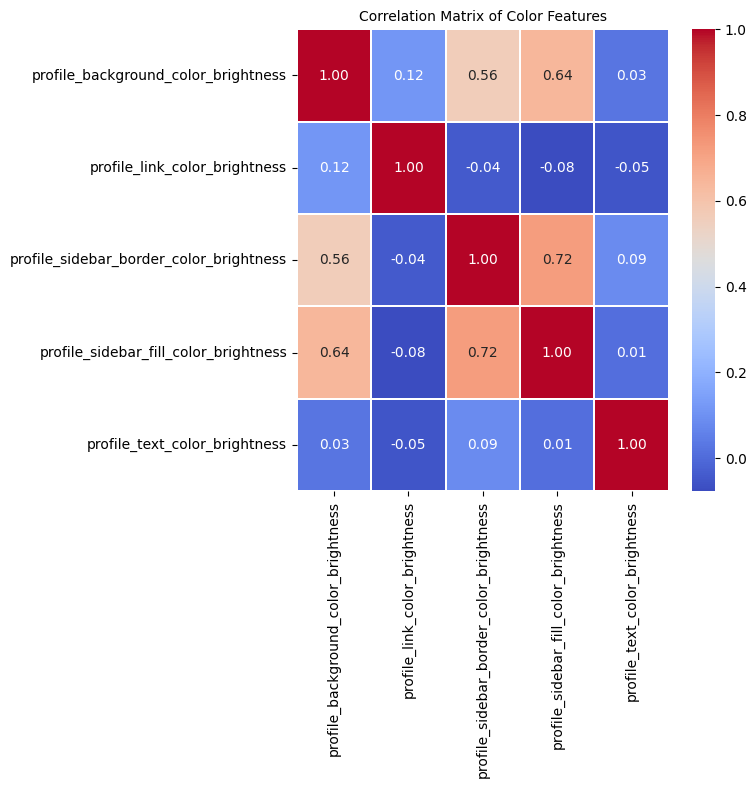

In [ ]:
# List of color-related columns (RGB components for each color)
color_columns = [
    'profile_background_color_brightness',
    'profile_link_color_brightness',
    'profile_sidebar_border_color_brightness',
    'profile_sidebar_fill_color_brightness',
    'profile_text_color_brightness'
]

# Compute the correlation matrix
corr_matrix = users[color_columns].corr()

plt.figure(figsize=(6, 6))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.3)
plt.title('Correlation Matrix of Color Features', fontsize=10)
plt.show()

In [ ]:
users = users.drop(['profile_background_color_r', 'profile_background_color_g', 'profile_background_color_b',
    'profile_link_color_r', 'profile_link_color_g', 'profile_link_color_b',
    'profile_sidebar_border_color_r', 'profile_sidebar_border_color_g', 'profile_sidebar_border_color_b',
    'profile_sidebar_fill_color_r', 'profile_sidebar_fill_color_g', 'profile_sidebar_fill_color_b',
    'profile_text_color_r', 'profile_text_color_g', 'profile_text_color_b',
    'profile_link_color_brightness',
    'profile_sidebar_border_color_brightness',
    'profile_sidebar_fill_color_brightness',
    'profile_text_color_brightness'
    ], axis=1)

#### Further Preprocessing Needed

*   Account Age
*   Convert Categorical to Numerical
*   Normalize Continuous Variables
*   Extract Numerical Values from Dates (If required)
*   Process Text Data (Later)


In [ ]:
# Account Age
users["account_age"] = (pd.Timestamp.now(tz="UTC") - users["created_at"]).dt.days / 365
print(f"The account_age min value (in years): {users.account_age.min()}, \nThe account_age max value (in years): {users.account_age.max()}")

The account_age min value (in years): 8.161643835616438, 
The account_age max value (in years): 18.378082191780823


In [ ]:
# Get Numeric Columns
numeric_columns = users.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'id' in numeric_columns:
    numeric_columns.remove('id')
print(f"Numeric Columns: {numeric_columns}")

# Scaling Numeric Columns (MinMax)
scaler = MinMaxScaler()
users[numeric_columns] = scaler.fit_transform(users[numeric_columns])

Numeric Columns: ['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'utc_offset', 'statuses_count', 'profile_background_color_brightness', 'account_age']


In [ ]:
# Convert Boolean Columns to 0 or 1
bool_columns = users.select_dtypes(include=['bool']).columns.tolist()
print(f"boolean Columns: {bool_columns}")

users[bool_columns] = users[bool_columns].astype(int)

boolean Columns: ['geo_enabled', 'verified', 'is_translation_enabled', 'profile_background_tile', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'depression']


In [ ]:
users["creation_year"] = users["created_at"].dt.year

#### Feature Selection
<table border="1" style="border-collapse: collapse; width: 100%; text-align: left;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="padding: 8px;">Category</th>
      <th style="padding: 8px;">Features</th>
      <th style="padding: 8px;">Justification</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 8px;">User Influence & Engagement</td>
      <td style="padding: 8px;">followers_count, <br> friends_count, <br> listed_count, <br> statuses_count, <br> favourites_count</td>
      <td style="padding: 8px;">Social engagement level— <br> People with higher/lower engagement may exhibit different online <br>behaviors related to mental health.</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Account Information</td>
      <td style="padding: 8px;">account_age</td>
      <td style="padding: 8px;">Account age—<br> Older vs. newer accounts may reflect different behavioral patterns.</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Behavioral Features</td>
      <td style="padding: 8px;">geo_enabled, <br> profile_use_background_image, <br> has_extended_profile, <br> default_profile, <br> default_profile_image</td>
      <td style="padding: 8px;">Customization & privacy behavior— <br> These may indicate user engagement and personality.</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Visual Preferences</td>
      <td style="padding: 8px;">profile_background_color_brightness</td>
      <td style="padding: 8px;">Color psychology— <br>
       Colors can indicate emotions and psychological states.</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Verified Status</td>
      <td style="padding: 8px;">verified</td>
      <td style="padding: 8px;">Social credibility— <br> Verified users may behave differently online.</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Language & Translation</td>
      <td style="padding: 8px;">is_translation_enabled </td>
      <td style="padding: 8px;">Global vs. local engagement— <br> Multilingual users might have different social patterns.</td>
    </tr>
    <tr>
      <td style="padding: 8px;">Target Variable</td>
      <td style="padding: 8px;">depression</td>
      <td style="padding: 8px;">Our regression target— <br> Deppressed or not</td>
    </tr>
  </tbody>
</table>


In [ ]:
num_cols = ['creation_year', 'geo_enabled', 'profile_use_background_image', 'has_extended_profile', 'default_profile',
    'default_profile_image', 'verified', 'is_translation_enabled']

# Define subplot layout
cols = 3  # Number of columns
rows = math.ceil(len(num_cols) / cols)  # Number of rows

fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[f"Avg {var} vs Depression" for var in num_cols],
    horizontal_spacing=0.1,  # Adjust spacing
    vertical_spacing=0.1
)

# Add each variable's plot to the figure
for idx, var in enumerate(num_cols):
    row = idx // cols + 1
    col = idx % cols + 1

    variable_count = users.groupby([var, 'depression'])[var].count().unstack()

    # Add bars for each depression category
    for depression_status in [0, 1]:
        fig.add_trace(
            go.Bar(
                x=variable_count.index,
                y=variable_count[depression_status],
                name=f"Depression: {'True' if depression_status == 1 else 'False'}",
                text=variable_count[depression_status].round(2),  # Round for better display
                textposition='outside',
                width=0.2,
                marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
            ),
            row=row, col=col
            )

# Update layout
fig.update_layout(
    title="Comparison of Numerical Features with Depression",
    height=rows * 300,  # Adjust height dynamically
    width=1200,  # Set width for better visibility
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white'),
    barmode='group',  # Ensures bars for depression=True and False are placed side by side
    showlegend=False
)

fig.show()

In [ ]:
# Numerical columns
num_cols = [
    'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count',
    'profile_background_color_brightness', 'account_age'
]

# Define subplot layout
cols = 3  # Number of columns
rows = math.ceil(len(num_cols) / cols)  # Number of rows

fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[f"Avg {var} vs Depression" for var in num_cols],
    horizontal_spacing=0.1,  # Adjust spacing
    vertical_spacing=0.1
)

# Add each variable's plot to the figure
for idx, var in enumerate(num_cols):
    row = idx // cols + 1
    col = idx % cols + 1

    variable_count = users.groupby('depression')[var].mean()

    fig.add_trace(
        go.Bar(
            x=variable_count.index,
            y=variable_count.values,
            marker_color='rgb(156, 39, 176)',
            text=variable_count.round(2),
            textposition='outside',
            width=0.2,
            marker=dict(line=dict(width=1, color='rgba(0,0,0,1)'), opacity=1)
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    title="Comparison of Numerical Features with Depression",
    height=rows * 300,  # Adjust height dynamically
    width=1200,  # Set width for better visibility
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white'),
    showlegend=False
)

fig.show()

In [ ]:
# Extract numeric and categorical columns
num_cols = users.select_dtypes(include=[np.number]).columns

# Assuming `train_data` is your DataFrame and `num_cols` is a list of numerical columns
corr_matrix = users[num_cols].corr()

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlation'),
))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    width=800,
    height=700,
    template='plotly_dark',  # Use dark theme
)

fig.show()

In [ ]:
users = users[['id', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'geo_enabled', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'profile_background_color_brightness', 'account_age', 'verified', 'is_translation_enabled', 'depression']]

In [ ]:
users

id  followers_count  friends_count  listed_count  \
3643          1057022347         0.000471       0.004931      0.000240   
1636           171999132         0.000255       0.016718      0.000601   
4703  751907980405198848         0.001638       0.000828      0.005766   
2992          2236408118         0.005013       0.036608      0.000841   
5502           434369401         0.000197       0.002477      0.000120   
...                  ...              ...            ...           ...   
5734           322279406         0.000933       0.003038      0.000240   
5191          1895493180         0.007947       0.041326      0.002883   
5390          2317448645         0.000643       0.006225      0.000120   
860             21038530         0.000003       0.000039      0.000000   
1371  760734453102551040         0.001782       0.001160      0.009010   

      favourites_count  statuses_count  geo_enabled  \
3643          0.005445        0.002718            0   
1636          0.001973        0.000604            0   
4703          0.099888        0.006630            0   
2992          0.005770        0.002221            0   
5502          0.009385        0.008613            0   
...                ...             ...          ...   
5734          0.024547        0.011156            1   
5191          0.049556        0.017103            1   
5390          0.002508        0.003144            0   
860           0.000000        0.000003            0   
1371          0.046266        0.008351            0   

      profile_use_background_image  has_extended_profile  default_profile  \
3643                             1                     1                0   
1636                             1                     0                0   
4703                             0                     0                0   
2992                             1                     0                0   
5502                             1                     0                1   
...                            ...                   ...              ...   
5734                             0                     1                0   
5191                             1                     1                0   
5390                             1                     0                1   
860                              1                     0                1   
1371                             0                     1                0   

      default_profile_image  profile_background_color_brightness  account_age  \
3643                      0                             0.106498     0.394313   
1636                      0                             0.282984     0.632779   
4703                      0                             0.000000     0.049893   
2992                      0                             1.000000     0.303112   
5502                      0                             0.842118     0.498391   
...                     ...                                  ...          ...   
5734                      0                             0.486122     0.544528   
5191                      0                             0.842118     0.323766   
5390                      0                             0.842118     0.288627   
860                       1                             0.842118     0.774142   
1371                      0                             0.000000     0.043455   

      verified  is_translation_enabled  depression  
3643         0                       0           0  
1636         0                       0           0  
4703         0                       0           0  
2992         0                       0           1  
5502         0                       0           1  
...        ...                     ...         ...  
5734         0                       0           1  
5191         0                       0           1  
5390         0                       0           1  
860          0                       0      

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11051 entries, 3643 to 1371
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   11051 non-null  int64  
 1   followers_count                      11051 non-null  float64
 2   friends_count                        11051 non-null  float64
 3   listed_count                         11051 non-null  float64
 4   favourites_count                     11051 non-null  float64
 5   statuses_count                       11051 non-null  float64
 6   geo_enabled                          11051 non-null  int64  
 7   profile_use_background_image         11051 non-null  int64  
 8   has_extended_profile                 11051 non-null  int64  
 9   default_profile                      11051 non-null  int64  
 10  default_profile_image                11051 non-null  int64  
 11  profile_background_color_bright

# Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import requests
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from tqdm import tqdm

from sklearn.ensemble import StackingClassifier, VotingClassifier

In [ ]:
def run_model(data, model, name):
    # Separate features (X) and target (y)
    X = data.drop(["id", "depression"], axis=1)
    y = data["depression"]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

    # Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Fit the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Return the model's predictions and the actual labels (y_test)
    return predictions, y_test

In [ ]:
def models_with_hyperparameter_tuning(data):
    results = []  # Stores final evaluation results
    cm_data = []  # Stores confusion matrix
    roc_data = []  # Stores ROC curve data

    # Separate features (X) and target (y)
    X = data.drop(["id", "depression"], axis=1)
    y = data["depression"]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

    models = {
        "Logistic Regression": (LogisticRegression(), {
            "penalty": ['l1', 'l2'],
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ['liblinear']
        }),
        "Gradient Boosting": (GradientBoostingClassifier(), {
            "n_estimators": [50, 100, 300, 500],
            "learning_rate": [0.01, 0.1, 0.2, 0.3],
            "max_depth": [3, 5, 7, 10]
        }),
        "AdaBoost": (AdaBoostClassifier(), {
            "n_estimators": [50, 100, 200, 300],
            "learning_rate": [0.01, 0.1, 0.2, 0.5]
        }),
        "Gaussian Naive Bayes": (GaussianNB(), {
            "var_smoothing": [1e-10, 1e-9, 1e-8, 1e-7]
        }),
        "K-Nearest Neighbors": (KNeighborsClassifier(), {
            "n_neighbors": [3, 5, 7, 9, 11],
            "weights": ['uniform', 'distance'],
            "metric": ['euclidean', 'manhattan', 'chebyshev']
        }),
        "Decision Tree": (DecisionTreeClassifier(), {
            "criterion": ['gini', 'entropy'],
            "max_depth": [5, 10, 20, 30, None],
            "min_samples_split": [2, 5, 10]
        }),
        "Random Forest": (RandomForestClassifier(), {
            "n_estimators": [50, 100, 300, 500],
            "max_depth": [10, 20, 30, None],
            "min_samples_split": [2, 5, 10]
        }),
        "Support Vector Machine": (SVC(probability=True), {
            "C": [0.01, 0.1, 1, 10, 100],
            "kernel": ['linear', 'rbf', 'poly'],
            "gamma": [0.001, 0.01, 0.1, 1]
        })
    }

    for name, (model, param_grid) in tqdm(models.items()):
        print(f"Tuning {name}...")

        grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        print(f"Best params for {name}: {grid_search.best_params_}")

        # Run model with best hyperparameters
        predictions, y_test = run_model(data, best_model, name)

        # Evaluate the model
        accuracy, precision, recall, f1, cm = evaluate_model(y_test, predictions)

        # ROC curve data
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

        cm_data.append({
            "Model": name,
            "Matrix": cm
        })

        roc_data.append({
            "Model": name,
            "FPR": fpr.tolist(),
            "TPR": tpr.tolist(),
            "AUC": roc_auc
        })

        print(f"\naccuracy: {accuracy} \n")

    results_df = pd.DataFrame(results).round(4).sort_values(by="Accuracy", ascending=False)
    return results_df, cm_data, roc_data

In [ ]:
def evaluate_model(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred)

    # Calculate recall
    recall = recall_score(y_true, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, cm

## Evaluating Models and Hyperparameters optimization

In [ ]:
# Evaluate model performance using different models
performance, cm_data, roc_data = models_with_hyperparameter_tuning(users)

  0%|          | 0/8 [00:00<?, ?it/s]

Tuning Logistic Regression...
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best params for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


 12%|█▎        | 1/8 [00:03<00:25,  3.64s/it]


accuracy: 0.6278648974668275 

Tuning Gradient Boosting...
Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


 25%|██▌       | 2/8 [02:32<08:55, 89.24s/it]


accuracy: 0.6845597104945718 

Tuning AdaBoost...
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best params for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}


 38%|███▊      | 3/8 [02:46<04:34, 54.95s/it]


accuracy: 0.6369119420989143 

Tuning Gaussian Naive Bayes...
Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best params for Gaussian Naive Bayes: {'var_smoothing': 1e-09}


 50%|█████     | 4/8 [02:47<02:13, 33.42s/it]


accuracy: 0.5156815440289505 

Tuning K-Nearest Neighbors...
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best params for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


 62%|██████▎   | 5/8 [03:00<01:18, 26.24s/it]


accuracy: 0.6242460796139928 

Tuning Decision Tree...
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best params for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


 75%|███████▌  | 6/8 [03:04<00:37, 18.67s/it]


accuracy: 0.6423401688781665 

Tuning Random Forest...
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best params for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


 88%|████████▊ | 7/8 [05:18<00:56, 56.42s/it]


accuracy: 0.6845597104945718 

Tuning Support Vector Machine...
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best params for Support Vector Machine: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


100%|██████████| 8/8 [20:06<00:00, 150.78s/it]


accuracy: 0.6109770808202654 



In [ ]:
performance

Model  Accuracy  Precision  Recall  F1 Score
1       Gradient Boosting    0.6846     0.6667  0.8167    0.7341
6           Random Forest    0.6846     0.6782  0.7771    0.7243
5           Decision Tree    0.6423     0.6425  0.7421    0.6887
2                AdaBoost    0.6369     0.5953  0.9966    0.7453
0     Logistic Regression    0.6279     0.6482  0.6606    0.6543
4     K-Nearest Neighbors    0.6242     0.6436  0.6618    0.6525
7  Support Vector Machine    0.6110     0.6083  0.7590    0.6754
3    Gaussian Naive Bayes    0.5157     0.7288  0.1459    0.2432

In [ ]:
# Evaluate model performance using different models
performance, cm_data, roc_data = models_with_hyperparameter_tuning(users)

  0%|          | 0/8 [00:00<?, ?it/s]

Tuning Logistic Regression...
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best params for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


 12%|█▎        | 1/8 [00:08<01:02,  8.88s/it]


accuracy: 0.6278648974668275 

Tuning Gradient Boosting...
Fitting 4 folds for each of 64 candidates, totalling 256 fits
Best params for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


 25%|██▌       | 2/8 [37:32<2:12:20, 1323.38s/it]


accuracy: 0.672496984318456 

Tuning AdaBoost...
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best params for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 300}


 38%|███▊      | 3/8 [39:16<1:03:53, 766.75s/it] 


accuracy: 0.6519903498190591 

Tuning Gaussian Naive Bayes...
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best params for Gaussian Naive Bayes: {'var_smoothing': 1e-10}


 50%|█████     | 4/8 [39:17<30:56, 464.23s/it]  


accuracy: 0.5156815440289505 

Tuning K-Nearest Neighbors...
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best params for K-Nearest Neighbors: {'metric': 'chebyshev', 'n_neighbors': 11, 'weights': 'uniform'}


 62%|██████▎   | 5/8 [39:48<15:24, 308.02s/it]


accuracy: 0.6375150784077201 

Tuning Decision Tree...
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best params for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


 75%|███████▌  | 6/8 [39:58<06:53, 206.86s/it]


accuracy: 0.6477683956574186 

Tuning Random Forest...
Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best params for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}


 88%|████████▊ | 7/8 [50:26<05:44, 344.52s/it]


accuracy: 0.6821471652593486 

Tuning Support Vector Machine...
Fitting 4 folds for each of 60 candidates, totalling 240 fits


 88%|████████▊ | 7/8 [6:50:24<58:37, 3517.78s/it]


KeyboardInterrupt: 

In [ ]:
performance

Model  Accuracy  Precision  Recall  F1 Score
1       Gradient Boosting    0.6846     0.6667  0.8167    0.7341
6           Random Forest    0.6846     0.6782  0.7771    0.7243
5           Decision Tree    0.6423     0.6425  0.7421    0.6887
2                AdaBoost    0.6369     0.5953  0.9966    0.7453
0     Logistic Regression    0.6279     0.6482  0.6606    0.6543
4     K-Nearest Neighbors    0.6242     0.6436  0.6618    0.6525
7  Support Vector Machine    0.6110     0.6083  0.7590    0.6754
3    Gaussian Naive Bayes    0.5157     0.7288  0.1459    0.2432

In [ ]:
def models_with_hyperparameter_tuning(data):
    results = []  # Stores final evaluation results
    cm_data = []  # Stores confusion matrix
    roc_data = []  # Stores ROC curve data

    # Fixing the random seed for reproducibility
    RANDOM_SEED = 42

    # Separate features (X) and target (y)
    X = data.drop(["id", "depression"], axis=1)
    y = data["depression"]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

    # Define hyperparameter grids
    param_grids = {
        "GradientBoosting": {
            "n_estimators": [100, 300, 500, 800, 1000],
            "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
            "max_depth": [3, 5, 7, 10]
        },
        "RandomForest": {
            "n_estimators": [100, 300, 500, 800],
            "max_depth": [10, 20, 30, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        },
        "AdaBoost": {
            "n_estimators": [100, 300, 500],
            "learning_rate": [0.01, 0.1, 0.3, 0.5, 1.0]
        },
        "DecisionTree": {
            "criterion": ["gini", "entropy"],
            "max_depth": [5, 10, 20, 30, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        },
        "SVM": {
            "C": [0.01, 0.1, 1, 10, 100, 500, 1000],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1]
        }
    }

    models = {
        "GradientBoosting": GradientBoostingClassifier(random_state=RANDOM_SEED),
        "RandomForest": RandomForestClassifier(random_state=RANDOM_SEED),
        "AdaBoost": AdaBoostClassifier(random_state=RANDOM_SEED),
        "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_SEED),
        "SVM": SVC(random_state=RANDOM_SEED)
    }

    for name, model in tqdm(models.items()):
        print(f"Tuning {name}...")
        if name == "Support Vector Machine":
            grid_search = RandomizedSearchCV(model, param_grids[name], n_iter=20, cv=4, scoring='accuracy', random_state=RANDOM_SEED, n_jobs=-1)
        else:
            grid_search = GridSearchCV(model, param_grids[name], cv=4, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best params for {name}: {grid_search.best_params_}")

        # Run model with best hyperparameters
        predictions, y_test = run_model(data, best_model, name)

        # Evaluate the model
        accuracy, precision, recall, f1, cm = evaluate_model(y_test, predictions)

        # ROC curve data
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

        cm_data.append({
            "Model": name,
            "Matrix": cm
        })

        roc_data.append({
            "Model": name,
            "FPR": fpr.tolist(),
            "TPR": tpr.tolist(),
            "AUC": roc_auc
        })

        print(f"\naccuracy: {accuracy} \n")

    results_df = pd.DataFrame(results).round(4).sort_values(by="Accuracy", ascending=False)
    return results_df, cm_data, roc_data

In [ ]:
# Evaluate model performance using different models
performance, cm_data, roc_data = models_with_hyperparameter_tuning(users)

  0%|          | 0/5 [00:00<?, ?it/s]

Tuning GradientBoosting...
Fitting 4 folds for each of 120 candidates, totalling 480 fits
Best params for GradientBoosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 800}


 20%|██        | 1/5 [2:35:36<10:22:27, 9336.96s/it]


accuracy: 0.6815440289505428 

Tuning RandomForest...
Fitting 4 folds for each of 144 candidates, totalling 576 fits
Best params for RandomForest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


 40%|████      | 2/5 [3:27:23<4:43:36, 5672.11s/it] 


accuracy: 0.6815440289505428 

Tuning AdaBoost...
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best params for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 500}


 60%|██████    | 3/5 [3:30:17<1:45:23, 3161.66s/it]


accuracy: 0.6640530759951749 

Tuning DecisionTree...
Fitting 4 folds for each of 90 candidates, totalling 360 fits
Best params for DecisionTree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


 80%|████████  | 4/5 [3:30:46<32:04, 1924.62s/it]  


accuracy: 0.6477683956574186 

Tuning SVM...
Fitting 4 folds for each of 84 candidates, totalling 336 fits


In [ ]:
def plot_confusion_matrix(cm, labels, model_name, ax):
    # Create an image of the confusion matrix
    im = ax.imshow(cm, interpolation='nearest')

    # Add a colorbar to the plot
    ax.figure.colorbar(im, ax=ax)

    # Set axis labels and title
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           title=f'Confusion Matrix for {model_name}',
           ylabel='True label',
           xlabel='Predicted label')

    # Add text annotations for each cell in the matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="w")

In [ ]:
def plot_confusion_matrices(cm_data, columns, rows):
    # Determine the number of models and create subplots accordingly
    num_models = len(cm_data)
    fig, axes = plt.subplots(rows, columns, figsize=(15, 10))

    # Iterate through the confusion matrix data for each model
    for i, entry in enumerate(cm_data):
        model_name = entry['Model']
        cm = entry['Matrix']
        class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels
        row = i // columns
        col = i % columns
        ax = axes[row, col]
        plot_confusion_matrix(cm, class_labels, model_name, ax)

    # Turn off empty subplots
    for i in range(len(cm_data), columns * rows):
        row = i // columns
        col = i % columns
        axes[row, col].axis('off')

    # Adjust the layout and display the subplots
    plt.tight_layout()
    plt.show()

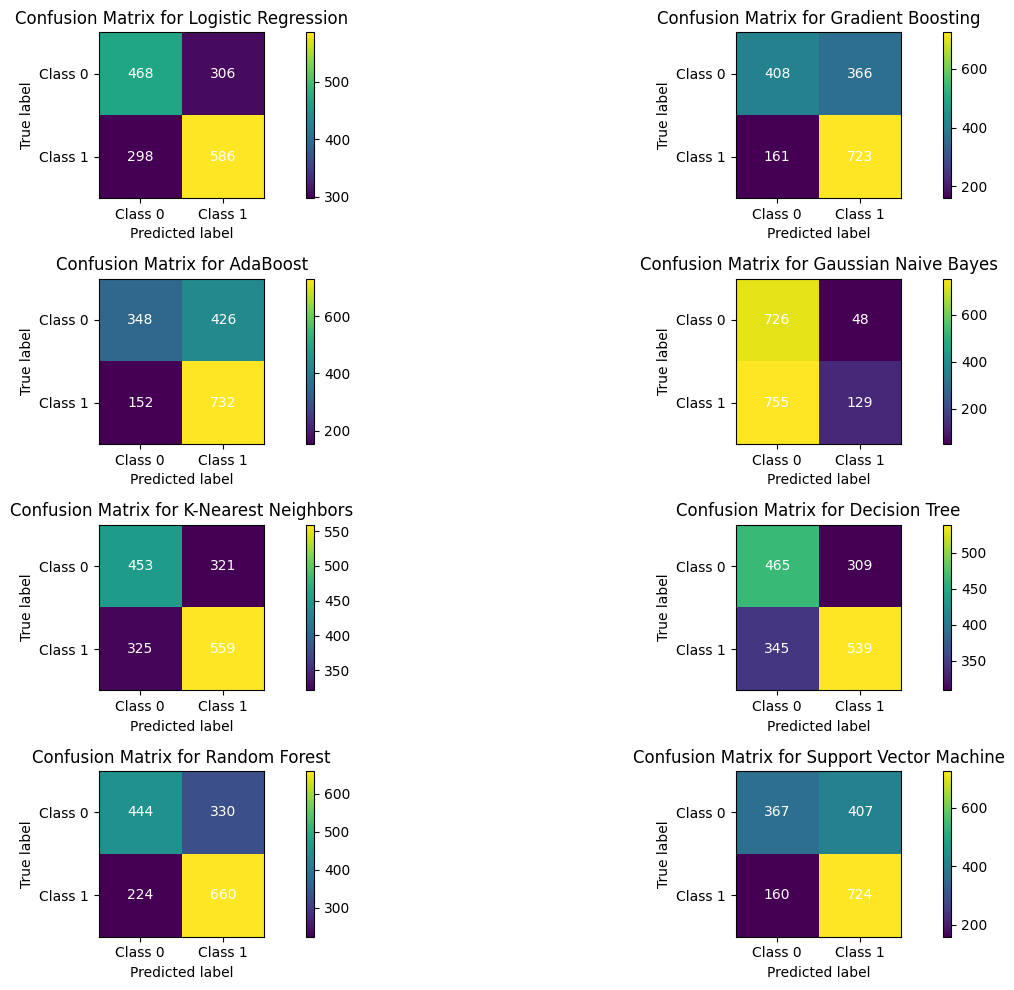

In [ ]:
plot_confusion_matrices(cm_data, columns=2, rows=4)

In [ ]:
def plot_roc_curve(roc_data):
    plt.figure(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic (ROC) Curve')

    for model_data in roc_data:
        model_name = model_data['Model']
        fpr = model_data['FPR']
        tpr = model_data['TPR']
        auc = model_data['AUC']

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')  # Removed color='gray'
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

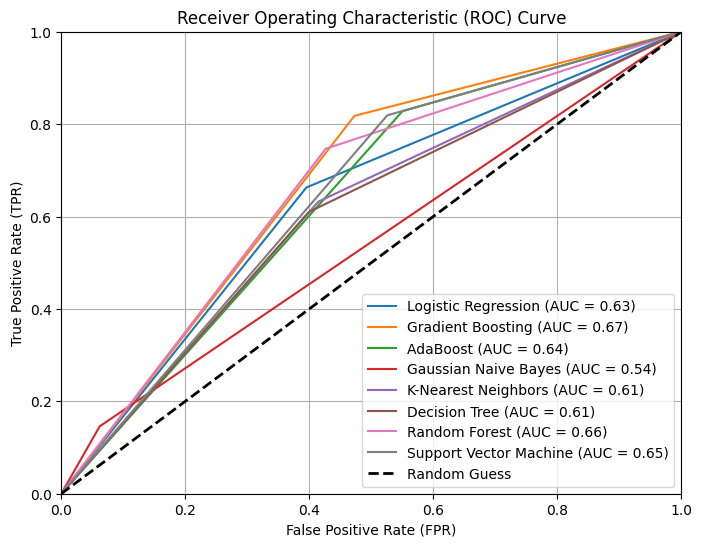

In [ ]:
plot_roc_curve(roc_data)

## Ensemble Learning for performance boosting

Optimal Hyperparameters were identified in the previous section

In [ ]:
# Split the dataset into training and testing sets
X = users.drop(["id", "depression"], axis=1)
y = users["depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

In [ ]:
# Define models with optimal hyperparameters
gb_model = GradientBoostingClassifier(n_estimators=800, learning_rate=0.01, max_depth=3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=300, max_depth=30, min_samples_leaf= 1, min_samples_split=10, random_state=42)
adab_model = AdaBoostClassifier(learning_rate=1.0, n_estimators=500, random_state=42)

logreg_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)

In [ ]:
# Voting Classifier (Ensemble)
voting_clf = VotingClassifier(estimators=[
    ('gb', gb_model),
    ('rf', rf_model),
    ('adab', adab_model)
], voting='soft')  # 'soft' averages probabilities; 'hard' takes majority vote

# Fit and evaluate
voting_clf.fit(X_train, y_train)
voting_preds = voting_clf.predict(X_test)

In [ ]:
# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('gb', gb_model),
    ('rf', rf_model),
    ('adab', adab_model)
], final_estimator=logreg_model, passthrough=True)  # passthrough=True allows raw features + meta-model

# Fit and evaluate
stacking_clf.fit(X_train, y_train)
stacking_preds = stacking_clf.predict(X_test)

In [ ]:
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_preds))
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_preds))

Voting Classifier Accuracy: 0.6815440289505428
Stacking Classifier Accuracy: 0.6899879372738239


# NLP Analysis (Profiles' Descriptions)
<h4>Topic Modeling & Semantic Understanding </h4>
Goal: Extract underlying themes from profile descriptions to identify depressive tendencies. </br>

<h4>TF-IDF: Term Frequency-Inverse Document Frequency </h4>
(Weighs words based on their importance in a document relative to their frequency across the entire dataset: Helps focus on depression-indicating terms while reducing the impact of frequent but irrelevant words.)

In [ ]:
users.iloc[0:5].description

3643           Is it Tribe time yet? —#BlueLivesMatter 💙—
1636    Artistic wandering soul on a quest of self dis...
4703                                    #지민 🌼 #태형 🌻 #뷔민 🌱
2992    18 .  aries . music . makeup  . books . beauty...
5502    Never rat on your friends, and always keep you...
Name: description, dtype: object

### Data Cleaning

In [ ]:
! pip install langdetect
import glob
import json
import seaborn as sns
from langdetect import detect
from langdetect import DetectorFactory

import matplotlib.pyplot as plt
plt.style.use('ggplot')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=02ed18155d6b065c84cbcd4dce9beb022b7070e63adb2313b406e06e208e00cb
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


### Data Cleaning

In [ ]:
# Handling Multiple Languages

# set seed
DetectorFactory.seed = 0

users["description"] = users["description"].astype(str).fillna("")
users["description"] = users["description"].replace("", "unknown")

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(users))):
    # split by space into list, take the first x intex, join with space
    text = users.iloc[ii]['description'].split(" ")

    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        print(f'text: {text}, all_words: {all_words}')
        print('--------------------')
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            print("unknown")
            print('--------------------')
            lang = "unknown"
            pass

    # get the language
    languages.append(lang)

  1%|          | 67/11051 [00:02<03:23, 54.11it/s]

text: ['💯'], all_words: {'💯'}
--------------------
unknown
--------------------
text: ['○https://t.co/n4JiCTir9N'], all_words: {'○https://t.co/n4JiCTir9N'}
--------------------
unknown
--------------------


  3%|▎         | 336/11051 [00:06<02:36, 68.46it/s]

text: ['17'], all_words: {'17'}
--------------------
unknown
--------------------


  3%|▎         | 374/11051 [00:06<02:07, 83.95it/s]

text: ['♛'], all_words: {'♛'}
--------------------
unknown
--------------------


  4%|▍         | 497/11051 [00:08<02:41, 65.24it/s]

text: ['333'], all_words: {'333'}
--------------------
unknown
--------------------


  5%|▍         | 504/11051 [00:08<02:57, 59.41it/s]

text: ['🎄🎄🎄🎅🏻🎅🏻🎅🏻'], all_words: {'🎄🎄🎄🎅🏻🎅🏻🎅🏻'}
--------------------
unknown
--------------------


  5%|▌         | 584/11051 [00:11<05:12, 33.44it/s]

text: ['◤', '･ﾟ✧*', '18%', "⋮〔ᴀᴛʜᴇɴᴀ's", 'ᴄʜɪʟᴅ', '⇌', 'Cᴏᴜɴsᴇʟᴏʀ〕∫', '↺', '☾✦', '↬', '❛Nᴇᴠᴇʀ', 'ᴄᴀʟʟ', 'ᴍᴇ', 'ᴄᴏʟᴅ﹐', 'ʀᴇᴍᴇᴍʙᴇʀ', 'ᴛʜᴀᴛ', 'ᴀ', 'ʙʀᴏᴋᴇɴ', 'ᴘᴇʀsᴏɴ', 'ɴᴇᴠᴇʀ', 'ɢᴏᴇs', 'ʙᴀᴄᴋ', 'ᴛᴏ', 'ʙᴇɪɴɢ', 'ᴛʜᴇ', 'sᴀᴍᴇ.❜', '˹K', '›', 'T', '›', 'Y', '›', 'L', '›', 'L˼'], all_words: {"⋮〔ᴀᴛʜᴇɴᴀ's", 'ᴀ', '↺', 'ᴘᴇʀsᴏɴ', 'Y', 'ᴛᴏ', 'ᴛʜᴀᴛ', 'sᴀᴍᴇ.❜', 'Cᴏᴜɴsᴇʟᴏʀ〕∫', 'ʙʀᴏᴋᴇɴ', '◤', '↬', 'ᴄᴏʟᴅ﹐', 'ʙᴇɪɴɢ', 'ᴄᴀʟʟ', 'ʙᴀᴄᴋ', '˹K', '⇌', '☾✦', 'ɢᴏᴇs', 'L', 'ᴄʜɪʟᴅ', '❛Nᴇᴠᴇʀ', 'ɴᴇᴠᴇʀ', 'L˼', 'ᴍᴇ', 'T', '18%', '›', 'ʀᴇᴍᴇᴍʙᴇʀ', '･ﾟ✧*', 'ᴛʜᴇ'}
--------------------
unknown
--------------------
text: ['18'], all_words: {'18'}
--------------------
unknown
--------------------


  5%|▌         | 601/11051 [00:11<04:50, 35.98it/s]

text: ['†'], all_words: {'†'}
--------------------
unknown
--------------------


  6%|▌         | 675/11051 [00:12<02:35, 66.85it/s]

text: ['https://t.co/13CbKPS7y7'], all_words: {'https://t.co/13CbKPS7y7'}
--------------------
unknown
--------------------


  7%|▋         | 726/11051 [00:13<02:26, 70.59it/s]

text: ['https://t.co/Xe4UHjPp0z'], all_words: {'https://t.co/Xe4UHjPp0z'}
--------------------
unknown
--------------------
text: ['🇲🇦', '🇱🇧'], all_words: {'🇲🇦', '🇱🇧'}
--------------------
unknown
--------------------


  7%|▋         | 769/11051 [00:14<02:18, 74.02it/s]

text: ['💙💗⚪️💗💙'], all_words: {'💙💗⚪️💗💙'}
--------------------
unknown
--------------------


  8%|▊         | 894/11051 [00:16<02:03, 82.47it/s]

text: ['https://t.co/UVLSpga1il'], all_words: {'https://t.co/UVLSpga1il'}
--------------------
unknown
--------------------
text: ['💘'], all_words: {'💘'}
--------------------
unknown
--------------------


  9%|▉         | 988/11051 [00:17<02:29, 67.13it/s]

text: ['07.02.15', '|', '|', '01.25.16'], all_words: {'01.25.16', '|', '07.02.15'}
--------------------
unknown
--------------------


  9%|▉         | 1013/11051 [00:18<02:10, 77.09it/s]

text: ['11:11'], all_words: {'11:11'}
--------------------
unknown
--------------------


 10%|▉         | 1076/11051 [00:18<01:42, 97.58it/s] 

text: ['🇨🇱'], all_words: {'🇨🇱'}
--------------------
unknown
--------------------


 10%|▉         | 1104/11051 [00:19<01:29, 111.07it/s]

text: ['¥'], all_words: {'¥'}
--------------------
unknown
--------------------


 12%|█▏        | 1312/11051 [00:21<02:02, 79.76it/s]

text: ['🌺'], all_words: {'🌺'}
--------------------
unknown
--------------------
text: ['https://t.co/OZKqYgAhIr'], all_words: {'https://t.co/OZKqYgAhIr'}
--------------------
unknown
--------------------


 12%|█▏        | 1335/11051 [00:21<01:48, 89.14it/s]

text: ['12/4/12,', '1/13/13,', '9/17/13,', '10/25/13'], all_words: {'12/4/12,', '10/25/13', '9/17/13,', '1/13/13,'}
--------------------
unknown
--------------------


 13%|█▎        | 1403/11051 [00:22<01:57, 81.95it/s]

text: ['20', '♈️💫🌙'], all_words: {'♈️💫🌙', '20'}
--------------------
unknown
--------------------


 13%|█▎        | 1420/11051 [00:22<02:38, 60.59it/s]

text: ['💆🏼'], all_words: {'💆🏼'}
--------------------
unknown
--------------------


 14%|█▎        | 1492/11051 [00:24<03:37, 43.97it/s]

text: ['29|10|10'], all_words: {'29|10|10'}
--------------------
unknown
--------------------


 14%|█▍        | 1546/11051 [00:25<03:15, 48.64it/s]

text: ['03.13.14'], all_words: {'03.13.14'}
--------------------
unknown
--------------------
text: ['ytg//⠀⠀⠀⠀⠀⠀⠀⠀⠀', '⠀⠀⠀', '⠀⠀⠀⠀⠀⠀⠀', '⠀⠀', '⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', '⠀⠀⠀⠀', '⠀⠀⠀⠀i', 'tried'], all_words: {'ytg//⠀⠀⠀⠀⠀⠀⠀⠀⠀', '⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', '⠀⠀⠀⠀⠀⠀⠀', '⠀⠀⠀', '⠀⠀⠀⠀', 'tried', '⠀⠀', '⠀⠀⠀⠀i'}
--------------------
unknown
--------------------


 14%|█▍        | 1559/11051 [00:26<03:16, 48.41it/s]

text: ['||', '', 'ᶜᵘʳʳᵉᶰᵗᶫʸ', 'ᶦᶰ', 'ᴷᴴ', 'ᵃᶰᵈ', 'ᶠᶠˣᵛ', 'ʰᵉᶫᶫ⁻', 'ʰᵉᶫᵖ', 'ᵐᵉ', '||', 'ᶦ', 'ʷᵃᶰᵗ', 'ᵗᵒ', 'ʳᶦᵈᵉ', 'ᵐʸ', 'ᶜʰᵒᶜᵒᵇᵒ', 'ᵃᶫᶫ', 'ᵈᵃʸ', '!!', '||'], all_words: {'', 'ᶦᶰ', 'ᶜʰᵒᶜᵒᵇᵒ', 'ᵃᶰᵈ', '||', 'ᶜᵘʳʳᵉᶰᵗᶫʸ', 'ᴷᴴ', 'ᶠᶠˣᵛ', 'ᶦ', '!!', 'ᵗᵒ', 'ʷᵃᶰᵗ', 'ʰᵉᶫᶫ⁻', 'ᵐʸ', 'ʰᵉᶫᵖ', 'ʳᶦᵈᵉ', 'ᵐᵉ', 'ᵈᵃʸ', 'ᵃᶫᶫ'}
--------------------
unknown
--------------------


 15%|█▍        | 1621/11051 [00:27<01:47, 87.60it/s]

text: ['.☽'], all_words: {'.☽'}
--------------------
unknown
--------------------
text: ['💙', '➕', '💕', '=', '❤️'], all_words: {'💕', '➕', '💙', '❤️', '='}
--------------------
unknown
--------------------


 16%|█▌        | 1716/11051 [00:28<01:30, 102.82it/s]

text: ['✌'], all_words: {'✌'}
--------------------
unknown
--------------------
text: ['~~~~~'], all_words: {'~~~~~'}
--------------------
unknown
--------------------


 16%|█▌        | 1772/11051 [00:28<01:34, 97.82it/s]

text: ['\\]'], all_words: {'\\]'}
--------------------
unknown
--------------------
text: ['☀️'], all_words: {'☀️'}
--------------------
unknown
--------------------


 16%|█▋        | 1814/11051 [00:29<01:54, 80.37it/s]

text: ['20', ';'], all_words: {';', '20'}
--------------------
unknown
--------------------


 17%|█▋        | 1911/11051 [00:30<02:01, 75.36it/s]

text: ['1998'], all_words: {'1998'}
--------------------
unknown
--------------------


 18%|█▊        | 1990/11051 [00:31<01:26, 104.52it/s]

text: ['♡♡'], all_words: {'♡♡'}
--------------------
unknown
--------------------


 20%|█▉        | 2190/11051 [00:35<02:15, 65.52it/s]

text: ['🖤', '...'], all_words: {'...', '🖤'}
--------------------
unknown
--------------------


 21%|██        | 2295/11051 [00:37<02:16, 64.29it/s]

text: ['https://t.co/rnspZDYlvW'], all_words: {'https://t.co/rnspZDYlvW'}
--------------------
unknown
--------------------


 23%|██▎       | 2501/11051 [00:40<01:27, 98.20it/s]

text: ['💀💀'], all_words: {'💀💀'}
--------------------
unknown
--------------------


 23%|██▎       | 2523/11051 [00:40<01:25, 99.49it/s]

text: ['20'], all_words: {'20'}
--------------------
unknown
--------------------


 24%|██▎       | 2608/11051 [00:41<00:48, 173.86it/s]

text: ['19', '🇸🇴'], all_words: {'19', '🇸🇴'}
--------------------
unknown
--------------------
text: ['07/11/1948', '-', '09/18/2006🙏🏼'], all_words: {'09/18/2006🙏🏼', '07/11/1948', '-'}
--------------------
unknown
--------------------
text: ['.'], all_words: {'.'}
--------------------
unknown
--------------------


 25%|██▍       | 2754/11051 [00:42<00:45, 182.48it/s]

text: ['1/1'], all_words: {'1/1'}
--------------------
unknown
--------------------


 28%|██▊       | 3041/11051 [00:43<00:39, 204.74it/s]

text: ['⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀22⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Caribbean', 'University', '\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀02/10/2015', '♡', '⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\nOr', 'not', 'to', 'be.'], all_words: {'be.', '⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\nOr', 'University', 'to', '⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀22⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Caribbean', 'not', '♡', '\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀02/10/2015'}
--------------------
unknown
--------------------


 28%|██▊       | 3086/11051 [00:43<00:38, 204.98it/s]

text: ['🥀'], all_words: {'🥀'}
--------------------
unknown
--------------------


 29%|██▊       | 3155/11051 [00:44<00:35, 219.44it/s]

text: ['-', '....', '..', '...', '/', '..', '...', '/', '--', '-.--', '/', '-', '.--', '..', '-', '-', '.', '.-.', '/', '-...', '..', '---', '/', '..', '-.', '/', '--', '---', '.-.', '...', '.', '/', '-.-.', '---', '-..', '.'], all_words: {'--', '...', '-.', '---', '/', '....', '-.-.', '.', '..', '-..', '-', '.--', '-.--', '.-.', '-...'}
--------------------
unknown
--------------------
text: ['9.8.11'], all_words: {'9.8.11'}
--------------------
unknown
--------------------
text: ['http://t.co/7IRUJYHM5y'], all_words: {'http://t.co/7IRUJYHM5y'}
--------------------
unknown
--------------------
text: ['pare.72@libero.it'], all_words: {'pare.72@libero.it'}
--------------------
unknown
--------------------


 29%|██▉       | 3250/11051 [00:44<00:36, 214.69it/s]

text: ['🌞🌚'], all_words: {'🌞🌚'}
--------------------
unknown
--------------------
text: ['🖖🏼'], all_words: {'🖖🏼'}
--------------------
unknown
--------------------


 30%|███       | 3342/11051 [00:45<00:38, 198.15it/s]

text: ['20|➰'], all_words: {'20|➰'}
--------------------
unknown
--------------------


 33%|███▎      | 3642/11051 [00:46<00:35, 209.56it/s]

text: ['#574'], all_words: {'#574'}
--------------------
unknown
--------------------


 34%|███▍      | 3769/11051 [00:47<00:38, 189.85it/s]

text: ['$1B💸👼🏻'], all_words: {'$1B💸👼🏻'}
--------------------
unknown
--------------------
text: ['ᴵᴿᴵᴬᴺᴬ⁶'], all_words: {'ᴵᴿᴵᴬᴺᴬ⁶'}
--------------------
unknown
--------------------


 35%|███▍      | 3827/11051 [00:47<00:42, 168.99it/s]

text: ['🇩🇴'], all_words: {'🇩🇴'}
--------------------
unknown
--------------------


 35%|███▌      | 3883/11051 [00:47<00:41, 172.84it/s]

text: ['ㅤ'], all_words: {'ㅤ'}
--------------------
unknown
--------------------
text: ['🌙'], all_words: {'🌙'}
--------------------
unknown
--------------------
text: ['🍓', '🍒', '👼🏼', '💋'], all_words: {'🍒', '👼🏼', '💋', '🍓'}
--------------------
unknown
--------------------


 36%|███▌      | 3991/11051 [00:48<00:53, 131.46it/s]

text: ['∙̆.̯∙̆'], all_words: {'∙̆.̯∙̆'}
--------------------
unknown
--------------------


 38%|███▊      | 4149/11051 [00:50<00:56, 121.77it/s]

text: ['19'], all_words: {'19'}
--------------------
unknown
--------------------
text: ['20'], all_words: {'20'}
--------------------
unknown
--------------------
text: ['💖'], all_words: {'💖'}
--------------------
unknown
--------------------


 38%|███▊      | 4186/11051 [00:50<01:05, 104.73it/s]

text: ['\\^0^/'], all_words: {'\\^0^/'}
--------------------
unknown
--------------------


 38%|███▊      | 4231/11051 [00:51<00:53, 126.92it/s]

text: ['21.', '♓️✨'], all_words: {'♓️✨', '21.'}
--------------------
unknown
--------------------
text: ['916', '🌹'], all_words: {'🌹', '916'}
--------------------
unknown
--------------------


 39%|███▉      | 4301/11051 [00:51<01:11, 94.15it/s]

text: ['🇩🇪🇼🇸'], all_words: {'🇩🇪🇼🇸'}
--------------------
unknown
--------------------


 39%|███▉      | 4327/11051 [00:51<01:01, 108.46it/s]

text: ['👸🏼👅💄❤️'], all_words: {'👸🏼👅💄❤️'}
--------------------
unknown
--------------------


 40%|███▉      | 4378/11051 [00:52<00:59, 111.66it/s]

text: ['17'], all_words: {'17'}
--------------------
unknown
--------------------
text: ['✖️✖️'], all_words: {'✖️✖️'}
--------------------
unknown
--------------------


 41%|████      | 4502/11051 [00:53<00:52, 125.01it/s]

text: ['☠17', '♂', '❘', '2/5/2016┋ᴸᵒʷ⁻ᵏᵉʸ', 'ʰᵃᵗᵉˢ', 'ˢᵖᵒʳᵗᵃᶠˡᵒᵖ┋@cactusbun♡\nGᴀᴍᴇs', 'ᴀɴᴅ', 'Sᴛᴜғғ', '﹣', 'Pʀᴏʙᴀʙʟʏ', 'Mᴇɢᴀ', 'Mᴀɴ'], all_words: {'Sᴛᴜғғ', 'ᴀɴᴅ', '♂', 'Mᴀɴ', 'ˢᵖᵒʳᵗᵃᶠˡᵒᵖ┋@cactusbun♡\nGᴀᴍᴇs', 'ʰᵃᵗᵉˢ', 'Mᴇɢᴀ', 'Pʀᴏʙᴀʙʟʏ', '❘', '﹣', '2/5/2016┋ᴸᵒʷ⁻ᵏᵉʸ', '☠17'}
--------------------
unknown
--------------------
text: ['💰'], all_words: {'💰'}
--------------------
unknown
--------------------


 42%|████▏     | 4587/11051 [00:54<00:51, 126.02it/s]

text: ['http://t.co/mR9pgGXA6t', 'https://t.co/ERjHhrzmUk', 'http://t.co/CEFtP4RG3g?'], all_words: {'http://t.co/CEFtP4RG3g?', 'http://t.co/mR9pgGXA6t', 'https://t.co/ERjHhrzmUk'}
--------------------
unknown
--------------------


 42%|████▏     | 4645/11051 [00:54<00:50, 127.69it/s]

text: ['⠀⠀⠀⠀⠀⠀⠀⠀⠀✞|Chicago|✞', '⠀⠀⠀⠀⠀⠀⠀⠀', '⠀⠀⠀⠀⠀⠀FRE$H', 'LABOR™,', 'LLC⠀', 'raythedesigner1@yahoo.com', '⠀⠀⠀⠀⠀', '⠀⠀⠀⠀⠀', '⠀⠀⠀⠀⠀'], all_words: {'⠀⠀⠀⠀⠀', '⠀⠀⠀⠀⠀⠀⠀⠀', 'LABOR™,', '⠀⠀⠀⠀⠀⠀FRE$H', 'LLC⠀', '⠀⠀⠀⠀⠀⠀⠀⠀⠀✞|Chicago|✞', 'raythedesigner1@yahoo.com'}
--------------------
text: ['💙'], all_words: {'💙'}
--------------------
unknown
--------------------


 42%|████▏     | 4687/11051 [00:54<00:56, 112.99it/s]

text: ['https://t.co/cmIKP0WTxB'], all_words: {'https://t.co/cmIKP0WTxB'}
--------------------
unknown
--------------------


 43%|████▎     | 4755/11051 [00:55<00:51, 123.43it/s]

text: ['47'], all_words: {'47'}
--------------------
unknown
--------------------


 45%|████▌     | 5011/11051 [00:56<00:31, 194.66it/s]

text: ['https://t.co/jXX1eOeI0b'], all_words: {'https://t.co/jXX1eOeI0b'}
--------------------
unknown
--------------------
text: ['🎅'], all_words: {'🎅'}
--------------------
unknown
--------------------
text: [';)'], all_words: {';)'}
--------------------
unknown
--------------------


 47%|████▋     | 5208/11051 [00:57<00:29, 196.06it/s]

text: ['864'], all_words: {'864'}
--------------------
unknown
--------------------


 48%|████▊     | 5299/11051 [00:58<00:29, 195.41it/s]

text: ['🏳️\u200d🌈'], all_words: {'🏳️\u200d🌈'}
--------------------
unknown
--------------------


 49%|████▊     | 5364/11051 [00:58<00:28, 202.21it/s]

text: ['+', '|-/', '28'], all_words: {'|-/', '+', '28'}
--------------------
unknown
--------------------
text: ['???'], all_words: {'???'}
--------------------
unknown
--------------------
text: [':)'], all_words: {':)'}
--------------------
unknown
--------------------


 49%|████▉     | 5432/11051 [00:58<00:27, 205.42it/s]

text: ['🤢🤢🤢🤢🤢'], all_words: {'🤢🤢🤢🤢🤢'}
--------------------
unknown
--------------------
text: ['--------'], all_words: {'--------'}
--------------------
unknown
--------------------
text: ['https://t.co/dHcRZL1VJj'], all_words: {'https://t.co/dHcRZL1VJj'}
--------------------
unknown
--------------------


 50%|█████     | 5540/11051 [00:59<00:26, 204.34it/s]

text: ['Ｄｉａｇｎｏｓｅｄ', 'Ａｎｏｒｅｘｉｃ.', "4'11", 'ＳＷ;146', 'ＣＷ;', '117', 'LW;', '107ＧＷ7;100', 'ＧＷ8;90', 'ＧＷ9;80', 'ＵＧＷ;', '75'], all_words: {'Ｄｉａｇｎｏｓｅｄ', '75', 'ＵＧＷ;', "4'11", 'LW;', 'ＧＷ9;80', '117', 'ＳＷ;146', '107ＧＷ7;100', 'ＧＷ8;90', 'ＣＷ;', 'Ａｎｏｒｅｘｉｃ.'}
--------------------
unknown
--------------------
text: ['🚶🏽'], all_words: {'🚶🏽'}
--------------------
unknown
--------------------


 51%|█████▏    | 5686/11051 [01:00<00:23, 227.59it/s]

text: ['.', '.', '.'], all_words: {'.'}
--------------------
unknown
--------------------
text: ['🇹🇹'], all_words: {'🇹🇹'}
--------------------
unknown
--------------------


 52%|█████▏    | 5775/11051 [01:00<00:27, 190.91it/s]

text: ['lanni1987@live.co.uk', '', '\n\nlannic87@gmail.com'], all_words: {'', 'lanni1987@live.co.uk', '\n\nlannic87@gmail.com'}
--------------------
unknown
--------------------
text: ['♡'], all_words: {'♡'}
--------------------
unknown
--------------------


 53%|█████▎    | 5839/11051 [01:00<00:27, 188.43it/s]

text: ['#'], all_words: {'#'}
--------------------
unknown
--------------------
text: ['♎️⚖'], all_words: {'♎️⚖'}
--------------------
unknown
--------------------
text: ['♥'], all_words: {'♥'}
--------------------
unknown
--------------------


 54%|█████▍    | 5977/11051 [01:01<00:24, 207.02it/s]

text: ['......'], all_words: {'......'}
--------------------
unknown
--------------------
text: ['https://t.co/Rbw7g4CA5n'], all_words: {'https://t.co/Rbw7g4CA5n'}
--------------------
unknown
--------------------
text: ['https://t.co/F1cnSmpzkI'], all_words: {'https://t.co/F1cnSmpzkI'}
--------------------
unknown
--------------------


 55%|█████▍    | 6052/11051 [01:01<00:24, 200.50it/s]

text: ['✌🏾'], all_words: {'✌🏾'}
--------------------
unknown
--------------------
text: ['18'], all_words: {'18'}
--------------------
unknown
--------------------


 55%|█████▌    | 6128/11051 [01:02<00:23, 207.19it/s]

text: ['https://t.co/S8l6beiToE'], all_words: {'https://t.co/S8l6beiToE'}
--------------------
unknown
--------------------


 56%|█████▌    | 6208/11051 [01:02<00:20, 236.92it/s]

text: ['12/19', '💍'], all_words: {'12/19', '💍'}
--------------------
unknown
--------------------
text: ['🇪🇷'], all_words: {'🇪🇷'}
--------------------
unknown
--------------------
text: ['2014', '.', '09', '.', '25'], all_words: {'.', '2014', '09', '25'}
--------------------
unknown
--------------------
text: ['🖤'], all_words: {'🖤'}
--------------------
unknown
--------------------


 57%|█████▋    | 6302/11051 [01:03<00:22, 207.46it/s]

text: ['⠀⠀⠀⠀⠀⠀⠀⠀⠀“I', 'ᴅᴏɴ·ᴛ', 'ᴡᴀɴɴᴀ', 'ʙᴇ', '⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'ᴀ', 'ʟ', 'ᴏ', 'ɴ', 'ᴇ.', '.”'], all_words: {'ʙᴇ', 'ᴅᴏɴ·ᴛ', 'ʟ', 'ɴ', 'ᴀ', 'ᴇ.', 'ᴡᴀɴɴᴀ', '⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', '⠀⠀⠀⠀⠀⠀⠀⠀⠀“I', 'ᴏ', '.”'}
--------------------
unknown
--------------------


 59%|█████▉    | 6540/11051 [01:04<00:23, 195.24it/s]

text: ['💕💁🏽💋👑👫'], all_words: {'💕💁🏽💋👑👫'}
--------------------
unknown
--------------------


 61%|██████    | 6691/11051 [01:05<00:22, 197.73it/s]

text: ['☯'], all_words: {'☯'}
--------------------
unknown
--------------------
text: ['.'], all_words: {'.'}
--------------------
unknown
--------------------


 61%|██████    | 6762/11051 [01:05<00:20, 208.46it/s]

text: ['♍️'], all_words: {'♍️'}
--------------------
unknown
--------------------


 62%|██████▏   | 6855/11051 [01:06<00:32, 128.31it/s]

text: ['🇺🇾'], all_words: {'🇺🇾'}
--------------------
unknown
--------------------


 65%|██████▍   | 7165/11051 [01:09<00:34, 112.63it/s]

text: ['✖️✖️✖️'], all_words: {'✖️✖️✖️'}
--------------------
unknown
--------------------


 66%|██████▌   | 7315/11051 [01:09<00:18, 205.43it/s]

text: ['19'], all_words: {'19'}
--------------------
unknown
--------------------


 67%|██████▋   | 7407/11051 [01:10<00:16, 216.19it/s]

text: [';'], all_words: {';'}
--------------------
unknown
--------------------
text: ['❤04/07/15❤'], all_words: {'❤04/07/15❤'}
--------------------
unknown
--------------------


 68%|██████▊   | 7547/11051 [01:11<00:17, 201.98it/s]

text: ['⠀⠀', '⠀⠀', '⠀⠀⠀', '⠀⠀', '⠀⠀', '⠀⠀', '⠀⠀⠀', '⠀⠀', '⠀⠀', '⠀⠀', '⠀⠀⠀', '⠀⠀', '⠀⠀⠀', '⠀⠀⠀', '⠀#beourguest'], all_words: {'⠀⠀⠀', '⠀⠀', '⠀#beourguest'}
--------------------


 69%|██████▉   | 7653/11051 [01:11<00:16, 202.03it/s]

text: ['"ᴛʜᴇ', 'ʙᴇsᴛ', 'ᴏғ', 'ᴜs', 'ᴄᴀɴ', 'ғɪɴᴅ', 'ʜᴀᴘᴘɪɴᴇss,', 'ɪɴ', 'ᴍɪsᴇʀʏ."', "ʜᴇ's", 'ᴛʜᴇ', 'ᴏɴʟʏ', 'ᴏɴᴇ', 'ᴛʜᴀᴛ', 'ᴋᴇᴇᴘs', 'ᴍᴇ', 'sᴀɴᴇ.', 'ᴡɪᴛʜᴏᴜᴛ', 'ʜɪᴍ', "ɪ'ᴅ", 'ɢᴏ', 'ᴄʀᴀᴢʏ.', '{OC|Gay|Vixenn}'], all_words: {'ʜɪᴍ', 'ᴏғ', 'ᴡɪᴛʜᴏᴜᴛ', 'ᴛʜᴀᴛ', 'ᴍɪsᴇʀʏ."', 'ᴋᴇᴇᴘs', 'ᴏɴʟʏ', 'ғɪɴᴅ', 'ᴏɴᴇ', "ʜᴇ's", 'sᴀɴᴇ.', 'ʙᴇsᴛ', '{OC|Gay|Vixenn}', '"ᴛʜᴇ', 'ʜᴀᴘᴘɪɴᴇss,', 'ɪɴ', 'ᴄᴀɴ', 'ɢᴏ', 'ᴍᴇ', 'ᴄʀᴀᴢʏ.', "ɪ'ᴅ", 'ᴜs', 'ᴛʜᴇ'}
--------------------
unknown
--------------------


 70%|██████▉   | 7727/11051 [01:11<00:14, 227.73it/s]

text: ['https://t.co/sKCwVNVvvs'], all_words: {'https://t.co/sKCwVNVvvs'}
--------------------
unknown
--------------------


 71%|███████   | 7827/11051 [01:12<00:14, 216.22it/s]

text: ['21'], all_words: {'21'}
--------------------
unknown
--------------------
text: ['334'], all_words: {'334'}
--------------------
unknown
--------------------


 71%|███████   | 7873/11051 [01:12<00:15, 209.54it/s]

text: ['...'], all_words: {'...'}
--------------------
unknown
--------------------
text: ['🧀⛷'], all_words: {'🧀⛷'}
--------------------
unknown
--------------------


 72%|███████▏  | 7958/11051 [01:13<00:16, 191.74it/s]

text: ['https://t.co/mkQppYT92y'], all_words: {'https://t.co/mkQppYT92y'}
--------------------
unknown
--------------------
text: ['🌭'], all_words: {'🌭'}
--------------------
unknown
--------------------


 74%|███████▍  | 8172/11051 [01:14<00:14, 201.73it/s]

text: ['🤷🏾\u200d♀️'], all_words: {'🤷🏾\u200d♀️'}
--------------------
unknown
--------------------


 75%|███████▍  | 8255/11051 [01:14<00:14, 191.25it/s]

text: ['3/4✡️', '', '1/4🍷'], all_words: {'', '3/4✡️', '1/4🍷'}
--------------------
unknown
--------------------


 76%|███████▌  | 8346/11051 [01:14<00:12, 213.90it/s]

text: ['17'], all_words: {'17'}
--------------------
unknown
--------------------
text: ['😇😈'], all_words: {'😇😈'}
--------------------
unknown
--------------------


 77%|███████▋  | 8494/11051 [01:15<00:12, 197.24it/s]

text: ['☹'], all_words: {'☹'}
--------------------
unknown
--------------------


 77%|███████▋  | 8553/11051 [01:16<00:14, 177.52it/s]

text: [','], all_words: {','}
--------------------
unknown
--------------------
text: ['😘💕👸👄👽💅'], all_words: {'😘💕👸👄👽💅'}
--------------------
unknown
--------------------


 78%|███████▊  | 8619/11051 [01:16<00:12, 191.64it/s]

text: ['❤️❤️❤️❤️'], all_words: {'❤️❤️❤️❤️'}
--------------------
unknown
--------------------


 79%|███████▉  | 8775/11051 [01:17<00:10, 207.91it/s]

text: ['♡'], all_words: {'♡'}
--------------------
unknown
--------------------
text: ['michaelbaya9@gmail.com'], all_words: {'michaelbaya9@gmail.com'}
--------------------
unknown
--------------------
text: ['✖️⚖', '𓅓'], all_words: {'✖️⚖', '𓅓'}
--------------------
unknown
--------------------


 80%|███████▉  | 8816/11051 [01:17<00:11, 190.94it/s]

text: ['https://t.co/l5zYc8bSeI'], all_words: {'https://t.co/l5zYc8bSeI'}
--------------------
unknown
--------------------


 80%|████████  | 8874/11051 [01:17<00:12, 173.44it/s]

text: ['19'], all_words: {'19'}
--------------------
unknown
--------------------


 82%|████████▏ | 9100/11051 [01:18<00:09, 209.27it/s]

text: ['🌈'], all_words: {'🌈'}
--------------------
unknown
--------------------


 83%|████████▎ | 9165/11051 [01:19<00:09, 193.98it/s]

text: ['https://t.co/TwmuaqjnPW'], all_words: {'https://t.co/TwmuaqjnPW'}
--------------------
unknown
--------------------


 86%|████████▌ | 9450/11051 [01:21<00:13, 122.23it/s]

text: ['❥♛'], all_words: {'❥♛'}
--------------------
unknown
--------------------


 86%|████████▌ | 9528/11051 [01:22<00:13, 113.22it/s]

text: ['______________________________________________________'], all_words: {'______________________________________________________'}
--------------------
unknown
--------------------


 88%|████████▊ | 9705/11051 [01:23<00:09, 147.68it/s]

text: ['https://t.co/BXN2qpkwQo'], all_words: {'https://t.co/BXN2qpkwQo'}
--------------------
unknown
--------------------
text: ['⏯️'], all_words: {'⏯️'}
--------------------
unknown
--------------------


 91%|█████████ | 10014/11051 [01:25<00:04, 213.61it/s]

text: ['💋'], all_words: {'💋'}
--------------------
unknown
--------------------


 94%|█████████▍| 10443/11051 [01:27<00:03, 190.69it/s]

text: ['910/🇷🇴'], all_words: {'910/🇷🇴'}
--------------------
unknown
--------------------


 95%|█████████▌| 10526/11051 [01:27<00:02, 190.54it/s]

text: ['ʸᵒᵘ', 'ˢᵃʸ', "ʰᵉ'ˢ", 'ʸᵒᵘʳ', 'ᴿᵒᵐᵉᵒ,', 'ᵇᵘᵗ', "ʸᵒᵘ'ʳᵉ", 'ⁿᵒᵗ', 'ʰⁱˢ', 'ᴶᵘˡⁱᵉᵗ.', '✨'], all_words: {'ⁿᵒᵗ', 'ᴶᵘˡⁱᵉᵗ.', 'ʸᵒᵘʳ', '✨', 'ʸᵒᵘ', 'ˢᵃʸ', "ʸᵒᵘ'ʳᵉ", "ʰᵉ'ˢ", 'ᵇᵘᵗ', 'ʰⁱˢ', 'ᴿᵒᵐᵉᵒ,'}
--------------------
unknown
--------------------
text: ['🙄'], all_words: {'🙄'}
--------------------
unknown
--------------------


 97%|█████████▋| 10705/11051 [01:28<00:01, 225.07it/s]

text: ['🦁'], all_words: {'🦁'}
--------------------
unknown
--------------------
text: [';)'], all_words: {';)'}
--------------------
unknown
--------------------


 98%|█████████▊| 10860/11051 [01:29<00:00, 201.03it/s]

text: ['⠀⠀⠀⠀⠀⠀12/11/15'], all_words: {'⠀⠀⠀⠀⠀⠀12/11/15'}
--------------------
unknown
--------------------


 99%|█████████▉| 10955/11051 [01:29<00:00, 215.36it/s]

text: ['♓🙃'], all_words: {'♓🙃'}
--------------------
unknown
--------------------
text: ['🍑'], all_words: {'🍑'}
--------------------
unknown
--------------------


100%|█████████▉| 11019/11051 [01:30<00:00, 199.77it/s]

text: ['20'], all_words: {'20'}
--------------------
unknown
--------------------


100%|██████████| 11051/11051 [01:30<00:00, 122.31it/s]


In [ ]:
# Getting the data for each languages

from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)

print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 11051

{'af': 86,
 'ar': 102,
 'bg': 3,
 'ca': 88,
 'cs': 9,
 'cy': 69,
 'da': 94,
 'de': 179,
 'el': 5,
 'en': 8552,
 'es': 95,
 'et': 65,
 'fa': 3,
 'fi': 46,
 'fr': 92,
 'he': 1,
 'hr': 27,
 'hu': 13,
 'id': 83,
 'it': 107,
 'ja': 322,
 'ko': 84,
 'lt': 13,
 'lv': 4,
 'mr': 2,
 'ne': 1,
 'nl': 74,
 'no': 90,
 'pl': 51,
 'pt': 47,
 'ro': 49,
 'ru': 9,
 'sk': 19,
 'sl': 21,
 'so': 75,
 'sq': 19,
 'sv': 59,
 'sw': 51,
 'ta': 1,
 'th': 12,
 'tl': 101,
 'tr': 32,
 'uk': 7,
 'unknown': 155,
 'ur': 1,
 'vi': 28,
 'zh-cn': 3,
 'zh-tw': 2}


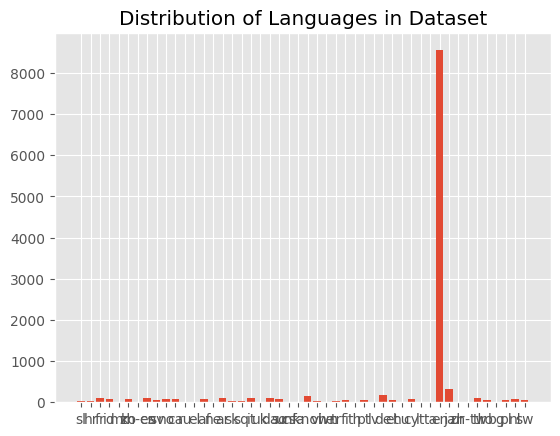

In [ ]:
users['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [ ]:
en_users = users[users['language'] == 'en']

In [ ]:
en_users

id            name      screen_name              location  \
3643  1057022347   Molly Wheeler    wheeler_molly         Cleveland, OH   
1636   171999132  Angel of Music  ANGELofMUSICval       Los Angeles, CA   
2992  2236408118               X   babbleqxeenjpg    wakefield // leeds   
5502   434369401            Will       itzLilWill                         
5812    24057360     R2-Dickhead         MsS3lena  Nebula to the Right    
...          ...             ...              ...                   ...   
366     84540710            alex  i_am_alexander_     Hamilton, Ontario   
5734   322279406    rae fLe❌❌urd         zackry_3         Johnstown, OH   
5191  1895493180      em + ziall     anselftzarry                         
5390  2317448645       Gemini ♊1      lovelytaexo                         
860     21038530           Sandy    grandmasandy5                  Ohio   

                                       profile_location  \
3643                                                NaN   
1636                                                NaN   
2992                                                NaN   
5502                                                NaN   
5812                                                NaN   
...                                                 ...   
366   {'id': '4939b600461c30a4', 'url': 'https://api...   
5734                                                NaN   
5191                                                NaN   
5390                                                NaN   
860                                                 NaN   

                                            description  \
3643         Is it Tribe time yet? —#BlueLivesMatter 💙—   
1636  Artistic wandering soul on a quest of self dis...   
2992  18 .  aries . music . makeup  . books . beauty...   
5502  Never rat on your friends, and always keep you...   
5812  19. I'm a taurus baby so I don't give a fuck. ...   
...                                                 ...   
366       no one wants to fall out of heaven / 19 / '97   
5734  ⛳️, |20| too busy making my own waves. #tOSUBu...   
5191                         *:・✧ grow as a person ✧・:*   
5390  Taehana , Mother  of Jai'Dyn King, 21 yrs old ...   
860   I am married for 53 yrs. have 3 children, 5 gr...   

                          url  \
3643                      NaN   
1636  https://t.co/iWGz47jotC   
2992                      NaN   
5502                      NaN   
5812   http://t.co/MQzmsaMaeZ   
...                       ...   
366   https://t.co/XfcEC06Grp   
5734                      NaN   
5191  https://t.co/jaxYBoKHPR   
5390                      NaN   
860                       NaN   

                                               entities  followers_count  \
3643                      {'description': {'urls': []}}         0.000471   
1636  {'url': {'urls': [{'url': 'https://t.co/iWGz47...         0.000255   
2992                      {'description': {'urls': []}}         0.005013   
5502                      {'description': {'urls': []}}         0.000197   
5812  {'url': {'urls': [{'url': 'http://t.co/MQzmsaM...         0.000204   
...                                                 ...              ...   
366   {'url': {'urls': [{'url': 'https://t.co/XfcEC0...         0.000269   
5734                      {'description': {'urls': []}}         0.000933   
5191  {'url': {'urls': [{'url': 'https://t.co/jaxYBo...         0.007947   
5390                      {'description': {'urls': []}}         0.000643   
860                       {'description': {'urls': []}}         0.000003   

      friends_count  ...  profile_use_background_image has_extended_profile  \
3643       0.004931  ...                             1                    1   
1636       0.016718  ...                             1                    0   
2992       0.036608  ...                             1                    0   
5502       0.002477  ...                             1               

In [ ]:
def word_count(text):
    return len(str(text).split(' '))

In [ ]:
en_users['word_count'] = en_users['description'].apply(word_count)
en_users['word_count'].describe()

<ipython-input-31-f5e705d84784>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_users['word_count'] = en_users['description'].apply(word_count)


count    8552.000000
mean       12.285898
std         8.838485
min         1.000000
25%         5.000000
50%        11.000000
75%        19.000000
max       126.000000
Name: word_count, dtype: float64

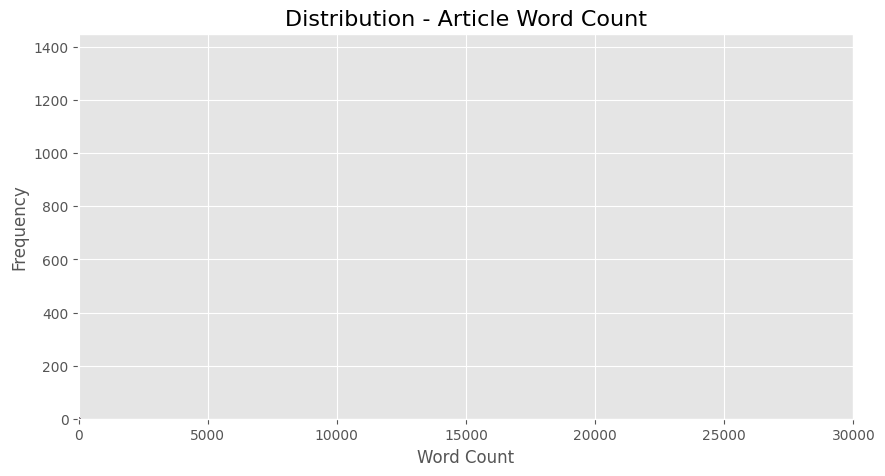

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.hist(
    en_users['word_count'],
    bins=100,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency')
plt.xlabel('Word Count')
plt.yticks(np.arange(0, 1600, 200))
plt.xticks(np.arange(0, 31000, 5000))

file_name = 'hist'

plt.show()

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features, ngram_from, ngram_to, min_df=0.005, max_df=0.95):

    vectorizer = TfidfVectorizer(max_features=maxx_features, ngram_range=(ngram_from,ngram_to), min_df=min_df, max_df=max_df)
    X = vectorizer.fit_transform(text)
    return X, vectorizer

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 19.3 MB/s eta 0:00:00


In [ ]:
import re
import string
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Contraction map
c_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
    "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
    "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
    "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have",
    "he'll": "he will", "he'll've": "he will have", "he's": "he is", "how'd": "how did",
    "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "I would",
    "i'd've": "I would have", "i'll": "I will", "i'll've": "I will have", "i'm": "I am",
    "i've": "I have", "isn't": "is not", "it'd": "it had", "it'd've": "it would have",
    "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
    "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not",
    "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
    "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not",
    "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
    "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
    "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there had", "there'd've": "there would have", "there's": "there is",
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
    "we'd": "we had", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
    "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have",
    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
    "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
    "wouldn't've": "would not have", "y'all": "you all", "y'alls": "you alls", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had",
    "you'd've": "you would have", "you'll": "you will","you'll've": "you will have", "you're": "you are", "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad','et','al','et.','al.']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure',
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.',
    'al.', 'Elsevier', 'PMC', 'CZI', 'www', 'http', 'No.' , 'no.', 'et.', 'al.'
]
for w in custom_stop_words:
    if w not in stop_words:
        stop_words.union(w)

punc = list(set(string.punctuation))

def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub(r'http[s]?://\S+', '', each) for each in text]   # Remove URLs
    text = [re.sub(r'@\w+', '', each) for each in text]             # Remove mentions (@usernames)
    text = [re.sub(r'#', '', each) for each in text]                # Remove hashtags but keep the words
    text = [emoji.replace_emoji(each, replace='') for each in text] # Remove emojis
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    # text = [SnowballStemmer('english').stem(each) for each in text]
    text = [lemmatizer.lemmatize(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text

In [ ]:
# Process the text
en_users['processed_description'] = en_users['description'].apply(process_text)
en_users.head()

<ipython-input-39-af40efaa606b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_users['processed_description'] = en_users['description'].apply(process_text)


id            name      screen_name              location  \
3643  1057022347   Molly Wheeler    wheeler_molly         Cleveland, OH   
1636   171999132  Angel of Music  ANGELofMUSICval       Los Angeles, CA   
2992  2236408118               X   babbleqxeenjpg    wakefield // leeds   
5502   434369401            Will       itzLilWill                         
5812    24057360     R2-Dickhead         MsS3lena  Nebula to the Right    

     profile_location                                        description  \
3643              NaN         Is it Tribe time yet? —#BlueLivesMatter 💙—   
1636              NaN  Artistic wandering soul on a quest of self dis...   
2992              NaN  18 .  aries . music . makeup  . books . beauty...   
5502              NaN  Never rat on your friends, and always keep you...   
5812              NaN  19. I'm a taurus baby so I don't give a fuck. ...   

                          url  \
3643                      NaN   
1636  https://t.co/iWGz47jotC   
2992                      NaN   
5502                      NaN   
5812   http://t.co/MQzmsaMaeZ   

                                               entities  followers_count  \
3643                      {'description': {'urls': []}}         0.000471   
1636  {'url': {'urls': [{'url': 'https://t.co/iWGz47...         0.000255   
2992                      {'description': {'urls': []}}         0.005013   
5502                      {'description': {'urls': []}}         0.000197   
5812  {'url': {'urls': [{'url': 'http://t.co/MQzmsaM...         0.000204   

      friends_count  ...  default_profile default_profile_image  \
3643       0.004931  ...                0                     0   
1636       0.016718  ...                0                     0   
2992       0.036608  ...                0                     0   
5502       0.002477  ...                1                     0   
5812       0.004260  ...                0                     0   

      translator_type  depression profile_background_color_brightness  \
3643             none           0                            0.106498   
1636             none           0                            0.282984   
2992             none           1                            1.000000   
5502             none           1                            0.842118   
5812             none           1                            0.221369   

      account_age  creation_year  language word_count  \
3643     0.394208           2013        en          7   
1636     0.632877           2010        en         14   
2992     0.303298           2013        en         27   
5502     0.498525           2011        en         11   
5812     0.767498           2009        en         25   

                                  processed_description  
3643                     [tribe, time, bluelivesmatter]  
1636  [artistic, wandering, soul, quest, self, disco...  
2992  [aries, music, makeup, book, beauty, fashion, ...  
5502                         [rat, friend, mouth, shut]  
5812  [taurus, baby, fuck, just, stoned, soul, open,...  

[5 rows x 44 columns]

In [ ]:
text_1 = en_users['processed_description'].values
text = []
for x in text_1:
    text.append(' '.join(x))

In [ ]:
text

['tribe time bluelivesmatter',
 'artistic wandering soul quest self discovery currently searching muse',
 'aries music makeup book beauty fashion youtubers tweet seriously',
 'rat friend mouth shut',
 'taurus baby fuck just stoned soul open minded live life recklessly',
 'university south carolina',
 'im',
 'brand taco',
 'kiss bitch real able handle watchout co-owner porn site rockettube link bio',
 'pnn.io medium search rite.io beta lighter quicker deeper search ego wall pnn.io rite.io',
 'happily married screenwriter actor author rapper kingdomdreams',
 'unknown',
 'bitch',
 'set life seek fan flame ignite love ignite',
 'shut im princess otra',
 'slytherin working film major living art college',
 'unknown',
 'finding new way enjoy life :d',
 'unknown',
 'haley gallinot ma lcpc ncc clinical supervisor consultant including freelance writing ): question scheduling rate email haleygallinot.com',
 'missing action',
 'shit',
 'love band gaming arizona robbins enthusiast',
 'new account f

In [ ]:
max_features = 2**12

X2, vectorizer2 = vectorize(text, max_features, 2, 2, min_df=0.001, max_df=0.95)  # bigrams

# Print most frequent bigrams and tri-grams
count_values = X2.toarray().sum(axis=0)
vocab = vectorizer2.vocabulary_
df_bigram = pd.DataFrame(sorted([(count_values[i], k) for k, i in vocab.items()], reverse=True)
                         ).rename(columns={0: 'frequency', 1: 'bigrams'})

df_bigram

frequency                  bigrams
0   79.193308            mental health
1   61.489809                 year old
2   54.039209               video game
3   32.023035            social medium
4   21.906737                love life
5   19.451863                live life
6   18.392345                 star war
7   17.451671       depression anxiety
8   16.832993               love music
9   16.719879           mental illness
10  15.656469             animal lover
11  15.552446              music lover
12  15.418469              best friend
13  14.944993              just trying
14  12.971547       anxiety depression
15  12.601046               music life
16  12.477131        singer songwriter
17  12.427895                   yr old
18  12.196081              living life
19  11.836045                love love
20  11.491365                just want
21  10.877062                life love
22  10.792011  intersectional feminist
23  10.723559       instagram snapchat
24  10.714343               peace love
25  10.707107         music enthusiast
26  10.707107                cat lover
27  10.703054                  wa born
28  10.698642                good vibe
29  10.490653            follow follow
30  10.487031              lover thing
31  10.359115                sport fan
32  10.317312                 day time
33  10.148258         bipolar disorder
34  10.000000                part time
35  10.000000                feel free
36  10.000000               comic book
37  10.000000          college student
38   9.795368         state university
39   9.787414                real life
40   9.735229               little bit
41   9.454972              trying make
42   9.413855                 new york
43   9.392137           husband father
44   9.315952            artist writer
45   9.303321             just average
46   9.241617               god family
47   8.799959                girl love
48   8.791096         graphic designer
49   8.715471                 huge fan
50   8.711467          youtube channel
51   8.711467                  hip hop
52   8.483424             harry potter
53   8.426938                love hate
54   8.384138                just girl
55   8.336382          health advocate
56   8.301010         official twitter
57   8.264411              wife mother
58   7.845869          twitter account
59   6.641638             life fullest

In [ ]:
X3, vectorizer3 = vectorize(text, max_features, 3, 3, min_df=0.0005, max_df=0.90)  # trigrams

count_values = X3.toarray().sum(axis=0)
vocab = vectorizer3.vocabulary_
df_trigram = pd.DataFrame(sorted([(count_values[i], k) for k, i in vocab.items()], reverse=True)
                            ).rename(columns={0: 'frequency', 1: 'trigrams'})

df_trigram

frequency                trigrams
0       10.0  mental health advocate
1        8.0       live life fullest
2        7.0         play video game
3        5.0           year old girl
4        5.0    season ticket holder

In [ ]:
# Convert DataFrame to dictionary
bigrams = dict(zip(df_bigram["bigrams"], [1] * len(df_bigram)))
trigrams = dict(zip(df_trigram["trigrams"], [1] * len(df_bigram)))

In [ ]:
# Merge all tokens in en_users['processed_description'] to one string
en_users['temp'] = en_users['processed_description'].apply(lambda x: ' '.join(x))

# If two consecutive words like mental and health are encountered in the text, then replace them with mental_health if they are in bigrams dictionary
def replace_bigrams(text):
    text = text.split()
    # for words in text check if word and next word are in bigrams dictionary, if yes then replace them with bigram
    for i in range(len(text)-1):
        if text[i] + ' ' + text[i+1] in bigrams:
            text[i] = text[i] + '_' + text[i+1]
            text[i+1] = ''
    # remove empty strings
    text = [x for x in text if x != '']
    return text

# Same as above but for trigrams
def replace_trigrams(text):
    text = text.split()
    for i in range(len(text)-2):
        if text[i] + ' ' + text[i+1] + ' ' + text[i+2] in trigrams:
            text[i] = text[i] + '_' + text[i+1] + '_' + text[i+2]
            text[i+1] = ''
            text[i+2] = ''
    text = [x for x in text if x != '']
    return text

en_users['temp'] = en_users['temp'].apply(lambda x: replace_trigrams(x))
en_users['temp'] = en_users['temp'].apply(lambda x: ' '.join(x))
en_users['temp'] = en_users['temp'].apply(lambda x: replace_bigrams(x))
en_users['temp'] = en_users['temp'].apply(lambda x: ' '.join(x))

<ipython-input-45-3348d1004d80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_users['temp'] = en_users['processed_description'].apply(lambda x: ' '.join(x))
<ipython-input-45-3348d1004d80>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_users['temp'] = en_users['temp'].apply(lambda x: replace_trigrams(x))
<ipython-input-45-3348d1004d80>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

### Embeddings
Convert descriptions to numerical data: <br>
BERT: extracts different embeddings based on the context of the word, specifically Distilbert gives a nice balance between speed and performance <br>
Generate the BERT embeddings for a document using the 'sentence-transformers' package as the resulting embeddings have shown to be of high quality and typically work quite well for document-level embeddings.

In [ ]:
!pip install scikit-learn
!pip install sentence_transformers
!pip install umap-learn
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.80k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
en_users

id            name      screen_name              location  \
3643  1057022347   Molly Wheeler    wheeler_molly         Cleveland, OH   
1636   171999132  Angel of Music  ANGELofMUSICval       Los Angeles, CA   
2992  2236408118               X   babbleqxeenjpg    wakefield // leeds   
5502   434369401            Will       itzLilWill                         
5812    24057360     R2-Dickhead         MsS3lena  Nebula to the Right    
...          ...             ...              ...                   ...   
366     84540710            alex  i_am_alexander_     Hamilton, Ontario   
5734   322279406    rae fLe❌❌urd         zackry_3         Johnstown, OH   
5191  1895493180      em + ziall     anselftzarry                         
5390  2317448645       Gemini ♊1      lovelytaexo                         
860     21038530           Sandy    grandmasandy5                  Ohio   

                                       profile_location  \
3643                                                NaN   
1636                                                NaN   
2992                                                NaN   
5502                                                NaN   
5812                                                NaN   
...                                                 ...   
366   {'id': '4939b600461c30a4', 'url': 'https://api...   
5734                                                NaN   
5191                                                NaN   
5390                                                NaN   
860                                                 NaN   

                                            description  \
3643         Is it Tribe time yet? —#BlueLivesMatter 💙—   
1636  Artistic wandering soul on a quest of self dis...   
2992  18 .  aries . music . makeup  . books . beauty...   
5502  Never rat on your friends, and always keep you...   
5812  19. I'm a taurus baby so I don't give a fuck. ...   
...                                                 ...   
366       no one wants to fall out of heaven / 19 / '97   
5734  ⛳️, |20| too busy making my own waves. #tOSUBu...   
5191                         *:・✧ grow as a person ✧・:*   
5390  Taehana , Mother  of Jai'Dyn King, 21 yrs old ...   
860   I am married for 53 yrs. have 3 children, 5 gr...   

                          url  \
3643                      NaN   
1636  https://t.co/iWGz47jotC   
2992                      NaN   
5502                      NaN   
5812   http://t.co/MQzmsaMaeZ   
...                       ...   
366   https://t.co/XfcEC06Grp   
5734                      NaN   
5191  https://t.co/jaxYBoKHPR   
5390                      NaN   
860                       NaN   

                                               entities  followers_count  \
3643                      {'description': {'urls': []}}         0.000471   
1636  {'url': {'urls': [{'url': 'https://t.co/iWGz47...         0.000255   
2992                      {'description': {'urls': []}}         0.005013   
5502                      {'description': {'urls': []}}         0.000197   
5812  {'url': {'urls': [{'url': 'http://t.co/MQzmsaM...         0.000204   
...                                                 ...              ...   
366   {'url': {'urls': [{'url': 'https://t.co/XfcEC0...         0.000269   
5734                      {'description': {'urls': []}}         0.000933   
5191  {'url': {'urls': [{'url': 'https://t.co/jaxYBo...         0.007947   
5390                      {'description': {'urls': []}}         0.000643   
860                       {'description': {'urls': []}}         0.000003   

      friends_count  ...  default_profile_image translator_type  depression  \
3643       0.004931  ...                      0            none           0   
1636       0.016718  ...                      0            none           0   
2992       0.036608  ...                      0            none           1   
5502       0.002477  ...                      0            none      

In [ ]:
descriptions = en_users['temp'].tolist()

In [ ]:
embeddings = model.encode(descriptions, show_progress_bar=True)

Batches:   0%|          | 0/268 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(8552, 768)

### Clustering
Cluster descriptions with similar topics together to enable finding topics within clusters

In [ ]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

import umap
import plotly.express as px
%matplotlib inline

In [ ]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=25,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
set(cluster.labels_)

{-1, 0, 1, 2, 3, 4}

In [ ]:
unique_labels, counts = np.unique(cluster.labels_, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))

cluster_counts

{-1: 7192, 0: 103, 1: 71, 2: 31, 3: 404, 4: 751}

In [ ]:
# Perform UMAP for dimensionality reduction to 3D
umap_data = umap.UMAP(n_neighbors=25, n_components=3, min_dist=0.0, metric='euclidean').fit_transform(embeddings)

# Create a DataFrame
result = pd.DataFrame(umap_data, columns=['x', 'y', 'z'])
result['labels'] = cluster.labels_

# Define colors: gray for outliers, colormap for clusters
result['color'] = result['labels'].astype(str)
result.loc[result['labels'] == -1, 'color'] = 'outlier'  # Mark outliers

# Create an interactive 3D scatter plot
fig = px.scatter_3d(result, x='x', y='y', z='z', color='color',
                     color_discrete_sequence=px.colors.qualitative.Set1,  # Nice categorical colors
                     title="HDBSCAN Clusters in 3D UMAP Projection",
                     opacity=0.8)

# Show the plot
fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=25, random_state=42, n_init="auto").fit(embeddings)

In [ ]:
# Perform UMAP for dimensionality reduction to 3D
umap_data = umap.UMAP(
    n_neighbors=25,  # Slightly lower than before to emphasize local structure
    n_components=3,  # Still 3D for visualization
    min_dist=0.1,  # Prevents points from being too close together
    metric='euclidean'  # Better for KMeans compared to 'cosine'
).fit_transform(embeddings)

# Create a DataFrame
result = pd.DataFrame(umap_data, columns=['x', 'y', 'z'])
result['labels'] = kmeans.labels_

# Define colors: gray for outliers, colormap for clusters
result['color'] = result['labels'].astype(str)
result.loc[result['labels'] == -1, 'color'] = 'outlier'  # Mark outliers

# Create an interactive 3D scatter plot
fig = px.scatter_3d(result, x='x', y='y', z='z', color='color',
                     color_discrete_sequence=px.colors.qualitative.Set1,  # Nice categorical colors
                     title="Kmeans Clusters in 3D UMAP Projection",
                     opacity=1)

fig.update_traces(marker=dict(size=3))
fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
docs_df = pd.DataFrame(en_users, columns=["temp"])
docs_df['Topic'] = kmeans.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'temp': ' '.join})

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

tf_idf, count = c_tf_idf(docs_per_topic.temp.values, m=len(en_users))

In [ ]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .temp
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "temp": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df)
topic_sizes.head(10)

Topic  Size
4       4  1210
20     20   437
19     19   435
8       8   396
3       3   388
9       9   374
15     15   360
1       1   358
11     11   340
22     22   333

In [ ]:
top_n_words[topic_sizes.iloc[0].Topic][:20]

[('unknown', 1.8939621650095362),
 ('inactive', 0.012055842170478996),
 ('worthless', 0.012055842170478996),
 ('quiet', 0.011760584588626439),
 ('missing', 0.011510947860161243),
 ('dont', 0.008393067921938445),
 ('soberly', 0.007331109678303548),
 ('unbothered', 0.007331109678303548),
 ('nothin', 0.007331109678303548),
 ('nope', 0.007331109678303548),
 ('defy', 0.007331109678303548),
 ('tactless', 0.007331109678303548),
 ('weightless', 0.006769856900522215),
 ('deny', 0.006769856900522215),
 ('emotionless', 0.006769856900522215),
 ('hidden', 0.006769856900522215),
 ('im', 0.006706502942459642),
 ('barely', 0.006441545072094552),
 ('know', 0.006307473932777898),
 ('thing', 0.006261594569820447)]

In [ ]:
top_n_words[topic_sizes.iloc[1].Topic][:20]

[('fan', 0.03193844856252971),
 ('game', 0.02707773645285602),
 ('love', 0.02580157491115298),
 ('gamer', 0.025656245153334346),
 ('video_game', 0.024602380130510693),
 ('music', 0.023297221693910266),
 ('anime', 0.022741289052868832),
 ('football', 0.02054495169724913),
 ('sport', 0.019341110662707797),
 ('nerd', 0.018798229651131315),
 ('writer', 0.01764566716594751),
 ('play', 0.017170579462634086),
 ('hockey', 0.015482438757773356),
 ('artist', 0.013816734181474636),
 ('lover', 0.013720355726509818),
 ('snapchat', 0.013648092325743015),
 ('tv', 0.013469451185524227),
 ('life', 0.013216622158749494),
 ('youtuber', 0.012865050458266187),
 ('art', 0.012489469554162571)]

In [ ]:
top_n_words[topic_sizes.iloc[2].Topic][:20]

[('hate', 0.025425956051254608),
 ('bad', 0.021294041684352297),
 ('love', 0.01910216461375472),
 ('tweet', 0.018892158969617465),
 ('life', 0.017520278300801315),
 ('anti', 0.017325603737633876),
 ('fuck', 0.01562684534045089),
 ('geek', 0.015233527081366579),
 ('lot', 0.014964995393714466),
 ('black', 0.014422675842095403),
 ('time', 0.014340449255130451),
 ('shit', 0.01394455799635975),
 ('bitch', 0.013596674887429404),
 ('thing', 0.013582674403503955),
 ('writer', 0.012955308329097293),
 ('random', 0.012877218714790322),
 ('just', 0.012422447615715246),
 ('student', 0.012300615306748431),
 ('post', 0.012137516257135807),
 ('dead', 0.011996492983793268)]

In [ ]:
top_n_words[topic_sizes.iloc[3].Topic][:20]

[('sc', 0.07413682712112124),
 ('ig', 0.04623567650170953),
 ('follow', 0.029855239302984105),
 ('wa', 0.026919394508133805),
 ('time', 0.026180687167442436),
 ('rip', 0.024427066257846724),
 ('ᴀs', 0.024283851438115567),
 ('bio', 0.02360600949860081),
 ('insta', 0.021767903369815784),
 ('lord', 0.02031627275721179),
 ('moon', 0.01874402608638395),
 ('just', 0.018567668920301473),
 ('lol', 0.018121032280379024),
 ('mean', 0.01779868012104429),
 ('princess', 0.017325103766425244),
 ('state', 0.017071603504592983),
 ('account', 0.016990287085934776),
 ('tx', 0.016566458220962102),
 ('queen', 0.016548785609551184),
 ('come', 0.01570728706407848)]

In [ ]:
en_users.drop('cluster', axis=1)
en_users['cluster'] = kmeans.labels_

<ipython-input-117-6a3cdf71800b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
en_users

id            name      screen_name              location  \
3643  1057022347   Molly Wheeler    wheeler_molly         Cleveland, OH   
1636   171999132  Angel of Music  ANGELofMUSICval       Los Angeles, CA   
2992  2236408118               X   babbleqxeenjpg    wakefield // leeds   
5502   434369401            Will       itzLilWill                         
5812    24057360     R2-Dickhead         MsS3lena  Nebula to the Right    
...          ...             ...              ...                   ...   
366     84540710            alex  i_am_alexander_     Hamilton, Ontario   
5734   322279406    rae fLe❌❌urd         zackry_3         Johnstown, OH   
5191  1895493180      em + ziall     anselftzarry                         
5390  2317448645       Gemini ♊1      lovelytaexo                         
860     21038530           Sandy    grandmasandy5                  Ohio   

                                       profile_location  \
3643                                                NaN   
1636                                                NaN   
2992                                                NaN   
5502                                                NaN   
5812                                                NaN   
...                                                 ...   
366   {'id': '4939b600461c30a4', 'url': 'https://api...   
5734                                                NaN   
5191                                                NaN   
5390                                                NaN   
860                                                 NaN   

                                            description  \
3643         Is it Tribe time yet? —#BlueLivesMatter 💙—   
1636  Artistic wandering soul on a quest of self dis...   
2992  18 .  aries . music . makeup  . books . beauty...   
5502  Never rat on your friends, and always keep you...   
5812  19. I'm a taurus baby so I don't give a fuck. ...   
...                                                 ...   
366       no one wants to fall out of heaven / 19 / '97   
5734  ⛳️, |20| too busy making my own waves. #tOSUBu...   
5191                         *:・✧ grow as a person ✧・:*   
5390  Taehana , Mother  of Jai'Dyn King, 21 yrs old ...   
860   I am married for 53 yrs. have 3 children, 5 gr...   

                          url  \
3643                      NaN   
1636  https://t.co/iWGz47jotC   
2992                      NaN   
5502                      NaN   
5812   http://t.co/MQzmsaMaeZ   
...                       ...   
366   https://t.co/XfcEC06Grp   
5734                      NaN   
5191  https://t.co/jaxYBoKHPR   
5390                      NaN   
860                       NaN   

                                               entities  followers_count  \
3643                      {'description': {'urls': []}}         0.000471   
1636  {'url': {'urls': [{'url': 'https://t.co/iWGz47...         0.000255   
2992                      {'description': {'urls': []}}         0.005013   
5502                      {'description': {'urls': []}}         0.000197   
5812  {'url': {'urls': [{'url': 'http://t.co/MQzmsaM...         0.000204   
...                                                 ...              ...   
366   {'url': {'urls': [{'url': 'https://t.co/XfcEC0...         0.000269   
5734                      {'description': {'urls': []}}         0.000933   
5191  {'url': {'urls': [{'url': 'https://t.co/jaxYBo...         0.007947   
5390                      {'description': {'urls': []}}         0.000643   
860                       {'description': {'urls': []}}         0.000003   

      friends_count  ...  translator_type depression  \
3643       0.004931  ...             none          0   
1636       0.016718  ...             none          0   
2992       0.036608  ...             none          1   
5502       0.002477  ...             none          1   
5812       0.004260  ...             none          1   
...             ...  ...              ...        

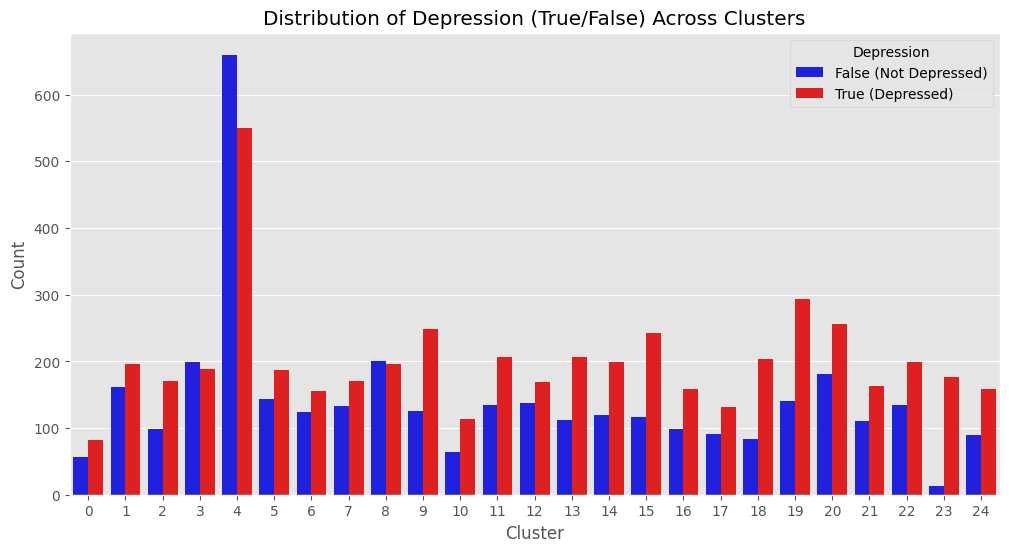

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.countplot(data=en_users, x='cluster', hue='depression', palette=['blue', 'red'])

# Customize labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Depression (True/False) Across Clusters')

# Show the legend
plt.legend(title='Depression', labels=['False (Not Depressed)', 'True (Depressed)'])

# Show the plot
plt.show()

In [ ]:
top_n_words[topic_sizes.iloc[23].Topic][:20]

[('life', 0.06065804460358509),
 ('better', 0.050436314278369886),
 ('help', 0.04246892679548556),
 ('people', 0.03959215516106177),
 ('new', 0.0387323541867065),
 ('work', 0.0343609055354576),
 ('io', 0.03331647943139847),
 ('healthy', 0.03199149317176071),
 ('making', 0.03151653714606278),
 ('make', 0.031082956440215324),
 ('living', 0.029293389063579638),
 ('way', 0.026992702312684188),
 ('trying', 0.026899367615130607),
 ('day', 0.025894033218900853),
 ('best', 0.02539033311359616),
 ('working', 0.02537519391225447),
 ('today', 0.023196145712958152),
 ('god', 0.0221518561897493),
 ('interested', 0.02167183487530278),
 ('hard', 0.02118356374141535)]

In [ ]:
import pandas as pd
purity = []

for n in range(2, 100):
    kmeans = KMeans(n_clusters=n, random_state=42, n_init="auto").fit(embeddings)

    en_users.drop('cluster', axis=1)
    en_users['cluster'] = kmeans.labels_

    # Count the proportion of depressed vs. not depressed in each cluster
    cluster_distribution = en_users.groupby('cluster')['depression'].value_counts(normalize=True).unstack()

    # Compute purity as the max class proportion per cluster
    cluster_distribution['purity'] = cluster_distribution.max(axis=1)

    # Compute the overall average purity
    average_purity = cluster_distribution['purity'].mean()
    purity.append(average_purity)

    # Display cluster purity
    print(f'{n}: {average_purity}')

<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2: 0.5700913346010579


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3: 0.582612883257831


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4: 0.584955086921986


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5: 0.5889268230093403


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6: 0.5921348660196626


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



7: 0.6005229663592806


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



8: 0.603381246455351


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



9: 0.6041917772431914


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10: 0.6031886682676765


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



11: 0.6068583565557274


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



12: 0.6080771629286578


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



13: 0.6083290263488705


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



14: 0.607965377637368


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



15: 0.6103306339189278


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



16: 0.6085400555115916


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



17: 0.6126210843725088


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



18: 0.6111170262028368


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



19: 0.6104419644755822


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



20: 0.6081498131647559


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



21: 0.6112272650260028


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



22: 0.6103213509303682


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



23: 0.6135755389489729


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



24: 0.6141661255025673


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



25: 0.6147216669776079


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



26: 0.6101707626713776


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



27: 0.6133214021770687


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



28: 0.6103939959974947


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



29: 0.6112839194640924


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



30: 0.6155068303124117


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



31: 0.6165412426055611


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



32: 0.6156130452421338


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



33: 0.6155399236079214


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



34: 0.6153690007112472


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



35: 0.6133855603072463


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



36: 0.6122428865798523


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



37: 0.6164955454786158


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



38: 0.6147653274185823


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



39: 0.6139355265451308


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



40: 0.6123004899383863


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



41: 0.6137651867907788


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



42: 0.6122318892474984


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



43: 0.6133523768940435


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



44: 0.6146044006344625


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



45: 0.6118346894112964


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



46: 0.611941344298829


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



47: 0.6138442430452381


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



48: 0.6133938343877784


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



49: 0.6156275162868207


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



50: 0.614372403744225


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



51: 0.6135700273629827


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



52: 0.6162348021595435


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



53: 0.6153236808015129


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



54: 0.6153100434976226


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



55: 0.6144025094798213


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



56: 0.6126096301145763


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



57: 0.6115891473587393


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



58: 0.6117067052382031


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



59: 0.6155933288077653


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



60: 0.6148889503841447


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



61: 0.6124181740725967


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



62: 0.6111283434263639


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



63: 0.6128491344667426


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



64: 0.6173618219014254


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



65: 0.6134925484120141


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



66: 0.6144257520943409


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



67: 0.6127605678224071


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



68: 0.6135212778345762


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



69: 0.6133499368749071


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



70: 0.6138678653450406


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



71: 0.6158097478888955


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



72: 0.6172163561509652


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



73: 0.6148440134507897


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



74: 0.6182691811813728


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



75: 0.6187168265095186


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



76: 0.6190860516803338


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



77: 0.6185277675620688


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



78: 0.6176465955737233


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



79: 0.6180210281579096


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



80: 0.6168271914804814


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



81: 0.6173299705366857


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



82: 0.6189602281896132


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



83: 0.6177450692692338


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



84: 0.6188911455825418


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



85: 0.6210588247049509


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



86: 0.6210089276654585


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



87: 0.6214379362978729


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



88: 0.6220018048285005


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



89: 0.6215961832347087


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



90: 0.6221191478931016


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



91: 0.6223114196227408


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



92: 0.6231790048633375


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



93: 0.6215763076072927


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



94: 0.622637190975064


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



95: 0.6231414556468984


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



96: 0.6215251620309136


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



97: 0.6223170686138538


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



98: 0.6215950352682261
99: 0.6225898831569241


<ipython-input-129-4690da67192b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
max(purity)

0.6231790048633375